In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle

In [7]:
!kaggle competitions download -c home-data-for-ml-course


  0%|          | 0.00/386k [00:00<?, ?B/s]
100%|##########| 386k/386k [00:00<00:00, 2.81MB/s]
100%|##########| 386k/386k [00:00<00:00, 2.53MB/s]


In [2]:
from zipfile import ZipFile

train = pd.read_csv(ZipFile('home-data-for-ml-course.zip').open('train.csv'))
test = pd.read_csv(ZipFile('home-data-for-ml-course.zip').open('test.csv'))

train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
df_year = train.groupby([train['YrSold']]).agg({'YrSold': 'count'})
df_year.rename(columns = {'YrSold' : 'Year Sold', 'YrSold' : 'Yearly count'}, inplace = True)
df_year.reset_index(level=0, inplace=True)
df_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   YrSold        5 non-null      int64
 1   Yearly count  5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


### Exploratory Data Analysis

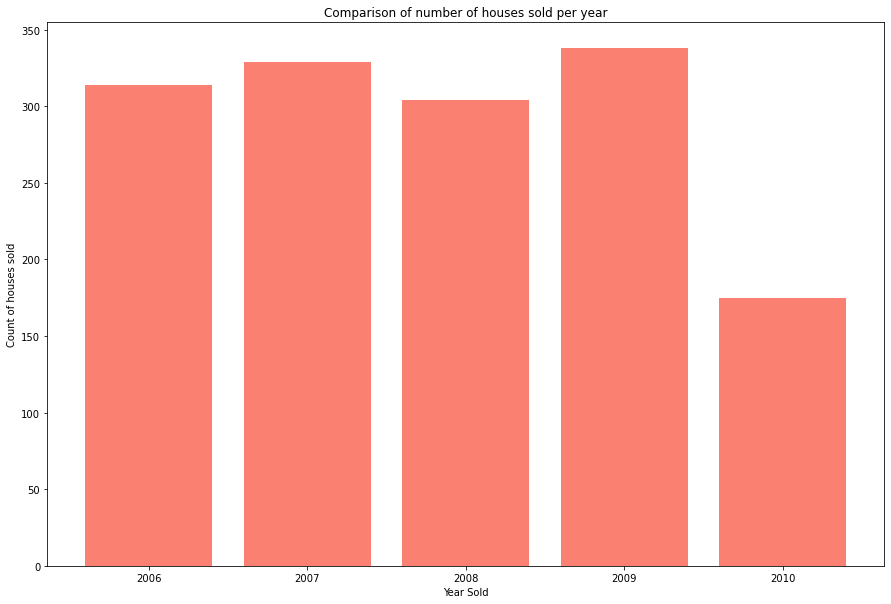

In [4]:
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(df_year['YrSold'], df_year['Yearly count'], color='salmon')
ax.set_xlabel('Year Sold')
ax.set_ylabel('Count of houses sold')
ax.set_title('Comparison of number of houses sold per year');

In [5]:
df_month = train.groupby([train['MoSold']]).agg({'MoSold': 'count'})
df_month.rename(columns = {'MoSold' : 'Month Sold', 'MoSold' : 'Monthly count'}, inplace = True)
df_month.reset_index(level=0, inplace=True)
df_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MoSold         12 non-null     int64
 1   Monthly count  12 non-null     int64
dtypes: int64(2)
memory usage: 320.0 bytes


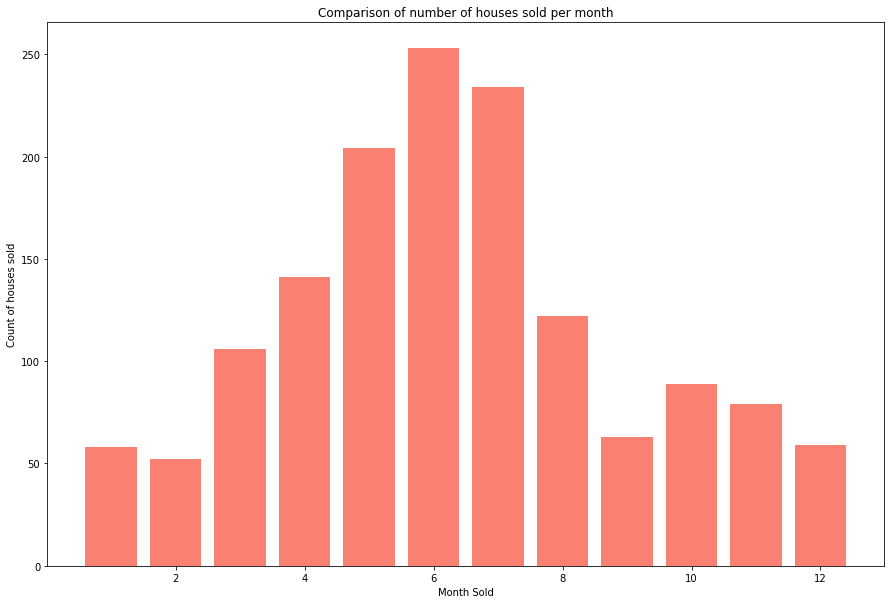

In [6]:
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(df_month['MoSold'], df_month['Monthly count'], color='salmon')
ax.set_xlabel('Month Sold')
ax.set_ylabel('Count of houses sold')
ax.set_title('Comparison of number of houses sold per month');

### Preprocessing the data 

In [7]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df
    """
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column specifying if data is missing
#                 df[label+'_is_missing'] = pd.isnull(content)
                # Fill missing values with median
                df[label] = content.fillna(content.median())
        if not pd.api.types.is_numeric_dtype(content):
            # Add a binary column specifying if data is missing
#             df[label+'_is_missing'] = pd.isnull(content)
            # Fill missing values with median
            df[label] = pd.Categorical(content).codes + 1    
    return df

In [8]:
train_mod = preprocess_data(train)
test_mod = preprocess_data(test)
train_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int8   
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int8   
 6   Alley          1460 non-null   int8   
 7   LotShape       1460 non-null   int8   
 8   LandContour    1460 non-null   int8   
 9   Utilities      1460 non-null   int8   
 10  LotConfig      1460 non-null   int8   
 11  LandSlope      1460 non-null   int8   
 12  Neighborhood   1460 non-null   int8   
 13  Condition1     1460 non-null   int8   
 14  Condition2     1460 non-null   int8   
 15  BldgType       1460 non-null   int8   
 16  HouseStyle     1460 non-null   int8   
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Splitting the data and training different models to get the preliminary scores

In [9]:
train_X = train_mod.drop('SalePrice', axis=1)
train_y = train_mod['SalePrice']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_X, train_y, test_size=0.2, random_state=56)

In [11]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

E:\Analytics\Kaggle\env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [24]:
from sklearn.metrics import mean_squared_error

def eval_of_diff_models(X_train, X_val, y_train, y_val):
    rf_model = RandomForestRegressor(verbose=False, random_state=56)
    xgb_model = XGBRegressor(verbosity=0, random_state=56)
    cat_model = CatBoostRegressor(verbose=False, random_state=56)
    rf_model.fit(X_train, y_train)
    xgb_model.fit(X_train, y_train)
    cat_model.fit(X_train, y_train)    
    scores = {'Random Forest Score': mean_squared_error(y_val, rf_model.predict(X_val), squared=False),
              'XGBoost Score': mean_squared_error(y_val, xgb_model.predict(X_val), squared=False),
              'CatBoost Score': mean_squared_error(y_val, cat_model.predict(X_val), squared=False)}
    return print(scores)

In [25]:
eval_of_diff_models(X_train, X_val, y_train, y_val)

E:\Analytics\Kaggle\env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
Custom logger is already specified. Specify more than one logger at same time is not thread safe.

{'Random Forest Score': 43730.508407770474, 'XGBoost Score': 43867.278524212656, 'CatBoost Score': 42722.15920212639}


E:\Analytics\Kaggle\env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [14]:
import optuna

In [21]:
def objective(trial):
    param = {
        'eval_metric': 'RMSE',
#         'loss_function': 'RMSE',
#         'task_type': 'GPU',
#         'bootstrap_type'='Poisson',
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-2, 10.0),
        'max_bin': trial.suggest_int('max_bin', 200, 400),
        #'rsm': trial.suggest_uniform('rsm', 0.3, 1.0),
        'subsample': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.006, 0.018),
#         'n_estimators':  25000,
        'max_depth': trial.suggest_categorical('max_depth', [7,10,14,16]),
        'random_state': 56,
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 300),        
    }

    gbm = CatBoostRegressor(**param)

    gbm.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False, early_stopping_rounds=200)
    
    return mean_squared_error(y_val, gbm.predict(X_val), squared=False)

In [22]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)
study.best_trial.params

[I 2022-04-02 13:12:39,982] A new study created in memory with name: no-name-7ed59371-e471-4bfe-9cce-0002aa45a913
Custom logger is already specified. Specify more than one logger at same time is not thread safe.[I 2022-04-02 13:15:51,287] Trial 0 finished with value: 25966.834181453454 and parameters: {'l2_leaf_reg': 3.8884888317915305, 'max_bin': 332, 'bagging_fraction': 0.5592655721568738, 'learning_rate': 0.014788205990479157, 'max_depth': 10, 'min_data_in_leaf': 244}. Best is trial 0 with value: 25966.834181453454.
[I 2022-04-02 13:16:14,487] Trial 1 finished with value: 23154.641668451302 and parameters: {'l2_leaf_reg': 0.49787034587244033, 'max_bin': 225, 'bagging_fraction': 0.7721903607452607, 'learning_rate': 0.01354755375791656, 'max_depth': 7, 'min_data_in_leaf': 241}. Best is trial 1 with value: 23154.641668451302.


KeyboardInterrupt: 

In [ ]:
%%time

from sklearn.model_selection import GridSearchCV

cat_grid = {'n_estimators': [250, 500, 750],
            'eval_metric': ['RMSE'],
            'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.5],
            'l2_leaf_reg': [0.001, 0.01, 0.1, 1, 5, 10],
            'max_depth': [2, 4, 6, 8],
            'min_data_in_leaf': [10, 50, 100, 200, 300]}

cat_model = GridSearchCV(CatBoostRegressor(random_state=56),
                         param_grid=cat_grid,
                         cv=5,
                         verbose=True)

cat_model.fit(X_train, y_train)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits
0:	learn: 76756.4407659	total: 2.91ms	remaining: 724ms
1:	learn: 76721.7045240	total: 5.61ms	remaining: 695ms
2:	learn: 76681.8047746	total: 8.98ms	remaining: 740ms
3:	learn: 76637.4638195	total: 11.6ms	remaining: 715ms
4:	learn: 76593.4113857	total: 13.9ms	remaining: 682ms
5:	learn: 76549.1760812	total: 16.2ms	remaining: 657ms
6:	learn: 76507.5651085	total: 18.5ms	remaining: 643ms
7:	learn: 76463.2920760	total: 23.5ms	remaining: 712ms
8:	learn: 76422.3718236	total: 26ms	remaining: 696ms
9:	learn: 76380.0215955	total: 30.2ms	remaining: 725ms
10:	learn: 76340.4364365	total: 32.7ms	remaining: 711ms
11:	learn: 76304.3459464	total: 36.7ms	remaining: 728ms
12:	learn: 76260.2919694	total: 39.6ms	remaining: 721ms
13:	learn: 76215.6499912	total: 42.5ms	remaining: 717ms
14:	learn: 76181.6097752	total: 47.5ms	remaining: 743ms
15:	learn: 76137.2381263	total: 49.8ms	remaining: 728ms
16:	learn: 76097.7956125	total: 52.7ms	remaining: 7

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

52:	learn: 74650.7746918	total: 120ms	remaining: 445ms
53:	learn: 74609.5804521	total: 122ms	remaining: 443ms
54:	learn: 74571.4768206	total: 124ms	remaining: 441ms
55:	learn: 74529.9012270	total: 128ms	remaining: 443ms
56:	learn: 74490.5631398	total: 130ms	remaining: 441ms
57:	learn: 74450.9995001	total: 133ms	remaining: 439ms
58:	learn: 74412.7172387	total: 135ms	remaining: 437ms
59:	learn: 74378.3988250	total: 137ms	remaining: 435ms
60:	learn: 74342.2300018	total: 140ms	remaining: 433ms
61:	learn: 74302.0807506	total: 142ms	remaining: 431ms
62:	learn: 74259.4902985	total: 147ms	remaining: 437ms
63:	learn: 74219.6852315	total: 151ms	remaining: 438ms
64:	learn: 74179.7684806	total: 153ms	remaining: 436ms
65:	learn: 74145.8678058	total: 155ms	remaining: 432ms
66:	learn: 74103.9252348	total: 157ms	remaining: 429ms
67:	learn: 74068.5310427	total: 160ms	remaining: 427ms
68:	learn: 74031.3558825	total: 163ms	remaining: 427ms
69:	learn: 73992.8416321	total: 166ms	remaining: 426ms
70:	learn:

230:	learn: 68185.8068531	total: 479ms	remaining: 39.4ms
231:	learn: 68154.3194985	total: 481ms	remaining: 37.3ms
232:	learn: 68122.5501820	total: 484ms	remaining: 35.3ms
233:	learn: 68088.2245745	total: 486ms	remaining: 33.3ms
234:	learn: 68056.4445874	total: 488ms	remaining: 31.2ms
235:	learn: 68022.0403152	total: 491ms	remaining: 29.1ms
236:	learn: 67991.4181915	total: 493ms	remaining: 27ms
237:	learn: 67958.4801024	total: 495ms	remaining: 24.9ms
238:	learn: 67924.8861934	total: 497ms	remaining: 22.9ms
239:	learn: 67890.2882172	total: 499ms	remaining: 20.8ms
240:	learn: 67856.2998220	total: 502ms	remaining: 18.8ms
241:	learn: 67823.5577347	total: 505ms	remaining: 16.7ms
242:	learn: 67795.2058167	total: 508ms	remaining: 14.6ms
243:	learn: 67764.1130968	total: 513ms	remaining: 12.6ms
244:	learn: 67733.0433475	total: 517ms	remaining: 10.5ms
245:	learn: 67701.5055781	total: 519ms	remaining: 8.44ms
246:	learn: 67670.0978436	total: 521ms	remaining: 6.33ms
247:	learn: 67635.8941393	total: 

144:	learn: 70088.3657652	total: 239ms	remaining: 173ms
145:	learn: 70055.1329803	total: 242ms	remaining: 172ms
146:	learn: 70022.2282266	total: 244ms	remaining: 171ms
147:	learn: 69985.1971725	total: 247ms	remaining: 170ms
148:	learn: 69948.3718794	total: 249ms	remaining: 169ms
149:	learn: 69911.7208108	total: 251ms	remaining: 167ms
150:	learn: 69883.2515674	total: 253ms	remaining: 166ms
151:	learn: 69846.9479615	total: 255ms	remaining: 165ms
152:	learn: 69810.8392612	total: 257ms	remaining: 163ms
153:	learn: 69775.1583840	total: 259ms	remaining: 162ms
154:	learn: 69737.8078651	total: 262ms	remaining: 160ms
155:	learn: 69706.6992619	total: 264ms	remaining: 159ms
156:	learn: 69670.2645858	total: 266ms	remaining: 158ms
157:	learn: 69634.7363988	total: 268ms	remaining: 156ms
158:	learn: 69597.9097932	total: 271ms	remaining: 155ms
159:	learn: 69562.8718072	total: 274ms	remaining: 154ms
160:	learn: 69527.1002360	total: 275ms	remaining: 152ms
161:	learn: 69491.5186938	total: 277ms	remaining

64:	learn: 77476.7878485	total: 260ms	remaining: 741ms
65:	learn: 77432.5139443	total: 265ms	remaining: 740ms
66:	learn: 77389.3320828	total: 269ms	remaining: 735ms
67:	learn: 77345.2880151	total: 271ms	remaining: 726ms
68:	learn: 77304.1262839	total: 275ms	remaining: 722ms
69:	learn: 77260.0818397	total: 278ms	remaining: 714ms
70:	learn: 77217.4532789	total: 282ms	remaining: 710ms
71:	learn: 77174.7954560	total: 284ms	remaining: 702ms
72:	learn: 77136.3661352	total: 288ms	remaining: 699ms
73:	learn: 77095.7621651	total: 291ms	remaining: 692ms
74:	learn: 77054.1787261	total: 295ms	remaining: 689ms
75:	learn: 77011.2242391	total: 298ms	remaining: 683ms
76:	learn: 76971.1662468	total: 302ms	remaining: 679ms
77:	learn: 76927.7312891	total: 305ms	remaining: 673ms
78:	learn: 76892.0315006	total: 307ms	remaining: 665ms
79:	learn: 76851.5368387	total: 311ms	remaining: 661ms
80:	learn: 76808.2486334	total: 314ms	remaining: 656ms
81:	learn: 76770.8913169	total: 318ms	remaining: 652ms
82:	learn:

240:	learn: 70741.7528941	total: 639ms	remaining: 23.8ms
241:	learn: 70707.9265514	total: 641ms	remaining: 21.2ms
242:	learn: 70672.1699399	total: 644ms	remaining: 18.5ms
243:	learn: 70638.2607763	total: 646ms	remaining: 15.9ms
244:	learn: 70602.6008809	total: 648ms	remaining: 13.2ms
245:	learn: 70569.7139782	total: 650ms	remaining: 10.6ms
246:	learn: 70534.5064147	total: 652ms	remaining: 7.92ms
247:	learn: 70497.7271398	total: 654ms	remaining: 5.27ms
248:	learn: 70460.6444663	total: 656ms	remaining: 2.63ms
249:	learn: 70424.9563647	total: 658ms	remaining: 0us
0:	learn: 78444.3347262	total: 2.82ms	remaining: 701ms
1:	learn: 78411.6786107	total: 5.46ms	remaining: 677ms
2:	learn: 78366.4768298	total: 7.8ms	remaining: 643ms
3:	learn: 78319.9304071	total: 14.1ms	remaining: 870ms
4:	learn: 78275.0340369	total: 23.2ms	remaining: 1.14s
5:	learn: 78229.7153438	total: 27.3ms	remaining: 1.11s
6:	learn: 78186.6748783	total: 32.3ms	remaining: 1.12s
7:	learn: 78143.5539581	total: 36.4ms	remaining: 

173:	learn: 71641.7959029	total: 624ms	remaining: 272ms
174:	learn: 71607.5227323	total: 626ms	remaining: 268ms
175:	learn: 71573.1992772	total: 632ms	remaining: 266ms
176:	learn: 71536.7121624	total: 635ms	remaining: 262ms
177:	learn: 71500.9952222	total: 637ms	remaining: 258ms
178:	learn: 71466.9560155	total: 641ms	remaining: 254ms
179:	learn: 71430.7206800	total: 643ms	remaining: 250ms
180:	learn: 71393.5317542	total: 646ms	remaining: 246ms
181:	learn: 71357.0435089	total: 648ms	remaining: 242ms
182:	learn: 71323.3118566	total: 651ms	remaining: 238ms
183:	learn: 71287.8687964	total: 654ms	remaining: 235ms
184:	learn: 71253.5255139	total: 657ms	remaining: 231ms
185:	learn: 71218.7838294	total: 661ms	remaining: 227ms
186:	learn: 71188.7579973	total: 667ms	remaining: 225ms
187:	learn: 71151.3030845	total: 673ms	remaining: 222ms
188:	learn: 71116.7498967	total: 676ms	remaining: 218ms
189:	learn: 71078.8086702	total: 680ms	remaining: 215ms
190:	learn: 71046.8570384	total: 682ms	remaining

82:	learn: 71370.6747262	total: 401ms	remaining: 806ms
83:	learn: 71330.8797996	total: 406ms	remaining: 802ms
84:	learn: 71291.0582796	total: 410ms	remaining: 796ms
85:	learn: 71253.9246306	total: 416ms	remaining: 793ms
86:	learn: 71218.2204889	total: 418ms	remaining: 784ms
87:	learn: 71181.0025391	total: 424ms	remaining: 781ms
88:	learn: 71143.2808131	total: 427ms	remaining: 772ms
89:	learn: 71104.2879188	total: 432ms	remaining: 769ms
90:	learn: 71067.4816987	total: 438ms	remaining: 765ms
91:	learn: 71028.0606561	total: 441ms	remaining: 757ms
92:	learn: 70994.2977386	total: 450ms	remaining: 759ms
93:	learn: 70955.3800364	total: 454ms	remaining: 754ms
94:	learn: 70916.6848569	total: 459ms	remaining: 750ms
95:	learn: 70877.1361832	total: 464ms	remaining: 744ms
96:	learn: 70838.1877692	total: 468ms	remaining: 738ms
97:	learn: 70803.0537366	total: 470ms	remaining: 730ms
98:	learn: 70762.8234964	total: 473ms	remaining: 721ms
99:	learn: 70726.1724671	total: 475ms	remaining: 713ms
100:	learn

0:	learn: 76756.4407659	total: 4.32ms	remaining: 2.16s
1:	learn: 76721.7045240	total: 7.42ms	remaining: 1.85s
2:	learn: 76681.8047746	total: 10.7ms	remaining: 1.77s
3:	learn: 76637.4638195	total: 12.9ms	remaining: 1.59s
4:	learn: 76593.4113857	total: 16.2ms	remaining: 1.6s
5:	learn: 76549.1760812	total: 18.5ms	remaining: 1.53s
6:	learn: 76507.5651085	total: 20.8ms	remaining: 1.47s
7:	learn: 76463.2920760	total: 22.7ms	remaining: 1.4s
8:	learn: 76422.3718236	total: 25.1ms	remaining: 1.37s
9:	learn: 76380.0215955	total: 27.6ms	remaining: 1.35s
10:	learn: 76340.4364365	total: 31.7ms	remaining: 1.41s
11:	learn: 76304.3459464	total: 34.1ms	remaining: 1.39s
12:	learn: 76260.2919694	total: 36.4ms	remaining: 1.36s
13:	learn: 76215.6499912	total: 38.4ms	remaining: 1.33s
14:	learn: 76181.6097752	total: 41.2ms	remaining: 1.33s
15:	learn: 76137.2381263	total: 43.2ms	remaining: 1.3s
16:	learn: 76097.7956125	total: 44.9ms	remaining: 1.27s
17:	learn: 76059.3414173	total: 47.1ms	remaining: 1.26s
18:	l

219:	learn: 68550.9635678	total: 532ms	remaining: 677ms
220:	learn: 68518.4966994	total: 534ms	remaining: 674ms
221:	learn: 68488.3434159	total: 537ms	remaining: 673ms
222:	learn: 68452.8614622	total: 539ms	remaining: 670ms
223:	learn: 68418.8171829	total: 541ms	remaining: 667ms
224:	learn: 68387.8696586	total: 544ms	remaining: 664ms
225:	learn: 68352.8572847	total: 546ms	remaining: 662ms
226:	learn: 68319.3541081	total: 548ms	remaining: 660ms
227:	learn: 68288.4828261	total: 551ms	remaining: 657ms
228:	learn: 68255.5058214	total: 554ms	remaining: 655ms
229:	learn: 68220.9899917	total: 556ms	remaining: 653ms
230:	learn: 68185.8068531	total: 558ms	remaining: 650ms
231:	learn: 68154.3194985	total: 561ms	remaining: 648ms
232:	learn: 68122.5501820	total: 563ms	remaining: 646ms
233:	learn: 68088.2245745	total: 566ms	remaining: 643ms
234:	learn: 68056.4445874	total: 568ms	remaining: 640ms
235:	learn: 68022.0403152	total: 572ms	remaining: 639ms
236:	learn: 67991.4181915	total: 574ms	remaining

405:	learn: 62837.3932612	total: 898ms	remaining: 208ms
406:	learn: 62808.7972572	total: 900ms	remaining: 206ms
407:	learn: 62779.8355573	total: 903ms	remaining: 204ms
408:	learn: 62748.8600412	total: 905ms	remaining: 201ms
409:	learn: 62719.5940522	total: 907ms	remaining: 199ms
410:	learn: 62694.2623011	total: 910ms	remaining: 197ms
411:	learn: 62665.0732251	total: 912ms	remaining: 195ms
412:	learn: 62641.2490335	total: 915ms	remaining: 193ms
413:	learn: 62616.2637834	total: 917ms	remaining: 190ms
414:	learn: 62593.2256213	total: 919ms	remaining: 188ms
415:	learn: 62565.0381435	total: 922ms	remaining: 186ms
416:	learn: 62536.2548205	total: 924ms	remaining: 184ms
417:	learn: 62509.0017920	total: 927ms	remaining: 182ms
418:	learn: 62479.5111682	total: 930ms	remaining: 180ms
419:	learn: 62451.2978146	total: 933ms	remaining: 178ms
420:	learn: 62423.1516349	total: 936ms	remaining: 176ms
421:	learn: 62392.6403504	total: 937ms	remaining: 173ms
422:	learn: 62365.0387890	total: 939ms	remaining

126:	learn: 70740.6603930	total: 269ms	remaining: 789ms
127:	learn: 70703.5198503	total: 271ms	remaining: 788ms
128:	learn: 70666.5810213	total: 274ms	remaining: 789ms
129:	learn: 70628.4181047	total: 278ms	remaining: 790ms
130:	learn: 70595.1790798	total: 280ms	remaining: 790ms
131:	learn: 70557.2367158	total: 284ms	remaining: 792ms
132:	learn: 70520.0058277	total: 288ms	remaining: 794ms
133:	learn: 70482.1598123	total: 292ms	remaining: 796ms
134:	learn: 70445.2423497	total: 296ms	remaining: 801ms
135:	learn: 70409.4035709	total: 299ms	remaining: 801ms
136:	learn: 70377.1750345	total: 303ms	remaining: 802ms
137:	learn: 70343.2008507	total: 306ms	remaining: 804ms
138:	learn: 70310.1041113	total: 309ms	remaining: 803ms
139:	learn: 70273.1029625	total: 314ms	remaining: 809ms
140:	learn: 70238.3508097	total: 317ms	remaining: 807ms
141:	learn: 70200.8087491	total: 320ms	remaining: 806ms
142:	learn: 70163.3217072	total: 323ms	remaining: 806ms
143:	learn: 70125.6902452	total: 328ms	remaining

284:	learn: 65514.5465425	total: 642ms	remaining: 484ms
285:	learn: 65485.1999074	total: 649ms	remaining: 486ms
286:	learn: 65451.8437689	total: 653ms	remaining: 485ms
287:	learn: 65419.3568956	total: 657ms	remaining: 484ms
288:	learn: 65387.7178556	total: 660ms	remaining: 482ms
289:	learn: 65359.2620666	total: 666ms	remaining: 482ms
290:	learn: 65327.7593654	total: 671ms	remaining: 482ms
291:	learn: 65299.7419153	total: 674ms	remaining: 480ms
292:	learn: 65267.3714536	total: 681ms	remaining: 481ms
293:	learn: 65234.5009800	total: 684ms	remaining: 479ms
294:	learn: 65202.4381843	total: 695ms	remaining: 483ms
295:	learn: 65170.9775813	total: 697ms	remaining: 480ms
296:	learn: 65141.7415795	total: 702ms	remaining: 480ms
297:	learn: 65109.6253855	total: 706ms	remaining: 479ms
298:	learn: 65078.3259020	total: 711ms	remaining: 478ms
299:	learn: 65047.9795397	total: 719ms	remaining: 479ms
300:	learn: 65016.5963433	total: 723ms	remaining: 478ms
301:	learn: 64984.8058194	total: 727ms	remaining

431:	learn: 61283.4219274	total: 1.01s	remaining: 160ms
432:	learn: 61257.1861459	total: 1.02s	remaining: 157ms
433:	learn: 61229.3311560	total: 1.02s	remaining: 155ms
434:	learn: 61202.9873113	total: 1.02s	remaining: 153ms
435:	learn: 61176.4637484	total: 1.02s	remaining: 150ms
436:	learn: 61147.8829780	total: 1.02s	remaining: 148ms
437:	learn: 61122.4328212	total: 1.03s	remaining: 145ms
438:	learn: 61093.8166339	total: 1.03s	remaining: 143ms
439:	learn: 61064.1810037	total: 1.03s	remaining: 141ms
440:	learn: 61041.2952105	total: 1.03s	remaining: 138ms
441:	learn: 61015.1472033	total: 1.04s	remaining: 136ms
442:	learn: 60987.7902378	total: 1.04s	remaining: 134ms
443:	learn: 60960.8424707	total: 1.04s	remaining: 131ms
444:	learn: 60933.3624077	total: 1.04s	remaining: 129ms
445:	learn: 60904.9513083	total: 1.05s	remaining: 127ms
446:	learn: 60877.2779243	total: 1.05s	remaining: 124ms
447:	learn: 60853.2933518	total: 1.05s	remaining: 122ms
448:	learn: 60824.6933186	total: 1.05s	remaining

109:	learn: 75626.5831177	total: 184ms	remaining: 653ms
110:	learn: 75585.3628658	total: 186ms	remaining: 653ms
111:	learn: 75546.6598363	total: 189ms	remaining: 656ms
112:	learn: 75512.9642030	total: 192ms	remaining: 656ms
113:	learn: 75476.9922444	total: 194ms	remaining: 656ms
114:	learn: 75443.1975062	total: 196ms	remaining: 656ms
115:	learn: 75404.9492128	total: 198ms	remaining: 656ms
116:	learn: 75372.5969602	total: 200ms	remaining: 655ms
117:	learn: 75331.0307260	total: 202ms	remaining: 654ms
118:	learn: 75291.6890076	total: 204ms	remaining: 654ms
119:	learn: 75251.2952402	total: 207ms	remaining: 654ms
120:	learn: 75209.0156414	total: 209ms	remaining: 654ms
121:	learn: 75167.4857154	total: 211ms	remaining: 654ms
122:	learn: 75127.6737879	total: 214ms	remaining: 655ms
123:	learn: 75090.7384343	total: 216ms	remaining: 655ms
124:	learn: 75049.3497990	total: 218ms	remaining: 654ms
125:	learn: 75011.6147793	total: 222ms	remaining: 660ms
126:	learn: 74969.7940807	total: 224ms	remaining

294:	learn: 68933.6335696	total: 555ms	remaining: 386ms
295:	learn: 68899.2240334	total: 558ms	remaining: 384ms
296:	learn: 68870.9898915	total: 560ms	remaining: 383ms
297:	learn: 68838.3918380	total: 563ms	remaining: 381ms
298:	learn: 68802.9449493	total: 565ms	remaining: 380ms
299:	learn: 68769.2024781	total: 567ms	remaining: 378ms
300:	learn: 68742.2852369	total: 569ms	remaining: 376ms
301:	learn: 68706.9592256	total: 571ms	remaining: 374ms
302:	learn: 68672.7203531	total: 573ms	remaining: 372ms
303:	learn: 68640.6958420	total: 575ms	remaining: 371ms
304:	learn: 68605.6015609	total: 577ms	remaining: 369ms
305:	learn: 68572.9825839	total: 579ms	remaining: 367ms
306:	learn: 68542.2579572	total: 582ms	remaining: 366ms
307:	learn: 68510.4638367	total: 584ms	remaining: 364ms
308:	learn: 68478.3245207	total: 587ms	remaining: 363ms
309:	learn: 68447.7077349	total: 589ms	remaining: 361ms
310:	learn: 68413.7186842	total: 591ms	remaining: 359ms
311:	learn: 68381.4156224	total: 593ms	remaining

496:	learn: 62820.5973060	total: 917ms	remaining: 5.53ms
497:	learn: 62792.9800129	total: 919ms	remaining: 3.69ms
498:	learn: 62763.4406925	total: 922ms	remaining: 1.85ms
499:	learn: 62735.7572994	total: 924ms	remaining: 0us
0:	learn: 78444.3347262	total: 4.49ms	remaining: 2.24s
1:	learn: 78411.6786107	total: 6.78ms	remaining: 1.69s
2:	learn: 78366.4768298	total: 8.96ms	remaining: 1.49s
3:	learn: 78319.9304071	total: 11.2ms	remaining: 1.38s
4:	learn: 78275.0340369	total: 13.8ms	remaining: 1.36s
5:	learn: 78229.7153438	total: 16.2ms	remaining: 1.33s
6:	learn: 78186.6748783	total: 18.5ms	remaining: 1.3s
7:	learn: 78143.5539581	total: 21ms	remaining: 1.29s
8:	learn: 78101.0265864	total: 23.2ms	remaining: 1.26s
9:	learn: 78063.4317895	total: 25.3ms	remaining: 1.24s
10:	learn: 78021.1306123	total: 27.5ms	remaining: 1.22s
11:	learn: 77976.1247739	total: 30.2ms	remaining: 1.23s
12:	learn: 77931.5653020	total: 32.4ms	remaining: 1.21s
13:	learn: 77892.5698968	total: 34.5ms	remaining: 1.2s
14:	l

219:	learn: 70054.7178419	total: 438ms	remaining: 558ms
220:	learn: 70020.9212179	total: 441ms	remaining: 557ms
221:	learn: 69983.8642014	total: 444ms	remaining: 555ms
222:	learn: 69947.6470077	total: 446ms	remaining: 554ms
223:	learn: 69914.5202372	total: 448ms	remaining: 552ms
224:	learn: 69884.0863449	total: 450ms	remaining: 550ms
225:	learn: 69852.5511033	total: 452ms	remaining: 548ms
226:	learn: 69819.3084682	total: 454ms	remaining: 546ms
227:	learn: 69783.3662405	total: 456ms	remaining: 544ms
228:	learn: 69750.6741887	total: 459ms	remaining: 543ms
229:	learn: 69715.3231465	total: 461ms	remaining: 541ms
230:	learn: 69679.2672210	total: 463ms	remaining: 539ms
231:	learn: 69651.7002731	total: 465ms	remaining: 537ms
232:	learn: 69619.6259872	total: 467ms	remaining: 535ms
233:	learn: 69584.8213395	total: 469ms	remaining: 534ms
234:	learn: 69549.0413616	total: 472ms	remaining: 532ms
235:	learn: 69518.0407696	total: 474ms	remaining: 530ms
236:	learn: 69487.9420847	total: 476ms	remaining

422:	learn: 63737.8063928	total: 798ms	remaining: 145ms
423:	learn: 63711.8388805	total: 801ms	remaining: 144ms
424:	learn: 63684.7354945	total: 803ms	remaining: 142ms
425:	learn: 63658.6289844	total: 811ms	remaining: 141ms
426:	learn: 63628.4166539	total: 813ms	remaining: 139ms
427:	learn: 63602.9519562	total: 815ms	remaining: 137ms
428:	learn: 63573.4835190	total: 818ms	remaining: 135ms
429:	learn: 63545.4502388	total: 820ms	remaining: 133ms
430:	learn: 63515.3735155	total: 822ms	remaining: 132ms
431:	learn: 63487.0492663	total: 824ms	remaining: 130ms
432:	learn: 63456.4484597	total: 827ms	remaining: 128ms
433:	learn: 63425.9981131	total: 829ms	remaining: 126ms
434:	learn: 63396.0652475	total: 831ms	remaining: 124ms
435:	learn: 63367.8563658	total: 834ms	remaining: 122ms
436:	learn: 63339.6097000	total: 836ms	remaining: 120ms
437:	learn: 63309.5629344	total: 838ms	remaining: 119ms
438:	learn: 63284.4243619	total: 841ms	remaining: 117ms
439:	learn: 63257.6452135	total: 843ms	remaining

89:	learn: 71104.2879188	total: 188ms	remaining: 856ms
90:	learn: 71067.4816987	total: 197ms	remaining: 884ms
91:	learn: 71028.0606561	total: 201ms	remaining: 890ms
92:	learn: 70994.2977386	total: 203ms	remaining: 888ms
93:	learn: 70955.3800364	total: 205ms	remaining: 885ms
94:	learn: 70916.6848569	total: 207ms	remaining: 882ms
95:	learn: 70877.1361832	total: 210ms	remaining: 882ms
96:	learn: 70838.1877692	total: 212ms	remaining: 880ms
97:	learn: 70803.0537366	total: 214ms	remaining: 877ms
98:	learn: 70762.8234964	total: 216ms	remaining: 875ms
99:	learn: 70726.1724671	total: 219ms	remaining: 875ms
100:	learn: 70686.0277456	total: 221ms	remaining: 872ms
101:	learn: 70650.4060934	total: 223ms	remaining: 870ms
102:	learn: 70612.2279843	total: 226ms	remaining: 872ms
103:	learn: 70575.9830123	total: 228ms	remaining: 869ms
104:	learn: 70540.9136893	total: 231ms	remaining: 870ms
105:	learn: 70504.3843817	total: 234ms	remaining: 870ms
106:	learn: 70465.5730903	total: 236ms	remaining: 868ms
107

252:	learn: 65488.2372286	total: 734ms	remaining: 717ms
253:	learn: 65455.1177093	total: 742ms	remaining: 719ms
254:	learn: 65422.2724412	total: 746ms	remaining: 717ms
255:	learn: 65387.4488921	total: 749ms	remaining: 714ms
256:	learn: 65359.2722937	total: 759ms	remaining: 718ms
257:	learn: 65324.6623850	total: 762ms	remaining: 715ms
258:	learn: 65291.5370893	total: 764ms	remaining: 711ms
259:	learn: 65258.8491029	total: 769ms	remaining: 710ms
260:	learn: 65228.6583561	total: 773ms	remaining: 708ms
261:	learn: 65195.3489167	total: 775ms	remaining: 704ms
262:	learn: 65161.6525598	total: 777ms	remaining: 700ms
263:	learn: 65127.2750664	total: 780ms	remaining: 697ms
264:	learn: 65092.9481919	total: 782ms	remaining: 694ms
265:	learn: 65061.7147260	total: 786ms	remaining: 691ms
266:	learn: 65028.9682868	total: 804ms	remaining: 702ms
267:	learn: 64998.9969259	total: 808ms	remaining: 699ms
268:	learn: 64964.6284359	total: 815ms	remaining: 700ms
269:	learn: 64937.2112488	total: 818ms	remaining

494:	learn: 58634.5294589	total: 1.27s	remaining: 12.9ms
495:	learn: 58608.5499514	total: 1.27s	remaining: 10.3ms
496:	learn: 58582.6203342	total: 1.28s	remaining: 7.71ms
497:	learn: 58557.7990086	total: 1.28s	remaining: 5.14ms
498:	learn: 58530.6437570	total: 1.28s	remaining: 2.57ms
499:	learn: 58507.7873659	total: 1.28s	remaining: 0us
0:	learn: 76756.4407659	total: 2.03ms	remaining: 1.52s
1:	learn: 76721.7045240	total: 3.78ms	remaining: 1.42s
2:	learn: 76681.8047746	total: 5.55ms	remaining: 1.38s
3:	learn: 76637.4638195	total: 7.27ms	remaining: 1.35s
4:	learn: 76593.4113857	total: 9.18ms	remaining: 1.37s
5:	learn: 76549.1760812	total: 11.1ms	remaining: 1.37s
6:	learn: 76507.5651085	total: 13.1ms	remaining: 1.39s
7:	learn: 76463.2920760	total: 14.8ms	remaining: 1.37s
8:	learn: 76422.3718236	total: 17ms	remaining: 1.4s
9:	learn: 76380.0215955	total: 18.7ms	remaining: 1.38s
10:	learn: 76340.4364365	total: 20.2ms	remaining: 1.36s
11:	learn: 76304.3459464	total: 21.8ms	remaining: 1.34s
12

191:	learn: 69508.9354534	total: 632ms	remaining: 1.84s
192:	learn: 69474.1061418	total: 636ms	remaining: 1.83s
193:	learn: 69439.8005355	total: 638ms	remaining: 1.83s
194:	learn: 69405.4901059	total: 640ms	remaining: 1.82s
195:	learn: 69368.9380883	total: 641ms	remaining: 1.81s
196:	learn: 69332.3875360	total: 643ms	remaining: 1.8s
197:	learn: 69298.9100708	total: 645ms	remaining: 1.8s
198:	learn: 69265.6690948	total: 647ms	remaining: 1.79s
199:	learn: 69234.9071103	total: 649ms	remaining: 1.78s
200:	learn: 69199.3460343	total: 651ms	remaining: 1.78s
201:	learn: 69167.6765301	total: 653ms	remaining: 1.77s
202:	learn: 69136.0558695	total: 655ms	remaining: 1.76s
203:	learn: 69098.7076742	total: 657ms	remaining: 1.76s
204:	learn: 69065.9226327	total: 660ms	remaining: 1.75s
205:	learn: 69029.7245664	total: 663ms	remaining: 1.75s
206:	learn: 68994.4065150	total: 665ms	remaining: 1.75s
207:	learn: 68965.1429326	total: 668ms	remaining: 1.74s
208:	learn: 68929.0681724	total: 671ms	remaining: 

386:	learn: 63385.3647621	total: 1.01s	remaining: 944ms
387:	learn: 63362.0330347	total: 1.01s	remaining: 941ms
388:	learn: 63330.4769679	total: 1.01s	remaining: 939ms
389:	learn: 63301.2902590	total: 1.01s	remaining: 937ms
390:	learn: 63273.7000928	total: 1.02s	remaining: 934ms
391:	learn: 63241.9162339	total: 1.02s	remaining: 932ms
392:	learn: 63211.0569072	total: 1.02s	remaining: 929ms
393:	learn: 63182.7405611	total: 1.02s	remaining: 926ms
394:	learn: 63150.9677212	total: 1.03s	remaining: 924ms
395:	learn: 63120.5081699	total: 1.03s	remaining: 922ms
396:	learn: 63090.6825394	total: 1.03s	remaining: 920ms
397:	learn: 63060.1954041	total: 1.04s	remaining: 917ms
398:	learn: 63031.3740829	total: 1.04s	remaining: 914ms
399:	learn: 63006.1091215	total: 1.04s	remaining: 911ms
400:	learn: 62979.5932332	total: 1.04s	remaining: 908ms
401:	learn: 62955.6439779	total: 1.05s	remaining: 906ms
402:	learn: 62922.9139167	total: 1.05s	remaining: 903ms
403:	learn: 62894.7893807	total: 1.05s	remaining

598:	learn: 57838.5167925	total: 1.37s	remaining: 346ms
599:	learn: 57815.0855084	total: 1.37s	remaining: 343ms
600:	learn: 57789.0522718	total: 1.38s	remaining: 341ms
601:	learn: 57763.7337321	total: 1.38s	remaining: 339ms
602:	learn: 57743.4298821	total: 1.38s	remaining: 337ms
603:	learn: 57720.2713635	total: 1.38s	remaining: 334ms
604:	learn: 57699.0754909	total: 1.38s	remaining: 332ms
605:	learn: 57679.6598245	total: 1.39s	remaining: 330ms
606:	learn: 57655.8980170	total: 1.39s	remaining: 327ms
607:	learn: 57631.0336641	total: 1.39s	remaining: 325ms
608:	learn: 57606.3562094	total: 1.39s	remaining: 323ms
609:	learn: 57581.7292485	total: 1.4s	remaining: 320ms
610:	learn: 57560.2984314	total: 1.4s	remaining: 318ms
611:	learn: 57533.1175678	total: 1.4s	remaining: 316ms
612:	learn: 57508.7446293	total: 1.4s	remaining: 313ms
613:	learn: 57483.7858318	total: 1.4s	remaining: 311ms
614:	learn: 57461.3623726	total: 1.41s	remaining: 309ms
615:	learn: 57438.4548827	total: 1.41s	remaining: 307

5:	learn: 75271.2536656	total: 21.2ms	remaining: 2.63s
6:	learn: 75232.5889252	total: 24.2ms	remaining: 2.57s
7:	learn: 75189.2361997	total: 27.7ms	remaining: 2.57s
8:	learn: 75147.9006137	total: 30.4ms	remaining: 2.5s
9:	learn: 75108.7261948	total: 32.7ms	remaining: 2.42s
10:	learn: 75071.8267560	total: 35.9ms	remaining: 2.41s
11:	learn: 75033.4886299	total: 38.4ms	remaining: 2.36s
12:	learn: 74994.4358994	total: 40.8ms	remaining: 2.31s
13:	learn: 74955.0227247	total: 44.4ms	remaining: 2.33s
14:	learn: 74915.9681567	total: 47ms	remaining: 2.3s
15:	learn: 74873.8726046	total: 49.6ms	remaining: 2.27s
16:	learn: 74836.7260951	total: 54.1ms	remaining: 2.33s
17:	learn: 74802.1604704	total: 56.4ms	remaining: 2.29s
18:	learn: 74769.8144295	total: 58ms	remaining: 2.23s
19:	learn: 74735.5122792	total: 59.8ms	remaining: 2.18s
20:	learn: 74697.4296730	total: 61.7ms	remaining: 2.14s
21:	learn: 74664.1244390	total: 63.3ms	remaining: 2.1s
22:	learn: 74625.1433347	total: 65.6ms	remaining: 2.07s
23:	

157:	learn: 69634.7363988	total: 383ms	remaining: 1.44s
158:	learn: 69597.9097932	total: 386ms	remaining: 1.43s
159:	learn: 69562.8718072	total: 388ms	remaining: 1.43s
160:	learn: 69527.1002360	total: 392ms	remaining: 1.43s
161:	learn: 69491.5186938	total: 394ms	remaining: 1.43s
162:	learn: 69459.4582713	total: 396ms	remaining: 1.43s
163:	learn: 69426.4122153	total: 398ms	remaining: 1.42s
164:	learn: 69390.8066952	total: 400ms	remaining: 1.42s
165:	learn: 69356.5860479	total: 402ms	remaining: 1.42s
166:	learn: 69321.1922628	total: 405ms	remaining: 1.41s
167:	learn: 69285.4428122	total: 408ms	remaining: 1.41s
168:	learn: 69255.2938316	total: 410ms	remaining: 1.41s
169:	learn: 69220.0160647	total: 413ms	remaining: 1.41s
170:	learn: 69186.1626535	total: 417ms	remaining: 1.41s
171:	learn: 69153.0974013	total: 422ms	remaining: 1.42s
172:	learn: 69120.7789443	total: 426ms	remaining: 1.42s
173:	learn: 69085.3113385	total: 429ms	remaining: 1.42s
174:	learn: 69054.6427179	total: 433ms	remaining

316:	learn: 64540.8366215	total: 746ms	remaining: 1.02s
317:	learn: 64509.2146241	total: 749ms	remaining: 1.02s
318:	learn: 64477.2127652	total: 751ms	remaining: 1.01s
319:	learn: 64445.9960680	total: 754ms	remaining: 1.01s
320:	learn: 64419.6912869	total: 756ms	remaining: 1.01s
321:	learn: 64394.6477241	total: 759ms	remaining: 1.01s
322:	learn: 64367.2684499	total: 761ms	remaining: 1s
323:	learn: 64338.6851660	total: 763ms	remaining: 1s
324:	learn: 64309.1643072	total: 765ms	remaining: 1s
325:	learn: 64277.1859354	total: 767ms	remaining: 998ms
326:	learn: 64245.5911656	total: 770ms	remaining: 996ms
327:	learn: 64213.2692446	total: 772ms	remaining: 993ms
328:	learn: 64182.7209709	total: 775ms	remaining: 991ms
329:	learn: 64150.5374647	total: 777ms	remaining: 989ms
330:	learn: 64120.6242863	total: 780ms	remaining: 987ms
331:	learn: 64090.4026611	total: 782ms	remaining: 985ms
332:	learn: 64059.5855583	total: 784ms	remaining: 982ms
333:	learn: 64032.6976312	total: 786ms	remaining: 979ms
3

501:	learn: 59446.3467544	total: 1.1s	remaining: 546ms
502:	learn: 59421.1276285	total: 1.11s	remaining: 544ms
503:	learn: 59397.7825478	total: 1.11s	remaining: 542ms
504:	learn: 59372.4525696	total: 1.11s	remaining: 540ms
505:	learn: 59350.6148244	total: 1.11s	remaining: 537ms
506:	learn: 59323.8169784	total: 1.12s	remaining: 535ms
507:	learn: 59301.0559701	total: 1.12s	remaining: 533ms
508:	learn: 59275.3639409	total: 1.12s	remaining: 531ms
509:	learn: 59249.7935939	total: 1.12s	remaining: 528ms
510:	learn: 59227.9679542	total: 1.13s	remaining: 526ms
511:	learn: 59202.0000425	total: 1.13s	remaining: 524ms
512:	learn: 59175.6091415	total: 1.13s	remaining: 522ms
513:	learn: 59149.8346773	total: 1.13s	remaining: 520ms
514:	learn: 59125.0538428	total: 1.13s	remaining: 518ms
515:	learn: 59098.4617222	total: 1.14s	remaining: 516ms
516:	learn: 59071.8002889	total: 1.14s	remaining: 513ms
517:	learn: 59048.6240034	total: 1.14s	remaining: 511ms
518:	learn: 59021.7021411	total: 1.14s	remaining:

701:	learn: 54795.9569659	total: 1.48s	remaining: 101ms
702:	learn: 54774.5124596	total: 1.48s	remaining: 98.8ms
703:	learn: 54752.9364006	total: 1.48s	remaining: 96.7ms
704:	learn: 54733.6452429	total: 1.48s	remaining: 94.6ms
705:	learn: 54712.1953541	total: 1.48s	remaining: 92.5ms
706:	learn: 54693.3435360	total: 1.49s	remaining: 90.4ms
707:	learn: 54675.0123053	total: 1.49s	remaining: 88.3ms
708:	learn: 54656.4185296	total: 1.49s	remaining: 86.2ms
709:	learn: 54636.4084020	total: 1.49s	remaining: 84.1ms
710:	learn: 54617.0921200	total: 1.5s	remaining: 82ms
711:	learn: 54595.1832437	total: 1.5s	remaining: 79.9ms
712:	learn: 54571.1302714	total: 1.5s	remaining: 77.8ms
713:	learn: 54552.5088598	total: 1.5s	remaining: 75.7ms
714:	learn: 54531.1493279	total: 1.5s	remaining: 73.6ms
715:	learn: 54508.4565583	total: 1.51s	remaining: 71.5ms
716:	learn: 54489.8457720	total: 1.51s	remaining: 69.4ms
717:	learn: 54468.5623531	total: 1.51s	remaining: 67.3ms
718:	learn: 54447.6228528	total: 1.51s	

157:	learn: 73775.0888252	total: 565ms	remaining: 2.12s
158:	learn: 73739.9121907	total: 568ms	remaining: 2.11s
159:	learn: 73698.7838546	total: 570ms	remaining: 2.1s
160:	learn: 73660.4581100	total: 573ms	remaining: 2.1s
161:	learn: 73620.8579262	total: 575ms	remaining: 2.09s
162:	learn: 73583.7573498	total: 577ms	remaining: 2.08s
163:	learn: 73544.0348243	total: 579ms	remaining: 2.07s
164:	learn: 73504.1472545	total: 582ms	remaining: 2.06s
165:	learn: 73471.2820847	total: 584ms	remaining: 2.05s
166:	learn: 73436.7898245	total: 586ms	remaining: 2.04s
167:	learn: 73398.5910515	total: 588ms	remaining: 2.04s
168:	learn: 73363.4953276	total: 590ms	remaining: 2.03s
169:	learn: 73325.9443545	total: 593ms	remaining: 2.02s
170:	learn: 73285.3852060	total: 595ms	remaining: 2.01s
171:	learn: 73248.8822324	total: 597ms	remaining: 2.01s
172:	learn: 73210.2445131	total: 599ms	remaining: 2s
173:	learn: 73170.6475955	total: 602ms	remaining: 1.99s
174:	learn: 73134.2731461	total: 605ms	remaining: 1.9

359:	learn: 66853.9224623	total: 926ms	remaining: 1s
360:	learn: 66821.6138149	total: 928ms	remaining: 1s
361:	learn: 66787.3346231	total: 931ms	remaining: 998ms
362:	learn: 66755.4446507	total: 933ms	remaining: 995ms
363:	learn: 66721.8704292	total: 935ms	remaining: 992ms
364:	learn: 66688.8491552	total: 937ms	remaining: 989ms
365:	learn: 66659.0366075	total: 939ms	remaining: 986ms
366:	learn: 66629.9761369	total: 941ms	remaining: 982ms
367:	learn: 66596.6338985	total: 943ms	remaining: 979ms
368:	learn: 66564.3384389	total: 945ms	remaining: 976ms
369:	learn: 66531.7898642	total: 947ms	remaining: 973ms
370:	learn: 66499.6477953	total: 950ms	remaining: 970ms
371:	learn: 66466.2083839	total: 952ms	remaining: 967ms
372:	learn: 66435.2621078	total: 954ms	remaining: 964ms
373:	learn: 66403.6464950	total: 956ms	remaining: 961ms
374:	learn: 66371.5418767	total: 958ms	remaining: 958ms
375:	learn: 66339.7977840	total: 961ms	remaining: 956ms
376:	learn: 66307.7793087	total: 963ms	remaining: 953m

566:	learn: 60952.2449842	total: 1.29s	remaining: 416ms
567:	learn: 60927.7926442	total: 1.29s	remaining: 414ms
568:	learn: 60901.3172382	total: 1.29s	remaining: 412ms
569:	learn: 60873.3341637	total: 1.3s	remaining: 410ms
570:	learn: 60846.2654261	total: 1.3s	remaining: 407ms
571:	learn: 60819.2387868	total: 1.3s	remaining: 405ms
572:	learn: 60792.1970734	total: 1.3s	remaining: 403ms
573:	learn: 60767.0088399	total: 1.3s	remaining: 400ms
574:	learn: 60742.9919373	total: 1.31s	remaining: 398ms
575:	learn: 60720.7314900	total: 1.31s	remaining: 396ms
576:	learn: 60695.1411869	total: 1.31s	remaining: 393ms
577:	learn: 60669.1241102	total: 1.31s	remaining: 391ms
578:	learn: 60641.9051141	total: 1.31s	remaining: 389ms
579:	learn: 60614.8739322	total: 1.32s	remaining: 386ms
580:	learn: 60591.2315177	total: 1.32s	remaining: 384ms
581:	learn: 60564.8467282	total: 1.32s	remaining: 382ms
582:	learn: 60540.8062984	total: 1.32s	remaining: 379ms
583:	learn: 60511.7657613	total: 1.33s	remaining: 377

0:	learn: 78444.3347262	total: 3.92ms	remaining: 2.94s
1:	learn: 78411.6786107	total: 7.09ms	remaining: 2.65s
2:	learn: 78366.4768298	total: 9.83ms	remaining: 2.45s
3:	learn: 78319.9304071	total: 12.9ms	remaining: 2.4s
4:	learn: 78275.0340369	total: 15.8ms	remaining: 2.35s
5:	learn: 78229.7153438	total: 19.1ms	remaining: 2.37s
6:	learn: 78186.6748783	total: 20.9ms	remaining: 2.22s
7:	learn: 78143.5539581	total: 22.8ms	remaining: 2.11s
8:	learn: 78101.0265864	total: 24.6ms	remaining: 2.02s
9:	learn: 78063.4317895	total: 26.4ms	remaining: 1.95s
10:	learn: 78021.1306123	total: 28.2ms	remaining: 1.89s
11:	learn: 77976.1247739	total: 29.9ms	remaining: 1.84s
12:	learn: 77931.5653020	total: 31.9ms	remaining: 1.81s
13:	learn: 77892.5698968	total: 33.8ms	remaining: 1.77s
14:	learn: 77847.9573131	total: 35.6ms	remaining: 1.74s
15:	learn: 77802.2441719	total: 37.3ms	remaining: 1.71s
16:	learn: 77762.4564809	total: 39.1ms	remaining: 1.69s
17:	learn: 77722.1371315	total: 40.9ms	remaining: 1.66s
18:

177:	learn: 71500.9952222	total: 363ms	remaining: 1.17s
178:	learn: 71466.9560155	total: 365ms	remaining: 1.17s
179:	learn: 71430.7206800	total: 368ms	remaining: 1.17s
180:	learn: 71393.5317542	total: 371ms	remaining: 1.16s
181:	learn: 71357.0435089	total: 373ms	remaining: 1.16s
182:	learn: 71323.3118566	total: 375ms	remaining: 1.16s
183:	learn: 71287.8687964	total: 377ms	remaining: 1.16s
184:	learn: 71253.5255139	total: 379ms	remaining: 1.16s
185:	learn: 71218.7838294	total: 381ms	remaining: 1.15s
186:	learn: 71188.7579973	total: 383ms	remaining: 1.15s
187:	learn: 71151.3030845	total: 385ms	remaining: 1.15s
188:	learn: 71116.7498967	total: 387ms	remaining: 1.15s
189:	learn: 71078.8086702	total: 389ms	remaining: 1.15s
190:	learn: 71046.8570384	total: 392ms	remaining: 1.15s
191:	learn: 71016.6954984	total: 394ms	remaining: 1.14s
192:	learn: 70985.3526594	total: 396ms	remaining: 1.14s
193:	learn: 70952.3063672	total: 398ms	remaining: 1.14s
194:	learn: 70918.8374956	total: 401ms	remaining

392:	learn: 64604.4982043	total: 725ms	remaining: 659ms
393:	learn: 64576.1171096	total: 727ms	remaining: 657ms
394:	learn: 64544.4984618	total: 730ms	remaining: 656ms
395:	learn: 64514.0886662	total: 732ms	remaining: 655ms
396:	learn: 64486.6140234	total: 734ms	remaining: 653ms
397:	learn: 64460.4764962	total: 736ms	remaining: 651ms
398:	learn: 64433.8224182	total: 738ms	remaining: 649ms
399:	learn: 64409.4844392	total: 740ms	remaining: 648ms
400:	learn: 64379.7905736	total: 742ms	remaining: 646ms
401:	learn: 64348.3036678	total: 744ms	remaining: 644ms
402:	learn: 64318.5387881	total: 746ms	remaining: 643ms
403:	learn: 64289.7336367	total: 749ms	remaining: 641ms
404:	learn: 64258.9567131	total: 751ms	remaining: 640ms
405:	learn: 64231.9592852	total: 753ms	remaining: 638ms
406:	learn: 64203.0944387	total: 755ms	remaining: 637ms
407:	learn: 64176.1825055	total: 758ms	remaining: 635ms
408:	learn: 64145.6898017	total: 760ms	remaining: 633ms
409:	learn: 64115.6929483	total: 762ms	remaining

606:	learn: 58931.0204974	total: 1.09s	remaining: 257ms
607:	learn: 58906.7344352	total: 1.09s	remaining: 256ms
608:	learn: 58881.2081294	total: 1.1s	remaining: 254ms
609:	learn: 58855.4161009	total: 1.1s	remaining: 252ms
610:	learn: 58834.3893928	total: 1.1s	remaining: 251ms
611:	learn: 58808.6551338	total: 1.1s	remaining: 249ms
612:	learn: 58785.3521214	total: 1.1s	remaining: 247ms
613:	learn: 58762.2408522	total: 1.11s	remaining: 245ms
614:	learn: 58736.8699707	total: 1.11s	remaining: 244ms
615:	learn: 58712.6994108	total: 1.11s	remaining: 242ms
616:	learn: 58688.8136309	total: 1.11s	remaining: 240ms
617:	learn: 58663.9905918	total: 1.12s	remaining: 238ms
618:	learn: 58637.5283807	total: 1.12s	remaining: 237ms
619:	learn: 58619.2847462	total: 1.12s	remaining: 235ms
620:	learn: 58595.8458664	total: 1.12s	remaining: 233ms
621:	learn: 58570.3285710	total: 1.13s	remaining: 232ms
622:	learn: 58545.0779308	total: 1.13s	remaining: 230ms
623:	learn: 58521.7154985	total: 1.13s	remaining: 228

93:	learn: 70955.3800364	total: 183ms	remaining: 1.28s
94:	learn: 70916.6848569	total: 185ms	remaining: 1.28s
95:	learn: 70877.1361832	total: 188ms	remaining: 1.28s
96:	learn: 70838.1877692	total: 190ms	remaining: 1.28s
97:	learn: 70803.0537366	total: 192ms	remaining: 1.28s
98:	learn: 70762.8234964	total: 194ms	remaining: 1.28s
99:	learn: 70726.1724671	total: 196ms	remaining: 1.28s
100:	learn: 70686.0277456	total: 198ms	remaining: 1.27s
101:	learn: 70650.4060934	total: 200ms	remaining: 1.27s
102:	learn: 70612.2279843	total: 202ms	remaining: 1.27s
103:	learn: 70575.9830123	total: 205ms	remaining: 1.27s
104:	learn: 70540.9136893	total: 207ms	remaining: 1.27s
105:	learn: 70504.3843817	total: 209ms	remaining: 1.27s
106:	learn: 70465.5730903	total: 211ms	remaining: 1.27s
107:	learn: 70426.8121369	total: 213ms	remaining: 1.27s
108:	learn: 70391.1888017	total: 215ms	remaining: 1.27s
109:	learn: 70358.1374688	total: 218ms	remaining: 1.26s
110:	learn: 70321.9197193	total: 220ms	remaining: 1.26s

259:	learn: 65258.8491029	total: 540ms	remaining: 1.02s
260:	learn: 65228.6583561	total: 546ms	remaining: 1.02s
261:	learn: 65195.3489167	total: 549ms	remaining: 1.02s
262:	learn: 65161.6525598	total: 553ms	remaining: 1.02s
263:	learn: 65127.2750664	total: 557ms	remaining: 1.03s
264:	learn: 65092.9481919	total: 562ms	remaining: 1.03s
265:	learn: 65061.7147260	total: 566ms	remaining: 1.03s
266:	learn: 65028.9682868	total: 568ms	remaining: 1.03s
267:	learn: 64998.9969259	total: 570ms	remaining: 1.02s
268:	learn: 64964.6284359	total: 573ms	remaining: 1.02s
269:	learn: 64937.2112488	total: 575ms	remaining: 1.02s
270:	learn: 64907.7623163	total: 577ms	remaining: 1.02s
271:	learn: 64876.7298785	total: 580ms	remaining: 1.02s
272:	learn: 64847.6702570	total: 582ms	remaining: 1.02s
273:	learn: 64817.4896126	total: 584ms	remaining: 1.01s
274:	learn: 64785.1140966	total: 587ms	remaining: 1.01s
275:	learn: 64753.0458636	total: 590ms	remaining: 1.01s
276:	learn: 64721.4546165	total: 593ms	remaining

413:	learn: 60739.1842944	total: 904ms	remaining: 734ms
414:	learn: 60716.0781804	total: 908ms	remaining: 733ms
415:	learn: 60686.1207651	total: 913ms	remaining: 733ms
416:	learn: 60661.3808454	total: 918ms	remaining: 733ms
417:	learn: 60633.7996820	total: 922ms	remaining: 732ms
418:	learn: 60605.8876157	total: 925ms	remaining: 731ms
419:	learn: 60578.0267632	total: 928ms	remaining: 729ms
420:	learn: 60550.5202040	total: 931ms	remaining: 727ms
421:	learn: 60523.3466775	total: 933ms	remaining: 725ms
422:	learn: 60497.0253089	total: 936ms	remaining: 723ms
423:	learn: 60469.5764910	total: 938ms	remaining: 721ms
424:	learn: 60443.0501138	total: 940ms	remaining: 719ms
425:	learn: 60414.7884636	total: 943ms	remaining: 717ms
426:	learn: 60386.0350906	total: 946ms	remaining: 716ms
427:	learn: 60359.1432377	total: 948ms	remaining: 713ms
428:	learn: 60331.3495387	total: 950ms	remaining: 711ms
429:	learn: 60304.3237499	total: 952ms	remaining: 709ms
430:	learn: 60274.7874056	total: 954ms	remaining

608:	learn: 55910.5289352	total: 1.27s	remaining: 294ms
609:	learn: 55886.3168828	total: 1.27s	remaining: 292ms
610:	learn: 55867.0824671	total: 1.27s	remaining: 290ms
611:	learn: 55841.7307933	total: 1.28s	remaining: 288ms
612:	learn: 55816.1690085	total: 1.28s	remaining: 286ms
613:	learn: 55792.1090882	total: 1.28s	remaining: 284ms
614:	learn: 55768.3138531	total: 1.28s	remaining: 282ms
615:	learn: 55747.2136147	total: 1.28s	remaining: 280ms
616:	learn: 55724.0356483	total: 1.29s	remaining: 278ms
617:	learn: 55703.0147725	total: 1.29s	remaining: 276ms
618:	learn: 55680.0356442	total: 1.29s	remaining: 273ms
619:	learn: 55656.2377657	total: 1.29s	remaining: 271ms
620:	learn: 55632.8055530	total: 1.3s	remaining: 269ms
621:	learn: 55611.8569578	total: 1.3s	remaining: 267ms
622:	learn: 55587.6272981	total: 1.3s	remaining: 265ms
623:	learn: 55565.6036984	total: 1.3s	remaining: 263ms
624:	learn: 55542.2443429	total: 1.3s	remaining: 261ms
625:	learn: 55519.6599156	total: 1.31s	remaining: 259

7:	learn: 76463.2920760	total: 19.3ms	remaining: 584ms
8:	learn: 76422.3718236	total: 22.7ms	remaining: 607ms
9:	learn: 76380.0215955	total: 25.6ms	remaining: 614ms
10:	learn: 76340.4364365	total: 27.5ms	remaining: 598ms
11:	learn: 76304.3459464	total: 29.4ms	remaining: 584ms
12:	learn: 76260.2919694	total: 31.3ms	remaining: 571ms
13:	learn: 76215.6499912	total: 33.6ms	remaining: 566ms
14:	learn: 76181.6097752	total: 35.7ms	remaining: 559ms
15:	learn: 76137.2381263	total: 37.9ms	remaining: 554ms
16:	learn: 76097.7956125	total: 40.5ms	remaining: 555ms
17:	learn: 76059.3414173	total: 42.8ms	remaining: 551ms
18:	learn: 76016.0152011	total: 45.1ms	remaining: 548ms
19:	learn: 75977.9448567	total: 47.3ms	remaining: 544ms
20:	learn: 75933.8110954	total: 50ms	remaining: 545ms
21:	learn: 75896.4511554	total: 52.7ms	remaining: 546ms
22:	learn: 75853.3198895	total: 54.6ms	remaining: 539ms
23:	learn: 75814.0353236	total: 56.2ms	remaining: 529ms
24:	learn: 75774.3271669	total: 58.1ms	remaining: 523

200:	learn: 69199.3460343	total: 368ms	remaining: 89.8ms
201:	learn: 69167.6765301	total: 371ms	remaining: 88.1ms
202:	learn: 69136.0558695	total: 374ms	remaining: 86.5ms
203:	learn: 69098.7076742	total: 376ms	remaining: 84.8ms
204:	learn: 69065.9226327	total: 378ms	remaining: 83ms
205:	learn: 69029.7245664	total: 380ms	remaining: 81.1ms
206:	learn: 68994.4065150	total: 382ms	remaining: 79.4ms
207:	learn: 68965.1429326	total: 384ms	remaining: 77.5ms
208:	learn: 68929.0681724	total: 386ms	remaining: 75.8ms
209:	learn: 68893.0466917	total: 389ms	remaining: 74ms
210:	learn: 68858.9441366	total: 391ms	remaining: 72.2ms
211:	learn: 68823.8245270	total: 393ms	remaining: 70.4ms
212:	learn: 68787.7232760	total: 396ms	remaining: 68.7ms
213:	learn: 68754.2433649	total: 399ms	remaining: 67.1ms
214:	learn: 68718.4358717	total: 402ms	remaining: 65.4ms
215:	learn: 68687.2080512	total: 404ms	remaining: 63.6ms
216:	learn: 68651.4820441	total: 407ms	remaining: 61.9ms
217:	learn: 68616.2756196	total: 41

184:	learn: 68709.8793250	total: 368ms	remaining: 129ms
185:	learn: 68676.4591176	total: 370ms	remaining: 127ms
186:	learn: 68643.1013165	total: 373ms	remaining: 126ms
187:	learn: 68606.4853866	total: 375ms	remaining: 124ms
188:	learn: 68571.1020731	total: 377ms	remaining: 122ms
189:	learn: 68535.7407287	total: 380ms	remaining: 120ms
190:	learn: 68503.8861202	total: 382ms	remaining: 118ms
191:	learn: 68469.6069492	total: 384ms	remaining: 116ms
192:	learn: 68434.3157850	total: 386ms	remaining: 114ms
193:	learn: 68401.1803206	total: 388ms	remaining: 112ms
194:	learn: 68366.5927550	total: 391ms	remaining: 110ms
195:	learn: 68338.3867871	total: 393ms	remaining: 108ms
196:	learn: 68308.7481453	total: 395ms	remaining: 106ms
197:	learn: 68277.4087129	total: 398ms	remaining: 104ms
198:	learn: 68241.8566946	total: 400ms	remaining: 103ms
199:	learn: 68208.5925062	total: 403ms	remaining: 101ms
200:	learn: 68179.0958563	total: 405ms	remaining: 98.7ms
201:	learn: 68147.6293375	total: 407ms	remainin

101:	learn: 75955.8440445	total: 189ms	remaining: 275ms
102:	learn: 75913.0361174	total: 192ms	remaining: 274ms
103:	learn: 75874.5278132	total: 194ms	remaining: 272ms
104:	learn: 75833.0475224	total: 197ms	remaining: 272ms
105:	learn: 75792.3925984	total: 199ms	remaining: 270ms
106:	learn: 75753.3261576	total: 201ms	remaining: 269ms
107:	learn: 75711.2238579	total: 203ms	remaining: 267ms
108:	learn: 75668.8729811	total: 205ms	remaining: 266ms
109:	learn: 75626.5831177	total: 207ms	remaining: 264ms
110:	learn: 75585.3628658	total: 209ms	remaining: 262ms
111:	learn: 75546.6598363	total: 212ms	remaining: 261ms
112:	learn: 75512.9642030	total: 214ms	remaining: 260ms
113:	learn: 75476.9922444	total: 216ms	remaining: 258ms
114:	learn: 75443.1975062	total: 219ms	remaining: 257ms
115:	learn: 75404.9492128	total: 221ms	remaining: 255ms
116:	learn: 75372.5969602	total: 223ms	remaining: 254ms
117:	learn: 75331.0307260	total: 226ms	remaining: 252ms
118:	learn: 75291.6890076	total: 229ms	remaining

0:	learn: 78444.3347262	total: 2.87ms	remaining: 714ms
1:	learn: 78411.6786107	total: 7.57ms	remaining: 938ms
2:	learn: 78366.4768298	total: 10.1ms	remaining: 832ms
3:	learn: 78319.9304071	total: 12.6ms	remaining: 775ms
4:	learn: 78275.0340369	total: 15.9ms	remaining: 779ms
5:	learn: 78229.7153438	total: 19ms	remaining: 772ms
6:	learn: 78186.6748783	total: 22.9ms	remaining: 794ms
7:	learn: 78143.5539581	total: 25.5ms	remaining: 773ms
8:	learn: 78101.0265864	total: 28.2ms	remaining: 756ms
9:	learn: 78063.4317895	total: 31.6ms	remaining: 759ms
10:	learn: 78021.1306123	total: 34.1ms	remaining: 741ms
11:	learn: 77976.1247739	total: 36.7ms	remaining: 728ms
12:	learn: 77931.5653020	total: 39ms	remaining: 712ms
13:	learn: 77892.5698968	total: 40.7ms	remaining: 686ms
14:	learn: 77847.9573131	total: 42.3ms	remaining: 663ms
15:	learn: 77802.2441719	total: 44ms	remaining: 644ms
16:	learn: 77762.4564809	total: 47.2ms	remaining: 648ms
17:	learn: 77722.1371315	total: 49.3ms	remaining: 635ms
18:	lear

170:	learn: 71755.2331001	total: 363ms	remaining: 168ms
171:	learn: 71717.0215312	total: 368ms	remaining: 167ms
172:	learn: 71679.2800234	total: 371ms	remaining: 165ms
173:	learn: 71641.7959029	total: 375ms	remaining: 164ms
174:	learn: 71607.5227323	total: 376ms	remaining: 161ms
175:	learn: 71573.1992772	total: 378ms	remaining: 159ms
176:	learn: 71536.7121624	total: 381ms	remaining: 157ms
177:	learn: 71500.9952222	total: 383ms	remaining: 155ms
178:	learn: 71466.9560155	total: 385ms	remaining: 153ms
179:	learn: 71430.7206800	total: 387ms	remaining: 151ms
180:	learn: 71393.5317542	total: 389ms	remaining: 148ms
181:	learn: 71357.0435089	total: 391ms	remaining: 146ms
182:	learn: 71323.3118566	total: 394ms	remaining: 144ms
183:	learn: 71287.8687964	total: 396ms	remaining: 142ms
184:	learn: 71253.5255139	total: 399ms	remaining: 140ms
185:	learn: 71218.7838294	total: 401ms	remaining: 138ms
186:	learn: 71188.7579973	total: 403ms	remaining: 136ms
187:	learn: 71151.3030845	total: 406ms	remaining

92:	learn: 70994.2977386	total: 172ms	remaining: 290ms
93:	learn: 70955.3800364	total: 175ms	remaining: 290ms
94:	learn: 70916.6848569	total: 177ms	remaining: 289ms
95:	learn: 70877.1361832	total: 180ms	remaining: 288ms
96:	learn: 70838.1877692	total: 182ms	remaining: 287ms
97:	learn: 70803.0537366	total: 184ms	remaining: 286ms
98:	learn: 70762.8234964	total: 186ms	remaining: 284ms
99:	learn: 70726.1724671	total: 188ms	remaining: 283ms
100:	learn: 70686.0277456	total: 190ms	remaining: 281ms
101:	learn: 70650.4060934	total: 193ms	remaining: 279ms
102:	learn: 70612.2279843	total: 195ms	remaining: 278ms
103:	learn: 70575.9830123	total: 197ms	remaining: 277ms
104:	learn: 70540.9136893	total: 200ms	remaining: 276ms
105:	learn: 70504.3843817	total: 202ms	remaining: 274ms
106:	learn: 70465.5730903	total: 204ms	remaining: 273ms
107:	learn: 70426.8121369	total: 206ms	remaining: 271ms
108:	learn: 70391.1888017	total: 209ms	remaining: 270ms
109:	learn: 70358.1374688	total: 212ms	remaining: 270ms


0:	learn: 76756.4407659	total: 2.21ms	remaining: 1.1s
1:	learn: 76721.7045240	total: 4.84ms	remaining: 1.2s
2:	learn: 76681.8047746	total: 7ms	remaining: 1.16s
3:	learn: 76637.4638195	total: 9.19ms	remaining: 1.14s
4:	learn: 76593.4113857	total: 11.4ms	remaining: 1.12s
5:	learn: 76549.1760812	total: 13.7ms	remaining: 1.13s
6:	learn: 76507.5651085	total: 15.8ms	remaining: 1.11s
7:	learn: 76463.2920760	total: 18.2ms	remaining: 1.12s
8:	learn: 76422.3718236	total: 20.7ms	remaining: 1.13s
9:	learn: 76380.0215955	total: 22.7ms	remaining: 1.11s
10:	learn: 76340.4364365	total: 24.6ms	remaining: 1.09s
11:	learn: 76304.3459464	total: 26.5ms	remaining: 1.08s
12:	learn: 76260.2919694	total: 28.3ms	remaining: 1.06s
13:	learn: 76215.6499912	total: 30.5ms	remaining: 1.06s
14:	learn: 76181.6097752	total: 32.3ms	remaining: 1.04s
15:	learn: 76137.2381263	total: 34.2ms	remaining: 1.03s
16:	learn: 76097.7956125	total: 36.2ms	remaining: 1.03s
17:	learn: 76059.3414173	total: 38.3ms	remaining: 1.03s
18:	lea

190:	learn: 69545.6461846	total: 354ms	remaining: 572ms
191:	learn: 69508.9354534	total: 359ms	remaining: 576ms
192:	learn: 69474.1061418	total: 364ms	remaining: 578ms
193:	learn: 69439.8005355	total: 368ms	remaining: 581ms
194:	learn: 69405.4901059	total: 373ms	remaining: 583ms
195:	learn: 69368.9380883	total: 377ms	remaining: 585ms
196:	learn: 69332.3875360	total: 383ms	remaining: 589ms
197:	learn: 69298.9100708	total: 386ms	remaining: 589ms
198:	learn: 69265.6690948	total: 389ms	remaining: 588ms
199:	learn: 69234.9071103	total: 391ms	remaining: 587ms
200:	learn: 69199.3460343	total: 394ms	remaining: 586ms
201:	learn: 69167.6765301	total: 398ms	remaining: 587ms
202:	learn: 69136.0558695	total: 400ms	remaining: 586ms
203:	learn: 69098.7076742	total: 403ms	remaining: 585ms
204:	learn: 69065.9226327	total: 406ms	remaining: 584ms
205:	learn: 69029.7245664	total: 408ms	remaining: 583ms
206:	learn: 68994.4065150	total: 411ms	remaining: 581ms
207:	learn: 68965.1429326	total: 413ms	remaining

413:	learn: 62616.2637834	total: 891ms	remaining: 185ms
414:	learn: 62593.2256213	total: 894ms	remaining: 183ms
415:	learn: 62565.0381435	total: 897ms	remaining: 181ms
416:	learn: 62536.2548205	total: 900ms	remaining: 179ms
417:	learn: 62509.0017920	total: 902ms	remaining: 177ms
418:	learn: 62479.5111682	total: 905ms	remaining: 175ms
419:	learn: 62451.2978146	total: 907ms	remaining: 173ms
420:	learn: 62423.1516349	total: 910ms	remaining: 171ms
421:	learn: 62392.6403504	total: 913ms	remaining: 169ms
422:	learn: 62365.0387890	total: 915ms	remaining: 167ms
423:	learn: 62337.9438964	total: 918ms	remaining: 165ms
424:	learn: 62314.4502941	total: 921ms	remaining: 162ms
425:	learn: 62288.5733761	total: 923ms	remaining: 160ms
426:	learn: 62260.1147087	total: 926ms	remaining: 158ms
427:	learn: 62231.4257363	total: 928ms	remaining: 156ms
428:	learn: 62204.5435298	total: 930ms	remaining: 154ms
429:	learn: 62178.3853801	total: 933ms	remaining: 152ms
430:	learn: 62149.6973239	total: 936ms	remaining

111:	learn: 71258.5877694	total: 251ms	remaining: 869ms
112:	learn: 71221.0710465	total: 254ms	remaining: 869ms
113:	learn: 71185.5436363	total: 257ms	remaining: 870ms
114:	learn: 71149.8052508	total: 260ms	remaining: 869ms
115:	learn: 71114.8640176	total: 262ms	remaining: 868ms
116:	learn: 71079.3008864	total: 265ms	remaining: 867ms
117:	learn: 71041.8956715	total: 268ms	remaining: 866ms
118:	learn: 71009.7494717	total: 270ms	remaining: 865ms
119:	learn: 70971.2983628	total: 273ms	remaining: 865ms
120:	learn: 70937.9774736	total: 276ms	remaining: 864ms
121:	learn: 70906.4149811	total: 279ms	remaining: 863ms
122:	learn: 70870.7553003	total: 282ms	remaining: 863ms
123:	learn: 70837.3284971	total: 284ms	remaining: 862ms
124:	learn: 70806.9800941	total: 287ms	remaining: 862ms
125:	learn: 70773.7196813	total: 290ms	remaining: 860ms
126:	learn: 70740.6603930	total: 292ms	remaining: 858ms
127:	learn: 70703.5198503	total: 296ms	remaining: 859ms
128:	learn: 70666.5810213	total: 298ms	remaining

272:	learn: 65891.7173254	total: 615ms	remaining: 512ms
273:	learn: 65861.1400530	total: 621ms	remaining: 512ms
274:	learn: 65830.2735126	total: 624ms	remaining: 511ms
275:	learn: 65797.8037987	total: 627ms	remaining: 509ms
276:	learn: 65764.5418545	total: 629ms	remaining: 507ms
277:	learn: 65734.8218499	total: 632ms	remaining: 505ms
278:	learn: 65705.6506198	total: 635ms	remaining: 503ms
279:	learn: 65672.5086912	total: 638ms	remaining: 501ms
280:	learn: 65639.2422407	total: 641ms	remaining: 499ms
281:	learn: 65608.3935654	total: 643ms	remaining: 497ms
282:	learn: 65575.9071008	total: 646ms	remaining: 496ms
283:	learn: 65544.2101373	total: 649ms	remaining: 494ms
284:	learn: 65514.5465425	total: 652ms	remaining: 492ms
285:	learn: 65485.1999074	total: 656ms	remaining: 490ms
286:	learn: 65451.8437689	total: 658ms	remaining: 488ms
287:	learn: 65419.3568956	total: 660ms	remaining: 486ms
288:	learn: 65387.7178556	total: 662ms	remaining: 483ms
289:	learn: 65359.2620666	total: 664ms	remaining

425:	learn: 61443.3044642	total: 978ms	remaining: 170ms
426:	learn: 61416.9371114	total: 982ms	remaining: 168ms
427:	learn: 61390.4110407	total: 986ms	remaining: 166ms
428:	learn: 61362.0447202	total: 989ms	remaining: 164ms
429:	learn: 61336.8225444	total: 991ms	remaining: 161ms
430:	learn: 61311.0837118	total: 994ms	remaining: 159ms
431:	learn: 61283.4219274	total: 996ms	remaining: 157ms
432:	learn: 61257.1861459	total: 999ms	remaining: 155ms
433:	learn: 61229.3311560	total: 1s	remaining: 152ms
434:	learn: 61202.9873113	total: 1s	remaining: 150ms
435:	learn: 61176.4637484	total: 1.01s	remaining: 148ms
436:	learn: 61147.8829780	total: 1.01s	remaining: 146ms
437:	learn: 61122.4328212	total: 1.01s	remaining: 143ms
438:	learn: 61093.8166339	total: 1.01s	remaining: 141ms
439:	learn: 61064.1810037	total: 1.02s	remaining: 139ms
440:	learn: 61041.2952105	total: 1.02s	remaining: 137ms
441:	learn: 61015.1472033	total: 1.02s	remaining: 134ms
442:	learn: 60987.7902378	total: 1.02s	remaining: 132m

100:	learn: 75991.1265013	total: 180ms	remaining: 712ms
101:	learn: 75955.8440445	total: 183ms	remaining: 712ms
102:	learn: 75913.0361174	total: 185ms	remaining: 712ms
103:	learn: 75874.5278132	total: 187ms	remaining: 713ms
104:	learn: 75833.0475224	total: 189ms	remaining: 712ms
105:	learn: 75792.3925984	total: 191ms	remaining: 711ms
106:	learn: 75753.3261576	total: 193ms	remaining: 710ms
107:	learn: 75711.2238579	total: 195ms	remaining: 709ms
108:	learn: 75668.8729811	total: 197ms	remaining: 708ms
109:	learn: 75626.5831177	total: 199ms	remaining: 707ms
110:	learn: 75585.3628658	total: 201ms	remaining: 705ms
111:	learn: 75546.6598363	total: 203ms	remaining: 704ms
112:	learn: 75512.9642030	total: 206ms	remaining: 704ms
113:	learn: 75476.9922444	total: 208ms	remaining: 704ms
114:	learn: 75443.1975062	total: 210ms	remaining: 703ms
115:	learn: 75404.9492128	total: 212ms	remaining: 702ms
116:	learn: 75372.5969602	total: 214ms	remaining: 701ms
117:	learn: 75331.0307260	total: 216ms	remaining

247:	learn: 70497.7271398	total: 540ms	remaining: 549ms
248:	learn: 70460.6444663	total: 542ms	remaining: 547ms
249:	learn: 70424.9563647	total: 545ms	remaining: 545ms
250:	learn: 70391.2371989	total: 547ms	remaining: 543ms
251:	learn: 70356.7233642	total: 550ms	remaining: 541ms
252:	learn: 70320.7638736	total: 552ms	remaining: 539ms
253:	learn: 70288.3936540	total: 554ms	remaining: 537ms
254:	learn: 70253.1038369	total: 556ms	remaining: 534ms
255:	learn: 70220.7228409	total: 558ms	remaining: 532ms
256:	learn: 70186.6476221	total: 560ms	remaining: 530ms
257:	learn: 70154.2089486	total: 563ms	remaining: 528ms
258:	learn: 70123.7760169	total: 565ms	remaining: 526ms
259:	learn: 70090.4721992	total: 568ms	remaining: 524ms
260:	learn: 70056.1007448	total: 570ms	remaining: 522ms
261:	learn: 70020.7114346	total: 572ms	remaining: 520ms
262:	learn: 69991.0962620	total: 575ms	remaining: 518ms
263:	learn: 69958.5200410	total: 578ms	remaining: 517ms
264:	learn: 69926.7600329	total: 580ms	remaining

425:	learn: 64842.3833665	total: 897ms	remaining: 156ms
426:	learn: 64811.1975561	total: 900ms	remaining: 154ms
427:	learn: 64781.6737670	total: 902ms	remaining: 152ms
428:	learn: 64755.5403564	total: 905ms	remaining: 150ms
429:	learn: 64726.1228300	total: 907ms	remaining: 148ms
430:	learn: 64694.7203102	total: 909ms	remaining: 145ms
431:	learn: 64664.9957389	total: 912ms	remaining: 143ms
432:	learn: 64633.9931915	total: 914ms	remaining: 141ms
433:	learn: 64603.7250094	total: 916ms	remaining: 139ms
434:	learn: 64573.9736963	total: 919ms	remaining: 137ms
435:	learn: 64543.3227024	total: 921ms	remaining: 135ms
436:	learn: 64514.0171032	total: 924ms	remaining: 133ms
437:	learn: 64484.4033326	total: 926ms	remaining: 131ms
438:	learn: 64457.7138076	total: 929ms	remaining: 129ms
439:	learn: 64426.7436251	total: 932ms	remaining: 127ms
440:	learn: 64397.3519312	total: 934ms	remaining: 125ms
441:	learn: 64367.6253235	total: 937ms	remaining: 123ms
442:	learn: 64337.4592500	total: 940ms	remaining

74:	learn: 75401.4366479	total: 170ms	remaining: 963ms
75:	learn: 75361.7242014	total: 175ms	remaining: 979ms
76:	learn: 75321.0314283	total: 179ms	remaining: 986ms
77:	learn: 75279.1692572	total: 182ms	remaining: 984ms
78:	learn: 75240.9050935	total: 184ms	remaining: 980ms
79:	learn: 75203.0571481	total: 187ms	remaining: 981ms
80:	learn: 75160.2325281	total: 189ms	remaining: 978ms
81:	learn: 75119.3691208	total: 192ms	remaining: 979ms
82:	learn: 75076.7655536	total: 195ms	remaining: 980ms
83:	learn: 75035.0511627	total: 199ms	remaining: 983ms
84:	learn: 74993.8721455	total: 201ms	remaining: 982ms
85:	learn: 74951.2803693	total: 203ms	remaining: 979ms
86:	learn: 74913.7250211	total: 205ms	remaining: 975ms
87:	learn: 74871.0280702	total: 208ms	remaining: 976ms
88:	learn: 74834.1783761	total: 211ms	remaining: 973ms
89:	learn: 74794.1505153	total: 213ms	remaining: 971ms
90:	learn: 74755.7428070	total: 216ms	remaining: 973ms
91:	learn: 74714.4169775	total: 220ms	remaining: 977ms
92:	learn:

228:	learn: 69750.6741887	total: 521ms	remaining: 616ms
229:	learn: 69715.3231465	total: 523ms	remaining: 614ms
230:	learn: 69679.2672210	total: 526ms	remaining: 612ms
231:	learn: 69651.7002731	total: 528ms	remaining: 610ms
232:	learn: 69619.6259872	total: 530ms	remaining: 607ms
233:	learn: 69584.8213395	total: 532ms	remaining: 605ms
234:	learn: 69549.0413616	total: 535ms	remaining: 603ms
235:	learn: 69518.0407696	total: 537ms	remaining: 601ms
236:	learn: 69487.9420847	total: 540ms	remaining: 599ms
237:	learn: 69451.3068455	total: 542ms	remaining: 597ms
238:	learn: 69416.4562288	total: 545ms	remaining: 595ms
239:	learn: 69383.3131211	total: 547ms	remaining: 593ms
240:	learn: 69348.7683725	total: 549ms	remaining: 590ms
241:	learn: 69316.1961556	total: 552ms	remaining: 588ms
242:	learn: 69283.6320067	total: 554ms	remaining: 586ms
243:	learn: 69252.5536271	total: 556ms	remaining: 584ms
244:	learn: 69220.6833364	total: 559ms	remaining: 582ms
245:	learn: 69187.3245833	total: 561ms	remaining

409:	learn: 64115.6929483	total: 882ms	remaining: 194ms
410:	learn: 64090.3572020	total: 885ms	remaining: 192ms
411:	learn: 64060.4412149	total: 888ms	remaining: 190ms
412:	learn: 64032.3551285	total: 893ms	remaining: 188ms
413:	learn: 64003.5832131	total: 895ms	remaining: 186ms
414:	learn: 63979.7661025	total: 898ms	remaining: 184ms
415:	learn: 63948.6533301	total: 901ms	remaining: 182ms
416:	learn: 63919.2364629	total: 905ms	remaining: 180ms
417:	learn: 63889.9754717	total: 908ms	remaining: 178ms
418:	learn: 63858.9292297	total: 910ms	remaining: 176ms
419:	learn: 63828.3817832	total: 913ms	remaining: 174ms
420:	learn: 63799.6738503	total: 915ms	remaining: 172ms
421:	learn: 63768.4167065	total: 918ms	remaining: 170ms
422:	learn: 63737.8063928	total: 920ms	remaining: 168ms
423:	learn: 63711.8388805	total: 923ms	remaining: 165ms
424:	learn: 63684.7354945	total: 925ms	remaining: 163ms
425:	learn: 63658.6289844	total: 927ms	remaining: 161ms
426:	learn: 63628.4166539	total: 930ms	remaining

133:	learn: 69480.3492042	total: 385ms	remaining: 1.05s
134:	learn: 69441.4253929	total: 388ms	remaining: 1.05s
135:	learn: 69412.1694755	total: 391ms	remaining: 1.04s
136:	learn: 69379.8908691	total: 393ms	remaining: 1.04s
137:	learn: 69341.0646674	total: 395ms	remaining: 1.04s
138:	learn: 69302.1819014	total: 397ms	remaining: 1.03s
139:	learn: 69263.6088465	total: 400ms	remaining: 1.03s
140:	learn: 69230.9048349	total: 402ms	remaining: 1.02s
141:	learn: 69192.2248386	total: 405ms	remaining: 1.02s
142:	learn: 69157.3627292	total: 408ms	remaining: 1.02s
143:	learn: 69120.3600979	total: 410ms	remaining: 1.01s
144:	learn: 69090.4200341	total: 413ms	remaining: 1.01s
145:	learn: 69051.9223887	total: 416ms	remaining: 1.01s
146:	learn: 69017.2947316	total: 418ms	remaining: 1s
147:	learn: 68983.3388063	total: 421ms	remaining: 1s
148:	learn: 68946.3618385	total: 424ms	remaining: 998ms
149:	learn: 68913.7942887	total: 426ms	remaining: 994ms
150:	learn: 68879.3114682	total: 428ms	remaining: 989m

348:	learn: 62557.3803008	total: 923ms	remaining: 399ms
349:	learn: 62526.7598833	total: 925ms	remaining: 397ms
350:	learn: 62495.0375970	total: 928ms	remaining: 394ms
351:	learn: 62466.8426725	total: 930ms	remaining: 391ms
352:	learn: 62440.0631077	total: 933ms	remaining: 388ms
353:	learn: 62411.6008645	total: 935ms	remaining: 386ms
354:	learn: 62380.8609143	total: 937ms	remaining: 383ms
355:	learn: 62352.2811508	total: 940ms	remaining: 380ms
356:	learn: 62327.4309377	total: 942ms	remaining: 377ms
357:	learn: 62299.2215843	total: 944ms	remaining: 375ms
358:	learn: 62269.4768940	total: 947ms	remaining: 372ms
359:	learn: 62240.0779919	total: 949ms	remaining: 369ms
360:	learn: 62211.9771383	total: 952ms	remaining: 367ms
361:	learn: 62180.5652985	total: 955ms	remaining: 364ms
362:	learn: 62151.8589147	total: 958ms	remaining: 362ms
363:	learn: 62124.9809066	total: 961ms	remaining: 359ms
364:	learn: 62094.2157022	total: 963ms	remaining: 356ms
365:	learn: 62064.3953932	total: 967ms	remaining

11:	learn: 76304.3459464	total: 26.8ms	remaining: 1.65s
12:	learn: 76260.2919694	total: 29.5ms	remaining: 1.67s
13:	learn: 76215.6499912	total: 32.6ms	remaining: 1.71s
14:	learn: 76181.6097752	total: 35ms	remaining: 1.72s
15:	learn: 76137.2381263	total: 37.3ms	remaining: 1.71s
16:	learn: 76097.7956125	total: 40.2ms	remaining: 1.73s
17:	learn: 76059.3414173	total: 42.6ms	remaining: 1.73s
18:	learn: 76016.0152011	total: 45.4ms	remaining: 1.74s
19:	learn: 75977.9448567	total: 48.5ms	remaining: 1.77s
20:	learn: 75933.8110954	total: 51.1ms	remaining: 1.77s
21:	learn: 75896.4511554	total: 53.9ms	remaining: 1.78s
22:	learn: 75853.3198895	total: 56.6ms	remaining: 1.79s
23:	learn: 75814.0353236	total: 59.8ms	remaining: 1.81s
24:	learn: 75774.3271669	total: 62.4ms	remaining: 1.81s
25:	learn: 75731.3413759	total: 67.2ms	remaining: 1.87s
26:	learn: 75687.9219931	total: 69.8ms	remaining: 1.87s
27:	learn: 75648.8024955	total: 72.4ms	remaining: 1.87s
28:	learn: 75608.6981529	total: 75ms	remaining: 1.

186:	learn: 69682.2468154	total: 385ms	remaining: 1.16s
187:	learn: 69646.7067318	total: 387ms	remaining: 1.16s
188:	learn: 69612.2508911	total: 390ms	remaining: 1.16s
189:	learn: 69577.7844456	total: 393ms	remaining: 1.16s
190:	learn: 69545.6461846	total: 395ms	remaining: 1.16s
191:	learn: 69508.9354534	total: 397ms	remaining: 1.15s
192:	learn: 69474.1061418	total: 399ms	remaining: 1.15s
193:	learn: 69439.8005355	total: 401ms	remaining: 1.15s
194:	learn: 69405.4901059	total: 404ms	remaining: 1.15s
195:	learn: 69368.9380883	total: 406ms	remaining: 1.15s
196:	learn: 69332.3875360	total: 408ms	remaining: 1.15s
197:	learn: 69298.9100708	total: 411ms	remaining: 1.15s
198:	learn: 69265.6690948	total: 413ms	remaining: 1.14s
199:	learn: 69234.9071103	total: 416ms	remaining: 1.14s
200:	learn: 69199.3460343	total: 418ms	remaining: 1.14s
201:	learn: 69167.6765301	total: 420ms	remaining: 1.14s
202:	learn: 69136.0558695	total: 423ms	remaining: 1.14s
203:	learn: 69098.7076742	total: 425ms	remaining

366:	learn: 63961.5087322	total: 743ms	remaining: 775ms
367:	learn: 63935.0245543	total: 746ms	remaining: 774ms
368:	learn: 63906.3439520	total: 748ms	remaining: 772ms
369:	learn: 63881.4339114	total: 751ms	remaining: 771ms
370:	learn: 63853.5636125	total: 753ms	remaining: 770ms
371:	learn: 63823.5077624	total: 756ms	remaining: 768ms
372:	learn: 63796.3247335	total: 759ms	remaining: 767ms
373:	learn: 63764.2294775	total: 761ms	remaining: 765ms
374:	learn: 63733.1800305	total: 764ms	remaining: 764ms
375:	learn: 63704.7997175	total: 767ms	remaining: 763ms
376:	learn: 63674.2260274	total: 770ms	remaining: 761ms
377:	learn: 63644.6800825	total: 772ms	remaining: 760ms
378:	learn: 63615.2776881	total: 775ms	remaining: 758ms
379:	learn: 63583.7338126	total: 777ms	remaining: 756ms
380:	learn: 63555.0085783	total: 779ms	remaining: 755ms
381:	learn: 63523.2094512	total: 781ms	remaining: 752ms
382:	learn: 63494.0395753	total: 784ms	remaining: 751ms
383:	learn: 63463.9675253	total: 786ms	remaining

543:	learn: 59197.4809440	total: 1.1s	remaining: 416ms
544:	learn: 59173.6439728	total: 1.1s	remaining: 414ms
545:	learn: 59149.5998203	total: 1.1s	remaining: 413ms
546:	learn: 59124.9505008	total: 1.11s	remaining: 411ms
547:	learn: 59097.5747151	total: 1.11s	remaining: 409ms
548:	learn: 59071.3839229	total: 1.11s	remaining: 407ms
549:	learn: 59041.8034170	total: 1.12s	remaining: 406ms
550:	learn: 59015.9891070	total: 1.12s	remaining: 405ms
551:	learn: 58990.5429282	total: 1.13s	remaining: 404ms
552:	learn: 58965.0093257	total: 1.13s	remaining: 402ms
553:	learn: 58936.9190966	total: 1.13s	remaining: 401ms
554:	learn: 58917.0674476	total: 1.14s	remaining: 400ms
555:	learn: 58891.7358580	total: 1.14s	remaining: 399ms
556:	learn: 58867.7184096	total: 1.15s	remaining: 397ms
557:	learn: 58841.0947733	total: 1.15s	remaining: 395ms
558:	learn: 58815.9833450	total: 1.15s	remaining: 393ms
559:	learn: 58790.0577584	total: 1.15s	remaining: 391ms
560:	learn: 58765.8992934	total: 1.15s	remaining: 3

741:	learn: 54610.7039410	total: 1.46s	remaining: 15.8ms
742:	learn: 54588.0200341	total: 1.46s	remaining: 13.8ms
743:	learn: 54566.1417933	total: 1.47s	remaining: 11.8ms
744:	learn: 54544.2751180	total: 1.47s	remaining: 9.85ms
745:	learn: 54524.3800048	total: 1.47s	remaining: 7.88ms
746:	learn: 54503.7961595	total: 1.47s	remaining: 5.91ms
747:	learn: 54484.6487700	total: 1.47s	remaining: 3.94ms
748:	learn: 54462.4366216	total: 1.48s	remaining: 1.97ms
749:	learn: 54437.5814628	total: 1.48s	remaining: 0us
0:	learn: 75473.5092852	total: 2.36ms	remaining: 1.77s
1:	learn: 75432.9661025	total: 4.56ms	remaining: 1.71s
2:	learn: 75395.3403070	total: 7.24ms	remaining: 1.8s
3:	learn: 75355.6455654	total: 9.22ms	remaining: 1.72s
4:	learn: 75314.1415318	total: 11.5ms	remaining: 1.72s
5:	learn: 75271.2536656	total: 13.5ms	remaining: 1.67s
6:	learn: 75232.5889252	total: 15.4ms	remaining: 1.63s
7:	learn: 75189.2361997	total: 17.2ms	remaining: 1.6s
8:	learn: 75147.9006137	total: 19.1ms	remaining: 1.5

218:	learn: 67590.1814221	total: 434ms	remaining: 1.05s
219:	learn: 67556.2899827	total: 436ms	remaining: 1.05s
220:	learn: 67522.2957266	total: 439ms	remaining: 1.05s
221:	learn: 67487.8130496	total: 441ms	remaining: 1.05s
222:	learn: 67453.3817280	total: 444ms	remaining: 1.05s
223:	learn: 67424.3985517	total: 446ms	remaining: 1.05s
224:	learn: 67394.7467971	total: 448ms	remaining: 1.04s
225:	learn: 67361.2012830	total: 450ms	remaining: 1.04s
226:	learn: 67327.9984359	total: 452ms	remaining: 1.04s
227:	learn: 67295.0473442	total: 454ms	remaining: 1.04s
228:	learn: 67267.5777576	total: 457ms	remaining: 1.04s
229:	learn: 67238.3404288	total: 459ms	remaining: 1.04s
230:	learn: 67204.6485409	total: 461ms	remaining: 1.03s
231:	learn: 67170.1901724	total: 463ms	remaining: 1.03s
232:	learn: 67136.1188570	total: 466ms	remaining: 1.03s
233:	learn: 67106.9988117	total: 468ms	remaining: 1.03s
234:	learn: 67077.7163512	total: 470ms	remaining: 1.03s
235:	learn: 67044.2109497	total: 472ms	remaining

418:	learn: 61631.7412634	total: 811ms	remaining: 640ms
419:	learn: 61604.2259350	total: 813ms	remaining: 639ms
420:	learn: 61577.4184808	total: 816ms	remaining: 638ms
421:	learn: 61549.6635281	total: 819ms	remaining: 636ms
422:	learn: 61524.5755521	total: 821ms	remaining: 635ms
423:	learn: 61495.6339215	total: 823ms	remaining: 633ms
424:	learn: 61472.1827741	total: 825ms	remaining: 631ms
425:	learn: 61443.3044642	total: 827ms	remaining: 629ms
426:	learn: 61416.9371114	total: 829ms	remaining: 627ms
427:	learn: 61390.4110407	total: 832ms	remaining: 626ms
428:	learn: 61362.0447202	total: 834ms	remaining: 624ms
429:	learn: 61336.8225444	total: 836ms	remaining: 622ms
430:	learn: 61311.0837118	total: 839ms	remaining: 621ms
431:	learn: 61283.4219274	total: 841ms	remaining: 619ms
432:	learn: 61257.1861459	total: 844ms	remaining: 618ms
433:	learn: 61229.3311560	total: 846ms	remaining: 616ms
434:	learn: 61202.9873113	total: 848ms	remaining: 614ms
435:	learn: 61176.4637484	total: 850ms	remaining

611:	learn: 56800.7913932	total: 1.18s	remaining: 265ms
612:	learn: 56776.1626186	total: 1.18s	remaining: 264ms
613:	learn: 56752.1674248	total: 1.18s	remaining: 262ms
614:	learn: 56728.9191317	total: 1.18s	remaining: 260ms
615:	learn: 56706.7305896	total: 1.19s	remaining: 258ms
616:	learn: 56682.7098798	total: 1.19s	remaining: 256ms
617:	learn: 56657.6190948	total: 1.19s	remaining: 254ms
618:	learn: 56633.8397933	total: 1.19s	remaining: 253ms
619:	learn: 56609.8397804	total: 1.2s	remaining: 251ms
620:	learn: 56586.6300161	total: 1.2s	remaining: 249ms
621:	learn: 56564.0649243	total: 1.2s	remaining: 247ms
622:	learn: 56540.9093881	total: 1.2s	remaining: 245ms
623:	learn: 56518.2919935	total: 1.2s	remaining: 243ms
624:	learn: 56492.5778448	total: 1.21s	remaining: 241ms
625:	learn: 56470.9340700	total: 1.21s	remaining: 239ms
626:	learn: 56449.0550954	total: 1.21s	remaining: 238ms
627:	learn: 56424.1107191	total: 1.21s	remaining: 236ms
628:	learn: 56400.3844600	total: 1.22s	remaining: 234

63:	learn: 77519.0079909	total: 197ms	remaining: 2.12s
64:	learn: 77476.7878485	total: 202ms	remaining: 2.12s
65:	learn: 77432.5139443	total: 204ms	remaining: 2.11s
66:	learn: 77389.3320828	total: 206ms	remaining: 2.1s
67:	learn: 77345.2880151	total: 208ms	remaining: 2.09s
68:	learn: 77304.1262839	total: 211ms	remaining: 2.08s
69:	learn: 77260.0818397	total: 213ms	remaining: 2.07s
70:	learn: 77217.4532789	total: 215ms	remaining: 2.06s
71:	learn: 77174.7954560	total: 218ms	remaining: 2.06s
72:	learn: 77136.3661352	total: 221ms	remaining: 2.05s
73:	learn: 77095.7621651	total: 225ms	remaining: 2.06s
74:	learn: 77054.1787261	total: 229ms	remaining: 2.06s
75:	learn: 77011.2242391	total: 232ms	remaining: 2.06s
76:	learn: 76971.1662468	total: 236ms	remaining: 2.06s
77:	learn: 76927.7312891	total: 241ms	remaining: 2.08s
78:	learn: 76892.0315006	total: 244ms	remaining: 2.07s
79:	learn: 76851.5368387	total: 246ms	remaining: 2.06s
80:	learn: 76808.2486334	total: 248ms	remaining: 2.05s
81:	learn: 

274:	learn: 69599.3004763	total: 736ms	remaining: 1.27s
275:	learn: 69565.4939471	total: 739ms	remaining: 1.27s
276:	learn: 69528.8975977	total: 742ms	remaining: 1.27s
277:	learn: 69496.2481435	total: 744ms	remaining: 1.26s
278:	learn: 69463.0763273	total: 748ms	remaining: 1.26s
279:	learn: 69430.3713129	total: 750ms	remaining: 1.26s
280:	learn: 69399.3381744	total: 752ms	remaining: 1.25s
281:	learn: 69365.7027984	total: 755ms	remaining: 1.25s
282:	learn: 69331.9742780	total: 757ms	remaining: 1.25s
283:	learn: 69301.6877196	total: 760ms	remaining: 1.25s
284:	learn: 69267.1186465	total: 762ms	remaining: 1.24s
285:	learn: 69236.4480714	total: 765ms	remaining: 1.24s
286:	learn: 69200.3185073	total: 767ms	remaining: 1.24s
287:	learn: 69170.4778997	total: 769ms	remaining: 1.23s
288:	learn: 69135.1382464	total: 772ms	remaining: 1.23s
289:	learn: 69099.0370819	total: 775ms	remaining: 1.23s
290:	learn: 69063.7922005	total: 777ms	remaining: 1.23s
291:	learn: 69030.7237980	total: 780ms	remaining

484:	learn: 63158.7013350	total: 1.27s	remaining: 695ms
485:	learn: 63129.0484261	total: 1.27s	remaining: 692ms
486:	learn: 63102.7991191	total: 1.28s	remaining: 690ms
487:	learn: 63073.6277393	total: 1.28s	remaining: 687ms
488:	learn: 63041.5984824	total: 1.28s	remaining: 684ms
489:	learn: 63011.5536042	total: 1.28s	remaining: 682ms
490:	learn: 62985.1491368	total: 1.29s	remaining: 679ms
491:	learn: 62957.3037576	total: 1.29s	remaining: 676ms
492:	learn: 62928.7721510	total: 1.29s	remaining: 674ms
493:	learn: 62903.4166973	total: 1.29s	remaining: 671ms
494:	learn: 62878.4636467	total: 1.3s	remaining: 668ms
495:	learn: 62849.9458413	total: 1.3s	remaining: 665ms
496:	learn: 62820.5973060	total: 1.3s	remaining: 663ms
497:	learn: 62792.9800129	total: 1.3s	remaining: 660ms
498:	learn: 62763.4406925	total: 1.31s	remaining: 657ms
499:	learn: 62735.7572994	total: 1.31s	remaining: 655ms
500:	learn: 62710.4459719	total: 1.31s	remaining: 652ms
501:	learn: 62681.9631980	total: 1.31s	remaining: 64

699:	learn: 57712.2960188	total: 1.81s	remaining: 129ms
700:	learn: 57691.4617626	total: 1.81s	remaining: 126ms
701:	learn: 57668.2980382	total: 1.81s	remaining: 124ms
702:	learn: 57644.0185847	total: 1.81s	remaining: 121ms
703:	learn: 57619.8702173	total: 1.82s	remaining: 119ms
704:	learn: 57596.9146675	total: 1.82s	remaining: 116ms
705:	learn: 57572.3177994	total: 1.82s	remaining: 114ms
706:	learn: 57549.9804314	total: 1.82s	remaining: 111ms
707:	learn: 57525.8737540	total: 1.83s	remaining: 108ms
708:	learn: 57503.6674940	total: 1.83s	remaining: 106ms
709:	learn: 57479.3609953	total: 1.83s	remaining: 103ms
710:	learn: 57458.2830627	total: 1.83s	remaining: 101ms
711:	learn: 57435.1106913	total: 1.84s	remaining: 98.1ms
712:	learn: 57412.4024727	total: 1.84s	remaining: 95.5ms
713:	learn: 57388.0606728	total: 1.84s	remaining: 92.9ms
714:	learn: 57366.8894278	total: 1.84s	remaining: 90.3ms
715:	learn: 57344.5434743	total: 1.85s	remaining: 87.7ms
716:	learn: 57321.4852589	total: 1.85s	rema

130:	learn: 73229.6509417	total: 377ms	remaining: 1.78s
131:	learn: 73188.9956589	total: 380ms	remaining: 1.78s
132:	learn: 73152.3339385	total: 383ms	remaining: 1.77s
133:	learn: 73112.6799347	total: 385ms	remaining: 1.77s
134:	learn: 73073.7562792	total: 387ms	remaining: 1.76s
135:	learn: 73036.8701328	total: 389ms	remaining: 1.76s
136:	learn: 73000.0326682	total: 391ms	remaining: 1.75s
137:	learn: 72960.7501244	total: 393ms	remaining: 1.74s
138:	learn: 72923.2744001	total: 395ms	remaining: 1.73s
139:	learn: 72885.2943108	total: 398ms	remaining: 1.73s
140:	learn: 72849.5634165	total: 400ms	remaining: 1.73s
141:	learn: 72812.0454531	total: 402ms	remaining: 1.72s
142:	learn: 72774.8008910	total: 404ms	remaining: 1.71s
143:	learn: 72736.1993263	total: 407ms	remaining: 1.71s
144:	learn: 72698.2886320	total: 409ms	remaining: 1.71s
145:	learn: 72659.7496927	total: 411ms	remaining: 1.7s
146:	learn: 72623.4314902	total: 415ms	remaining: 1.7s
147:	learn: 72587.9270666	total: 417ms	remaining: 

294:	learn: 67599.1776235	total: 743ms	remaining: 1.15s
295:	learn: 67565.3485383	total: 751ms	remaining: 1.15s
296:	learn: 67535.2806009	total: 755ms	remaining: 1.15s
297:	learn: 67506.6067357	total: 760ms	remaining: 1.15s
298:	learn: 67473.4955038	total: 762ms	remaining: 1.15s
299:	learn: 67440.0354825	total: 765ms	remaining: 1.15s
300:	learn: 67409.9002270	total: 767ms	remaining: 1.14s
301:	learn: 67377.2006698	total: 770ms	remaining: 1.14s
302:	learn: 67342.8021485	total: 772ms	remaining: 1.14s
303:	learn: 67311.7853693	total: 774ms	remaining: 1.14s
304:	learn: 67282.2112291	total: 777ms	remaining: 1.13s
305:	learn: 67250.1313434	total: 779ms	remaining: 1.13s
306:	learn: 67215.2495846	total: 781ms	remaining: 1.13s
307:	learn: 67182.7448522	total: 783ms	remaining: 1.12s
308:	learn: 67152.5544910	total: 786ms	remaining: 1.12s
309:	learn: 67121.0024906	total: 788ms	remaining: 1.12s
310:	learn: 67087.2867583	total: 790ms	remaining: 1.11s
311:	learn: 67060.7779497	total: 792ms	remaining

454:	learn: 62840.5138491	total: 1.09s	remaining: 705ms
455:	learn: 62813.0829942	total: 1.09s	remaining: 703ms
456:	learn: 62788.3638395	total: 1.09s	remaining: 700ms
457:	learn: 62758.9973018	total: 1.09s	remaining: 698ms
458:	learn: 62734.4070170	total: 1.1s	remaining: 696ms
459:	learn: 62709.5594165	total: 1.1s	remaining: 693ms
460:	learn: 62681.7158594	total: 1.1s	remaining: 691ms
461:	learn: 62651.8328463	total: 1.1s	remaining: 688ms
462:	learn: 62625.8724440	total: 1.11s	remaining: 686ms
463:	learn: 62598.1450893	total: 1.11s	remaining: 683ms
464:	learn: 62576.8715730	total: 1.11s	remaining: 681ms
465:	learn: 62553.2366566	total: 1.11s	remaining: 678ms
466:	learn: 62525.1631839	total: 1.11s	remaining: 676ms
467:	learn: 62496.3431519	total: 1.12s	remaining: 674ms
468:	learn: 62468.0466864	total: 1.12s	remaining: 671ms
469:	learn: 62438.4161854	total: 1.12s	remaining: 669ms
470:	learn: 62412.2061274	total: 1.12s	remaining: 666ms
471:	learn: 62386.8705187	total: 1.13s	remaining: 66

647:	learn: 57955.9347706	total: 1.45s	remaining: 228ms
648:	learn: 57932.6770296	total: 1.45s	remaining: 226ms
649:	learn: 57911.1604872	total: 1.46s	remaining: 224ms
650:	learn: 57888.5959710	total: 1.46s	remaining: 222ms
651:	learn: 57865.1533993	total: 1.46s	remaining: 220ms
652:	learn: 57843.9449399	total: 1.46s	remaining: 217ms
653:	learn: 57821.3111023	total: 1.47s	remaining: 215ms
654:	learn: 57800.3984667	total: 1.47s	remaining: 213ms
655:	learn: 57775.2505775	total: 1.47s	remaining: 211ms
656:	learn: 57754.8097556	total: 1.47s	remaining: 209ms
657:	learn: 57729.8381978	total: 1.48s	remaining: 206ms
658:	learn: 57705.9194882	total: 1.48s	remaining: 204ms
659:	learn: 57681.0742590	total: 1.48s	remaining: 202ms
660:	learn: 57656.1118878	total: 1.48s	remaining: 200ms
661:	learn: 57633.3098731	total: 1.49s	remaining: 198ms
662:	learn: 57615.0680355	total: 1.49s	remaining: 195ms
663:	learn: 57592.0051043	total: 1.49s	remaining: 193ms
664:	learn: 57565.8369979	total: 1.49s	remaining

87:	learn: 71181.0025391	total: 202ms	remaining: 1.52s
88:	learn: 71143.2808131	total: 204ms	remaining: 1.52s
89:	learn: 71104.2879188	total: 207ms	remaining: 1.52s
90:	learn: 71067.4816987	total: 209ms	remaining: 1.52s
91:	learn: 71028.0606561	total: 211ms	remaining: 1.51s
92:	learn: 70994.2977386	total: 214ms	remaining: 1.51s
93:	learn: 70955.3800364	total: 216ms	remaining: 1.51s
94:	learn: 70916.6848569	total: 218ms	remaining: 1.5s
95:	learn: 70877.1361832	total: 220ms	remaining: 1.5s
96:	learn: 70838.1877692	total: 222ms	remaining: 1.5s
97:	learn: 70803.0537366	total: 225ms	remaining: 1.49s
98:	learn: 70762.8234964	total: 227ms	remaining: 1.49s
99:	learn: 70726.1724671	total: 230ms	remaining: 1.49s
100:	learn: 70686.0277456	total: 232ms	remaining: 1.49s
101:	learn: 70650.4060934	total: 234ms	remaining: 1.49s
102:	learn: 70612.2279843	total: 236ms	remaining: 1.49s
103:	learn: 70575.9830123	total: 239ms	remaining: 1.48s
104:	learn: 70540.9136893	total: 241ms	remaining: 1.48s
105:	lea

288:	learn: 64354.3134324	total: 770ms	remaining: 1.23s
289:	learn: 64327.0533833	total: 776ms	remaining: 1.23s
290:	learn: 64297.0157541	total: 779ms	remaining: 1.23s
291:	learn: 64265.8109238	total: 785ms	remaining: 1.23s
292:	learn: 64234.0255363	total: 791ms	remaining: 1.23s
293:	learn: 64202.9497242	total: 796ms	remaining: 1.23s
294:	learn: 64171.1117905	total: 799ms	remaining: 1.23s
295:	learn: 64140.5634985	total: 804ms	remaining: 1.23s
296:	learn: 64111.7653581	total: 807ms	remaining: 1.23s
297:	learn: 64080.4690701	total: 814ms	remaining: 1.23s
298:	learn: 64050.8545172	total: 817ms	remaining: 1.23s
299:	learn: 64021.1387388	total: 822ms	remaining: 1.23s
300:	learn: 63991.0117220	total: 828ms	remaining: 1.24s
301:	learn: 63957.7431244	total: 832ms	remaining: 1.23s
302:	learn: 63927.6863770	total: 836ms	remaining: 1.23s
303:	learn: 63896.6213165	total: 841ms	remaining: 1.23s
304:	learn: 63863.6537976	total: 844ms	remaining: 1.23s
305:	learn: 63833.0535887	total: 849ms	remaining

463:	learn: 59403.3796760	total: 1.32s	remaining: 815ms
464:	learn: 59382.3052063	total: 1.32s	remaining: 812ms
465:	learn: 59359.6825542	total: 1.33s	remaining: 809ms
466:	learn: 59332.9342822	total: 1.33s	remaining: 806ms
467:	learn: 59309.3025564	total: 1.33s	remaining: 802ms
468:	learn: 59282.9697984	total: 1.33s	remaining: 799ms
469:	learn: 59256.4080254	total: 1.33s	remaining: 795ms
470:	learn: 59231.3317629	total: 1.34s	remaining: 792ms
471:	learn: 59209.5534194	total: 1.34s	remaining: 788ms
472:	learn: 59186.1619404	total: 1.34s	remaining: 785ms
473:	learn: 59160.4666774	total: 1.34s	remaining: 781ms
474:	learn: 59135.3508772	total: 1.34s	remaining: 778ms
475:	learn: 59109.4237561	total: 1.34s	remaining: 775ms
476:	learn: 59084.6695838	total: 1.35s	remaining: 771ms
477:	learn: 59059.4253508	total: 1.35s	remaining: 768ms
478:	learn: 59033.1203568	total: 1.35s	remaining: 764ms
479:	learn: 59007.7803803	total: 1.35s	remaining: 761ms
480:	learn: 58982.2486836	total: 1.35s	remaining

637:	learn: 55254.0796509	total: 1.69s	remaining: 297ms
638:	learn: 55229.5888536	total: 1.69s	remaining: 294ms
639:	learn: 55208.2769510	total: 1.7s	remaining: 291ms
640:	learn: 55186.0013826	total: 1.7s	remaining: 289ms
641:	learn: 55161.5917261	total: 1.7s	remaining: 286ms
642:	learn: 55138.3814807	total: 1.7s	remaining: 283ms
643:	learn: 55114.4294924	total: 1.71s	remaining: 281ms
644:	learn: 55090.9943273	total: 1.71s	remaining: 278ms
645:	learn: 55071.1550871	total: 1.71s	remaining: 275ms
646:	learn: 55050.4766287	total: 1.71s	remaining: 273ms
647:	learn: 55028.1810979	total: 1.71s	remaining: 270ms
648:	learn: 55005.2638602	total: 1.72s	remaining: 267ms
649:	learn: 54984.7305200	total: 1.72s	remaining: 264ms
650:	learn: 54962.5355208	total: 1.72s	remaining: 262ms
651:	learn: 54943.7866048	total: 1.72s	remaining: 259ms
652:	learn: 54922.3352735	total: 1.73s	remaining: 256ms
653:	learn: 54900.4458578	total: 1.73s	remaining: 254ms
654:	learn: 54880.6726374	total: 1.73s	remaining: 25

91:	learn: 73154.0310736	total: 184ms	remaining: 316ms
92:	learn: 73115.4823716	total: 187ms	remaining: 315ms
93:	learn: 73074.8534492	total: 189ms	remaining: 314ms
94:	learn: 73039.6553465	total: 191ms	remaining: 312ms
95:	learn: 72999.8272207	total: 193ms	remaining: 310ms
96:	learn: 72963.1363828	total: 195ms	remaining: 308ms
97:	learn: 72926.6319020	total: 197ms	remaining: 305ms
98:	learn: 72886.6321480	total: 198ms	remaining: 303ms
99:	learn: 72851.0083251	total: 200ms	remaining: 301ms
100:	learn: 72812.4643193	total: 202ms	remaining: 298ms
101:	learn: 72771.8423591	total: 204ms	remaining: 296ms
102:	learn: 72738.4216994	total: 206ms	remaining: 293ms
103:	learn: 72700.5865478	total: 207ms	remaining: 291ms
104:	learn: 72664.1261134	total: 209ms	remaining: 289ms
105:	learn: 72623.0002852	total: 211ms	remaining: 287ms
106:	learn: 72583.8640264	total: 213ms	remaining: 284ms
107:	learn: 72545.4330825	total: 215ms	remaining: 282ms
108:	learn: 72509.2245959	total: 217ms	remaining: 280ms
1

0:	learn: 75473.5092852	total: 4.33ms	remaining: 1.08s
1:	learn: 75432.9661025	total: 7.22ms	remaining: 896ms
2:	learn: 75395.3403070	total: 9.68ms	remaining: 797ms
3:	learn: 75355.6455654	total: 12ms	remaining: 740ms
4:	learn: 75314.1415318	total: 14.5ms	remaining: 709ms
5:	learn: 75271.2536656	total: 16.9ms	remaining: 689ms
6:	learn: 75232.5889252	total: 19.4ms	remaining: 673ms
7:	learn: 75189.2361997	total: 21.9ms	remaining: 663ms
8:	learn: 75147.9006137	total: 24.4ms	remaining: 653ms
9:	learn: 75108.7261948	total: 26.8ms	remaining: 643ms
10:	learn: 75071.8267560	total: 29.2ms	remaining: 634ms
11:	learn: 75033.4886299	total: 31.5ms	remaining: 625ms
12:	learn: 74994.4358994	total: 33.9ms	remaining: 617ms
13:	learn: 74955.0227247	total: 36.4ms	remaining: 613ms
14:	learn: 74915.9681567	total: 38.7ms	remaining: 606ms
15:	learn: 74873.8726046	total: 41ms	remaining: 600ms
16:	learn: 74836.7260951	total: 43.4ms	remaining: 594ms
17:	learn: 74802.1604704	total: 45.8ms	remaining: 590ms
18:	le

184:	learn: 68709.8793250	total: 351ms	remaining: 123ms
185:	learn: 68676.4591176	total: 353ms	remaining: 122ms
186:	learn: 68643.1013165	total: 355ms	remaining: 120ms
187:	learn: 68606.4853866	total: 358ms	remaining: 118ms
188:	learn: 68571.1020731	total: 359ms	remaining: 116ms
189:	learn: 68535.7407287	total: 361ms	remaining: 114ms
190:	learn: 68503.8861202	total: 363ms	remaining: 112ms
191:	learn: 68469.6069492	total: 364ms	remaining: 110ms
192:	learn: 68434.3157850	total: 366ms	remaining: 108ms
193:	learn: 68401.1803206	total: 368ms	remaining: 106ms
194:	learn: 68366.5927550	total: 369ms	remaining: 104ms
195:	learn: 68338.3867871	total: 371ms	remaining: 102ms
196:	learn: 68308.7481453	total: 373ms	remaining: 100ms
197:	learn: 68277.4087129	total: 374ms	remaining: 98.3ms
198:	learn: 68241.8566946	total: 376ms	remaining: 96.3ms
199:	learn: 68208.5925062	total: 378ms	remaining: 94.4ms
200:	learn: 68179.0958563	total: 379ms	remaining: 92.5ms
201:	learn: 68147.6293375	total: 381ms	remai

101:	learn: 75955.8440445	total: 179ms	remaining: 259ms
102:	learn: 75913.0361174	total: 181ms	remaining: 259ms
103:	learn: 75874.5278132	total: 183ms	remaining: 257ms
104:	learn: 75833.0475224	total: 185ms	remaining: 256ms
105:	learn: 75792.3925984	total: 187ms	remaining: 254ms
106:	learn: 75753.3261576	total: 189ms	remaining: 252ms
107:	learn: 75711.2238579	total: 190ms	remaining: 250ms
108:	learn: 75668.8729811	total: 192ms	remaining: 249ms
109:	learn: 75626.5831177	total: 194ms	remaining: 247ms
110:	learn: 75585.3628658	total: 195ms	remaining: 245ms
111:	learn: 75546.6598363	total: 197ms	remaining: 243ms
112:	learn: 75512.9642030	total: 199ms	remaining: 241ms
113:	learn: 75476.9922444	total: 200ms	remaining: 239ms
114:	learn: 75443.1975062	total: 202ms	remaining: 237ms
115:	learn: 75404.9492128	total: 204ms	remaining: 235ms
116:	learn: 75372.5969602	total: 206ms	remaining: 234ms
117:	learn: 75331.0307260	total: 207ms	remaining: 232ms
118:	learn: 75291.6890076	total: 209ms	remaining

13:	learn: 77892.5698968	total: 26.1ms	remaining: 439ms
14:	learn: 77847.9573131	total: 28.6ms	remaining: 448ms
15:	learn: 77802.2441719	total: 30.9ms	remaining: 451ms
16:	learn: 77762.4564809	total: 32.8ms	remaining: 450ms
17:	learn: 77722.1371315	total: 34.7ms	remaining: 448ms
18:	learn: 77677.4629629	total: 36.5ms	remaining: 443ms
19:	learn: 77635.9876572	total: 38.1ms	remaining: 438ms
20:	learn: 77591.1081729	total: 39.7ms	remaining: 433ms
21:	learn: 77551.6348200	total: 41.4ms	remaining: 429ms
22:	learn: 77507.4770488	total: 43ms	remaining: 424ms
23:	learn: 77466.3199695	total: 44.6ms	remaining: 420ms
24:	learn: 77424.0250910	total: 46.2ms	remaining: 415ms
25:	learn: 77380.0298326	total: 47.7ms	remaining: 411ms
26:	learn: 77338.3504464	total: 49.3ms	remaining: 407ms
27:	learn: 77295.5252779	total: 51.2ms	remaining: 406ms
28:	learn: 77254.9197719	total: 52.9ms	remaining: 403ms
29:	learn: 77211.1184833	total: 54.5ms	remaining: 399ms
30:	learn: 77167.9962934	total: 56.1ms	remaining: 

231:	learn: 69651.7002731	total: 392ms	remaining: 30.4ms
232:	learn: 69619.6259872	total: 394ms	remaining: 28.8ms
233:	learn: 69584.8213395	total: 397ms	remaining: 27.1ms
234:	learn: 69549.0413616	total: 399ms	remaining: 25.5ms
235:	learn: 69518.0407696	total: 401ms	remaining: 23.8ms
236:	learn: 69487.9420847	total: 402ms	remaining: 22.1ms
237:	learn: 69451.3068455	total: 404ms	remaining: 20.4ms
238:	learn: 69416.4562288	total: 406ms	remaining: 18.7ms
239:	learn: 69383.3131211	total: 407ms	remaining: 17ms
240:	learn: 69348.7683725	total: 409ms	remaining: 15.3ms
241:	learn: 69316.1961556	total: 410ms	remaining: 13.6ms
242:	learn: 69283.6320067	total: 412ms	remaining: 11.9ms
243:	learn: 69252.5536271	total: 414ms	remaining: 10.2ms
244:	learn: 69220.6833364	total: 415ms	remaining: 8.47ms
245:	learn: 69187.3245833	total: 417ms	remaining: 6.78ms
246:	learn: 69151.9728792	total: 418ms	remaining: 5.08ms
247:	learn: 69116.7187935	total: 420ms	remaining: 3.39ms
248:	learn: 69080.1689170	total: 

150:	learn: 68879.3114682	total: 255ms	remaining: 168ms
151:	learn: 68843.4027108	total: 258ms	remaining: 166ms
152:	learn: 68806.5372014	total: 260ms	remaining: 165ms
153:	learn: 68773.9796411	total: 262ms	remaining: 163ms
154:	learn: 68739.2547832	total: 264ms	remaining: 162ms
155:	learn: 68704.5412867	total: 266ms	remaining: 160ms
156:	learn: 68672.9274925	total: 267ms	remaining: 158ms
157:	learn: 68640.1288020	total: 269ms	remaining: 157ms
158:	learn: 68609.0703834	total: 271ms	remaining: 155ms
159:	learn: 68573.8940349	total: 272ms	remaining: 153ms
160:	learn: 68540.8426109	total: 274ms	remaining: 151ms
161:	learn: 68502.9039539	total: 276ms	remaining: 150ms
162:	learn: 68468.8117828	total: 277ms	remaining: 148ms
163:	learn: 68434.3860429	total: 279ms	remaining: 146ms
164:	learn: 68397.9963941	total: 281ms	remaining: 145ms
165:	learn: 68361.6893685	total: 282ms	remaining: 143ms
166:	learn: 68325.3942900	total: 284ms	remaining: 141ms
167:	learn: 68287.7141572	total: 286ms	remaining

88:	learn: 73266.2005378	total: 175ms	remaining: 809ms
89:	learn: 73232.3433579	total: 178ms	remaining: 810ms
90:	learn: 73193.7461525	total: 180ms	remaining: 810ms
91:	learn: 73154.0310736	total: 182ms	remaining: 807ms
92:	learn: 73115.4823716	total: 184ms	remaining: 805ms
93:	learn: 73074.8534492	total: 186ms	remaining: 801ms
94:	learn: 73039.6553465	total: 187ms	remaining: 798ms
95:	learn: 72999.8272207	total: 189ms	remaining: 794ms
96:	learn: 72963.1363828	total: 190ms	remaining: 790ms
97:	learn: 72926.6319020	total: 192ms	remaining: 787ms
98:	learn: 72886.6321480	total: 193ms	remaining: 783ms
99:	learn: 72851.0083251	total: 195ms	remaining: 780ms
100:	learn: 72812.4643193	total: 197ms	remaining: 777ms
101:	learn: 72771.8423591	total: 198ms	remaining: 774ms
102:	learn: 72738.4216994	total: 200ms	remaining: 771ms
103:	learn: 72700.5865478	total: 202ms	remaining: 767ms
104:	learn: 72664.1261134	total: 203ms	remaining: 764ms
105:	learn: 72623.0002852	total: 205ms	remaining: 761ms
106:

319:	learn: 65365.1844796	total: 556ms	remaining: 313ms
320:	learn: 65334.8270184	total: 559ms	remaining: 312ms
321:	learn: 65302.2821196	total: 561ms	remaining: 310ms
322:	learn: 65268.7083972	total: 563ms	remaining: 309ms
323:	learn: 65239.8074649	total: 565ms	remaining: 307ms
324:	learn: 65208.1935910	total: 566ms	remaining: 305ms
325:	learn: 65176.4421737	total: 568ms	remaining: 303ms
326:	learn: 65147.0645409	total: 569ms	remaining: 301ms
327:	learn: 65117.1217445	total: 571ms	remaining: 299ms
328:	learn: 65087.2026705	total: 573ms	remaining: 298ms
329:	learn: 65054.7673705	total: 574ms	remaining: 296ms
330:	learn: 65023.9906769	total: 576ms	remaining: 294ms
331:	learn: 64992.5902980	total: 577ms	remaining: 292ms
332:	learn: 64963.4479306	total: 579ms	remaining: 290ms
333:	learn: 64932.7103319	total: 581ms	remaining: 289ms
334:	learn: 64898.3945111	total: 582ms	remaining: 287ms
335:	learn: 64867.6489376	total: 584ms	remaining: 285ms
336:	learn: 64839.2842322	total: 585ms	remaining

0:	learn: 75473.5092852	total: 2.15ms	remaining: 1.07s
1:	learn: 75432.9661025	total: 4.45ms	remaining: 1.11s
2:	learn: 75395.3403070	total: 6.42ms	remaining: 1.06s
3:	learn: 75355.6455654	total: 8.84ms	remaining: 1.1s
4:	learn: 75314.1415318	total: 11.2ms	remaining: 1.1s
5:	learn: 75271.2536656	total: 13.4ms	remaining: 1.11s
6:	learn: 75232.5889252	total: 16.1ms	remaining: 1.14s
7:	learn: 75189.2361997	total: 18.2ms	remaining: 1.12s
8:	learn: 75147.9006137	total: 20.2ms	remaining: 1.1s
9:	learn: 75108.7261948	total: 22.1ms	remaining: 1.08s
10:	learn: 75071.8267560	total: 23.7ms	remaining: 1.05s
11:	learn: 75033.4886299	total: 25.4ms	remaining: 1.03s
12:	learn: 74994.4358994	total: 27ms	remaining: 1.01s
13:	learn: 74955.0227247	total: 28.7ms	remaining: 996ms
14:	learn: 74915.9681567	total: 30.3ms	remaining: 981ms
15:	learn: 74873.8726046	total: 32ms	remaining: 969ms
16:	learn: 74836.7260951	total: 33.7ms	remaining: 958ms
17:	learn: 74802.1604704	total: 35.5ms	remaining: 951ms
18:	learn

214:	learn: 67720.1396456	total: 365ms	remaining: 484ms
215:	learn: 67687.2137144	total: 368ms	remaining: 484ms
216:	learn: 67656.5815524	total: 370ms	remaining: 483ms
217:	learn: 67624.2770398	total: 372ms	remaining: 481ms
218:	learn: 67590.1814221	total: 374ms	remaining: 479ms
219:	learn: 67556.2899827	total: 375ms	remaining: 478ms
220:	learn: 67522.2957266	total: 377ms	remaining: 476ms
221:	learn: 67487.8130496	total: 378ms	remaining: 474ms
222:	learn: 67453.3817280	total: 380ms	remaining: 472ms
223:	learn: 67424.3985517	total: 381ms	remaining: 470ms
224:	learn: 67394.7467971	total: 383ms	remaining: 468ms
225:	learn: 67361.2012830	total: 385ms	remaining: 466ms
226:	learn: 67327.9984359	total: 386ms	remaining: 465ms
227:	learn: 67295.0473442	total: 388ms	remaining: 463ms
228:	learn: 67267.5777576	total: 390ms	remaining: 461ms
229:	learn: 67238.3404288	total: 391ms	remaining: 459ms
230:	learn: 67204.6485409	total: 393ms	remaining: 458ms
231:	learn: 67170.1901724	total: 395ms	remaining

427:	learn: 61390.4110407	total: 723ms	remaining: 122ms
428:	learn: 61362.0447202	total: 725ms	remaining: 120ms
429:	learn: 61336.8225444	total: 728ms	remaining: 118ms
430:	learn: 61311.0837118	total: 729ms	remaining: 117ms
431:	learn: 61283.4219274	total: 731ms	remaining: 115ms
432:	learn: 61257.1861459	total: 733ms	remaining: 113ms
433:	learn: 61229.3311560	total: 734ms	remaining: 112ms
434:	learn: 61202.9873113	total: 736ms	remaining: 110ms
435:	learn: 61176.4637484	total: 738ms	remaining: 108ms
436:	learn: 61147.8829780	total: 739ms	remaining: 107ms
437:	learn: 61122.4328212	total: 741ms	remaining: 105ms
438:	learn: 61093.8166339	total: 742ms	remaining: 103ms
439:	learn: 61064.1810037	total: 744ms	remaining: 101ms
440:	learn: 61041.2952105	total: 746ms	remaining: 99.8ms
441:	learn: 61015.1472033	total: 747ms	remaining: 98.1ms
442:	learn: 60987.7902378	total: 749ms	remaining: 96.4ms
443:	learn: 60960.8424707	total: 751ms	remaining: 94.7ms
444:	learn: 60933.3624077	total: 752ms	remai

92:	learn: 76316.4938043	total: 178ms	remaining: 779ms
93:	learn: 76280.2024980	total: 181ms	remaining: 780ms
94:	learn: 76237.4744316	total: 187ms	remaining: 796ms
95:	learn: 76194.8078892	total: 189ms	remaining: 797ms
96:	learn: 76155.0389598	total: 192ms	remaining: 798ms
97:	learn: 76113.0633560	total: 195ms	remaining: 799ms
98:	learn: 76073.9770279	total: 197ms	remaining: 800ms
99:	learn: 76031.5470552	total: 200ms	remaining: 799ms
100:	learn: 75991.1265013	total: 201ms	remaining: 796ms
101:	learn: 75955.8440445	total: 203ms	remaining: 793ms
102:	learn: 75913.0361174	total: 205ms	remaining: 790ms
103:	learn: 75874.5278132	total: 206ms	remaining: 786ms
104:	learn: 75833.0475224	total: 208ms	remaining: 783ms
105:	learn: 75792.3925984	total: 210ms	remaining: 780ms
106:	learn: 75753.3261576	total: 211ms	remaining: 776ms
107:	learn: 75711.2238579	total: 213ms	remaining: 773ms
108:	learn: 75668.8729811	total: 215ms	remaining: 770ms
109:	learn: 75626.5831177	total: 216ms	remaining: 767ms


293:	learn: 68965.8935508	total: 535ms	remaining: 375ms
294:	learn: 68933.6335696	total: 539ms	remaining: 374ms
295:	learn: 68899.2240334	total: 541ms	remaining: 373ms
296:	learn: 68870.9898915	total: 543ms	remaining: 371ms
297:	learn: 68838.3918380	total: 545ms	remaining: 370ms
298:	learn: 68802.9449493	total: 547ms	remaining: 368ms
299:	learn: 68769.2024781	total: 549ms	remaining: 366ms
300:	learn: 68742.2852369	total: 551ms	remaining: 364ms
301:	learn: 68706.9592256	total: 553ms	remaining: 363ms
302:	learn: 68672.7203531	total: 555ms	remaining: 361ms
303:	learn: 68640.6958420	total: 557ms	remaining: 359ms
304:	learn: 68605.6015609	total: 559ms	remaining: 357ms
305:	learn: 68572.9825839	total: 561ms	remaining: 355ms
306:	learn: 68542.2579572	total: 563ms	remaining: 354ms
307:	learn: 68510.4638367	total: 565ms	remaining: 352ms
308:	learn: 68478.3245207	total: 567ms	remaining: 350ms
309:	learn: 68447.7077349	total: 568ms	remaining: 348ms
310:	learn: 68413.7186842	total: 570ms	remaining

0:	learn: 78444.3347262	total: 2.19ms	remaining: 1.09s
1:	learn: 78411.6786107	total: 5.29ms	remaining: 1.32s
2:	learn: 78366.4768298	total: 7.65ms	remaining: 1.27s
3:	learn: 78319.9304071	total: 9.57ms	remaining: 1.19s
4:	learn: 78275.0340369	total: 11.6ms	remaining: 1.15s
5:	learn: 78229.7153438	total: 13.5ms	remaining: 1.11s
6:	learn: 78186.6748783	total: 15.4ms	remaining: 1.09s
7:	learn: 78143.5539581	total: 17.5ms	remaining: 1.08s
8:	learn: 78101.0265864	total: 19.3ms	remaining: 1.05s
9:	learn: 78063.4317895	total: 20.9ms	remaining: 1.02s
10:	learn: 78021.1306123	total: 22.5ms	remaining: 1s
11:	learn: 77976.1247739	total: 24.2ms	remaining: 982ms
12:	learn: 77931.5653020	total: 25.8ms	remaining: 966ms
13:	learn: 77892.5698968	total: 27.4ms	remaining: 952ms
14:	learn: 77847.9573131	total: 29ms	remaining: 938ms
15:	learn: 77802.2441719	total: 30.6ms	remaining: 926ms
16:	learn: 77762.4564809	total: 32.3ms	remaining: 916ms
17:	learn: 77722.1371315	total: 33.9ms	remaining: 908ms
18:	lea

181:	learn: 71357.0435089	total: 344ms	remaining: 601ms
182:	learn: 71323.3118566	total: 347ms	remaining: 601ms
183:	learn: 71287.8687964	total: 349ms	remaining: 600ms
184:	learn: 71253.5255139	total: 352ms	remaining: 599ms
185:	learn: 71218.7838294	total: 354ms	remaining: 598ms
186:	learn: 71188.7579973	total: 357ms	remaining: 597ms
187:	learn: 71151.3030845	total: 360ms	remaining: 597ms
188:	learn: 71116.7498967	total: 362ms	remaining: 595ms
189:	learn: 71078.8086702	total: 364ms	remaining: 594ms
190:	learn: 71046.8570384	total: 367ms	remaining: 593ms
191:	learn: 71016.6954984	total: 369ms	remaining: 592ms
192:	learn: 70985.3526594	total: 371ms	remaining: 591ms
193:	learn: 70952.3063672	total: 374ms	remaining: 590ms
194:	learn: 70918.8374956	total: 376ms	remaining: 588ms
195:	learn: 70880.8468884	total: 378ms	remaining: 586ms
196:	learn: 70842.6471982	total: 380ms	remaining: 585ms
197:	learn: 70808.1266230	total: 382ms	remaining: 583ms
198:	learn: 70774.5577009	total: 384ms	remaining

372:	learn: 65199.6591375	total: 706ms	remaining: 241ms
373:	learn: 65167.2270517	total: 709ms	remaining: 239ms
374:	learn: 65134.9207128	total: 711ms	remaining: 237ms
375:	learn: 65106.4276566	total: 713ms	remaining: 235ms
376:	learn: 65076.5219019	total: 715ms	remaining: 233ms
377:	learn: 65048.2619135	total: 717ms	remaining: 231ms
378:	learn: 65018.7169771	total: 718ms	remaining: 229ms
379:	learn: 64988.6113959	total: 720ms	remaining: 227ms
380:	learn: 64959.2956790	total: 722ms	remaining: 225ms
381:	learn: 64927.5321998	total: 723ms	remaining: 223ms
382:	learn: 64897.9818189	total: 725ms	remaining: 221ms
383:	learn: 64866.6419346	total: 727ms	remaining: 219ms
384:	learn: 64840.1341511	total: 728ms	remaining: 218ms
385:	learn: 64810.3994955	total: 730ms	remaining: 216ms
386:	learn: 64780.0596349	total: 732ms	remaining: 214ms
387:	learn: 64755.6501674	total: 733ms	remaining: 212ms
388:	learn: 64723.8923540	total: 735ms	remaining: 210ms
389:	learn: 64694.5137972	total: 737ms	remaining

28:	learn: 73463.9015802	total: 53.8ms	remaining: 873ms
29:	learn: 73421.0030036	total: 56.2ms	remaining: 881ms
30:	learn: 73379.3722067	total: 58.6ms	remaining: 887ms
31:	learn: 73340.1725088	total: 60.4ms	remaining: 884ms
32:	learn: 73298.8233687	total: 62.2ms	remaining: 880ms
33:	learn: 73261.9715644	total: 63.9ms	remaining: 875ms
34:	learn: 73223.1375881	total: 65.5ms	remaining: 870ms
35:	learn: 73181.3835387	total: 67.1ms	remaining: 864ms
36:	learn: 73143.8742477	total: 68.7ms	remaining: 860ms
37:	learn: 73104.6779345	total: 70.3ms	remaining: 854ms
38:	learn: 73062.7463913	total: 71.9ms	remaining: 850ms
39:	learn: 73021.6735713	total: 73.5ms	remaining: 845ms
40:	learn: 72982.1398543	total: 75.5ms	remaining: 845ms
41:	learn: 72942.4017196	total: 77.2ms	remaining: 841ms
42:	learn: 72903.4231570	total: 78.8ms	remaining: 837ms
43:	learn: 72866.1339534	total: 80.3ms	remaining: 832ms
44:	learn: 72830.5679147	total: 81.9ms	remaining: 828ms
45:	learn: 72789.5780944	total: 83.5ms	remaining

242:	learn: 65803.6476076	total: 424ms	remaining: 449ms
243:	learn: 65769.6907498	total: 427ms	remaining: 448ms
244:	learn: 65739.0442624	total: 429ms	remaining: 447ms
245:	learn: 65707.1531882	total: 431ms	remaining: 445ms
246:	learn: 65679.1965396	total: 433ms	remaining: 443ms
247:	learn: 65645.5317336	total: 434ms	remaining: 441ms
248:	learn: 65612.0455141	total: 436ms	remaining: 439ms
249:	learn: 65582.9284421	total: 438ms	remaining: 438ms
250:	learn: 65554.6532079	total: 439ms	remaining: 436ms
251:	learn: 65519.8415520	total: 441ms	remaining: 434ms
252:	learn: 65488.2372286	total: 442ms	remaining: 432ms
253:	learn: 65455.1177093	total: 444ms	remaining: 430ms
254:	learn: 65422.2724412	total: 446ms	remaining: 428ms
255:	learn: 65387.4488921	total: 447ms	remaining: 426ms
256:	learn: 65359.2722937	total: 449ms	remaining: 424ms
257:	learn: 65324.6623850	total: 450ms	remaining: 423ms
258:	learn: 65291.5370893	total: 452ms	remaining: 421ms
259:	learn: 65258.8491029	total: 454ms	remaining

457:	learn: 59558.9395367	total: 781ms	remaining: 71.6ms
458:	learn: 59536.5459729	total: 783ms	remaining: 70ms
459:	learn: 59511.1945906	total: 786ms	remaining: 68.3ms
460:	learn: 59484.7279213	total: 787ms	remaining: 66.6ms
461:	learn: 59456.2202094	total: 789ms	remaining: 64.9ms
462:	learn: 59428.9763511	total: 791ms	remaining: 63.2ms
463:	learn: 59403.3796760	total: 792ms	remaining: 61.5ms
464:	learn: 59382.3052063	total: 794ms	remaining: 59.8ms
465:	learn: 59359.6825542	total: 796ms	remaining: 58.1ms
466:	learn: 59332.9342822	total: 797ms	remaining: 56.3ms
467:	learn: 59309.3025564	total: 799ms	remaining: 54.6ms
468:	learn: 59282.9697984	total: 800ms	remaining: 52.9ms
469:	learn: 59256.4080254	total: 802ms	remaining: 51.2ms
470:	learn: 59231.3317629	total: 804ms	remaining: 49.5ms
471:	learn: 59209.5534194	total: 806ms	remaining: 47.8ms
472:	learn: 59186.1619404	total: 807ms	remaining: 46.1ms
473:	learn: 59160.4666774	total: 809ms	remaining: 44.4ms
474:	learn: 59135.3508772	total: 

110:	learn: 72432.5795987	total: 212ms	remaining: 1.22s
111:	learn: 72395.5870185	total: 214ms	remaining: 1.22s
112:	learn: 72358.7624827	total: 216ms	remaining: 1.22s
113:	learn: 72322.7212242	total: 218ms	remaining: 1.22s
114:	learn: 72288.5351736	total: 220ms	remaining: 1.21s
115:	learn: 72248.3191481	total: 222ms	remaining: 1.21s
116:	learn: 72210.7568744	total: 223ms	remaining: 1.21s
117:	learn: 72171.0811944	total: 225ms	remaining: 1.2s
118:	learn: 72132.4642766	total: 227ms	remaining: 1.2s
119:	learn: 72094.5688653	total: 228ms	remaining: 1.2s
120:	learn: 72058.1730971	total: 230ms	remaining: 1.19s
121:	learn: 72018.6608108	total: 231ms	remaining: 1.19s
122:	learn: 71979.2058841	total: 233ms	remaining: 1.19s
123:	learn: 71946.8865755	total: 235ms	remaining: 1.18s
124:	learn: 71908.7022466	total: 237ms	remaining: 1.18s
125:	learn: 71873.9609965	total: 239ms	remaining: 1.18s
126:	learn: 71838.2315253	total: 241ms	remaining: 1.18s
127:	learn: 71801.6917476	total: 243ms	remaining: 1

321:	learn: 65302.2821196	total: 564ms	remaining: 750ms
322:	learn: 65268.7083972	total: 567ms	remaining: 749ms
323:	learn: 65239.8074649	total: 569ms	remaining: 748ms
324:	learn: 65208.1935910	total: 571ms	remaining: 746ms
325:	learn: 65176.4421737	total: 573ms	remaining: 745ms
326:	learn: 65147.0645409	total: 574ms	remaining: 743ms
327:	learn: 65117.1217445	total: 576ms	remaining: 741ms
328:	learn: 65087.2026705	total: 578ms	remaining: 739ms
329:	learn: 65054.7673705	total: 579ms	remaining: 737ms
330:	learn: 65023.9906769	total: 581ms	remaining: 735ms
331:	learn: 64992.5902980	total: 582ms	remaining: 733ms
332:	learn: 64963.4479306	total: 584ms	remaining: 731ms
333:	learn: 64932.7103319	total: 585ms	remaining: 729ms
334:	learn: 64898.3945111	total: 587ms	remaining: 727ms
335:	learn: 64867.6489376	total: 589ms	remaining: 725ms
336:	learn: 64839.2842322	total: 590ms	remaining: 723ms
337:	learn: 64810.4558813	total: 592ms	remaining: 722ms
338:	learn: 64779.8681049	total: 594ms	remaining

541:	learn: 59246.0738206	total: 929ms	remaining: 356ms
542:	learn: 59221.5269596	total: 931ms	remaining: 355ms
543:	learn: 59197.4809440	total: 933ms	remaining: 353ms
544:	learn: 59173.6439728	total: 935ms	remaining: 352ms
545:	learn: 59149.5998203	total: 937ms	remaining: 350ms
546:	learn: 59124.9505008	total: 939ms	remaining: 348ms
547:	learn: 59097.5747151	total: 940ms	remaining: 347ms
548:	learn: 59071.3839229	total: 942ms	remaining: 345ms
549:	learn: 59041.8034170	total: 944ms	remaining: 343ms
550:	learn: 59015.9891070	total: 945ms	remaining: 341ms
551:	learn: 58990.5429282	total: 947ms	remaining: 340ms
552:	learn: 58965.0093257	total: 949ms	remaining: 338ms
553:	learn: 58936.9190966	total: 950ms	remaining: 336ms
554:	learn: 58917.0674476	total: 952ms	remaining: 334ms
555:	learn: 58891.7358580	total: 954ms	remaining: 333ms
556:	learn: 58867.7184096	total: 956ms	remaining: 331ms
557:	learn: 58841.0947733	total: 958ms	remaining: 330ms
558:	learn: 58815.9833450	total: 960ms	remaining

0:	learn: 75473.5092852	total: 3.18ms	remaining: 2.38s
1:	learn: 75432.9661025	total: 6.54ms	remaining: 2.44s
2:	learn: 75395.3403070	total: 10.3ms	remaining: 2.56s
3:	learn: 75355.6455654	total: 12.7ms	remaining: 2.36s
4:	learn: 75314.1415318	total: 15.1ms	remaining: 2.25s
5:	learn: 75271.2536656	total: 17.5ms	remaining: 2.17s
6:	learn: 75232.5889252	total: 19.8ms	remaining: 2.1s
7:	learn: 75189.2361997	total: 22.2ms	remaining: 2.05s
8:	learn: 75147.9006137	total: 24.5ms	remaining: 2.02s
9:	learn: 75108.7261948	total: 26.9ms	remaining: 1.99s
10:	learn: 75071.8267560	total: 29.3ms	remaining: 1.97s
11:	learn: 75033.4886299	total: 31.6ms	remaining: 1.94s
12:	learn: 74994.4358994	total: 33.9ms	remaining: 1.92s
13:	learn: 74955.0227247	total: 36.3ms	remaining: 1.91s
14:	learn: 74915.9681567	total: 38.6ms	remaining: 1.89s
15:	learn: 74873.8726046	total: 41ms	remaining: 1.88s
16:	learn: 74836.7260951	total: 45.4ms	remaining: 1.96s
17:	learn: 74802.1604704	total: 47.9ms	remaining: 1.95s
18:	l

199:	learn: 68208.5925062	total: 361ms	remaining: 992ms
200:	learn: 68179.0958563	total: 363ms	remaining: 992ms
201:	learn: 68147.6293375	total: 366ms	remaining: 992ms
202:	learn: 68113.2949916	total: 367ms	remaining: 990ms
203:	learn: 68078.6736240	total: 369ms	remaining: 988ms
204:	learn: 68043.8211910	total: 371ms	remaining: 986ms
205:	learn: 68012.6167151	total: 373ms	remaining: 984ms
206:	learn: 67977.0111541	total: 374ms	remaining: 982ms
207:	learn: 67948.7981981	total: 376ms	remaining: 979ms
208:	learn: 67917.8633070	total: 377ms	remaining: 977ms
209:	learn: 67886.1195174	total: 379ms	remaining: 975ms
210:	learn: 67851.2108884	total: 381ms	remaining: 972ms
211:	learn: 67816.1853225	total: 382ms	remaining: 970ms
212:	learn: 67782.2928054	total: 384ms	remaining: 968ms
213:	learn: 67747.6875832	total: 385ms	remaining: 965ms
214:	learn: 67720.1396456	total: 387ms	remaining: 963ms
215:	learn: 67687.2137144	total: 389ms	remaining: 961ms
216:	learn: 67656.5815524	total: 390ms	remaining

412:	learn: 61788.6093561	total: 716ms	remaining: 584ms
413:	learn: 61760.0268058	total: 718ms	remaining: 583ms
414:	learn: 61733.7811042	total: 721ms	remaining: 582ms
415:	learn: 61706.1230166	total: 723ms	remaining: 580ms
416:	learn: 61679.4539824	total: 725ms	remaining: 579ms
417:	learn: 61656.1037509	total: 726ms	remaining: 577ms
418:	learn: 61631.7412634	total: 728ms	remaining: 575ms
419:	learn: 61604.2259350	total: 730ms	remaining: 573ms
420:	learn: 61577.4184808	total: 731ms	remaining: 571ms
421:	learn: 61549.6635281	total: 733ms	remaining: 570ms
422:	learn: 61524.5755521	total: 735ms	remaining: 568ms
423:	learn: 61495.6339215	total: 736ms	remaining: 566ms
424:	learn: 61472.1827741	total: 738ms	remaining: 564ms
425:	learn: 61443.3044642	total: 739ms	remaining: 562ms
426:	learn: 61416.9371114	total: 741ms	remaining: 560ms
427:	learn: 61390.4110407	total: 743ms	remaining: 559ms
428:	learn: 61362.0447202	total: 744ms	remaining: 557ms
429:	learn: 61336.8225444	total: 746ms	remaining

628:	learn: 56400.3844600	total: 1.07s	remaining: 206ms
629:	learn: 56381.0733025	total: 1.07s	remaining: 205ms
630:	learn: 56359.0356524	total: 1.08s	remaining: 203ms
631:	learn: 56335.5193770	total: 1.08s	remaining: 201ms
632:	learn: 56314.4031904	total: 1.08s	remaining: 200ms
633:	learn: 56291.0637936	total: 1.08s	remaining: 198ms
634:	learn: 56266.2857146	total: 1.08s	remaining: 196ms
635:	learn: 56242.1291482	total: 1.08s	remaining: 195ms
636:	learn: 56220.3800728	total: 1.09s	remaining: 193ms
637:	learn: 56197.3761005	total: 1.09s	remaining: 191ms
638:	learn: 56175.3689876	total: 1.09s	remaining: 189ms
639:	learn: 56152.2784177	total: 1.09s	remaining: 188ms
640:	learn: 56130.8902316	total: 1.09s	remaining: 186ms
641:	learn: 56106.7916499	total: 1.09s	remaining: 184ms
642:	learn: 56085.7136916	total: 1.1s	remaining: 183ms
643:	learn: 56060.9493115	total: 1.1s	remaining: 181ms
644:	learn: 56035.5664476	total: 1.1s	remaining: 179ms
645:	learn: 56012.3466022	total: 1.1s	remaining: 17

30:	learn: 78906.8441781	total: 53.8ms	remaining: 1.25s
31:	learn: 78863.6744444	total: 56.4ms	remaining: 1.26s
32:	learn: 78822.1429450	total: 58.8ms	remaining: 1.28s
33:	learn: 78778.6979330	total: 60.6ms	remaining: 1.28s
34:	learn: 78737.2974614	total: 62.5ms	remaining: 1.28s
35:	learn: 78692.3997153	total: 64.4ms	remaining: 1.28s
36:	learn: 78651.2197995	total: 66.4ms	remaining: 1.28s
37:	learn: 78613.3374887	total: 68.3ms	remaining: 1.28s
38:	learn: 78570.9269254	total: 70.2ms	remaining: 1.28s
39:	learn: 78529.1966733	total: 72.1ms	remaining: 1.28s
40:	learn: 78485.0475647	total: 74.1ms	remaining: 1.28s
41:	learn: 78446.9307560	total: 76.5ms	remaining: 1.29s
42:	learn: 78402.6676437	total: 78.9ms	remaining: 1.3s
43:	learn: 78360.1772962	total: 81.4ms	remaining: 1.31s
44:	learn: 78317.0378510	total: 83.7ms	remaining: 1.31s
45:	learn: 78271.9329191	total: 86.2ms	remaining: 1.32s
46:	learn: 78228.2069110	total: 88.7ms	remaining: 1.33s
47:	learn: 78193.9293489	total: 93ms	remaining: 1

232:	learn: 71032.3558710	total: 418ms	remaining: 928ms
233:	learn: 70994.2495585	total: 421ms	remaining: 927ms
234:	learn: 70956.8167487	total: 423ms	remaining: 927ms
235:	learn: 70921.7473510	total: 425ms	remaining: 925ms
236:	learn: 70887.6764416	total: 427ms	remaining: 924ms
237:	learn: 70849.9052646	total: 428ms	remaining: 922ms
238:	learn: 70815.9954386	total: 430ms	remaining: 919ms
239:	learn: 70779.0760370	total: 432ms	remaining: 917ms
240:	learn: 70741.7528941	total: 433ms	remaining: 915ms
241:	learn: 70707.9265514	total: 435ms	remaining: 913ms
242:	learn: 70672.1699399	total: 436ms	remaining: 911ms
243:	learn: 70638.2607763	total: 438ms	remaining: 909ms
244:	learn: 70602.6008809	total: 440ms	remaining: 906ms
245:	learn: 70569.7139782	total: 441ms	remaining: 904ms
246:	learn: 70534.5064147	total: 443ms	remaining: 902ms
247:	learn: 70497.7271398	total: 445ms	remaining: 900ms
248:	learn: 70460.6444663	total: 446ms	remaining: 898ms
249:	learn: 70424.9563647	total: 448ms	remaining

455:	learn: 63962.3962331	total: 785ms	remaining: 506ms
456:	learn: 63934.3858659	total: 787ms	remaining: 504ms
457:	learn: 63911.5925525	total: 789ms	remaining: 503ms
458:	learn: 63886.0835239	total: 791ms	remaining: 501ms
459:	learn: 63856.5244219	total: 793ms	remaining: 500ms
460:	learn: 63827.3434361	total: 794ms	remaining: 498ms
461:	learn: 63802.0153514	total: 796ms	remaining: 496ms
462:	learn: 63774.7471627	total: 798ms	remaining: 495ms
463:	learn: 63747.9255970	total: 799ms	remaining: 493ms
464:	learn: 63717.7014320	total: 801ms	remaining: 491ms
465:	learn: 63689.4976845	total: 803ms	remaining: 489ms
466:	learn: 63659.2556306	total: 804ms	remaining: 487ms
467:	learn: 63632.6944217	total: 806ms	remaining: 486ms
468:	learn: 63604.9825097	total: 807ms	remaining: 484ms
469:	learn: 63576.6691365	total: 810ms	remaining: 483ms
470:	learn: 63549.1096693	total: 812ms	remaining: 481ms
471:	learn: 63519.8826411	total: 813ms	remaining: 479ms
472:	learn: 63493.4365474	total: 815ms	remaining

681:	learn: 58117.6744275	total: 1.16s	remaining: 116ms
682:	learn: 58092.3722055	total: 1.17s	remaining: 115ms
683:	learn: 58072.2590746	total: 1.17s	remaining: 113ms
684:	learn: 58048.4989544	total: 1.17s	remaining: 111ms
685:	learn: 58030.8666295	total: 1.17s	remaining: 109ms
686:	learn: 58008.2029538	total: 1.18s	remaining: 108ms
687:	learn: 57987.3418692	total: 1.18s	remaining: 106ms
688:	learn: 57962.4279461	total: 1.18s	remaining: 104ms
689:	learn: 57935.1283087	total: 1.18s	remaining: 103ms
690:	learn: 57912.0878590	total: 1.18s	remaining: 101ms
691:	learn: 57890.2803612	total: 1.18s	remaining: 99.2ms
692:	learn: 57868.4342155	total: 1.18s	remaining: 97.4ms
693:	learn: 57845.7694150	total: 1.19s	remaining: 95.7ms
694:	learn: 57824.1082792	total: 1.19s	remaining: 94ms
695:	learn: 57803.2336388	total: 1.19s	remaining: 92.3ms
696:	learn: 57785.9383424	total: 1.19s	remaining: 90.6ms
697:	learn: 57761.0741852	total: 1.19s	remaining: 88.8ms
698:	learn: 57735.4657072	total: 1.19s	rema

94:	learn: 74601.0987325	total: 183ms	remaining: 1.26s
95:	learn: 74560.4134426	total: 185ms	remaining: 1.26s
96:	learn: 74519.3282497	total: 188ms	remaining: 1.26s
97:	learn: 74477.1910169	total: 190ms	remaining: 1.26s
98:	learn: 74436.6612209	total: 191ms	remaining: 1.26s
99:	learn: 74398.3811339	total: 193ms	remaining: 1.25s
100:	learn: 74357.0160110	total: 195ms	remaining: 1.25s
101:	learn: 74320.7491355	total: 196ms	remaining: 1.25s
102:	learn: 74280.5455765	total: 198ms	remaining: 1.24s
103:	learn: 74240.6337177	total: 200ms	remaining: 1.24s
104:	learn: 74208.2084935	total: 201ms	remaining: 1.24s
105:	learn: 74166.9685394	total: 203ms	remaining: 1.23s
106:	learn: 74126.2836231	total: 205ms	remaining: 1.23s
107:	learn: 74086.1074258	total: 207ms	remaining: 1.23s
108:	learn: 74049.2329280	total: 208ms	remaining: 1.22s
109:	learn: 74012.1399191	total: 210ms	remaining: 1.22s
110:	learn: 73972.7800713	total: 212ms	remaining: 1.22s
111:	learn: 73935.1315490	total: 213ms	remaining: 1.21

308:	learn: 67152.5544910	total: 564ms	remaining: 804ms
309:	learn: 67121.0024906	total: 566ms	remaining: 803ms
310:	learn: 67087.2867583	total: 568ms	remaining: 802ms
311:	learn: 67060.7779497	total: 571ms	remaining: 801ms
312:	learn: 67029.9424940	total: 573ms	remaining: 799ms
313:	learn: 66998.7697338	total: 574ms	remaining: 798ms
314:	learn: 66968.9072174	total: 576ms	remaining: 796ms
315:	learn: 66937.2690388	total: 578ms	remaining: 794ms
316:	learn: 66905.1326238	total: 580ms	remaining: 792ms
317:	learn: 66873.7165448	total: 582ms	remaining: 791ms
318:	learn: 66839.6599755	total: 584ms	remaining: 789ms
319:	learn: 66812.5608470	total: 586ms	remaining: 787ms
320:	learn: 66779.9884869	total: 588ms	remaining: 785ms
321:	learn: 66746.0468919	total: 590ms	remaining: 784ms
322:	learn: 66714.6165690	total: 591ms	remaining: 782ms
323:	learn: 66685.3713071	total: 593ms	remaining: 780ms
324:	learn: 66652.6702788	total: 595ms	remaining: 778ms
325:	learn: 66621.6249049	total: 597ms	remaining

524:	learn: 60982.1567203	total: 929ms	remaining: 398ms
525:	learn: 60955.4762073	total: 931ms	remaining: 396ms
526:	learn: 60931.5629485	total: 933ms	remaining: 395ms
527:	learn: 60903.8506754	total: 935ms	remaining: 393ms
528:	learn: 60880.7985439	total: 937ms	remaining: 392ms
529:	learn: 60856.6469851	total: 939ms	remaining: 390ms
530:	learn: 60830.0803117	total: 941ms	remaining: 388ms
531:	learn: 60806.8012556	total: 942ms	remaining: 386ms
532:	learn: 60779.6477191	total: 944ms	remaining: 384ms
533:	learn: 60753.6205186	total: 945ms	remaining: 382ms
534:	learn: 60727.0234534	total: 947ms	remaining: 381ms
535:	learn: 60705.1924321	total: 949ms	remaining: 379ms
536:	learn: 60677.2686258	total: 950ms	remaining: 377ms
537:	learn: 60653.5883553	total: 952ms	remaining: 375ms
538:	learn: 60626.5625847	total: 953ms	remaining: 373ms
539:	learn: 60602.6705246	total: 955ms	remaining: 371ms
540:	learn: 60580.8501435	total: 957ms	remaining: 370ms
541:	learn: 60553.4748353	total: 958ms	remaining

749:	learn: 55675.8294481	total: 1.29s	remaining: 0us
0:	learn: 74602.9891820	total: 7.51ms	remaining: 5.63s
1:	learn: 74564.5943157	total: 11.1ms	remaining: 4.13s
2:	learn: 74520.8892744	total: 13.6ms	remaining: 3.38s
3:	learn: 74478.2147043	total: 15.9ms	remaining: 2.96s
4:	learn: 74440.3631960	total: 18.2ms	remaining: 2.72s
5:	learn: 74401.6739604	total: 20.5ms	remaining: 2.54s
6:	learn: 74359.1413831	total: 22.7ms	remaining: 2.41s
7:	learn: 74315.6953184	total: 25ms	remaining: 2.32s
8:	learn: 74276.4312169	total: 27.3ms	remaining: 2.25s
9:	learn: 74233.7488774	total: 29.7ms	remaining: 2.2s
10:	learn: 74193.5530558	total: 32.1ms	remaining: 2.15s
11:	learn: 74149.8951871	total: 34.4ms	remaining: 2.12s
12:	learn: 74107.7711900	total: 36.8ms	remaining: 2.08s
13:	learn: 74072.4748311	total: 39.1ms	remaining: 2.06s
14:	learn: 74039.1460707	total: 41.5ms	remaining: 2.03s
15:	learn: 73996.0936822	total: 43.9ms	remaining: 2.02s
16:	learn: 73953.8959076	total: 46.3ms	remaining: 2s
17:	learn:

252:	learn: 65488.2372286	total: 467ms	remaining: 918ms
253:	learn: 65455.1177093	total: 470ms	remaining: 917ms
254:	learn: 65422.2724412	total: 472ms	remaining: 916ms
255:	learn: 65387.4488921	total: 474ms	remaining: 914ms
256:	learn: 65359.2722937	total: 476ms	remaining: 912ms
257:	learn: 65324.6623850	total: 477ms	remaining: 910ms
258:	learn: 65291.5370893	total: 479ms	remaining: 908ms
259:	learn: 65258.8491029	total: 481ms	remaining: 906ms
260:	learn: 65228.6583561	total: 482ms	remaining: 903ms
261:	learn: 65195.3489167	total: 484ms	remaining: 901ms
262:	learn: 65161.6525598	total: 485ms	remaining: 899ms
263:	learn: 65127.2750664	total: 487ms	remaining: 897ms
264:	learn: 65092.9481919	total: 489ms	remaining: 895ms
265:	learn: 65061.7147260	total: 491ms	remaining: 893ms
266:	learn: 65028.9682868	total: 492ms	remaining: 891ms
267:	learn: 64998.9969259	total: 494ms	remaining: 888ms
268:	learn: 64964.6284359	total: 496ms	remaining: 886ms
269:	learn: 64937.2112488	total: 497ms	remaining

473:	learn: 59160.4666774	total: 846ms	remaining: 493ms
474:	learn: 59135.3508772	total: 849ms	remaining: 492ms
475:	learn: 59109.4237561	total: 851ms	remaining: 490ms
476:	learn: 59084.6695838	total: 854ms	remaining: 489ms
477:	learn: 59059.4253508	total: 856ms	remaining: 487ms
478:	learn: 59033.1203568	total: 858ms	remaining: 485ms
479:	learn: 59007.7803803	total: 860ms	remaining: 484ms
480:	learn: 58982.2486836	total: 862ms	remaining: 482ms
481:	learn: 58956.9798361	total: 864ms	remaining: 480ms
482:	learn: 58932.4869148	total: 865ms	remaining: 478ms
483:	learn: 58906.7609585	total: 867ms	remaining: 477ms
484:	learn: 58879.5829541	total: 869ms	remaining: 475ms
485:	learn: 58858.0453732	total: 871ms	remaining: 473ms
486:	learn: 58832.1525830	total: 873ms	remaining: 472ms
487:	learn: 58808.1385275	total: 875ms	remaining: 470ms
488:	learn: 58780.1609567	total: 877ms	remaining: 468ms
489:	learn: 58757.8861945	total: 879ms	remaining: 466ms
490:	learn: 58732.3628750	total: 881ms	remaining

657:	learn: 54810.1849294	total: 1.17s	remaining: 163ms
658:	learn: 54787.6753286	total: 1.17s	remaining: 162ms
659:	learn: 54767.5216875	total: 1.17s	remaining: 160ms
660:	learn: 54744.6253943	total: 1.18s	remaining: 158ms
661:	learn: 54726.1225799	total: 1.18s	remaining: 157ms
662:	learn: 54707.9602376	total: 1.18s	remaining: 155ms
663:	learn: 54685.9323378	total: 1.18s	remaining: 153ms
664:	learn: 54663.9826199	total: 1.18s	remaining: 151ms
665:	learn: 54641.7016284	total: 1.18s	remaining: 149ms
666:	learn: 54625.2387247	total: 1.19s	remaining: 148ms
667:	learn: 54602.3128593	total: 1.19s	remaining: 146ms
668:	learn: 54582.2076727	total: 1.19s	remaining: 144ms
669:	learn: 54559.4234417	total: 1.19s	remaining: 142ms
670:	learn: 54537.1072562	total: 1.19s	remaining: 140ms
671:	learn: 54514.0792588	total: 1.19s	remaining: 139ms
672:	learn: 54491.1702429	total: 1.2s	remaining: 137ms
673:	learn: 54470.8644623	total: 1.2s	remaining: 135ms
674:	learn: 54450.2174799	total: 1.2s	remaining: 1

102:	learn: 72738.4216994	total: 179ms	remaining: 256ms
103:	learn: 72700.5865478	total: 182ms	remaining: 255ms
104:	learn: 72664.1261134	total: 184ms	remaining: 254ms
105:	learn: 72623.0002852	total: 186ms	remaining: 253ms
106:	learn: 72583.8640264	total: 188ms	remaining: 251ms
107:	learn: 72545.4330825	total: 190ms	remaining: 250ms
108:	learn: 72509.2245959	total: 192ms	remaining: 248ms
109:	learn: 72471.7101125	total: 193ms	remaining: 246ms
110:	learn: 72432.5795987	total: 195ms	remaining: 244ms
111:	learn: 72395.5870185	total: 197ms	remaining: 242ms
112:	learn: 72358.7624827	total: 198ms	remaining: 240ms
113:	learn: 72322.7212242	total: 200ms	remaining: 238ms
114:	learn: 72288.5351736	total: 202ms	remaining: 237ms
115:	learn: 72248.3191481	total: 203ms	remaining: 235ms
116:	learn: 72210.7568744	total: 205ms	remaining: 233ms
117:	learn: 72171.0811944	total: 207ms	remaining: 231ms
118:	learn: 72132.4642766	total: 208ms	remaining: 229ms
119:	learn: 72094.5688653	total: 210ms	remaining

15:	learn: 74873.8726046	total: 29.8ms	remaining: 435ms
16:	learn: 74836.7260951	total: 33ms	remaining: 452ms
17:	learn: 74802.1604704	total: 35.2ms	remaining: 454ms
18:	learn: 74769.8144295	total: 37.1ms	remaining: 451ms
19:	learn: 74735.5122792	total: 38.9ms	remaining: 447ms
20:	learn: 74697.4296730	total: 40.6ms	remaining: 443ms
21:	learn: 74664.1244390	total: 42.3ms	remaining: 438ms
22:	learn: 74625.1433347	total: 43.9ms	remaining: 433ms
23:	learn: 74584.6271810	total: 45.5ms	remaining: 429ms
24:	learn: 74547.2897229	total: 47.2ms	remaining: 425ms
25:	learn: 74506.1270593	total: 48.8ms	remaining: 421ms
26:	learn: 74465.0084115	total: 50.5ms	remaining: 417ms
27:	learn: 74425.7451261	total: 52.1ms	remaining: 413ms
28:	learn: 74384.5506858	total: 53.8ms	remaining: 410ms
29:	learn: 74348.1246899	total: 55.5ms	remaining: 407ms
30:	learn: 74307.4727304	total: 57.2ms	remaining: 404ms
31:	learn: 74266.6044469	total: 58.8ms	remaining: 401ms
32:	learn: 74225.7954241	total: 60.5ms	remaining: 

230:	learn: 67204.6485409	total: 398ms	remaining: 32.8ms
231:	learn: 67170.1901724	total: 401ms	remaining: 31.1ms
232:	learn: 67136.1188570	total: 403ms	remaining: 29.4ms
233:	learn: 67106.9988117	total: 405ms	remaining: 27.7ms
234:	learn: 67077.7163512	total: 407ms	remaining: 26ms
235:	learn: 67044.2109497	total: 409ms	remaining: 24.3ms
236:	learn: 67010.6276446	total: 410ms	remaining: 22.5ms
237:	learn: 66979.8418951	total: 412ms	remaining: 20.8ms
238:	learn: 66948.0333460	total: 414ms	remaining: 19ms
239:	learn: 66916.2733070	total: 415ms	remaining: 17.3ms
240:	learn: 66885.0778219	total: 417ms	remaining: 15.6ms
241:	learn: 66856.2487843	total: 419ms	remaining: 13.8ms
242:	learn: 66823.2908561	total: 420ms	remaining: 12.1ms
243:	learn: 66789.5877953	total: 422ms	remaining: 10.4ms
244:	learn: 66755.0305904	total: 424ms	remaining: 8.65ms
245:	learn: 66727.8212890	total: 426ms	remaining: 6.92ms
246:	learn: 66695.5579990	total: 427ms	remaining: 5.19ms
247:	learn: 66665.6959786	total: 42

140:	learn: 74430.6225655	total: 256ms	remaining: 198ms
141:	learn: 74389.8840019	total: 259ms	remaining: 197ms
142:	learn: 74353.3956791	total: 261ms	remaining: 195ms
143:	learn: 74314.1224486	total: 263ms	remaining: 193ms
144:	learn: 74277.3307958	total: 264ms	remaining: 192ms
145:	learn: 74239.7889886	total: 266ms	remaining: 190ms
146:	learn: 74199.5062875	total: 268ms	remaining: 188ms
147:	learn: 74160.0584443	total: 269ms	remaining: 186ms
148:	learn: 74119.9306872	total: 271ms	remaining: 184ms
149:	learn: 74081.9645347	total: 273ms	remaining: 182ms
150:	learn: 74043.8510922	total: 274ms	remaining: 180ms
151:	learn: 74008.9275264	total: 276ms	remaining: 178ms
152:	learn: 73968.9236640	total: 277ms	remaining: 176ms
153:	learn: 73930.3286104	total: 279ms	remaining: 174ms
154:	learn: 73892.5754506	total: 281ms	remaining: 172ms
155:	learn: 73853.4564795	total: 282ms	remaining: 170ms
156:	learn: 73814.3299304	total: 284ms	remaining: 168ms
157:	learn: 73775.0888252	total: 286ms	remaining

94:	learn: 74601.0987325	total: 174ms	remaining: 283ms
95:	learn: 74560.4134426	total: 176ms	remaining: 283ms
96:	learn: 74519.3282497	total: 178ms	remaining: 281ms
97:	learn: 74477.1910169	total: 180ms	remaining: 280ms
98:	learn: 74436.6612209	total: 182ms	remaining: 278ms
99:	learn: 74398.3811339	total: 184ms	remaining: 276ms
100:	learn: 74357.0160110	total: 185ms	remaining: 274ms
101:	learn: 74320.7491355	total: 187ms	remaining: 271ms
102:	learn: 74280.5455765	total: 189ms	remaining: 269ms
103:	learn: 74240.6337177	total: 190ms	remaining: 267ms
104:	learn: 74208.2084935	total: 192ms	remaining: 265ms
105:	learn: 74166.9685394	total: 194ms	remaining: 263ms
106:	learn: 74126.2836231	total: 195ms	remaining: 261ms
107:	learn: 74086.1074258	total: 197ms	remaining: 259ms
108:	learn: 74049.2329280	total: 199ms	remaining: 257ms
109:	learn: 74012.1399191	total: 200ms	remaining: 255ms
110:	learn: 73972.7800713	total: 202ms	remaining: 253ms
111:	learn: 73935.1315490	total: 204ms	remaining: 251m

4:	learn: 74440.3631960	total: 12.5ms	remaining: 610ms
5:	learn: 74401.6739604	total: 15.5ms	remaining: 630ms
6:	learn: 74359.1413831	total: 17.9ms	remaining: 620ms
7:	learn: 74315.6953184	total: 19.7ms	remaining: 597ms
8:	learn: 74276.4312169	total: 21.4ms	remaining: 574ms
9:	learn: 74233.7488774	total: 23.1ms	remaining: 555ms
10:	learn: 74193.5530558	total: 24.8ms	remaining: 539ms
11:	learn: 74149.8951871	total: 26.5ms	remaining: 525ms
12:	learn: 74107.7711900	total: 28.1ms	remaining: 512ms
13:	learn: 74072.4748311	total: 29.8ms	remaining: 502ms
14:	learn: 74039.1460707	total: 31.4ms	remaining: 492ms
15:	learn: 73996.0936822	total: 33.1ms	remaining: 484ms
16:	learn: 73953.8959076	total: 34.7ms	remaining: 476ms
17:	learn: 73912.2554881	total: 36.4ms	remaining: 469ms
18:	learn: 73869.3605136	total: 38.1ms	remaining: 463ms
19:	learn: 73828.1973988	total: 39.7ms	remaining: 457ms
20:	learn: 73787.1244375	total: 41.4ms	remaining: 451ms
21:	learn: 73750.6280622	total: 43ms	remaining: 446ms


230:	learn: 66182.5126010	total: 392ms	remaining: 32.2ms
231:	learn: 66155.4377761	total: 394ms	remaining: 30.6ms
232:	learn: 66125.4679791	total: 397ms	remaining: 28.9ms
233:	learn: 66091.7088711	total: 399ms	remaining: 27.3ms
234:	learn: 66060.4824314	total: 401ms	remaining: 25.6ms
235:	learn: 66033.4217611	total: 402ms	remaining: 23.9ms
236:	learn: 66003.9501220	total: 404ms	remaining: 22.2ms
237:	learn: 65974.3004726	total: 406ms	remaining: 20.5ms
238:	learn: 65940.9545866	total: 407ms	remaining: 18.7ms
239:	learn: 65905.5027088	total: 409ms	remaining: 17ms
240:	learn: 65872.1108386	total: 411ms	remaining: 15.3ms
241:	learn: 65838.4534636	total: 412ms	remaining: 13.6ms
242:	learn: 65803.6476076	total: 414ms	remaining: 11.9ms
243:	learn: 65769.6907498	total: 415ms	remaining: 10.2ms
244:	learn: 65739.0442624	total: 417ms	remaining: 8.51ms
245:	learn: 65707.1531882	total: 419ms	remaining: 6.81ms
246:	learn: 65679.1965396	total: 420ms	remaining: 5.11ms
247:	learn: 65645.5317336	total: 

132:	learn: 71613.2160196	total: 247ms	remaining: 681ms
133:	learn: 71575.0843930	total: 249ms	remaining: 681ms
134:	learn: 71536.1270331	total: 252ms	remaining: 680ms
135:	learn: 71506.8862835	total: 254ms	remaining: 679ms
136:	learn: 71472.2361294	total: 255ms	remaining: 677ms
137:	learn: 71434.7211044	total: 257ms	remaining: 675ms
138:	learn: 71397.5128995	total: 259ms	remaining: 672ms
139:	learn: 71363.4247186	total: 261ms	remaining: 670ms
140:	learn: 71324.7055500	total: 262ms	remaining: 668ms
141:	learn: 71287.2284322	total: 264ms	remaining: 665ms
142:	learn: 71249.5031440	total: 265ms	remaining: 663ms
143:	learn: 71212.2122364	total: 267ms	remaining: 660ms
144:	learn: 71175.2145107	total: 269ms	remaining: 658ms
145:	learn: 71136.9134054	total: 271ms	remaining: 657ms
146:	learn: 71100.2506669	total: 273ms	remaining: 656ms
147:	learn: 71065.5011288	total: 275ms	remaining: 654ms
148:	learn: 71027.8046465	total: 277ms	remaining: 653ms
149:	learn: 70993.1704875	total: 279ms	remaining

342:	learn: 64659.3302846	total: 626ms	remaining: 286ms
343:	learn: 64628.1867310	total: 628ms	remaining: 285ms
344:	learn: 64597.9936526	total: 630ms	remaining: 283ms
345:	learn: 64569.8596202	total: 632ms	remaining: 281ms
346:	learn: 64540.9883826	total: 634ms	remaining: 280ms
347:	learn: 64510.5194310	total: 636ms	remaining: 278ms
348:	learn: 64478.7762737	total: 638ms	remaining: 276ms
349:	learn: 64449.3230818	total: 639ms	remaining: 274ms
350:	learn: 64420.0802766	total: 641ms	remaining: 272ms
351:	learn: 64390.5503934	total: 642ms	remaining: 270ms
352:	learn: 64364.7470955	total: 644ms	remaining: 268ms
353:	learn: 64337.0346421	total: 646ms	remaining: 266ms
354:	learn: 64306.8210261	total: 647ms	remaining: 264ms
355:	learn: 64278.1564772	total: 649ms	remaining: 263ms
356:	learn: 64249.0615163	total: 651ms	remaining: 261ms
357:	learn: 64222.1220549	total: 653ms	remaining: 259ms
358:	learn: 64191.2635864	total: 654ms	remaining: 257ms
359:	learn: 64164.2344843	total: 656ms	remaining

4:	learn: 75314.1415318	total: 12.3ms	remaining: 1.22s
5:	learn: 75271.2536656	total: 15.5ms	remaining: 1.28s
6:	learn: 75232.5889252	total: 17.9ms	remaining: 1.26s
7:	learn: 75189.2361997	total: 20.1ms	remaining: 1.24s
8:	learn: 75147.9006137	total: 23.4ms	remaining: 1.27s
9:	learn: 75108.7261948	total: 25.4ms	remaining: 1.25s
10:	learn: 75071.8267560	total: 27.5ms	remaining: 1.22s
11:	learn: 75033.4886299	total: 29.4ms	remaining: 1.2s
12:	learn: 74994.4358994	total: 31.3ms	remaining: 1.17s
13:	learn: 74955.0227247	total: 33.4ms	remaining: 1.16s
14:	learn: 74915.9681567	total: 35.4ms	remaining: 1.14s
15:	learn: 74873.8726046	total: 37.1ms	remaining: 1.12s
16:	learn: 74836.7260951	total: 38.7ms	remaining: 1.1s
17:	learn: 74802.1604704	total: 40.3ms	remaining: 1.08s
18:	learn: 74769.8144295	total: 41.9ms	remaining: 1.06s
19:	learn: 74735.5122792	total: 43.5ms	remaining: 1.04s
20:	learn: 74697.4296730	total: 45.1ms	remaining: 1.03s
21:	learn: 74664.1244390	total: 46.7ms	remaining: 1.01s


219:	learn: 67556.2899827	total: 379ms	remaining: 482ms
220:	learn: 67522.2957266	total: 381ms	remaining: 481ms
221:	learn: 67487.8130496	total: 384ms	remaining: 480ms
222:	learn: 67453.3817280	total: 386ms	remaining: 479ms
223:	learn: 67424.3985517	total: 387ms	remaining: 477ms
224:	learn: 67394.7467971	total: 389ms	remaining: 475ms
225:	learn: 67361.2012830	total: 391ms	remaining: 474ms
226:	learn: 67327.9984359	total: 392ms	remaining: 472ms
227:	learn: 67295.0473442	total: 394ms	remaining: 470ms
228:	learn: 67267.5777576	total: 396ms	remaining: 468ms
229:	learn: 67238.3404288	total: 397ms	remaining: 466ms
230:	learn: 67204.6485409	total: 399ms	remaining: 465ms
231:	learn: 67170.1901724	total: 401ms	remaining: 463ms
232:	learn: 67136.1188570	total: 402ms	remaining: 461ms
233:	learn: 67106.9988117	total: 404ms	remaining: 459ms
234:	learn: 67077.7163512	total: 406ms	remaining: 457ms
235:	learn: 67044.2109497	total: 407ms	remaining: 455ms
236:	learn: 67010.6276446	total: 409ms	remaining

449:	learn: 60797.6398356	total: 758ms	remaining: 84.2ms
450:	learn: 60769.8197175	total: 760ms	remaining: 82.6ms
451:	learn: 60746.7859891	total: 763ms	remaining: 81ms
452:	learn: 60720.0212300	total: 765ms	remaining: 79.3ms
453:	learn: 60693.9035538	total: 766ms	remaining: 77.7ms
454:	learn: 60666.4535449	total: 768ms	remaining: 76ms
455:	learn: 60641.5543574	total: 770ms	remaining: 74.3ms
456:	learn: 60615.5532609	total: 772ms	remaining: 72.6ms
457:	learn: 60587.3757527	total: 773ms	remaining: 70.9ms
458:	learn: 60560.2935395	total: 775ms	remaining: 69.2ms
459:	learn: 60531.7713012	total: 776ms	remaining: 67.5ms
460:	learn: 60507.5751254	total: 778ms	remaining: 65.8ms
461:	learn: 60480.4602187	total: 780ms	remaining: 64.1ms
462:	learn: 60452.5730238	total: 781ms	remaining: 62.4ms
463:	learn: 60425.3846160	total: 783ms	remaining: 60.8ms
464:	learn: 60401.9174806	total: 785ms	remaining: 59.1ms
465:	learn: 60378.2322074	total: 786ms	remaining: 57.4ms
466:	learn: 60352.6290569	total: 78

112:	learn: 75512.9642030	total: 204ms	remaining: 698ms
113:	learn: 75476.9922444	total: 208ms	remaining: 706ms
114:	learn: 75443.1975062	total: 211ms	remaining: 706ms
115:	learn: 75404.9492128	total: 213ms	remaining: 706ms
116:	learn: 75372.5969602	total: 216ms	remaining: 707ms
117:	learn: 75331.0307260	total: 218ms	remaining: 707ms
118:	learn: 75291.6890076	total: 221ms	remaining: 707ms
119:	learn: 75251.2952402	total: 223ms	remaining: 706ms
120:	learn: 75209.0156414	total: 225ms	remaining: 705ms
121:	learn: 75167.4857154	total: 227ms	remaining: 703ms
122:	learn: 75127.6737879	total: 229ms	remaining: 701ms
123:	learn: 75090.7384343	total: 231ms	remaining: 699ms
124:	learn: 75049.3497990	total: 232ms	remaining: 697ms
125:	learn: 75011.6147793	total: 234ms	remaining: 695ms
126:	learn: 74969.7940807	total: 236ms	remaining: 692ms
127:	learn: 74928.6483409	total: 237ms	remaining: 690ms
128:	learn: 74888.1920511	total: 239ms	remaining: 687ms
129:	learn: 74849.4770817	total: 241ms	remaining

330:	learn: 67766.8467210	total: 572ms	remaining: 292ms
331:	learn: 67734.1885699	total: 575ms	remaining: 291ms
332:	learn: 67703.5508214	total: 577ms	remaining: 289ms
333:	learn: 67671.7116720	total: 579ms	remaining: 288ms
334:	learn: 67640.3862385	total: 581ms	remaining: 286ms
335:	learn: 67604.9319211	total: 583ms	remaining: 284ms
336:	learn: 67570.8575133	total: 584ms	remaining: 283ms
337:	learn: 67543.0433103	total: 586ms	remaining: 281ms
338:	learn: 67508.5401289	total: 588ms	remaining: 279ms
339:	learn: 67474.4498739	total: 589ms	remaining: 277ms
340:	learn: 67440.9372982	total: 591ms	remaining: 276ms
341:	learn: 67414.3750280	total: 593ms	remaining: 274ms
342:	learn: 67382.2187174	total: 594ms	remaining: 272ms
343:	learn: 67352.7485006	total: 596ms	remaining: 270ms
344:	learn: 67323.9133355	total: 598ms	remaining: 269ms
345:	learn: 67289.3209055	total: 599ms	remaining: 267ms
346:	learn: 67255.7333373	total: 601ms	remaining: 265ms
347:	learn: 67222.3899060	total: 603ms	remaining

0:	learn: 78444.3347262	total: 2.3ms	remaining: 1.15s
1:	learn: 78411.6786107	total: 4.72ms	remaining: 1.18s
2:	learn: 78366.4768298	total: 6.71ms	remaining: 1.11s
3:	learn: 78319.9304071	total: 9.59ms	remaining: 1.19s
4:	learn: 78275.0340369	total: 12ms	remaining: 1.19s
5:	learn: 78229.7153438	total: 14.3ms	remaining: 1.17s
6:	learn: 78186.6748783	total: 17ms	remaining: 1.2s
7:	learn: 78143.5539581	total: 19.1ms	remaining: 1.18s
8:	learn: 78101.0265864	total: 21.1ms	remaining: 1.15s
9:	learn: 78063.4317895	total: 22.9ms	remaining: 1.12s
10:	learn: 78021.1306123	total: 24.6ms	remaining: 1.09s
11:	learn: 77976.1247739	total: 26.3ms	remaining: 1.07s
12:	learn: 77931.5653020	total: 28ms	remaining: 1.05s
13:	learn: 77892.5698968	total: 29.6ms	remaining: 1.03s
14:	learn: 77847.9573131	total: 31.3ms	remaining: 1.01s
15:	learn: 77802.2441719	total: 33ms	remaining: 998ms
16:	learn: 77762.4564809	total: 34.6ms	remaining: 984ms
17:	learn: 77722.1371315	total: 36.4ms	remaining: 974ms
18:	learn: 7

205:	learn: 70533.6996587	total: 365ms	remaining: 521ms
206:	learn: 70496.9891131	total: 368ms	remaining: 521ms
207:	learn: 70464.3212474	total: 371ms	remaining: 520ms
208:	learn: 70432.5903632	total: 372ms	remaining: 519ms
209:	learn: 70395.8571211	total: 374ms	remaining: 517ms
210:	learn: 70361.7565582	total: 376ms	remaining: 515ms
211:	learn: 70326.0730482	total: 378ms	remaining: 513ms
212:	learn: 70289.4587079	total: 379ms	remaining: 511ms
213:	learn: 70255.6204565	total: 381ms	remaining: 509ms
214:	learn: 70218.3032849	total: 383ms	remaining: 507ms
215:	learn: 70195.2542344	total: 384ms	remaining: 505ms
216:	learn: 70160.4343305	total: 386ms	remaining: 503ms
217:	learn: 70124.1225253	total: 388ms	remaining: 501ms
218:	learn: 70087.1754174	total: 389ms	remaining: 499ms
219:	learn: 70054.7178419	total: 391ms	remaining: 497ms
220:	learn: 70020.9212179	total: 393ms	remaining: 496ms
221:	learn: 69983.8642014	total: 394ms	remaining: 494ms
222:	learn: 69947.6470077	total: 396ms	remaining

372:	learn: 65199.6591375	total: 963ms	remaining: 328ms
373:	learn: 65167.2270517	total: 966ms	remaining: 325ms
374:	learn: 65134.9207128	total: 970ms	remaining: 323ms
375:	learn: 65106.4276566	total: 974ms	remaining: 321ms
376:	learn: 65076.5219019	total: 977ms	remaining: 319ms
377:	learn: 65048.2619135	total: 981ms	remaining: 317ms
378:	learn: 65018.7169771	total: 985ms	remaining: 315ms
379:	learn: 64988.6113959	total: 989ms	remaining: 312ms
380:	learn: 64959.2956790	total: 993ms	remaining: 310ms
381:	learn: 64927.5321998	total: 997ms	remaining: 308ms
382:	learn: 64897.9818189	total: 999ms	remaining: 305ms
383:	learn: 64866.6419346	total: 1s	remaining: 303ms
384:	learn: 64840.1341511	total: 1.01s	remaining: 301ms
385:	learn: 64810.3994955	total: 1.01s	remaining: 299ms
386:	learn: 64780.0596349	total: 1.01s	remaining: 296ms
387:	learn: 64755.6501674	total: 1.02s	remaining: 294ms
388:	learn: 64723.8923540	total: 1.02s	remaining: 291ms
389:	learn: 64694.5137972	total: 1.02s	remaining: 2

96:	learn: 70838.1877692	total: 180ms	remaining: 749ms
97:	learn: 70803.0537366	total: 183ms	remaining: 749ms
98:	learn: 70762.8234964	total: 185ms	remaining: 748ms
99:	learn: 70726.1724671	total: 187ms	remaining: 747ms
100:	learn: 70686.0277456	total: 189ms	remaining: 748ms
101:	learn: 70650.4060934	total: 191ms	remaining: 745ms
102:	learn: 70612.2279843	total: 193ms	remaining: 743ms
103:	learn: 70575.9830123	total: 195ms	remaining: 741ms
104:	learn: 70540.9136893	total: 197ms	remaining: 740ms
105:	learn: 70504.3843817	total: 199ms	remaining: 738ms
106:	learn: 70465.5730903	total: 200ms	remaining: 736ms
107:	learn: 70426.8121369	total: 202ms	remaining: 733ms
108:	learn: 70391.1888017	total: 204ms	remaining: 732ms
109:	learn: 70358.1374688	total: 206ms	remaining: 730ms
110:	learn: 70321.9197193	total: 208ms	remaining: 728ms
111:	learn: 70282.5528647	total: 209ms	remaining: 725ms
112:	learn: 70247.5724547	total: 211ms	remaining: 722ms
113:	learn: 70209.0517290	total: 213ms	remaining: 72

283:	learn: 64506.3669447	total: 555ms	remaining: 422ms
284:	learn: 64479.1687679	total: 558ms	remaining: 421ms
285:	learn: 64449.0007334	total: 560ms	remaining: 419ms
286:	learn: 64420.0726454	total: 562ms	remaining: 417ms
287:	learn: 64386.3456079	total: 564ms	remaining: 415ms
288:	learn: 64354.3134324	total: 566ms	remaining: 413ms
289:	learn: 64327.0533833	total: 568ms	remaining: 411ms
290:	learn: 64297.0157541	total: 569ms	remaining: 409ms
291:	learn: 64265.8109238	total: 571ms	remaining: 407ms
292:	learn: 64234.0255363	total: 573ms	remaining: 405ms
293:	learn: 64202.9497242	total: 575ms	remaining: 403ms
294:	learn: 64171.1117905	total: 576ms	remaining: 401ms
295:	learn: 64140.5634985	total: 579ms	remaining: 399ms
296:	learn: 64111.7653581	total: 581ms	remaining: 397ms
297:	learn: 64080.4690701	total: 583ms	remaining: 395ms
298:	learn: 64050.8545172	total: 584ms	remaining: 393ms
299:	learn: 64021.1387388	total: 586ms	remaining: 391ms
300:	learn: 63991.0117220	total: 588ms	remaining

446:	learn: 59848.1090637	total: 921ms	remaining: 109ms
447:	learn: 59821.2220935	total: 925ms	remaining: 107ms
448:	learn: 59795.2092597	total: 928ms	remaining: 105ms
449:	learn: 59769.3594610	total: 931ms	remaining: 103ms
450:	learn: 59740.9433905	total: 934ms	remaining: 101ms
451:	learn: 59714.6016446	total: 937ms	remaining: 99.5ms
452:	learn: 59686.6168402	total: 939ms	remaining: 97.4ms
453:	learn: 59662.2004608	total: 941ms	remaining: 95.4ms
454:	learn: 59635.1950411	total: 943ms	remaining: 93.3ms
455:	learn: 59608.9883755	total: 946ms	remaining: 91.3ms
456:	learn: 59585.5653402	total: 949ms	remaining: 89.3ms
457:	learn: 59558.9395367	total: 951ms	remaining: 87.2ms
458:	learn: 59536.5459729	total: 955ms	remaining: 85.3ms
459:	learn: 59511.1945906	total: 958ms	remaining: 83.3ms
460:	learn: 59484.7279213	total: 960ms	remaining: 81.3ms
461:	learn: 59456.2202094	total: 964ms	remaining: 79.3ms
462:	learn: 59428.9763511	total: 978ms	remaining: 78.2ms
463:	learn: 59403.3796760	total: 982

102:	learn: 72738.4216994	total: 368ms	remaining: 2.31s
103:	learn: 72700.5865478	total: 371ms	remaining: 2.3s
104:	learn: 72664.1261134	total: 373ms	remaining: 2.29s
105:	learn: 72623.0002852	total: 376ms	remaining: 2.28s
106:	learn: 72583.8640264	total: 378ms	remaining: 2.27s
107:	learn: 72545.4330825	total: 381ms	remaining: 2.26s
108:	learn: 72509.2245959	total: 384ms	remaining: 2.26s
109:	learn: 72471.7101125	total: 387ms	remaining: 2.25s
110:	learn: 72432.5795987	total: 389ms	remaining: 2.24s
111:	learn: 72395.5870185	total: 391ms	remaining: 2.23s
112:	learn: 72358.7624827	total: 393ms	remaining: 2.22s
113:	learn: 72322.7212242	total: 396ms	remaining: 2.21s
114:	learn: 72288.5351736	total: 398ms	remaining: 2.2s
115:	learn: 72248.3191481	total: 400ms	remaining: 2.19s
116:	learn: 72210.7568744	total: 403ms	remaining: 2.18s
117:	learn: 72171.0811944	total: 405ms	remaining: 2.17s
118:	learn: 72132.4642766	total: 406ms	remaining: 2.15s
119:	learn: 72094.5688653	total: 409ms	remaining: 

265:	learn: 67038.4494292	total: 717ms	remaining: 1.3s
266:	learn: 67003.0693806	total: 721ms	remaining: 1.3s
267:	learn: 66969.2191608	total: 723ms	remaining: 1.3s
268:	learn: 66934.3851129	total: 725ms	remaining: 1.3s
269:	learn: 66901.6989159	total: 727ms	remaining: 1.29s
270:	learn: 66872.7192975	total: 730ms	remaining: 1.29s
271:	learn: 66844.1819624	total: 732ms	remaining: 1.29s
272:	learn: 66812.9765299	total: 734ms	remaining: 1.28s
273:	learn: 66782.4679431	total: 735ms	remaining: 1.28s
274:	learn: 66750.6674204	total: 737ms	remaining: 1.27s
275:	learn: 66717.0969289	total: 738ms	remaining: 1.27s
276:	learn: 66686.4506524	total: 741ms	remaining: 1.26s
277:	learn: 66654.8602964	total: 744ms	remaining: 1.26s
278:	learn: 66624.8638840	total: 745ms	remaining: 1.26s
279:	learn: 66593.0989731	total: 747ms	remaining: 1.25s
280:	learn: 66562.5688656	total: 749ms	remaining: 1.25s
281:	learn: 66528.6147275	total: 751ms	remaining: 1.25s
282:	learn: 66497.1333881	total: 753ms	remaining: 1.

444:	learn: 61766.1594512	total: 1.28s	remaining: 875ms
445:	learn: 61743.8814420	total: 1.28s	remaining: 874ms
446:	learn: 61713.9581422	total: 1.29s	remaining: 873ms
447:	learn: 61690.4229576	total: 1.31s	remaining: 882ms
448:	learn: 61663.7422784	total: 1.31s	remaining: 881ms
449:	learn: 61636.6945483	total: 1.32s	remaining: 881ms
450:	learn: 61610.4818244	total: 1.33s	remaining: 880ms
451:	learn: 61583.3850323	total: 1.34s	remaining: 885ms
452:	learn: 61556.4515013	total: 1.35s	remaining: 883ms
453:	learn: 61531.5451950	total: 1.35s	remaining: 882ms
454:	learn: 61507.1514052	total: 1.36s	remaining: 881ms
455:	learn: 61486.0983170	total: 1.36s	remaining: 880ms
456:	learn: 61462.5881548	total: 1.37s	remaining: 878ms
457:	learn: 61433.7910949	total: 1.38s	remaining: 879ms
458:	learn: 61408.8030188	total: 1.39s	remaining: 881ms
459:	learn: 61384.2160117	total: 1.4s	remaining: 880ms
460:	learn: 61356.6374991	total: 1.4s	remaining: 879ms
461:	learn: 61326.5222185	total: 1.41s	remaining: 

595:	learn: 57913.3268765	total: 3.04s	remaining: 785ms
596:	learn: 57888.7988367	total: 3.04s	remaining: 780ms
597:	learn: 57862.1818824	total: 3.05s	remaining: 775ms
598:	learn: 57838.5167925	total: 3.05s	remaining: 770ms
599:	learn: 57815.0855084	total: 3.06s	remaining: 764ms
600:	learn: 57789.0522718	total: 3.07s	remaining: 761ms
601:	learn: 57763.7337321	total: 3.08s	remaining: 758ms
602:	learn: 57743.4298821	total: 3.09s	remaining: 752ms
603:	learn: 57720.2713635	total: 3.09s	remaining: 748ms
604:	learn: 57699.0754909	total: 3.1s	remaining: 743ms
605:	learn: 57679.6598245	total: 3.11s	remaining: 739ms
606:	learn: 57655.8980170	total: 3.12s	remaining: 734ms
607:	learn: 57631.0336641	total: 3.12s	remaining: 729ms
608:	learn: 57606.3562094	total: 3.13s	remaining: 724ms
609:	learn: 57581.7292485	total: 3.13s	remaining: 719ms
610:	learn: 57560.2984314	total: 3.15s	remaining: 716ms
611:	learn: 57533.1175678	total: 3.15s	remaining: 710ms
612:	learn: 57508.7446293	total: 3.16s	remaining:

0:	learn: 75473.5092852	total: 4.8ms	remaining: 3.6s
1:	learn: 75432.9661025	total: 9.73ms	remaining: 3.64s
2:	learn: 75395.3403070	total: 14.6ms	remaining: 3.62s
3:	learn: 75355.6455654	total: 19.2ms	remaining: 3.58s
4:	learn: 75314.1415318	total: 36.1ms	remaining: 5.38s
5:	learn: 75271.2536656	total: 43.8ms	remaining: 5.43s
6:	learn: 75232.5889252	total: 50.8ms	remaining: 5.39s
7:	learn: 75189.2361997	total: 55.2ms	remaining: 5.12s
8:	learn: 75147.9006137	total: 62ms	remaining: 5.11s
9:	learn: 75108.7261948	total: 76.4ms	remaining: 5.65s
10:	learn: 75071.8267560	total: 84.1ms	remaining: 5.65s
11:	learn: 75033.4886299	total: 91.2ms	remaining: 5.61s
12:	learn: 74994.4358994	total: 107ms	remaining: 6.06s
13:	learn: 74955.0227247	total: 120ms	remaining: 6.31s
14:	learn: 74915.9681567	total: 137ms	remaining: 6.73s
15:	learn: 74873.8726046	total: 146ms	remaining: 6.68s
16:	learn: 74836.7260951	total: 152ms	remaining: 6.53s
17:	learn: 74802.1604704	total: 185ms	remaining: 7.52s
18:	learn: 7

163:	learn: 69426.4122153	total: 1.4s	remaining: 5.01s
164:	learn: 69390.8066952	total: 1.41s	remaining: 5.01s
165:	learn: 69356.5860479	total: 1.42s	remaining: 4.99s
166:	learn: 69321.1922628	total: 1.42s	remaining: 4.96s
167:	learn: 69285.4428122	total: 1.43s	remaining: 4.94s
168:	learn: 69255.2938316	total: 1.43s	remaining: 4.92s
169:	learn: 69220.0160647	total: 1.44s	remaining: 4.9s
170:	learn: 69186.1626535	total: 1.44s	remaining: 4.88s
171:	learn: 69153.0974013	total: 1.45s	remaining: 4.87s
172:	learn: 69120.7789443	total: 1.45s	remaining: 4.84s
173:	learn: 69085.3113385	total: 1.46s	remaining: 4.82s
174:	learn: 69054.6427179	total: 1.46s	remaining: 4.8s
175:	learn: 69020.2187846	total: 1.47s	remaining: 4.78s
176:	learn: 68985.7705328	total: 1.47s	remaining: 4.75s
177:	learn: 68949.5022926	total: 1.47s	remaining: 4.73s
178:	learn: 68916.7657626	total: 1.48s	remaining: 4.71s
179:	learn: 68883.2139708	total: 1.48s	remaining: 4.68s
180:	learn: 68849.6936456	total: 1.48s	remaining: 4

350:	learn: 63534.3903060	total: 1.95s	remaining: 2.22s
351:	learn: 63503.0439083	total: 1.96s	remaining: 2.21s
352:	learn: 63472.7637129	total: 1.96s	remaining: 2.2s
353:	learn: 63442.0730674	total: 1.96s	remaining: 2.19s
354:	learn: 63414.3815800	total: 1.96s	remaining: 2.19s
355:	learn: 63384.6637741	total: 1.97s	remaining: 2.18s
356:	learn: 63355.7650293	total: 1.97s	remaining: 2.17s
357:	learn: 63327.3553367	total: 1.97s	remaining: 2.16s
358:	learn: 63297.2562269	total: 1.97s	remaining: 2.15s
359:	learn: 63266.7635334	total: 1.98s	remaining: 2.14s
360:	learn: 63235.3084657	total: 1.98s	remaining: 2.13s
361:	learn: 63205.7774771	total: 1.98s	remaining: 2.12s
362:	learn: 63175.7907523	total: 1.99s	remaining: 2.12s
363:	learn: 63147.7022721	total: 1.99s	remaining: 2.11s
364:	learn: 63120.0677499	total: 1.99s	remaining: 2.1s
365:	learn: 63093.4981917	total: 2s	remaining: 2.09s
366:	learn: 63064.0739724	total: 2s	remaining: 2.08s
367:	learn: 63036.0548360	total: 2s	remaining: 2.08s
368

509:	learn: 59249.7935939	total: 3.51s	remaining: 1.65s
510:	learn: 59227.9679542	total: 3.51s	remaining: 1.64s
511:	learn: 59202.0000425	total: 3.52s	remaining: 1.64s
512:	learn: 59175.6091415	total: 3.54s	remaining: 1.63s
513:	learn: 59149.8346773	total: 3.54s	remaining: 1.63s
514:	learn: 59125.0538428	total: 3.55s	remaining: 1.62s
515:	learn: 59098.4617222	total: 3.55s	remaining: 1.61s
516:	learn: 59071.8002889	total: 3.56s	remaining: 1.6s
517:	learn: 59048.6240034	total: 3.56s	remaining: 1.59s
518:	learn: 59021.7021411	total: 3.57s	remaining: 1.59s
519:	learn: 58995.2945055	total: 3.58s	remaining: 1.58s
520:	learn: 58973.8757149	total: 3.58s	remaining: 1.57s
521:	learn: 58948.3052218	total: 3.59s	remaining: 1.57s
522:	learn: 58922.7747802	total: 3.6s	remaining: 1.56s
523:	learn: 58902.6596705	total: 3.6s	remaining: 1.55s
524:	learn: 58878.3419708	total: 3.61s	remaining: 1.55s
525:	learn: 58853.0242132	total: 3.62s	remaining: 1.54s
526:	learn: 58827.6446539	total: 3.63s	remaining: 1

671:	learn: 55440.5860505	total: 5.16s	remaining: 599ms
672:	learn: 55419.1295679	total: 5.18s	remaining: 593ms
673:	learn: 55397.8741904	total: 5.19s	remaining: 585ms
674:	learn: 55376.1496900	total: 5.2s	remaining: 578ms
675:	learn: 55355.2237234	total: 5.22s	remaining: 571ms
676:	learn: 55332.3265194	total: 5.22s	remaining: 563ms
677:	learn: 55313.3358478	total: 5.25s	remaining: 558ms
678:	learn: 55289.3279655	total: 5.26s	remaining: 550ms
679:	learn: 55269.2942281	total: 5.27s	remaining: 542ms
680:	learn: 55247.4093885	total: 5.28s	remaining: 535ms
681:	learn: 55224.5127546	total: 5.31s	remaining: 530ms
682:	learn: 55202.6271434	total: 5.32s	remaining: 522ms
683:	learn: 55179.6247782	total: 5.32s	remaining: 513ms
684:	learn: 55158.5724022	total: 5.33s	remaining: 505ms
685:	learn: 55138.6142513	total: 5.33s	remaining: 497ms
686:	learn: 55117.1199995	total: 5.33s	remaining: 489ms
687:	learn: 55092.9829503	total: 5.33s	remaining: 481ms
688:	learn: 55071.0857290	total: 5.34s	remaining:

116:	learn: 75372.5969602	total: 381ms	remaining: 2.06s
117:	learn: 75331.0307260	total: 386ms	remaining: 2.07s
118:	learn: 75291.6890076	total: 396ms	remaining: 2.1s
119:	learn: 75251.2952402	total: 399ms	remaining: 2.1s
120:	learn: 75209.0156414	total: 402ms	remaining: 2.09s
121:	learn: 75167.4857154	total: 404ms	remaining: 2.08s
122:	learn: 75127.6737879	total: 407ms	remaining: 2.07s
123:	learn: 75090.7384343	total: 409ms	remaining: 2.07s
124:	learn: 75049.3497990	total: 412ms	remaining: 2.06s
125:	learn: 75011.6147793	total: 415ms	remaining: 2.05s
126:	learn: 74969.7940807	total: 417ms	remaining: 2.05s
127:	learn: 74928.6483409	total: 420ms	remaining: 2.04s
128:	learn: 74888.1920511	total: 425ms	remaining: 2.05s
129:	learn: 74849.4770817	total: 429ms	remaining: 2.04s
130:	learn: 74818.3102996	total: 431ms	remaining: 2.04s
131:	learn: 74780.3620343	total: 434ms	remaining: 2.03s
132:	learn: 74742.4345910	total: 438ms	remaining: 2.03s
133:	learn: 74701.3649719	total: 441ms	remaining: 

264:	learn: 69926.7600329	total: 947ms	remaining: 1.73s
265:	learn: 69891.4098296	total: 950ms	remaining: 1.73s
266:	learn: 69860.9399770	total: 954ms	remaining: 1.73s
267:	learn: 69826.1104112	total: 958ms	remaining: 1.72s
268:	learn: 69795.3126379	total: 962ms	remaining: 1.72s
269:	learn: 69762.8694056	total: 965ms	remaining: 1.72s
270:	learn: 69728.0428979	total: 969ms	remaining: 1.71s
271:	learn: 69692.2128043	total: 976ms	remaining: 1.72s
272:	learn: 69661.8616550	total: 980ms	remaining: 1.71s
273:	learn: 69629.8760054	total: 982ms	remaining: 1.71s
274:	learn: 69599.3004763	total: 985ms	remaining: 1.7s
275:	learn: 69565.4939471	total: 987ms	remaining: 1.69s
276:	learn: 69528.8975977	total: 990ms	remaining: 1.69s
277:	learn: 69496.2481435	total: 993ms	remaining: 1.69s
278:	learn: 69463.0763273	total: 995ms	remaining: 1.68s
279:	learn: 69430.3713129	total: 998ms	remaining: 1.67s
280:	learn: 69399.3381744	total: 1s	remaining: 1.67s
281:	learn: 69365.7027984	total: 1s	remaining: 1.67s

419:	learn: 65018.6539536	total: 1.48s	remaining: 1.16s
420:	learn: 64987.1141019	total: 1.49s	remaining: 1.16s
421:	learn: 64958.3519583	total: 1.49s	remaining: 1.16s
422:	learn: 64928.9402416	total: 1.49s	remaining: 1.15s
423:	learn: 64901.2969434	total: 1.49s	remaining: 1.15s
424:	learn: 64871.7807056	total: 1.5s	remaining: 1.14s
425:	learn: 64842.3833665	total: 1.5s	remaining: 1.14s
426:	learn: 64811.1975561	total: 1.5s	remaining: 1.14s
427:	learn: 64781.6737670	total: 1.51s	remaining: 1.13s
428:	learn: 64755.5403564	total: 1.51s	remaining: 1.13s
429:	learn: 64726.1228300	total: 1.51s	remaining: 1.12s
430:	learn: 64694.7203102	total: 1.51s	remaining: 1.12s
431:	learn: 64664.9957389	total: 1.52s	remaining: 1.12s
432:	learn: 64633.9931915	total: 1.52s	remaining: 1.11s
433:	learn: 64603.7250094	total: 1.53s	remaining: 1.11s
434:	learn: 64573.9736963	total: 1.53s	remaining: 1.11s
435:	learn: 64543.3227024	total: 1.54s	remaining: 1.11s
436:	learn: 64514.0171032	total: 1.54s	remaining: 1

588:	learn: 60378.2473238	total: 2.04s	remaining: 558ms
589:	learn: 60354.5644428	total: 2.04s	remaining: 554ms
590:	learn: 60328.8287042	total: 2.04s	remaining: 550ms
591:	learn: 60301.8838669	total: 2.05s	remaining: 546ms
592:	learn: 60277.4923538	total: 2.05s	remaining: 543ms
593:	learn: 60251.7343586	total: 2.05s	remaining: 539ms
594:	learn: 60226.1916430	total: 2.05s	remaining: 535ms
595:	learn: 60202.2266948	total: 2.06s	remaining: 532ms
596:	learn: 60179.1026767	total: 2.06s	remaining: 528ms
597:	learn: 60154.0938546	total: 2.06s	remaining: 524ms
598:	learn: 60128.8978468	total: 2.06s	remaining: 520ms
599:	learn: 60102.1983513	total: 2.07s	remaining: 517ms
600:	learn: 60075.8619226	total: 2.07s	remaining: 513ms
601:	learn: 60048.7174408	total: 2.07s	remaining: 509ms
602:	learn: 60021.4897727	total: 2.07s	remaining: 506ms
603:	learn: 59995.9195370	total: 2.08s	remaining: 502ms
604:	learn: 59969.3593400	total: 2.08s	remaining: 498ms
605:	learn: 59942.8425245	total: 2.08s	remaining

0:	learn: 78444.3347262	total: 2.74ms	remaining: 2.05s
1:	learn: 78411.6786107	total: 7.36ms	remaining: 2.75s
2:	learn: 78366.4768298	total: 9.75ms	remaining: 2.43s
3:	learn: 78319.9304071	total: 13.3ms	remaining: 2.48s
4:	learn: 78275.0340369	total: 16ms	remaining: 2.38s
5:	learn: 78229.7153438	total: 18.4ms	remaining: 2.28s
6:	learn: 78186.6748783	total: 21.6ms	remaining: 2.29s
7:	learn: 78143.5539581	total: 23.8ms	remaining: 2.21s
8:	learn: 78101.0265864	total: 26.3ms	remaining: 2.16s
9:	learn: 78063.4317895	total: 29ms	remaining: 2.15s
10:	learn: 78021.1306123	total: 31.4ms	remaining: 2.11s
11:	learn: 77976.1247739	total: 34.7ms	remaining: 2.13s
12:	learn: 77931.5653020	total: 37.8ms	remaining: 2.14s
13:	learn: 77892.5698968	total: 41.9ms	remaining: 2.2s
14:	learn: 77847.9573131	total: 46.2ms	remaining: 2.26s
15:	learn: 77802.2441719	total: 49ms	remaining: 2.25s
16:	learn: 77762.4564809	total: 51.6ms	remaining: 2.23s
17:	learn: 77722.1371315	total: 54.4ms	remaining: 2.21s
18:	learn

157:	learn: 72217.9129799	total: 575ms	remaining: 2.15s
158:	learn: 72185.5942938	total: 578ms	remaining: 2.15s
159:	learn: 72153.2440447	total: 581ms	remaining: 2.14s
160:	learn: 72121.5447837	total: 583ms	remaining: 2.13s
161:	learn: 72083.0597385	total: 585ms	remaining: 2.12s
162:	learn: 72045.8825305	total: 587ms	remaining: 2.11s
163:	learn: 72010.0553095	total: 589ms	remaining: 2.1s
164:	learn: 71972.4493380	total: 591ms	remaining: 2.09s
165:	learn: 71934.9083551	total: 593ms	remaining: 2.08s
166:	learn: 71897.2322509	total: 595ms	remaining: 2.08s
167:	learn: 71859.4267156	total: 597ms	remaining: 2.07s
168:	learn: 71824.4616596	total: 600ms	remaining: 2.06s
169:	learn: 71790.0658798	total: 602ms	remaining: 2.06s
170:	learn: 71755.2331001	total: 605ms	remaining: 2.05s
171:	learn: 71717.0215312	total: 607ms	remaining: 2.04s
172:	learn: 71679.2800234	total: 610ms	remaining: 2.04s
173:	learn: 71641.7959029	total: 613ms	remaining: 2.03s
174:	learn: 71607.5227323	total: 615ms	remaining:

332:	learn: 66396.5608495	total: 1.14s	remaining: 1.42s
333:	learn: 66365.4926316	total: 1.15s	remaining: 1.43s
334:	learn: 66332.4622590	total: 1.15s	remaining: 1.43s
335:	learn: 66302.4869572	total: 1.16s	remaining: 1.42s
336:	learn: 66271.9231983	total: 1.16s	remaining: 1.43s
337:	learn: 66242.9622575	total: 1.18s	remaining: 1.43s
338:	learn: 66213.9293906	total: 1.19s	remaining: 1.44s
339:	learn: 66181.3545238	total: 1.19s	remaining: 1.44s
340:	learn: 66150.4313308	total: 1.2s	remaining: 1.44s
341:	learn: 66120.9871179	total: 1.2s	remaining: 1.44s
342:	learn: 66093.0823016	total: 1.21s	remaining: 1.43s
343:	learn: 66062.2057303	total: 1.21s	remaining: 1.43s
344:	learn: 66029.8231392	total: 1.21s	remaining: 1.42s
345:	learn: 65997.4977872	total: 1.22s	remaining: 1.42s
346:	learn: 65967.1451413	total: 1.22s	remaining: 1.42s
347:	learn: 65937.4577940	total: 1.22s	remaining: 1.41s
348:	learn: 65904.3893132	total: 1.22s	remaining: 1.41s
349:	learn: 65873.8365419	total: 1.23s	remaining: 

517:	learn: 61163.8790481	total: 1.89s	remaining: 845ms
518:	learn: 61135.5007536	total: 1.89s	remaining: 842ms
519:	learn: 61111.1126207	total: 1.9s	remaining: 839ms
520:	learn: 61083.5970633	total: 1.9s	remaining: 836ms
521:	learn: 61058.4336099	total: 1.91s	remaining: 833ms
522:	learn: 61033.2230427	total: 1.91s	remaining: 830ms
523:	learn: 61006.8206342	total: 1.92s	remaining: 827ms
524:	learn: 60982.1567203	total: 1.92s	remaining: 823ms
525:	learn: 60955.4762073	total: 1.93s	remaining: 821ms
526:	learn: 60931.5629485	total: 1.93s	remaining: 817ms
527:	learn: 60903.8506754	total: 1.94s	remaining: 816ms
528:	learn: 60880.7985439	total: 1.95s	remaining: 813ms
529:	learn: 60856.6469851	total: 1.95s	remaining: 810ms
530:	learn: 60830.0803117	total: 1.96s	remaining: 807ms
531:	learn: 60806.8012556	total: 1.96s	remaining: 804ms
532:	learn: 60779.6477191	total: 1.97s	remaining: 803ms
533:	learn: 60753.6205186	total: 1.98s	remaining: 800ms
534:	learn: 60727.0234534	total: 1.98s	remaining: 

688:	learn: 57012.2947002	total: 2.45s	remaining: 217ms
689:	learn: 56990.8764942	total: 2.45s	remaining: 213ms
690:	learn: 56965.5176548	total: 2.46s	remaining: 210ms
691:	learn: 56944.9852435	total: 2.46s	remaining: 206ms
692:	learn: 56922.4370268	total: 2.46s	remaining: 202ms
693:	learn: 56900.1576808	total: 2.46s	remaining: 199ms
694:	learn: 56880.5817227	total: 2.49s	remaining: 197ms
695:	learn: 56854.3922268	total: 2.5s	remaining: 194ms
696:	learn: 56830.7034188	total: 2.5s	remaining: 191ms
697:	learn: 56804.5391338	total: 2.51s	remaining: 187ms
698:	learn: 56780.2703034	total: 2.51s	remaining: 183ms
699:	learn: 56757.5884700	total: 2.52s	remaining: 180ms
700:	learn: 56734.9205611	total: 2.53s	remaining: 177ms
701:	learn: 56713.5356512	total: 2.53s	remaining: 173ms
702:	learn: 56688.8124152	total: 2.53s	remaining: 169ms
703:	learn: 56669.6718049	total: 2.54s	remaining: 166ms
704:	learn: 56649.4644519	total: 2.54s	remaining: 162ms
705:	learn: 56629.6670467	total: 2.54s	remaining: 

132:	learn: 69514.0368518	total: 566ms	remaining: 2.62s
133:	learn: 69480.3492042	total: 572ms	remaining: 2.63s
134:	learn: 69441.4253929	total: 575ms	remaining: 2.62s
135:	learn: 69412.1694755	total: 578ms	remaining: 2.61s
136:	learn: 69379.8908691	total: 591ms	remaining: 2.64s
137:	learn: 69341.0646674	total: 595ms	remaining: 2.64s
138:	learn: 69302.1819014	total: 597ms	remaining: 2.63s
139:	learn: 69263.6088465	total: 600ms	remaining: 2.62s
140:	learn: 69230.9048349	total: 603ms	remaining: 2.6s
141:	learn: 69192.2248386	total: 607ms	remaining: 2.6s
142:	learn: 69157.3627292	total: 612ms	remaining: 2.6s
143:	learn: 69120.3600979	total: 618ms	remaining: 2.6s
144:	learn: 69090.4200341	total: 621ms	remaining: 2.59s
145:	learn: 69051.9223887	total: 625ms	remaining: 2.58s
146:	learn: 69017.2947316	total: 627ms	remaining: 2.57s
147:	learn: 68983.3388063	total: 630ms	remaining: 2.56s
148:	learn: 68946.3618385	total: 637ms	remaining: 2.57s
149:	learn: 68913.7942887	total: 649ms	remaining: 2.

319:	learn: 63426.6360884	total: 1.53s	remaining: 2.06s
320:	learn: 63397.4083546	total: 1.54s	remaining: 2.05s
321:	learn: 63364.7269230	total: 1.54s	remaining: 2.05s
322:	learn: 63333.8847798	total: 1.54s	remaining: 2.04s
323:	learn: 63302.6018955	total: 1.54s	remaining: 2.03s
324:	learn: 63273.6058063	total: 1.55s	remaining: 2.02s
325:	learn: 63244.1218566	total: 1.55s	remaining: 2.02s
326:	learn: 63215.7831274	total: 1.55s	remaining: 2.01s
327:	learn: 63188.5940949	total: 1.56s	remaining: 2s
328:	learn: 63160.6394241	total: 1.56s	remaining: 1.99s
329:	learn: 63136.7289385	total: 1.56s	remaining: 1.99s
330:	learn: 63105.6572674	total: 1.57s	remaining: 1.98s
331:	learn: 63073.2721692	total: 1.57s	remaining: 1.98s
332:	learn: 63043.7504177	total: 1.58s	remaining: 1.98s
333:	learn: 63013.8316617	total: 1.58s	remaining: 1.97s
334:	learn: 62982.8979956	total: 1.58s	remaining: 1.96s
335:	learn: 62953.5956260	total: 1.59s	remaining: 1.96s
336:	learn: 62922.3147432	total: 1.59s	remaining: 1

511:	learn: 58206.6703896	total: 2.32s	remaining: 1.08s
512:	learn: 58185.3547719	total: 2.33s	remaining: 1.07s
513:	learn: 58159.2237247	total: 2.33s	remaining: 1.07s
514:	learn: 58133.7778077	total: 2.35s	remaining: 1.07s
515:	learn: 58106.7154009	total: 2.36s	remaining: 1.07s
516:	learn: 58081.3537852	total: 2.37s	remaining: 1.07s
517:	learn: 58055.6243932	total: 2.37s	remaining: 1.06s
518:	learn: 58029.5270485	total: 2.38s	remaining: 1.06s
519:	learn: 58005.3256816	total: 2.38s	remaining: 1.05s
520:	learn: 57982.2950005	total: 2.38s	remaining: 1.05s
521:	learn: 57956.8604918	total: 2.39s	remaining: 1.04s
522:	learn: 57936.0755161	total: 2.39s	remaining: 1.04s
523:	learn: 57913.3472260	total: 2.4s	remaining: 1.03s
524:	learn: 57890.1641048	total: 2.4s	remaining: 1.03s
525:	learn: 57865.8617966	total: 2.4s	remaining: 1.02s
526:	learn: 57844.4559256	total: 2.4s	remaining: 1.02s
527:	learn: 57820.7434077	total: 2.41s	remaining: 1.01s
528:	learn: 57795.2665045	total: 2.41s	remaining: 1.

669:	learn: 54559.4234417	total: 2.87s	remaining: 343ms
670:	learn: 54537.1072562	total: 2.88s	remaining: 338ms
671:	learn: 54514.0792588	total: 2.88s	remaining: 334ms
672:	learn: 54491.1702429	total: 2.88s	remaining: 330ms
673:	learn: 54470.8644623	total: 2.89s	remaining: 326ms
674:	learn: 54450.2174799	total: 2.89s	remaining: 322ms
675:	learn: 54426.5147596	total: 2.9s	remaining: 317ms
676:	learn: 54404.9751802	total: 2.9s	remaining: 313ms
677:	learn: 54385.0488420	total: 2.9s	remaining: 308ms
678:	learn: 54363.5737870	total: 2.91s	remaining: 304ms
679:	learn: 54342.6832899	total: 2.92s	remaining: 300ms
680:	learn: 54320.6327358	total: 2.92s	remaining: 296ms
681:	learn: 54299.2935652	total: 2.92s	remaining: 292ms
682:	learn: 54276.6949376	total: 2.93s	remaining: 287ms
683:	learn: 54253.8714340	total: 2.93s	remaining: 283ms
684:	learn: 54236.3677317	total: 2.94s	remaining: 279ms
685:	learn: 54215.6701515	total: 2.94s	remaining: 274ms
686:	learn: 54194.2573107	total: 2.94s	remaining: 2

114:	learn: 72288.5351736	total: 384ms	remaining: 451ms
115:	learn: 72248.3191481	total: 387ms	remaining: 447ms
116:	learn: 72210.7568744	total: 391ms	remaining: 444ms
117:	learn: 72171.0811944	total: 393ms	remaining: 440ms
118:	learn: 72132.4642766	total: 396ms	remaining: 436ms
119:	learn: 72094.5688653	total: 399ms	remaining: 432ms
120:	learn: 72058.1730971	total: 401ms	remaining: 428ms
121:	learn: 72018.6608108	total: 404ms	remaining: 424ms
122:	learn: 71979.2058841	total: 407ms	remaining: 420ms
123:	learn: 71946.8865755	total: 409ms	remaining: 416ms
124:	learn: 71908.7022466	total: 412ms	remaining: 412ms
125:	learn: 71873.9609965	total: 415ms	remaining: 408ms
126:	learn: 71838.2315253	total: 418ms	remaining: 405ms
127:	learn: 71801.6917476	total: 421ms	remaining: 401ms
128:	learn: 71762.4896779	total: 423ms	remaining: 397ms
129:	learn: 71726.6225688	total: 428ms	remaining: 395ms
130:	learn: 71690.3002273	total: 431ms	remaining: 392ms
131:	learn: 71651.5104702	total: 434ms	remaining

59:	learn: 73199.9329818	total: 194ms	remaining: 613ms
60:	learn: 73161.5828989	total: 199ms	remaining: 618ms
61:	learn: 73121.9021470	total: 202ms	remaining: 613ms
62:	learn: 73081.6438335	total: 205ms	remaining: 608ms
63:	learn: 73041.3072944	total: 208ms	remaining: 604ms
64:	learn: 73000.7587952	total: 212ms	remaining: 604ms
65:	learn: 72961.7324888	total: 216ms	remaining: 603ms
66:	learn: 72927.5892785	total: 219ms	remaining: 597ms
67:	learn: 72887.5068522	total: 221ms	remaining: 592ms
68:	learn: 72846.8485420	total: 223ms	remaining: 585ms
69:	learn: 72812.4877362	total: 227ms	remaining: 583ms
70:	learn: 72775.3289801	total: 231ms	remaining: 581ms
71:	learn: 72740.3146595	total: 234ms	remaining: 578ms
72:	learn: 72703.4484224	total: 236ms	remaining: 573ms
73:	learn: 72664.3081851	total: 241ms	remaining: 573ms
74:	learn: 72626.4562420	total: 244ms	remaining: 570ms
75:	learn: 72586.9672008	total: 248ms	remaining: 567ms
76:	learn: 72546.7075798	total: 251ms	remaining: 564ms
77:	learn:

221:	learn: 67487.8130496	total: 753ms	remaining: 94.9ms
222:	learn: 67453.3817280	total: 758ms	remaining: 91.8ms
223:	learn: 67424.3985517	total: 763ms	remaining: 88.5ms
224:	learn: 67394.7467971	total: 768ms	remaining: 85.4ms
225:	learn: 67361.2012830	total: 771ms	remaining: 81.9ms
226:	learn: 67327.9984359	total: 773ms	remaining: 78.4ms
227:	learn: 67295.0473442	total: 777ms	remaining: 75ms
228:	learn: 67267.5777576	total: 780ms	remaining: 71.5ms
229:	learn: 67238.3404288	total: 782ms	remaining: 68ms
230:	learn: 67204.6485409	total: 785ms	remaining: 64.5ms
231:	learn: 67170.1901724	total: 787ms	remaining: 61.1ms
232:	learn: 67136.1188570	total: 790ms	remaining: 57.6ms
233:	learn: 67106.9988117	total: 794ms	remaining: 54.3ms
234:	learn: 67077.7163512	total: 798ms	remaining: 50.9ms
235:	learn: 67044.2109497	total: 800ms	remaining: 47.5ms
236:	learn: 67010.6276446	total: 803ms	remaining: 44.1ms
237:	learn: 66979.8418951	total: 807ms	remaining: 40.7ms
238:	learn: 66948.0333460	total: 81

121:	learn: 75167.4857154	total: 1.02s	remaining: 1.07s
122:	learn: 75127.6737879	total: 1.02s	remaining: 1.06s
123:	learn: 75090.7384343	total: 1.03s	remaining: 1.05s
124:	learn: 75049.3497990	total: 1.03s	remaining: 1.03s
125:	learn: 75011.6147793	total: 1.05s	remaining: 1.03s
126:	learn: 74969.7940807	total: 1.05s	remaining: 1.02s
127:	learn: 74928.6483409	total: 1.05s	remaining: 1s
128:	learn: 74888.1920511	total: 1.06s	remaining: 994ms
129:	learn: 74849.4770817	total: 1.06s	remaining: 982ms
130:	learn: 74818.3102996	total: 1.07s	remaining: 970ms
131:	learn: 74780.3620343	total: 1.07s	remaining: 956ms
132:	learn: 74742.4345910	total: 1.07s	remaining: 945ms
133:	learn: 74701.3649719	total: 1.08s	remaining: 933ms
134:	learn: 74664.4412892	total: 1.08s	remaining: 921ms
135:	learn: 74627.1742882	total: 1.08s	remaining: 909ms
136:	learn: 74587.3010122	total: 1.09s	remaining: 897ms
137:	learn: 74546.2310238	total: 1.09s	remaining: 885ms
138:	learn: 74504.8791983	total: 1.09s	remaining: 8

21:	learn: 77551.6348200	total: 201ms	remaining: 2.08s
22:	learn: 77507.4770488	total: 206ms	remaining: 2.04s
23:	learn: 77466.3199695	total: 216ms	remaining: 2.04s
24:	learn: 77424.0250910	total: 227ms	remaining: 2.04s
25:	learn: 77380.0298326	total: 230ms	remaining: 1.98s
26:	learn: 77338.3504464	total: 232ms	remaining: 1.92s
27:	learn: 77295.5252779	total: 236ms	remaining: 1.87s
28:	learn: 77254.9197719	total: 241ms	remaining: 1.84s
29:	learn: 77211.1184833	total: 243ms	remaining: 1.78s
30:	learn: 77167.9962934	total: 246ms	remaining: 1.74s
31:	learn: 77130.8362555	total: 250ms	remaining: 1.7s
32:	learn: 77086.9440373	total: 257ms	remaining: 1.69s
33:	learn: 77048.7592925	total: 262ms	remaining: 1.66s
34:	learn: 77007.4221595	total: 265ms	remaining: 1.63s
35:	learn: 76963.5759575	total: 268ms	remaining: 1.59s
36:	learn: 76924.5387312	total: 272ms	remaining: 1.57s
37:	learn: 76882.8489568	total: 276ms	remaining: 1.54s
38:	learn: 76844.2063671	total: 279ms	remaining: 1.51s
39:	learn: 

210:	learn: 70361.7565582	total: 951ms	remaining: 176ms
211:	learn: 70326.0730482	total: 954ms	remaining: 171ms
212:	learn: 70289.4587079	total: 957ms	remaining: 166ms
213:	learn: 70255.6204565	total: 960ms	remaining: 162ms
214:	learn: 70218.3032849	total: 963ms	remaining: 157ms
215:	learn: 70195.2542344	total: 965ms	remaining: 152ms
216:	learn: 70160.4343305	total: 968ms	remaining: 147ms
217:	learn: 70124.1225253	total: 970ms	remaining: 142ms
218:	learn: 70087.1754174	total: 972ms	remaining: 138ms
219:	learn: 70054.7178419	total: 975ms	remaining: 133ms
220:	learn: 70020.9212179	total: 977ms	remaining: 128ms
221:	learn: 69983.8642014	total: 979ms	remaining: 124ms
222:	learn: 69947.6470077	total: 982ms	remaining: 119ms
223:	learn: 69914.5202372	total: 985ms	remaining: 114ms
224:	learn: 69884.0863449	total: 987ms	remaining: 110ms
225:	learn: 69852.5511033	total: 993ms	remaining: 105ms
226:	learn: 69819.3084682	total: 995ms	remaining: 101ms
227:	learn: 69783.3662405	total: 998ms	remaining

118:	learn: 70028.2342353	total: 369ms	remaining: 406ms
119:	learn: 69989.9956087	total: 374ms	remaining: 405ms
120:	learn: 69955.1497130	total: 377ms	remaining: 401ms
121:	learn: 69920.9423104	total: 379ms	remaining: 398ms
122:	learn: 69882.2160972	total: 382ms	remaining: 394ms
123:	learn: 69843.4440836	total: 384ms	remaining: 391ms
124:	learn: 69805.6710457	total: 388ms	remaining: 388ms
125:	learn: 69767.6203657	total: 391ms	remaining: 384ms
126:	learn: 69731.7749260	total: 394ms	remaining: 381ms
127:	learn: 69696.4638311	total: 397ms	remaining: 379ms
128:	learn: 69661.2054774	total: 402ms	remaining: 377ms
129:	learn: 69626.9453725	total: 407ms	remaining: 376ms
130:	learn: 69587.6724848	total: 411ms	remaining: 373ms
131:	learn: 69550.3620655	total: 414ms	remaining: 370ms
132:	learn: 69514.0368518	total: 418ms	remaining: 367ms
133:	learn: 69480.3492042	total: 422ms	remaining: 365ms
134:	learn: 69441.4253929	total: 427ms	remaining: 364ms
135:	learn: 69412.1694755	total: 440ms	remaining

64:	learn: 74179.7684806	total: 195ms	remaining: 1.31s
65:	learn: 74145.8678058	total: 200ms	remaining: 1.32s
66:	learn: 74103.9252348	total: 203ms	remaining: 1.31s
67:	learn: 74068.5310427	total: 208ms	remaining: 1.32s
68:	learn: 74031.3558825	total: 213ms	remaining: 1.33s
69:	learn: 73992.8416321	total: 217ms	remaining: 1.33s
70:	learn: 73952.3021988	total: 225ms	remaining: 1.36s
71:	learn: 73914.2395421	total: 229ms	remaining: 1.36s
72:	learn: 73876.6233706	total: 231ms	remaining: 1.35s
73:	learn: 73838.8641122	total: 235ms	remaining: 1.35s
74:	learn: 73799.8610788	total: 245ms	remaining: 1.39s
75:	learn: 73760.0878744	total: 248ms	remaining: 1.38s
76:	learn: 73719.7373342	total: 250ms	remaining: 1.38s
77:	learn: 73683.3094079	total: 253ms	remaining: 1.37s
78:	learn: 73647.3376315	total: 256ms	remaining: 1.37s
79:	learn: 73611.4251125	total: 259ms	remaining: 1.36s
80:	learn: 73572.9697412	total: 266ms	remaining: 1.37s
81:	learn: 73532.5745303	total: 271ms	remaining: 1.38s
82:	learn:

224:	learn: 68387.8696586	total: 752ms	remaining: 919ms
225:	learn: 68352.8572847	total: 754ms	remaining: 915ms
226:	learn: 68319.3541081	total: 758ms	remaining: 911ms
227:	learn: 68288.4828261	total: 760ms	remaining: 907ms
228:	learn: 68255.5058214	total: 763ms	remaining: 903ms
229:	learn: 68220.9899917	total: 765ms	remaining: 898ms
230:	learn: 68185.8068531	total: 767ms	remaining: 894ms
231:	learn: 68154.3194985	total: 770ms	remaining: 889ms
232:	learn: 68122.5501820	total: 773ms	remaining: 886ms
233:	learn: 68088.2245745	total: 776ms	remaining: 882ms
234:	learn: 68056.4445874	total: 778ms	remaining: 878ms
235:	learn: 68022.0403152	total: 781ms	remaining: 874ms
236:	learn: 67991.4181915	total: 785ms	remaining: 871ms
237:	learn: 67958.4801024	total: 787ms	remaining: 867ms
238:	learn: 67924.8861934	total: 790ms	remaining: 863ms
239:	learn: 67890.2882172	total: 793ms	remaining: 859ms
240:	learn: 67856.2998220	total: 796ms	remaining: 855ms
241:	learn: 67823.5577347	total: 799ms	remaining

377:	learn: 63644.6800825	total: 1.32s	remaining: 427ms
378:	learn: 63615.2776881	total: 1.32s	remaining: 423ms
379:	learn: 63583.7338126	total: 1.33s	remaining: 420ms
380:	learn: 63555.0085783	total: 1.33s	remaining: 416ms
381:	learn: 63523.2094512	total: 1.34s	remaining: 413ms
382:	learn: 63494.0395753	total: 1.34s	remaining: 409ms
383:	learn: 63463.9675253	total: 1.34s	remaining: 405ms
384:	learn: 63439.2598700	total: 1.34s	remaining: 402ms
385:	learn: 63409.3322112	total: 1.35s	remaining: 398ms
386:	learn: 63385.3647621	total: 1.35s	remaining: 394ms
387:	learn: 63362.0330347	total: 1.35s	remaining: 391ms
388:	learn: 63330.4769679	total: 1.36s	remaining: 387ms
389:	learn: 63301.2902590	total: 1.36s	remaining: 383ms
390:	learn: 63273.7000928	total: 1.36s	remaining: 380ms
391:	learn: 63241.9162339	total: 1.37s	remaining: 378ms
392:	learn: 63211.0569072	total: 1.37s	remaining: 374ms
393:	learn: 63182.7405611	total: 1.38s	remaining: 371ms
394:	learn: 63150.9677212	total: 1.38s	remaining

62:	learn: 73081.6438335	total: 193ms	remaining: 1.34s
63:	learn: 73041.3072944	total: 196ms	remaining: 1.33s
64:	learn: 73000.7587952	total: 198ms	remaining: 1.33s
65:	learn: 72961.7324888	total: 201ms	remaining: 1.32s
66:	learn: 72927.5892785	total: 203ms	remaining: 1.31s
67:	learn: 72887.5068522	total: 205ms	remaining: 1.3s
68:	learn: 72846.8485420	total: 207ms	remaining: 1.29s
69:	learn: 72812.4877362	total: 209ms	remaining: 1.29s
70:	learn: 72775.3289801	total: 212ms	remaining: 1.28s
71:	learn: 72740.3146595	total: 214ms	remaining: 1.27s
72:	learn: 72703.4484224	total: 216ms	remaining: 1.26s
73:	learn: 72664.3081851	total: 218ms	remaining: 1.26s
74:	learn: 72626.4562420	total: 221ms	remaining: 1.25s
75:	learn: 72586.9672008	total: 223ms	remaining: 1.24s
76:	learn: 72546.7075798	total: 225ms	remaining: 1.24s
77:	learn: 72506.9861692	total: 227ms	remaining: 1.23s
78:	learn: 72471.4408405	total: 230ms	remaining: 1.22s
79:	learn: 72433.8627174	total: 232ms	remaining: 1.22s
80:	learn: 

218:	learn: 67590.1814221	total: 552ms	remaining: 708ms
219:	learn: 67556.2899827	total: 557ms	remaining: 709ms
220:	learn: 67522.2957266	total: 561ms	remaining: 708ms
221:	learn: 67487.8130496	total: 564ms	remaining: 706ms
222:	learn: 67453.3817280	total: 568ms	remaining: 705ms
223:	learn: 67424.3985517	total: 570ms	remaining: 702ms
224:	learn: 67394.7467971	total: 573ms	remaining: 700ms
225:	learn: 67361.2012830	total: 576ms	remaining: 698ms
226:	learn: 67327.9984359	total: 578ms	remaining: 695ms
227:	learn: 67295.0473442	total: 582ms	remaining: 694ms
228:	learn: 67267.5777576	total: 584ms	remaining: 691ms
229:	learn: 67238.3404288	total: 587ms	remaining: 689ms
230:	learn: 67204.6485409	total: 590ms	remaining: 687ms
231:	learn: 67170.1901724	total: 592ms	remaining: 684ms
232:	learn: 67136.1188570	total: 594ms	remaining: 681ms
233:	learn: 67106.9988117	total: 598ms	remaining: 680ms
234:	learn: 67077.7163512	total: 602ms	remaining: 679ms
235:	learn: 67044.2109497	total: 606ms	remaining

413:	learn: 61760.0268058	total: 1.1s	remaining: 229ms
414:	learn: 61733.7811042	total: 1.1s	remaining: 226ms
415:	learn: 61706.1230166	total: 1.11s	remaining: 223ms
416:	learn: 61679.4539824	total: 1.11s	remaining: 221ms
417:	learn: 61656.1037509	total: 1.11s	remaining: 218ms
418:	learn: 61631.7412634	total: 1.11s	remaining: 215ms
419:	learn: 61604.2259350	total: 1.11s	remaining: 213ms
420:	learn: 61577.4184808	total: 1.12s	remaining: 210ms
421:	learn: 61549.6635281	total: 1.12s	remaining: 207ms
422:	learn: 61524.5755521	total: 1.12s	remaining: 204ms
423:	learn: 61495.6339215	total: 1.12s	remaining: 202ms
424:	learn: 61472.1827741	total: 1.13s	remaining: 199ms
425:	learn: 61443.3044642	total: 1.13s	remaining: 196ms
426:	learn: 61416.9371114	total: 1.13s	remaining: 193ms
427:	learn: 61390.4110407	total: 1.13s	remaining: 191ms
428:	learn: 61362.0447202	total: 1.14s	remaining: 188ms
429:	learn: 61336.8225444	total: 1.14s	remaining: 185ms
430:	learn: 61311.0837118	total: 1.14s	remaining: 

83:	learn: 76689.0951462	total: 232ms	remaining: 1.15s
84:	learn: 76647.1022132	total: 235ms	remaining: 1.15s
85:	learn: 76606.1341983	total: 238ms	remaining: 1.14s
86:	learn: 76563.6930976	total: 240ms	remaining: 1.14s
87:	learn: 76522.1652421	total: 243ms	remaining: 1.14s
88:	learn: 76480.2879275	total: 245ms	remaining: 1.13s
89:	learn: 76436.9548633	total: 248ms	remaining: 1.13s
90:	learn: 76397.2905131	total: 250ms	remaining: 1.12s
91:	learn: 76358.4906932	total: 252ms	remaining: 1.12s
92:	learn: 76316.4938043	total: 255ms	remaining: 1.11s
93:	learn: 76280.2024980	total: 257ms	remaining: 1.11s
94:	learn: 76237.4744316	total: 259ms	remaining: 1.1s
95:	learn: 76194.8078892	total: 261ms	remaining: 1.1s
96:	learn: 76155.0389598	total: 263ms	remaining: 1.09s
97:	learn: 76113.0633560	total: 266ms	remaining: 1.09s
98:	learn: 76073.9770279	total: 269ms	remaining: 1.09s
99:	learn: 76031.5470552	total: 272ms	remaining: 1.09s
100:	learn: 75991.1265013	total: 275ms	remaining: 1.09s
101:	learn:

287:	learn: 69170.4778997	total: 786ms	remaining: 578ms
288:	learn: 69135.1382464	total: 792ms	remaining: 578ms
289:	learn: 69099.0370819	total: 841ms	remaining: 609ms
290:	learn: 69063.7922005	total: 866ms	remaining: 622ms
291:	learn: 69030.7237980	total: 869ms	remaining: 619ms
292:	learn: 68996.1780346	total: 873ms	remaining: 616ms
293:	learn: 68965.8935508	total: 875ms	remaining: 613ms
294:	learn: 68933.6335696	total: 878ms	remaining: 610ms
295:	learn: 68899.2240334	total: 880ms	remaining: 607ms
296:	learn: 68870.9898915	total: 882ms	remaining: 603ms
297:	learn: 68838.3918380	total: 885ms	remaining: 600ms
298:	learn: 68802.9449493	total: 887ms	remaining: 596ms
299:	learn: 68769.2024781	total: 890ms	remaining: 593ms
300:	learn: 68742.2852369	total: 893ms	remaining: 591ms
301:	learn: 68706.9592256	total: 896ms	remaining: 588ms
302:	learn: 68672.7203531	total: 908ms	remaining: 590ms
303:	learn: 68640.6958420	total: 913ms	remaining: 589ms
304:	learn: 68605.6015609	total: 920ms	remaining

440:	learn: 64397.3519312	total: 1.36s	remaining: 182ms
441:	learn: 64367.6253235	total: 1.36s	remaining: 179ms
442:	learn: 64337.4592500	total: 1.37s	remaining: 176ms
443:	learn: 64306.1762540	total: 1.37s	remaining: 173ms
444:	learn: 64276.9987602	total: 1.37s	remaining: 170ms
445:	learn: 64248.2487447	total: 1.38s	remaining: 167ms
446:	learn: 64221.3512251	total: 1.38s	remaining: 164ms
447:	learn: 64194.5366629	total: 1.38s	remaining: 161ms
448:	learn: 64163.3655703	total: 1.39s	remaining: 158ms
449:	learn: 64133.1961087	total: 1.39s	remaining: 155ms
450:	learn: 64105.0322958	total: 1.39s	remaining: 151ms
451:	learn: 64077.1451484	total: 1.4s	remaining: 148ms
452:	learn: 64050.6766388	total: 1.45s	remaining: 150ms
453:	learn: 64021.7597856	total: 1.46s	remaining: 148ms
454:	learn: 63995.1105054	total: 1.47s	remaining: 145ms
455:	learn: 63962.3962331	total: 1.47s	remaining: 142ms
456:	learn: 63934.3858659	total: 1.48s	remaining: 139ms
457:	learn: 63911.5925525	total: 1.49s	remaining:

101:	learn: 74320.7491355	total: 416ms	remaining: 1.62s
102:	learn: 74280.5455765	total: 422ms	remaining: 1.63s
103:	learn: 74240.6337177	total: 427ms	remaining: 1.63s
104:	learn: 74208.2084935	total: 431ms	remaining: 1.62s
105:	learn: 74166.9685394	total: 436ms	remaining: 1.62s
106:	learn: 74126.2836231	total: 441ms	remaining: 1.62s
107:	learn: 74086.1074258	total: 446ms	remaining: 1.62s
108:	learn: 74049.2329280	total: 451ms	remaining: 1.62s
109:	learn: 74012.1399191	total: 457ms	remaining: 1.62s
110:	learn: 73972.7800713	total: 463ms	remaining: 1.62s
111:	learn: 73935.1315490	total: 468ms	remaining: 1.62s
112:	learn: 73898.9592957	total: 476ms	remaining: 1.63s
113:	learn: 73861.6726427	total: 482ms	remaining: 1.63s
114:	learn: 73825.5569954	total: 488ms	remaining: 1.63s
115:	learn: 73784.7753973	total: 509ms	remaining: 1.68s
116:	learn: 73745.9674043	total: 515ms	remaining: 1.69s
117:	learn: 73711.6809982	total: 521ms	remaining: 1.69s
118:	learn: 73676.0451940	total: 527ms	remaining

255:	learn: 68848.3378231	total: 1.28s	remaining: 1.22s
256:	learn: 68813.2038428	total: 1.29s	remaining: 1.22s
257:	learn: 68777.3351982	total: 1.29s	remaining: 1.21s
258:	learn: 68745.7202643	total: 1.29s	remaining: 1.21s
259:	learn: 68710.8216878	total: 1.3s	remaining: 1.2s
260:	learn: 68682.2830654	total: 1.3s	remaining: 1.19s
261:	learn: 68647.5250178	total: 1.31s	remaining: 1.19s
262:	learn: 68611.6719006	total: 1.32s	remaining: 1.19s
263:	learn: 68578.9829665	total: 1.32s	remaining: 1.18s
264:	learn: 68543.2440405	total: 1.32s	remaining: 1.18s
265:	learn: 68510.2523855	total: 1.33s	remaining: 1.17s
266:	learn: 68475.1864455	total: 1.33s	remaining: 1.16s
267:	learn: 68443.9781072	total: 1.33s	remaining: 1.16s
268:	learn: 68411.8491224	total: 1.34s	remaining: 1.15s
269:	learn: 68379.8622331	total: 1.34s	remaining: 1.14s
270:	learn: 68345.4125272	total: 1.34s	remaining: 1.13s
271:	learn: 68314.4992259	total: 1.34s	remaining: 1.13s
272:	learn: 68287.0228212	total: 1.35s	remaining: 1

467:	learn: 62496.3431519	total: 2.02s	remaining: 138ms
468:	learn: 62468.0466864	total: 2.03s	remaining: 134ms
469:	learn: 62438.4161854	total: 2.03s	remaining: 130ms
470:	learn: 62412.2061274	total: 2.03s	remaining: 125ms
471:	learn: 62386.8705187	total: 2.04s	remaining: 121ms
472:	learn: 62358.6920740	total: 2.04s	remaining: 116ms
473:	learn: 62331.5221886	total: 2.04s	remaining: 112ms
474:	learn: 62302.0648138	total: 2.04s	remaining: 108ms
475:	learn: 62276.9355701	total: 2.05s	remaining: 103ms
476:	learn: 62248.2062770	total: 2.05s	remaining: 98.8ms
477:	learn: 62220.1829476	total: 2.05s	remaining: 94.4ms
478:	learn: 62189.2601510	total: 2.05s	remaining: 90.1ms
479:	learn: 62161.5743408	total: 2.06s	remaining: 85.8ms
480:	learn: 62136.0034782	total: 2.06s	remaining: 81.4ms
481:	learn: 62111.7923699	total: 2.06s	remaining: 77.1ms
482:	learn: 62085.8660471	total: 2.07s	remaining: 72.9ms
483:	learn: 62058.2715449	total: 2.08s	remaining: 68.6ms
484:	learn: 62031.4377352	total: 2.08s	r

132:	learn: 69514.0368518	total: 371ms	remaining: 1.02s
133:	learn: 69480.3492042	total: 376ms	remaining: 1.03s
134:	learn: 69441.4253929	total: 380ms	remaining: 1.03s
135:	learn: 69412.1694755	total: 382ms	remaining: 1.02s
136:	learn: 69379.8908691	total: 386ms	remaining: 1.02s
137:	learn: 69341.0646674	total: 389ms	remaining: 1.02s
138:	learn: 69302.1819014	total: 392ms	remaining: 1.02s
139:	learn: 69263.6088465	total: 395ms	remaining: 1.02s
140:	learn: 69230.9048349	total: 399ms	remaining: 1.01s
141:	learn: 69192.2248386	total: 402ms	remaining: 1.01s
142:	learn: 69157.3627292	total: 406ms	remaining: 1.01s
143:	learn: 69120.3600979	total: 409ms	remaining: 1.01s
144:	learn: 69090.4200341	total: 412ms	remaining: 1.01s
145:	learn: 69051.9223887	total: 415ms	remaining: 1.01s
146:	learn: 69017.2947316	total: 418ms	remaining: 1s
147:	learn: 68983.3388063	total: 420ms	remaining: 1000ms
148:	learn: 68946.3618385	total: 424ms	remaining: 998ms
149:	learn: 68913.7942887	total: 426ms	remaining: 

297:	learn: 64080.4690701	total: 934ms	remaining: 633ms
298:	learn: 64050.8545172	total: 938ms	remaining: 631ms
299:	learn: 64021.1387388	total: 941ms	remaining: 627ms
300:	learn: 63991.0117220	total: 945ms	remaining: 625ms
301:	learn: 63957.7431244	total: 947ms	remaining: 621ms
302:	learn: 63927.6863770	total: 950ms	remaining: 618ms
303:	learn: 63896.6213165	total: 953ms	remaining: 614ms
304:	learn: 63863.6537976	total: 957ms	remaining: 612ms
305:	learn: 63833.0535887	total: 960ms	remaining: 609ms
306:	learn: 63800.9635686	total: 962ms	remaining: 605ms
307:	learn: 63769.2024940	total: 965ms	remaining: 601ms
308:	learn: 63739.7565365	total: 968ms	remaining: 598ms
309:	learn: 63714.7991320	total: 972ms	remaining: 596ms
310:	learn: 63685.4477642	total: 975ms	remaining: 593ms
311:	learn: 63655.8923776	total: 978ms	remaining: 589ms
312:	learn: 63626.1402803	total: 980ms	remaining: 585ms
313:	learn: 63599.2308398	total: 988ms	remaining: 585ms
314:	learn: 63572.6575665	total: 994ms	remaining

446:	learn: 59848.1090637	total: 1.5s	remaining: 178ms
447:	learn: 59821.2220935	total: 1.51s	remaining: 175ms
448:	learn: 59795.2092597	total: 1.51s	remaining: 171ms
449:	learn: 59769.3594610	total: 1.51s	remaining: 168ms
450:	learn: 59740.9433905	total: 1.52s	remaining: 165ms
451:	learn: 59714.6016446	total: 1.52s	remaining: 161ms
452:	learn: 59686.6168402	total: 1.52s	remaining: 158ms
453:	learn: 59662.2004608	total: 1.52s	remaining: 155ms
454:	learn: 59635.1950411	total: 1.53s	remaining: 151ms
455:	learn: 59608.9883755	total: 1.53s	remaining: 148ms
456:	learn: 59585.5653402	total: 1.53s	remaining: 144ms
457:	learn: 59558.9395367	total: 1.53s	remaining: 141ms
458:	learn: 59536.5459729	total: 1.54s	remaining: 137ms
459:	learn: 59511.1945906	total: 1.54s	remaining: 134ms
460:	learn: 59484.7279213	total: 1.54s	remaining: 131ms
461:	learn: 59456.2202094	total: 1.54s	remaining: 127ms
462:	learn: 59428.9763511	total: 1.55s	remaining: 124ms
463:	learn: 59403.3796760	total: 1.55s	remaining:

104:	learn: 72664.1261134	total: 377ms	remaining: 2.31s
105:	learn: 72623.0002852	total: 381ms	remaining: 2.32s
106:	learn: 72583.8640264	total: 384ms	remaining: 2.31s
107:	learn: 72545.4330825	total: 387ms	remaining: 2.3s
108:	learn: 72509.2245959	total: 389ms	remaining: 2.29s
109:	learn: 72471.7101125	total: 392ms	remaining: 2.28s
110:	learn: 72432.5795987	total: 395ms	remaining: 2.27s
111:	learn: 72395.5870185	total: 399ms	remaining: 2.27s
112:	learn: 72358.7624827	total: 402ms	remaining: 2.27s
113:	learn: 72322.7212242	total: 404ms	remaining: 2.25s
114:	learn: 72288.5351736	total: 407ms	remaining: 2.25s
115:	learn: 72248.3191481	total: 421ms	remaining: 2.3s
116:	learn: 72210.7568744	total: 432ms	remaining: 2.33s
117:	learn: 72171.0811944	total: 437ms	remaining: 2.34s
118:	learn: 72132.4642766	total: 440ms	remaining: 2.33s
119:	learn: 72094.5688653	total: 443ms	remaining: 2.33s
120:	learn: 72058.1730971	total: 446ms	remaining: 2.32s
121:	learn: 72018.6608108	total: 449ms	remaining: 

262:	learn: 67135.2639260	total: 929ms	remaining: 1.72s
263:	learn: 67103.1533435	total: 933ms	remaining: 1.72s
264:	learn: 67067.7493500	total: 935ms	remaining: 1.71s
265:	learn: 67038.4494292	total: 938ms	remaining: 1.71s
266:	learn: 67003.0693806	total: 941ms	remaining: 1.7s
267:	learn: 66969.2191608	total: 945ms	remaining: 1.7s
268:	learn: 66934.3851129	total: 949ms	remaining: 1.7s
269:	learn: 66901.6989159	total: 952ms	remaining: 1.69s
270:	learn: 66872.7192975	total: 956ms	remaining: 1.69s
271:	learn: 66844.1819624	total: 961ms	remaining: 1.69s
272:	learn: 66812.9765299	total: 965ms	remaining: 1.69s
273:	learn: 66782.4679431	total: 967ms	remaining: 1.68s
274:	learn: 66750.6674204	total: 970ms	remaining: 1.68s
275:	learn: 66717.0969289	total: 973ms	remaining: 1.67s
276:	learn: 66686.4506524	total: 976ms	remaining: 1.67s
277:	learn: 66654.8602964	total: 978ms	remaining: 1.66s
278:	learn: 66624.8638840	total: 981ms	remaining: 1.66s
279:	learn: 66593.0989731	total: 983ms	remaining: 1

440:	learn: 61873.0365680	total: 1.94s	remaining: 1.36s
441:	learn: 61845.8291488	total: 1.96s	remaining: 1.36s
442:	learn: 61818.4556789	total: 1.97s	remaining: 1.36s
443:	learn: 61790.6191075	total: 1.98s	remaining: 1.36s
444:	learn: 61766.1594512	total: 1.98s	remaining: 1.36s
445:	learn: 61743.8814420	total: 1.99s	remaining: 1.35s
446:	learn: 61713.9581422	total: 1.99s	remaining: 1.35s
447:	learn: 61690.4229576	total: 1.99s	remaining: 1.34s
448:	learn: 61663.7422784	total: 2s	remaining: 1.34s
449:	learn: 61636.6945483	total: 2s	remaining: 1.33s
450:	learn: 61610.4818244	total: 2.01s	remaining: 1.33s
451:	learn: 61583.3850323	total: 2.01s	remaining: 1.32s
452:	learn: 61556.4515013	total: 2.01s	remaining: 1.32s
453:	learn: 61531.5451950	total: 2.02s	remaining: 1.31s
454:	learn: 61507.1514052	total: 2.02s	remaining: 1.31s
455:	learn: 61486.0983170	total: 2.02s	remaining: 1.3s
456:	learn: 61462.5881548	total: 2.03s	remaining: 1.3s
457:	learn: 61433.7910949	total: 2.03s	remaining: 1.29s


591:	learn: 58004.4916561	total: 2.49s	remaining: 665ms
592:	learn: 57980.7071488	total: 2.5s	remaining: 661ms
593:	learn: 57957.0792050	total: 2.5s	remaining: 656ms
594:	learn: 57934.5720886	total: 2.5s	remaining: 652ms
595:	learn: 57913.3268765	total: 2.5s	remaining: 647ms
596:	learn: 57888.7988367	total: 2.51s	remaining: 643ms
597:	learn: 57862.1818824	total: 2.51s	remaining: 638ms
598:	learn: 57838.5167925	total: 2.51s	remaining: 634ms
599:	learn: 57815.0855084	total: 2.52s	remaining: 630ms
600:	learn: 57789.0522718	total: 2.53s	remaining: 627ms
601:	learn: 57763.7337321	total: 2.53s	remaining: 622ms
602:	learn: 57743.4298821	total: 2.54s	remaining: 618ms
603:	learn: 57720.2713635	total: 2.54s	remaining: 614ms
604:	learn: 57699.0754909	total: 2.54s	remaining: 610ms
605:	learn: 57679.6598245	total: 2.55s	remaining: 606ms
606:	learn: 57655.8980170	total: 2.56s	remaining: 602ms
607:	learn: 57631.0336641	total: 2.56s	remaining: 598ms
608:	learn: 57606.3562094	total: 2.56s	remaining: 59

0:	learn: 75473.5092852	total: 3.61ms	remaining: 2.7s
1:	learn: 75432.9661025	total: 6.66ms	remaining: 2.49s
2:	learn: 75395.3403070	total: 11.2ms	remaining: 2.78s
3:	learn: 75355.6455654	total: 13.8ms	remaining: 2.56s
4:	learn: 75314.1415318	total: 16.1ms	remaining: 2.4s
5:	learn: 75271.2536656	total: 18.9ms	remaining: 2.35s
6:	learn: 75232.5889252	total: 22.2ms	remaining: 2.36s
7:	learn: 75189.2361997	total: 25.3ms	remaining: 2.34s
8:	learn: 75147.9006137	total: 27.7ms	remaining: 2.28s
9:	learn: 75108.7261948	total: 30.5ms	remaining: 2.26s
10:	learn: 75071.8267560	total: 33.4ms	remaining: 2.24s
11:	learn: 75033.4886299	total: 35.9ms	remaining: 2.21s
12:	learn: 74994.4358994	total: 39.3ms	remaining: 2.23s
13:	learn: 74955.0227247	total: 42.1ms	remaining: 2.21s
14:	learn: 74915.9681567	total: 44.8ms	remaining: 2.2s
15:	learn: 74873.8726046	total: 47.3ms	remaining: 2.17s
16:	learn: 74836.7260951	total: 49.3ms	remaining: 2.12s
17:	learn: 74802.1604704	total: 52.3ms	remaining: 2.13s
18:	l

196:	learn: 68308.7481453	total: 546ms	remaining: 1.53s
197:	learn: 68277.4087129	total: 549ms	remaining: 1.53s
198:	learn: 68241.8566946	total: 553ms	remaining: 1.53s
199:	learn: 68208.5925062	total: 556ms	remaining: 1.53s
200:	learn: 68179.0958563	total: 560ms	remaining: 1.53s
201:	learn: 68147.6293375	total: 563ms	remaining: 1.53s
202:	learn: 68113.2949916	total: 565ms	remaining: 1.52s
203:	learn: 68078.6736240	total: 569ms	remaining: 1.52s
204:	learn: 68043.8211910	total: 572ms	remaining: 1.52s
205:	learn: 68012.6167151	total: 574ms	remaining: 1.51s
206:	learn: 67977.0111541	total: 577ms	remaining: 1.51s
207:	learn: 67948.7981981	total: 579ms	remaining: 1.51s
208:	learn: 67917.8633070	total: 582ms	remaining: 1.51s
209:	learn: 67886.1195174	total: 586ms	remaining: 1.51s
210:	learn: 67851.2108884	total: 589ms	remaining: 1.5s
211:	learn: 67816.1853225	total: 591ms	remaining: 1.5s
212:	learn: 67782.2928054	total: 595ms	remaining: 1.5s
213:	learn: 67747.6875832	total: 597ms	remaining: 1

363:	learn: 63147.7022721	total: 1.34s	remaining: 1.42s
364:	learn: 63120.0677499	total: 1.34s	remaining: 1.42s
365:	learn: 63093.4981917	total: 1.35s	remaining: 1.42s
366:	learn: 63064.0739724	total: 1.35s	remaining: 1.41s
367:	learn: 63036.0548360	total: 1.35s	remaining: 1.41s
368:	learn: 63008.9598969	total: 1.36s	remaining: 1.4s
369:	learn: 62980.3438342	total: 1.36s	remaining: 1.4s
370:	learn: 62951.3230388	total: 1.36s	remaining: 1.39s
371:	learn: 62921.6018363	total: 1.37s	remaining: 1.39s
372:	learn: 62893.6406921	total: 1.37s	remaining: 1.39s
373:	learn: 62868.6426451	total: 1.37s	remaining: 1.38s
374:	learn: 62837.8113198	total: 1.38s	remaining: 1.38s
375:	learn: 62810.4675306	total: 1.39s	remaining: 1.38s
376:	learn: 62783.9203859	total: 1.39s	remaining: 1.38s
377:	learn: 62753.9712950	total: 1.4s	remaining: 1.38s
378:	learn: 62724.0954471	total: 1.4s	remaining: 1.37s
379:	learn: 62702.0291608	total: 1.4s	remaining: 1.37s
380:	learn: 62671.4069597	total: 1.41s	remaining: 1.3

551:	learn: 58213.2233771	total: 1.89s	remaining: 677ms
552:	learn: 58191.5450741	total: 1.89s	remaining: 674ms
553:	learn: 58166.8138526	total: 1.89s	remaining: 670ms
554:	learn: 58140.4440468	total: 1.9s	remaining: 666ms
555:	learn: 58118.9987574	total: 1.9s	remaining: 663ms
556:	learn: 58093.1473470	total: 1.9s	remaining: 659ms
557:	learn: 58067.3173557	total: 1.9s	remaining: 655ms
558:	learn: 58044.5339873	total: 1.91s	remaining: 652ms
559:	learn: 58018.6237068	total: 1.91s	remaining: 648ms
560:	learn: 57994.0618394	total: 1.91s	remaining: 644ms
561:	learn: 57969.7200978	total: 1.91s	remaining: 640ms
562:	learn: 57946.7024459	total: 1.92s	remaining: 637ms
563:	learn: 57918.9798886	total: 1.92s	remaining: 633ms
564:	learn: 57893.7376864	total: 1.92s	remaining: 630ms
565:	learn: 57868.8146300	total: 1.93s	remaining: 626ms
566:	learn: 57844.4879806	total: 1.93s	remaining: 622ms
567:	learn: 57822.8006826	total: 1.93s	remaining: 619ms
568:	learn: 57800.3013835	total: 1.94s	remaining: 61

0:	learn: 80222.0257104	total: 2.4ms	remaining: 1.8s
1:	learn: 80174.1047570	total: 5.7ms	remaining: 2.13s
2:	learn: 80128.5388496	total: 8.04ms	remaining: 2s
3:	learn: 80081.2296067	total: 10.8ms	remaining: 2.01s
4:	learn: 80033.8136619	total: 13.2ms	remaining: 1.97s
5:	learn: 79986.9946789	total: 15.4ms	remaining: 1.91s
6:	learn: 79939.5257815	total: 17.6ms	remaining: 1.87s
7:	learn: 79894.3554581	total: 19.9ms	remaining: 1.85s
8:	learn: 79854.4239661	total: 22.2ms	remaining: 1.83s
9:	learn: 79807.4798322	total: 24.8ms	remaining: 1.83s
10:	learn: 79764.9639796	total: 27ms	remaining: 1.81s
11:	learn: 79721.0073660	total: 29.3ms	remaining: 1.8s
12:	learn: 79674.7128194	total: 31.7ms	remaining: 1.8s
13:	learn: 79631.6020920	total: 33.9ms	remaining: 1.78s
14:	learn: 79592.0177168	total: 35.9ms	remaining: 1.76s
15:	learn: 79548.6069891	total: 38.5ms	remaining: 1.77s
16:	learn: 79506.3039380	total: 40.9ms	remaining: 1.76s
17:	learn: 79463.0903646	total: 43.1ms	remaining: 1.75s
18:	learn: 7

176:	learn: 73060.8348848	total: 565ms	remaining: 1.83s
177:	learn: 73024.2447453	total: 571ms	remaining: 1.83s
178:	learn: 72987.7448680	total: 575ms	remaining: 1.83s
179:	learn: 72950.6243065	total: 580ms	remaining: 1.84s
180:	learn: 72914.9788427	total: 584ms	remaining: 1.84s
181:	learn: 72876.2670345	total: 589ms	remaining: 1.84s
182:	learn: 72836.5880561	total: 594ms	remaining: 1.84s
183:	learn: 72799.9957832	total: 597ms	remaining: 1.83s
184:	learn: 72764.2301380	total: 599ms	remaining: 1.83s
185:	learn: 72724.1924913	total: 602ms	remaining: 1.82s
186:	learn: 72688.7095432	total: 605ms	remaining: 1.82s
187:	learn: 72655.2438735	total: 608ms	remaining: 1.82s
188:	learn: 72616.2389742	total: 613ms	remaining: 1.82s
189:	learn: 72581.3238784	total: 615ms	remaining: 1.81s
190:	learn: 72545.8313892	total: 618ms	remaining: 1.81s
191:	learn: 72509.3154665	total: 621ms	remaining: 1.8s
192:	learn: 72470.2619233	total: 623ms	remaining: 1.8s
193:	learn: 72433.9897451	total: 626ms	remaining: 

325:	learn: 67934.4301244	total: 1.13s	remaining: 1.47s
326:	learn: 67899.8139423	total: 1.13s	remaining: 1.47s
327:	learn: 67867.3915673	total: 1.14s	remaining: 1.46s
328:	learn: 67832.7565525	total: 1.15s	remaining: 1.47s
329:	learn: 67801.6035123	total: 1.15s	remaining: 1.46s
330:	learn: 67766.8467210	total: 1.15s	remaining: 1.46s
331:	learn: 67734.1885699	total: 1.16s	remaining: 1.46s
332:	learn: 67703.5508214	total: 1.16s	remaining: 1.45s
333:	learn: 67671.7116720	total: 1.16s	remaining: 1.45s
334:	learn: 67640.3862385	total: 1.17s	remaining: 1.45s
335:	learn: 67604.9319211	total: 1.17s	remaining: 1.44s
336:	learn: 67570.8575133	total: 1.17s	remaining: 1.44s
337:	learn: 67543.0433103	total: 1.18s	remaining: 1.43s
338:	learn: 67508.5401289	total: 1.18s	remaining: 1.43s
339:	learn: 67474.4498739	total: 1.18s	remaining: 1.43s
340:	learn: 67440.9372982	total: 1.18s	remaining: 1.42s
341:	learn: 67414.3750280	total: 1.19s	remaining: 1.42s
342:	learn: 67382.2187174	total: 1.19s	remaining

511:	learn: 62410.4535281	total: 1.67s	remaining: 776ms
512:	learn: 62386.4228652	total: 1.67s	remaining: 773ms
513:	learn: 62361.0794078	total: 1.69s	remaining: 777ms
514:	learn: 62336.9860355	total: 1.7s	remaining: 774ms
515:	learn: 62313.3945569	total: 1.7s	remaining: 770ms
516:	learn: 62284.0025042	total: 1.7s	remaining: 767ms
517:	learn: 62256.7101575	total: 1.7s	remaining: 763ms
518:	learn: 62234.2266774	total: 1.71s	remaining: 760ms
519:	learn: 62210.0991056	total: 1.71s	remaining: 756ms
520:	learn: 62183.4713887	total: 1.71s	remaining: 752ms
521:	learn: 62157.6556590	total: 1.71s	remaining: 749ms
522:	learn: 62130.6047077	total: 1.72s	remaining: 745ms
523:	learn: 62102.6625039	total: 1.72s	remaining: 741ms
524:	learn: 62076.4210441	total: 1.72s	remaining: 738ms
525:	learn: 62047.7212553	total: 1.72s	remaining: 734ms
526:	learn: 62020.1047677	total: 1.73s	remaining: 730ms
527:	learn: 61991.9948886	total: 1.73s	remaining: 727ms
528:	learn: 61965.0913992	total: 1.73s	remaining: 72

693:	learn: 57845.7694150	total: 2.41s	remaining: 195ms
694:	learn: 57824.1082792	total: 2.42s	remaining: 192ms
695:	learn: 57803.2336388	total: 2.42s	remaining: 188ms
696:	learn: 57785.9383424	total: 2.43s	remaining: 185ms
697:	learn: 57761.0741852	total: 2.44s	remaining: 182ms
698:	learn: 57735.4657072	total: 2.44s	remaining: 178ms
699:	learn: 57712.2960188	total: 2.45s	remaining: 175ms
700:	learn: 57691.4617626	total: 2.45s	remaining: 171ms
701:	learn: 57668.2980382	total: 2.46s	remaining: 168ms
702:	learn: 57644.0185847	total: 2.46s	remaining: 164ms
703:	learn: 57619.8702173	total: 2.46s	remaining: 161ms
704:	learn: 57596.9146675	total: 2.47s	remaining: 157ms
705:	learn: 57572.3177994	total: 2.47s	remaining: 154ms
706:	learn: 57549.9804314	total: 2.47s	remaining: 151ms
707:	learn: 57525.8737540	total: 2.48s	remaining: 147ms
708:	learn: 57503.6674940	total: 2.48s	remaining: 144ms
709:	learn: 57479.3609953	total: 2.49s	remaining: 140ms
710:	learn: 57458.2830627	total: 2.49s	remaining

132:	learn: 73152.3339385	total: 376ms	remaining: 1.74s
133:	learn: 73112.6799347	total: 378ms	remaining: 1.74s
134:	learn: 73073.7562792	total: 380ms	remaining: 1.73s
135:	learn: 73036.8701328	total: 383ms	remaining: 1.73s
136:	learn: 73000.0326682	total: 385ms	remaining: 1.72s
137:	learn: 72960.7501244	total: 387ms	remaining: 1.72s
138:	learn: 72923.2744001	total: 389ms	remaining: 1.71s
139:	learn: 72885.2943108	total: 391ms	remaining: 1.7s
140:	learn: 72849.5634165	total: 393ms	remaining: 1.7s
141:	learn: 72812.0454531	total: 395ms	remaining: 1.69s
142:	learn: 72774.8008910	total: 397ms	remaining: 1.69s
143:	learn: 72736.1993263	total: 400ms	remaining: 1.68s
144:	learn: 72698.2886320	total: 402ms	remaining: 1.68s
145:	learn: 72659.7496927	total: 404ms	remaining: 1.67s
146:	learn: 72623.4314902	total: 406ms	remaining: 1.66s
147:	learn: 72587.9270666	total: 407ms	remaining: 1.66s
148:	learn: 72548.9460951	total: 409ms	remaining: 1.65s
149:	learn: 72515.1148620	total: 412ms	remaining: 

306:	learn: 67215.2495846	total: 737ms	remaining: 1.06s
307:	learn: 67182.7448522	total: 739ms	remaining: 1.06s
308:	learn: 67152.5544910	total: 742ms	remaining: 1.06s
309:	learn: 67121.0024906	total: 744ms	remaining: 1.05s
310:	learn: 67087.2867583	total: 746ms	remaining: 1.05s
311:	learn: 67060.7779497	total: 748ms	remaining: 1.05s
312:	learn: 67029.9424940	total: 750ms	remaining: 1.05s
313:	learn: 66998.7697338	total: 751ms	remaining: 1.04s
314:	learn: 66968.9072174	total: 753ms	remaining: 1.04s
315:	learn: 66937.2690388	total: 755ms	remaining: 1.04s
316:	learn: 66905.1326238	total: 757ms	remaining: 1.03s
317:	learn: 66873.7165448	total: 758ms	remaining: 1.03s
318:	learn: 66839.6599755	total: 760ms	remaining: 1.03s
319:	learn: 66812.5608470	total: 762ms	remaining: 1.02s
320:	learn: 66779.9884869	total: 764ms	remaining: 1.02s
321:	learn: 66746.0468919	total: 766ms	remaining: 1.02s
322:	learn: 66714.6165690	total: 768ms	remaining: 1.01s
323:	learn: 66685.3713071	total: 769ms	remaining

492:	learn: 61825.2503009	total: 1.08s	remaining: 566ms
493:	learn: 61799.2635615	total: 1.09s	remaining: 564ms
494:	learn: 61773.6217369	total: 1.09s	remaining: 562ms
495:	learn: 61748.4145661	total: 1.09s	remaining: 559ms
496:	learn: 61720.6742511	total: 1.09s	remaining: 557ms
497:	learn: 61691.8517326	total: 1.09s	remaining: 554ms
498:	learn: 61668.7740847	total: 1.1s	remaining: 552ms
499:	learn: 61641.9507269	total: 1.1s	remaining: 549ms
500:	learn: 61614.0880458	total: 1.1s	remaining: 547ms
501:	learn: 61588.6058960	total: 1.1s	remaining: 544ms
502:	learn: 61563.8115307	total: 1.1s	remaining: 542ms
503:	learn: 61537.6678218	total: 1.1s	remaining: 539ms
504:	learn: 61510.1691740	total: 1.11s	remaining: 537ms
505:	learn: 61485.0030937	total: 1.11s	remaining: 535ms
506:	learn: 61456.7472650	total: 1.11s	remaining: 532ms
507:	learn: 61429.5459383	total: 1.11s	remaining: 530ms
508:	learn: 61403.3271587	total: 1.11s	remaining: 527ms
509:	learn: 61375.1064541	total: 1.11s	remaining: 525m

690:	learn: 56965.5176548	total: 1.45s	remaining: 124ms
691:	learn: 56944.9852435	total: 1.45s	remaining: 122ms
692:	learn: 56922.4370268	total: 1.46s	remaining: 120ms
693:	learn: 56900.1576808	total: 1.46s	remaining: 118ms
694:	learn: 56880.5817227	total: 1.46s	remaining: 116ms
695:	learn: 56854.3922268	total: 1.47s	remaining: 114ms
696:	learn: 56830.7034188	total: 1.47s	remaining: 112ms
697:	learn: 56804.5391338	total: 1.47s	remaining: 110ms
698:	learn: 56780.2703034	total: 1.47s	remaining: 107ms
699:	learn: 56757.5884700	total: 1.47s	remaining: 105ms
700:	learn: 56734.9205611	total: 1.48s	remaining: 103ms
701:	learn: 56713.5356512	total: 1.48s	remaining: 101ms
702:	learn: 56688.8124152	total: 1.48s	remaining: 98.9ms
703:	learn: 56669.6718049	total: 1.48s	remaining: 96.8ms
704:	learn: 56649.4644519	total: 1.48s	remaining: 94.7ms
705:	learn: 56629.6670467	total: 1.49s	remaining: 92.6ms
706:	learn: 56606.7542398	total: 1.49s	remaining: 90.5ms
707:	learn: 56585.1294217	total: 1.49s	rema

193:	learn: 67419.2380627	total: 369ms	remaining: 1.06s
194:	learn: 67383.3020475	total: 372ms	remaining: 1.06s
195:	learn: 67347.5575263	total: 374ms	remaining: 1.06s
196:	learn: 67315.6674451	total: 376ms	remaining: 1.06s
197:	learn: 67282.4303616	total: 378ms	remaining: 1.05s
198:	learn: 67249.6149843	total: 380ms	remaining: 1.05s
199:	learn: 67216.7706018	total: 381ms	remaining: 1.05s
200:	learn: 67182.9693932	total: 383ms	remaining: 1.05s
201:	learn: 67147.9636455	total: 385ms	remaining: 1.04s
202:	learn: 67117.5747966	total: 386ms	remaining: 1.04s
203:	learn: 67083.5102122	total: 388ms	remaining: 1.04s
204:	learn: 67055.1829171	total: 390ms	remaining: 1.03s
205:	learn: 67020.6807306	total: 391ms	remaining: 1.03s
206:	learn: 66985.9850067	total: 393ms	remaining: 1.03s
207:	learn: 66954.6366502	total: 395ms	remaining: 1.03s
208:	learn: 66922.1679379	total: 396ms	remaining: 1.03s
209:	learn: 66887.4725244	total: 398ms	remaining: 1.02s
210:	learn: 66852.8285141	total: 400ms	remaining

372:	learn: 61871.8017308	total: 722ms	remaining: 729ms
373:	learn: 61842.4850106	total: 725ms	remaining: 729ms
374:	learn: 61811.4117760	total: 728ms	remaining: 728ms
375:	learn: 61785.0145925	total: 730ms	remaining: 727ms
376:	learn: 61756.9649656	total: 733ms	remaining: 725ms
377:	learn: 61728.1589655	total: 734ms	remaining: 723ms
378:	learn: 61700.3648913	total: 736ms	remaining: 721ms
379:	learn: 61672.1178822	total: 738ms	remaining: 718ms
380:	learn: 61642.5429457	total: 739ms	remaining: 716ms
381:	learn: 61617.2052350	total: 741ms	remaining: 714ms
382:	learn: 61588.7356498	total: 743ms	remaining: 712ms
383:	learn: 61561.1219345	total: 745ms	remaining: 710ms
384:	learn: 61534.1291720	total: 746ms	remaining: 708ms
385:	learn: 61505.0792800	total: 748ms	remaining: 706ms
386:	learn: 61476.4659289	total: 751ms	remaining: 704ms
387:	learn: 61451.9624991	total: 752ms	remaining: 702ms
388:	learn: 61425.0385238	total: 754ms	remaining: 700ms
389:	learn: 61396.4654740	total: 756ms	remaining

562:	learn: 56982.8860687	total: 1.07s	remaining: 356ms
563:	learn: 56959.2998190	total: 1.08s	remaining: 355ms
564:	learn: 56933.1453268	total: 1.08s	remaining: 353ms
565:	learn: 56908.9373473	total: 1.08s	remaining: 352ms
566:	learn: 56882.8535235	total: 1.08s	remaining: 350ms
567:	learn: 56859.3690124	total: 1.08s	remaining: 348ms
568:	learn: 56833.3453591	total: 1.09s	remaining: 346ms
569:	learn: 56810.7175779	total: 1.09s	remaining: 344ms
570:	learn: 56787.9316839	total: 1.09s	remaining: 342ms
571:	learn: 56763.3559460	total: 1.09s	remaining: 340ms
572:	learn: 56740.9395744	total: 1.09s	remaining: 338ms
573:	learn: 56715.9652229	total: 1.09s	remaining: 336ms
574:	learn: 56694.3107926	total: 1.1s	remaining: 334ms
575:	learn: 56669.8527466	total: 1.1s	remaining: 332ms
576:	learn: 56644.9776305	total: 1.1s	remaining: 330ms
577:	learn: 56620.7480188	total: 1.1s	remaining: 328ms
578:	learn: 56598.2473828	total: 1.1s	remaining: 326ms
579:	learn: 56574.6735542	total: 1.11s	remaining: 324

724:	learn: 53395.0982770	total: 1.45s	remaining: 50ms
725:	learn: 53377.6652952	total: 1.45s	remaining: 48ms
726:	learn: 53357.6091155	total: 1.45s	remaining: 46ms
727:	learn: 53334.9405910	total: 1.46s	remaining: 44ms
728:	learn: 53314.2992451	total: 1.46s	remaining: 42ms
729:	learn: 53295.1762169	total: 1.46s	remaining: 40ms
730:	learn: 53272.5881512	total: 1.46s	remaining: 38ms
731:	learn: 53252.2292369	total: 1.46s	remaining: 36ms
732:	learn: 53236.0995632	total: 1.46s	remaining: 34ms
733:	learn: 53213.1793163	total: 1.47s	remaining: 32ms
734:	learn: 53191.0606191	total: 1.47s	remaining: 29.9ms
735:	learn: 53172.9139491	total: 1.47s	remaining: 27.9ms
736:	learn: 53153.5779519	total: 1.47s	remaining: 25.9ms
737:	learn: 53132.0273150	total: 1.47s	remaining: 23.9ms
738:	learn: 53112.8401800	total: 1.47s	remaining: 21.9ms
739:	learn: 53093.7990416	total: 1.48s	remaining: 19.9ms
740:	learn: 53071.9620648	total: 1.48s	remaining: 17.9ms
741:	learn: 53051.1836957	total: 1.48s	remaining: 1

154:	learn: 69611.8123589	total: 613ms	remaining: 376ms
155:	learn: 69573.4216526	total: 618ms	remaining: 372ms
156:	learn: 69529.5724498	total: 622ms	remaining: 369ms
157:	learn: 69481.7287418	total: 626ms	remaining: 364ms
158:	learn: 69440.0084240	total: 629ms	remaining: 360ms
159:	learn: 69399.5860038	total: 633ms	remaining: 356ms
160:	learn: 69357.1572207	total: 637ms	remaining: 352ms
161:	learn: 69315.2994959	total: 641ms	remaining: 348ms
162:	learn: 69271.7865859	total: 645ms	remaining: 344ms
163:	learn: 69226.7820500	total: 650ms	remaining: 341ms
164:	learn: 69182.4645785	total: 655ms	remaining: 337ms
165:	learn: 69139.3427966	total: 660ms	remaining: 334ms
166:	learn: 69094.5486809	total: 666ms	remaining: 331ms
167:	learn: 69052.8246184	total: 670ms	remaining: 327ms
168:	learn: 69010.1625013	total: 673ms	remaining: 323ms
169:	learn: 68965.6824889	total: 677ms	remaining: 318ms
170:	learn: 68921.7840416	total: 680ms	remaining: 314ms
171:	learn: 68874.4079914	total: 684ms	remaining

93:	learn: 71202.6195475	total: 389ms	remaining: 646ms
94:	learn: 71156.5819767	total: 395ms	remaining: 644ms
95:	learn: 71108.7011160	total: 399ms	remaining: 640ms
96:	learn: 71065.2449324	total: 403ms	remaining: 636ms
97:	learn: 71023.7681932	total: 407ms	remaining: 631ms
98:	learn: 70982.0423043	total: 411ms	remaining: 627ms
99:	learn: 70939.5525010	total: 415ms	remaining: 623ms
100:	learn: 70891.8831731	total: 420ms	remaining: 619ms
101:	learn: 70848.6462859	total: 424ms	remaining: 615ms
102:	learn: 70812.8209220	total: 428ms	remaining: 611ms
103:	learn: 70773.1444082	total: 432ms	remaining: 607ms
104:	learn: 70727.0952522	total: 437ms	remaining: 603ms
105:	learn: 70684.1879887	total: 441ms	remaining: 599ms
106:	learn: 70639.2275523	total: 445ms	remaining: 595ms
107:	learn: 70600.0169300	total: 449ms	remaining: 591ms
108:	learn: 70552.8709689	total: 453ms	remaining: 587ms
109:	learn: 70506.4302868	total: 457ms	remaining: 582ms
110:	learn: 70465.0929639	total: 461ms	remaining: 578ms

12:	learn: 79596.4149642	total: 49.4ms	remaining: 901ms
13:	learn: 79542.3037292	total: 54.3ms	remaining: 916ms
14:	learn: 79492.4448661	total: 58.2ms	remaining: 911ms
15:	learn: 79443.0803123	total: 61.8ms	remaining: 904ms
16:	learn: 79392.1983431	total: 65.4ms	remaining: 896ms
17:	learn: 79337.6028221	total: 68.9ms	remaining: 888ms
18:	learn: 79288.4927026	total: 72.5ms	remaining: 881ms
19:	learn: 79237.0164867	total: 76.1ms	remaining: 875ms
20:	learn: 79183.7181840	total: 79.5ms	remaining: 867ms
21:	learn: 79133.0374539	total: 82.9ms	remaining: 860ms
22:	learn: 79081.9810195	total: 86.4ms	remaining: 853ms
23:	learn: 79029.9674270	total: 90.4ms	remaining: 851ms
24:	learn: 78978.6047636	total: 93.8ms	remaining: 845ms
25:	learn: 78930.1998899	total: 97.2ms	remaining: 838ms
26:	learn: 78885.1296412	total: 101ms	remaining: 832ms
27:	learn: 78833.7408063	total: 104ms	remaining: 826ms
28:	learn: 78780.2858951	total: 108ms	remaining: 821ms
29:	learn: 78734.4305642	total: 111ms	remaining: 81

169:	learn: 72168.3050268	total: 611ms	remaining: 288ms
170:	learn: 72121.7531195	total: 617ms	remaining: 285ms
171:	learn: 72075.1285230	total: 621ms	remaining: 282ms
172:	learn: 72030.5021121	total: 625ms	remaining: 278ms
173:	learn: 71988.7401853	total: 629ms	remaining: 275ms
174:	learn: 71944.3514672	total: 632ms	remaining: 271ms
175:	learn: 71903.7961026	total: 636ms	remaining: 267ms
176:	learn: 71857.6133228	total: 640ms	remaining: 264ms
177:	learn: 71810.3630152	total: 643ms	remaining: 260ms
178:	learn: 71766.8475687	total: 647ms	remaining: 257ms
179:	learn: 71714.9536363	total: 650ms	remaining: 253ms
180:	learn: 71669.8501186	total: 654ms	remaining: 249ms
181:	learn: 71625.2732221	total: 657ms	remaining: 246ms
182:	learn: 71584.1397012	total: 661ms	remaining: 242ms
183:	learn: 71542.0074387	total: 664ms	remaining: 238ms
184:	learn: 71495.2198652	total: 668ms	remaining: 235ms
185:	learn: 71452.8042948	total: 672ms	remaining: 231ms
186:	learn: 71414.7096937	total: 675ms	remaining

96:	learn: 73804.6883675	total: 380ms	remaining: 599ms
97:	learn: 73759.9136950	total: 384ms	remaining: 596ms
98:	learn: 73715.3930130	total: 388ms	remaining: 593ms
99:	learn: 73663.6332982	total: 392ms	remaining: 588ms
100:	learn: 73614.1228420	total: 396ms	remaining: 584ms
101:	learn: 73567.8563577	total: 400ms	remaining: 580ms
102:	learn: 73521.2516619	total: 403ms	remaining: 575ms
103:	learn: 73473.5608728	total: 407ms	remaining: 571ms
104:	learn: 73427.4362094	total: 410ms	remaining: 566ms
105:	learn: 73378.8263869	total: 414ms	remaining: 562ms
106:	learn: 73334.6500714	total: 417ms	remaining: 558ms
107:	learn: 73291.8191747	total: 421ms	remaining: 553ms
108:	learn: 73248.0744195	total: 424ms	remaining: 549ms
109:	learn: 73203.1242378	total: 428ms	remaining: 545ms
110:	learn: 73161.6781741	total: 431ms	remaining: 540ms
111:	learn: 73118.5717654	total: 435ms	remaining: 536ms
112:	learn: 73076.0301379	total: 439ms	remaining: 532ms
113:	learn: 73031.6787540	total: 442ms	remaining: 52

0:	learn: 74595.3422646	total: 6.13ms	remaining: 1.53s
1:	learn: 74542.8595033	total: 10.5ms	remaining: 1.3s
2:	learn: 74495.5434415	total: 14.6ms	remaining: 1.2s
3:	learn: 74445.9590772	total: 18.3ms	remaining: 1.12s
4:	learn: 74396.6537245	total: 21.9ms	remaining: 1.07s
5:	learn: 74350.8316884	total: 25.5ms	remaining: 1.04s
6:	learn: 74301.3296124	total: 29ms	remaining: 1.01s
7:	learn: 74252.8830506	total: 32.6ms	remaining: 987ms
8:	learn: 74202.4517879	total: 36.2ms	remaining: 970ms
9:	learn: 74158.0024527	total: 39.7ms	remaining: 953ms
10:	learn: 74109.6781341	total: 43.4ms	remaining: 942ms
11:	learn: 74060.4138961	total: 46.9ms	remaining: 930ms
12:	learn: 74013.4520566	total: 50.4ms	remaining: 918ms
13:	learn: 73964.3844458	total: 53.9ms	remaining: 908ms
14:	learn: 73915.6830783	total: 57.4ms	remaining: 900ms
15:	learn: 73867.0598643	total: 61ms	remaining: 893ms
16:	learn: 73816.6384851	total: 64.7ms	remaining: 886ms
17:	learn: 73769.4808981	total: 68.3ms	remaining: 881ms
18:	lear

158:	learn: 67586.4880222	total: 581ms	remaining: 333ms
159:	learn: 67541.9145385	total: 586ms	remaining: 330ms
160:	learn: 67499.6034580	total: 590ms	remaining: 326ms
161:	learn: 67457.4699581	total: 594ms	remaining: 323ms
162:	learn: 67417.6611127	total: 598ms	remaining: 319ms
163:	learn: 67375.0993451	total: 602ms	remaining: 316ms
164:	learn: 67337.0295998	total: 606ms	remaining: 312ms
165:	learn: 67297.4668609	total: 610ms	remaining: 309ms
166:	learn: 67258.0693932	total: 614ms	remaining: 305ms
167:	learn: 67216.6392190	total: 618ms	remaining: 302ms
168:	learn: 67177.5431555	total: 622ms	remaining: 298ms
169:	learn: 67134.1177862	total: 626ms	remaining: 295ms
170:	learn: 67093.3484578	total: 630ms	remaining: 291ms
171:	learn: 67053.2071350	total: 634ms	remaining: 287ms
172:	learn: 67013.8809350	total: 638ms	remaining: 284ms
173:	learn: 66974.3039233	total: 643ms	remaining: 281ms
174:	learn: 66937.3338876	total: 647ms	remaining: 277ms
175:	learn: 66893.1547853	total: 651ms	remaining

83:	learn: 72765.5381239	total: 381ms	remaining: 1.89s
84:	learn: 72723.4794493	total: 387ms	remaining: 1.89s
85:	learn: 72675.4778774	total: 394ms	remaining: 1.9s
86:	learn: 72630.8429601	total: 399ms	remaining: 1.89s
87:	learn: 72589.5704261	total: 403ms	remaining: 1.89s
88:	learn: 72546.1415769	total: 409ms	remaining: 1.89s
89:	learn: 72501.8610115	total: 413ms	remaining: 1.88s
90:	learn: 72456.1902862	total: 435ms	remaining: 1.96s
91:	learn: 72409.2556970	total: 441ms	remaining: 1.95s
92:	learn: 72362.6363456	total: 448ms	remaining: 1.96s
93:	learn: 72313.0892978	total: 455ms	remaining: 1.96s
94:	learn: 72267.2728054	total: 472ms	remaining: 2.01s
95:	learn: 72219.3603626	total: 488ms	remaining: 2.05s
96:	learn: 72172.0674626	total: 495ms	remaining: 2.05s
97:	learn: 72127.0863020	total: 509ms	remaining: 2.09s
98:	learn: 72083.4066435	total: 547ms	remaining: 2.21s
99:	learn: 72038.3166527	total: 553ms	remaining: 2.21s
100:	learn: 71991.1343980	total: 560ms	remaining: 2.21s
101:	learn

241:	learn: 66021.1847109	total: 1.37s	remaining: 1.46s
242:	learn: 65981.1655094	total: 1.37s	remaining: 1.45s
243:	learn: 65940.6443694	total: 1.38s	remaining: 1.45s
244:	learn: 65901.4206519	total: 1.39s	remaining: 1.45s
245:	learn: 65861.4963405	total: 1.4s	remaining: 1.45s
246:	learn: 65818.0007033	total: 1.41s	remaining: 1.44s
247:	learn: 65774.1196338	total: 1.42s	remaining: 1.44s
248:	learn: 65733.8143661	total: 1.43s	remaining: 1.44s
249:	learn: 65690.6665915	total: 1.43s	remaining: 1.43s
250:	learn: 65651.7587517	total: 1.44s	remaining: 1.43s
251:	learn: 65607.1028964	total: 1.45s	remaining: 1.42s
252:	learn: 65568.0905846	total: 1.45s	remaining: 1.42s
253:	learn: 65525.0847362	total: 1.46s	remaining: 1.42s
254:	learn: 65486.9567452	total: 1.47s	remaining: 1.41s
255:	learn: 65447.8736277	total: 1.48s	remaining: 1.41s
256:	learn: 65412.3495093	total: 1.48s	remaining: 1.4s
257:	learn: 65367.9623533	total: 1.49s	remaining: 1.4s
258:	learn: 65327.0836991	total: 1.5s	remaining: 1.

407:	learn: 59949.6846087	total: 2.37s	remaining: 534ms
408:	learn: 59915.5294602	total: 2.38s	remaining: 529ms
409:	learn: 59886.8871445	total: 2.38s	remaining: 524ms
410:	learn: 59854.4068721	total: 2.39s	remaining: 518ms
411:	learn: 59822.8646340	total: 2.4s	remaining: 512ms
412:	learn: 59786.3525161	total: 2.4s	remaining: 506ms
413:	learn: 59754.6885819	total: 2.41s	remaining: 501ms
414:	learn: 59717.4727453	total: 2.42s	remaining: 495ms
415:	learn: 59686.2054134	total: 2.42s	remaining: 489ms
416:	learn: 59654.0491443	total: 2.43s	remaining: 483ms
417:	learn: 59621.4174386	total: 2.43s	remaining: 477ms
418:	learn: 59587.1282799	total: 2.43s	remaining: 471ms
419:	learn: 59550.1985387	total: 2.44s	remaining: 465ms
420:	learn: 59522.7596003	total: 2.44s	remaining: 458ms
421:	learn: 59488.2394017	total: 2.45s	remaining: 452ms
422:	learn: 59452.8175990	total: 2.45s	remaining: 446ms
423:	learn: 59416.2109215	total: 2.45s	remaining: 440ms
424:	learn: 59384.1693691	total: 2.46s	remaining: 

86:	learn: 71510.4235430	total: 454ms	remaining: 2.15s
87:	learn: 71467.2921081	total: 458ms	remaining: 2.15s
88:	learn: 71424.2104592	total: 462ms	remaining: 2.13s
89:	learn: 71381.8256865	total: 468ms	remaining: 2.13s
90:	learn: 71335.6800876	total: 474ms	remaining: 2.13s
91:	learn: 71294.7560893	total: 478ms	remaining: 2.12s
92:	learn: 71249.7885431	total: 484ms	remaining: 2.12s
93:	learn: 71202.6195475	total: 488ms	remaining: 2.1s
94:	learn: 71156.5819767	total: 491ms	remaining: 2.1s
95:	learn: 71108.7011160	total: 496ms	remaining: 2.09s
96:	learn: 71065.2449324	total: 500ms	remaining: 2.08s
97:	learn: 71023.7681932	total: 504ms	remaining: 2.06s
98:	learn: 70982.0423043	total: 507ms	remaining: 2.06s
99:	learn: 70939.5525010	total: 512ms	remaining: 2.05s
100:	learn: 70891.8831731	total: 515ms	remaining: 2.04s
101:	learn: 70848.6462859	total: 519ms	remaining: 2.02s
102:	learn: 70812.8209220	total: 522ms	remaining: 2.01s
103:	learn: 70773.1444082	total: 527ms	remaining: 2s
104:	learn:

271:	learn: 63978.6943199	total: 1.2s	remaining: 1s
272:	learn: 63941.8497066	total: 1.2s	remaining: 1s
273:	learn: 63903.3547067	total: 1.21s	remaining: 997ms
274:	learn: 63866.2483505	total: 1.21s	remaining: 992ms
275:	learn: 63832.0133898	total: 1.22s	remaining: 988ms
276:	learn: 63793.3683632	total: 1.22s	remaining: 983ms
277:	learn: 63757.2165229	total: 1.23s	remaining: 979ms
278:	learn: 63721.0262600	total: 1.23s	remaining: 974ms
279:	learn: 63686.4452739	total: 1.23s	remaining: 970ms
280:	learn: 63649.1686813	total: 1.24s	remaining: 965ms
281:	learn: 63610.0320969	total: 1.24s	remaining: 961ms
282:	learn: 63574.2762420	total: 1.25s	remaining: 956ms
283:	learn: 63532.9728653	total: 1.25s	remaining: 952ms
284:	learn: 63492.4506487	total: 1.26s	remaining: 948ms
285:	learn: 63455.5671303	total: 1.26s	remaining: 944ms
286:	learn: 63417.6126050	total: 1.26s	remaining: 939ms
287:	learn: 63380.4795117	total: 1.27s	remaining: 935ms
288:	learn: 63344.5699834	total: 1.27s	remaining: 930ms


438:	learn: 58120.0855212	total: 2.2s	remaining: 306ms
439:	learn: 58089.8995536	total: 2.22s	remaining: 303ms
440:	learn: 58057.2167519	total: 2.23s	remaining: 298ms
441:	learn: 58023.8962756	total: 2.23s	remaining: 293ms
442:	learn: 57988.9108439	total: 2.24s	remaining: 289ms
443:	learn: 57955.6686288	total: 2.25s	remaining: 284ms
444:	learn: 57925.1388378	total: 2.26s	remaining: 279ms
445:	learn: 57893.6290444	total: 2.27s	remaining: 275ms
446:	learn: 57859.4884459	total: 2.27s	remaining: 270ms
447:	learn: 57828.6543108	total: 2.28s	remaining: 265ms
448:	learn: 57795.3318371	total: 2.29s	remaining: 260ms
449:	learn: 57760.9974852	total: 2.3s	remaining: 255ms
450:	learn: 57728.6649318	total: 2.3s	remaining: 250ms
451:	learn: 57698.9894918	total: 2.31s	remaining: 245ms
452:	learn: 57666.9847695	total: 2.32s	remaining: 240ms
453:	learn: 57632.5951725	total: 2.33s	remaining: 237ms
454:	learn: 57599.2985814	total: 2.36s	remaining: 233ms
455:	learn: 57567.8477033	total: 2.37s	remaining: 2

121:	learn: 74321.2434023	total: 590ms	remaining: 1.83s
122:	learn: 74274.8351363	total: 595ms	remaining: 1.82s
123:	learn: 74226.9393005	total: 598ms	remaining: 1.81s
124:	learn: 74178.6853649	total: 602ms	remaining: 1.8s
125:	learn: 74133.5676401	total: 605ms	remaining: 1.8s
126:	learn: 74084.4314793	total: 609ms	remaining: 1.79s
127:	learn: 74035.3213369	total: 612ms	remaining: 1.78s
128:	learn: 73991.8236193	total: 616ms	remaining: 1.77s
129:	learn: 73947.1630252	total: 619ms	remaining: 1.76s
130:	learn: 73904.6511218	total: 623ms	remaining: 1.75s
131:	learn: 73860.1857369	total: 627ms	remaining: 1.75s
132:	learn: 73818.2236576	total: 630ms	remaining: 1.74s
133:	learn: 73770.6348995	total: 633ms	remaining: 1.73s
134:	learn: 73725.1722770	total: 637ms	remaining: 1.72s
135:	learn: 73683.7855331	total: 641ms	remaining: 1.72s
136:	learn: 73640.6169600	total: 645ms	remaining: 1.71s
137:	learn: 73597.3668356	total: 648ms	remaining: 1.7s
138:	learn: 73549.2792114	total: 652ms	remaining: 1

280:	learn: 67431.9995585	total: 1.43s	remaining: 1.11s
281:	learn: 67393.9198548	total: 1.43s	remaining: 1.11s
282:	learn: 67357.4035310	total: 1.44s	remaining: 1.1s
283:	learn: 67317.9252721	total: 1.44s	remaining: 1.1s
284:	learn: 67276.0081119	total: 1.45s	remaining: 1.09s
285:	learn: 67236.2376142	total: 1.45s	remaining: 1.08s
286:	learn: 67198.8760407	total: 1.45s	remaining: 1.08s
287:	learn: 67164.2200093	total: 1.46s	remaining: 1.07s
288:	learn: 67124.7970101	total: 1.46s	remaining: 1.07s
289:	learn: 67085.1759444	total: 1.47s	remaining: 1.06s
290:	learn: 67049.0158079	total: 1.47s	remaining: 1.06s
291:	learn: 67009.1111004	total: 1.48s	remaining: 1.05s
292:	learn: 66972.0973978	total: 1.48s	remaining: 1.04s
293:	learn: 66930.8652251	total: 1.48s	remaining: 1.04s
294:	learn: 66891.2669871	total: 1.49s	remaining: 1.03s
295:	learn: 66855.0363326	total: 1.49s	remaining: 1.03s
296:	learn: 66812.8583114	total: 1.5s	remaining: 1.02s
297:	learn: 66774.1295999	total: 1.5s	remaining: 1.

444:	learn: 61312.1225115	total: 2.63s	remaining: 325ms
445:	learn: 61277.0748779	total: 2.64s	remaining: 320ms
446:	learn: 61238.2739254	total: 2.65s	remaining: 314ms
447:	learn: 61204.8440723	total: 2.65s	remaining: 308ms
448:	learn: 61168.3760670	total: 2.66s	remaining: 302ms
449:	learn: 61135.5646904	total: 2.67s	remaining: 297ms
450:	learn: 61099.2638006	total: 2.68s	remaining: 291ms
451:	learn: 61063.9308983	total: 2.68s	remaining: 285ms
452:	learn: 61029.9530285	total: 2.69s	remaining: 279ms
453:	learn: 60993.9935448	total: 2.7s	remaining: 273ms
454:	learn: 60958.4670600	total: 2.7s	remaining: 267ms
455:	learn: 60918.6226345	total: 2.71s	remaining: 262ms
456:	learn: 60882.3019709	total: 2.72s	remaining: 256ms
457:	learn: 60847.5090998	total: 2.72s	remaining: 250ms
458:	learn: 60811.8288218	total: 2.73s	remaining: 244ms
459:	learn: 60773.1997313	total: 2.73s	remaining: 238ms
460:	learn: 60739.1347764	total: 2.74s	remaining: 232ms
461:	learn: 60702.2283257	total: 2.75s	remaining: 

95:	learn: 73849.1622959	total: 400ms	remaining: 1.68s
96:	learn: 73804.6883675	total: 407ms	remaining: 1.69s
97:	learn: 73759.9136950	total: 411ms	remaining: 1.68s
98:	learn: 73715.3930130	total: 414ms	remaining: 1.68s
99:	learn: 73663.6332982	total: 418ms	remaining: 1.67s
100:	learn: 73614.1228420	total: 421ms	remaining: 1.66s
101:	learn: 73567.8563577	total: 425ms	remaining: 1.66s
102:	learn: 73521.2516619	total: 428ms	remaining: 1.65s
103:	learn: 73473.5608728	total: 432ms	remaining: 1.64s
104:	learn: 73427.4362094	total: 435ms	remaining: 1.64s
105:	learn: 73378.8263869	total: 439ms	remaining: 1.63s
106:	learn: 73334.6500714	total: 442ms	remaining: 1.62s
107:	learn: 73291.8191747	total: 446ms	remaining: 1.62s
108:	learn: 73248.0744195	total: 449ms	remaining: 1.61s
109:	learn: 73203.1242378	total: 453ms	remaining: 1.61s
110:	learn: 73161.6781741	total: 457ms	remaining: 1.6s
111:	learn: 73118.5717654	total: 460ms	remaining: 1.59s
112:	learn: 73076.0301379	total: 464ms	remaining: 1.59

248:	learn: 67302.7150163	total: 970ms	remaining: 978ms
249:	learn: 67258.9139607	total: 979ms	remaining: 979ms
250:	learn: 67216.0845680	total: 984ms	remaining: 976ms
251:	learn: 67173.6180286	total: 990ms	remaining: 974ms
252:	learn: 67131.0453555	total: 995ms	remaining: 972ms
253:	learn: 67089.6878139	total: 1s	remaining: 969ms
254:	learn: 67051.1589455	total: 1s	remaining: 965ms
255:	learn: 67009.2962474	total: 1.01s	remaining: 961ms
256:	learn: 66972.2013122	total: 1.01s	remaining: 957ms
257:	learn: 66931.3069193	total: 1.01s	remaining: 953ms
258:	learn: 66887.4161182	total: 1.02s	remaining: 948ms
259:	learn: 66842.1319162	total: 1.02s	remaining: 944ms
260:	learn: 66801.7972469	total: 1.03s	remaining: 940ms
261:	learn: 66762.8414766	total: 1.03s	remaining: 936ms
262:	learn: 66721.8359679	total: 1.03s	remaining: 933ms
263:	learn: 66682.8123475	total: 1.04s	remaining: 929ms
264:	learn: 66641.0729788	total: 1.04s	remaining: 925ms
265:	learn: 66602.1177074	total: 1.05s	remaining: 922m

439:	learn: 60318.5334281	total: 1.74s	remaining: 237ms
440:	learn: 60283.0799194	total: 1.74s	remaining: 233ms
441:	learn: 60250.6622649	total: 1.75s	remaining: 230ms
442:	learn: 60211.0189487	total: 1.75s	remaining: 225ms
443:	learn: 60173.0295275	total: 1.76s	remaining: 221ms
444:	learn: 60135.8116292	total: 1.76s	remaining: 217ms
445:	learn: 60098.6440732	total: 1.76s	remaining: 213ms
446:	learn: 60064.6073484	total: 1.77s	remaining: 209ms
447:	learn: 60029.9142330	total: 1.77s	remaining: 206ms
448:	learn: 59994.6789325	total: 1.77s	remaining: 202ms
449:	learn: 59966.6141893	total: 1.78s	remaining: 198ms
450:	learn: 59930.2643513	total: 1.78s	remaining: 194ms
451:	learn: 59894.7256839	total: 1.79s	remaining: 190ms
452:	learn: 59864.5302631	total: 1.79s	remaining: 186ms
453:	learn: 59831.5370600	total: 1.8s	remaining: 183ms
454:	learn: 59799.1397786	total: 1.81s	remaining: 179ms
455:	learn: 59766.3066372	total: 1.81s	remaining: 175ms
456:	learn: 59739.5921619	total: 1.82s	remaining:

101:	learn: 69990.8706068	total: 399ms	remaining: 1.56s
102:	learn: 69949.1513729	total: 404ms	remaining: 1.56s
103:	learn: 69907.1422904	total: 408ms	remaining: 1.55s
104:	learn: 69863.7301823	total: 411ms	remaining: 1.55s
105:	learn: 69816.9386443	total: 415ms	remaining: 1.54s
106:	learn: 69771.4436499	total: 418ms	remaining: 1.54s
107:	learn: 69725.6763179	total: 422ms	remaining: 1.53s
108:	learn: 69681.1153398	total: 425ms	remaining: 1.52s
109:	learn: 69637.9110138	total: 429ms	remaining: 1.52s
110:	learn: 69601.6961853	total: 432ms	remaining: 1.51s
111:	learn: 69562.1020575	total: 436ms	remaining: 1.51s
112:	learn: 69520.8143085	total: 439ms	remaining: 1.5s
113:	learn: 69477.7980189	total: 443ms	remaining: 1.5s
114:	learn: 69431.2354911	total: 446ms	remaining: 1.49s
115:	learn: 69392.6282898	total: 450ms	remaining: 1.49s
116:	learn: 69346.3280316	total: 453ms	remaining: 1.48s
117:	learn: 69309.2807026	total: 457ms	remaining: 1.48s
118:	learn: 69266.8943505	total: 460ms	remaining: 

280:	learn: 62810.3194601	total: 1.16s	remaining: 903ms
281:	learn: 62776.2652655	total: 1.16s	remaining: 899ms
282:	learn: 62737.4282859	total: 1.17s	remaining: 895ms
283:	learn: 62699.7894026	total: 1.17s	remaining: 890ms
284:	learn: 62660.3227464	total: 1.17s	remaining: 886ms
285:	learn: 62623.9143496	total: 1.18s	remaining: 881ms
286:	learn: 62589.1724311	total: 1.18s	remaining: 877ms
287:	learn: 62552.3860554	total: 1.18s	remaining: 872ms
288:	learn: 62515.0247158	total: 1.19s	remaining: 868ms
289:	learn: 62477.0780273	total: 1.19s	remaining: 863ms
290:	learn: 62441.3023395	total: 1.2s	remaining: 858ms
291:	learn: 62405.5892103	total: 1.2s	remaining: 854ms
292:	learn: 62366.7132932	total: 1.2s	remaining: 849ms
293:	learn: 62327.6376740	total: 1.21s	remaining: 845ms
294:	learn: 62287.3181864	total: 1.21s	remaining: 840ms
295:	learn: 62251.4237055	total: 1.21s	remaining: 836ms
296:	learn: 62216.5413500	total: 1.22s	remaining: 831ms
297:	learn: 62182.5840622	total: 1.22s	remaining: 8

430:	learn: 57709.7464444	total: 1.72s	remaining: 276ms
431:	learn: 57681.8631691	total: 1.73s	remaining: 272ms
432:	learn: 57650.4578997	total: 1.73s	remaining: 268ms
433:	learn: 57622.7112271	total: 1.74s	remaining: 264ms
434:	learn: 57589.7489528	total: 1.74s	remaining: 260ms
435:	learn: 57557.2923658	total: 1.74s	remaining: 256ms
436:	learn: 57528.2169657	total: 1.75s	remaining: 252ms
437:	learn: 57498.5008945	total: 1.75s	remaining: 248ms
438:	learn: 57469.6481491	total: 1.75s	remaining: 244ms
439:	learn: 57439.5237483	total: 1.76s	remaining: 240ms
440:	learn: 57410.5449388	total: 1.76s	remaining: 236ms
441:	learn: 57383.3057174	total: 1.76s	remaining: 232ms
442:	learn: 57351.8582699	total: 1.77s	remaining: 228ms
443:	learn: 57318.6439419	total: 1.78s	remaining: 224ms
444:	learn: 57283.9624228	total: 1.79s	remaining: 221ms
445:	learn: 57249.3048956	total: 1.79s	remaining: 217ms
446:	learn: 57216.5667364	total: 1.8s	remaining: 213ms
447:	learn: 57182.7697106	total: 1.8s	remaining: 

98:	learn: 72083.4066435	total: 395ms	remaining: 2.6s
99:	learn: 72038.3166527	total: 401ms	remaining: 2.6s
100:	learn: 71991.1343980	total: 404ms	remaining: 2.6s
101:	learn: 71947.6549307	total: 408ms	remaining: 2.59s
102:	learn: 71901.6520988	total: 411ms	remaining: 2.58s
103:	learn: 71854.7183090	total: 415ms	remaining: 2.58s
104:	learn: 71809.1839349	total: 419ms	remaining: 2.57s
105:	learn: 71762.5866826	total: 422ms	remaining: 2.56s
106:	learn: 71721.0220831	total: 426ms	remaining: 2.56s
107:	learn: 71676.2216283	total: 429ms	remaining: 2.55s
108:	learn: 71631.0411843	total: 433ms	remaining: 2.54s
109:	learn: 71588.9557864	total: 436ms	remaining: 2.54s
110:	learn: 71547.4321584	total: 440ms	remaining: 2.53s
111:	learn: 71506.4069228	total: 443ms	remaining: 2.52s
112:	learn: 71461.5370763	total: 447ms	remaining: 2.52s
113:	learn: 71413.2487789	total: 450ms	remaining: 2.51s
114:	learn: 71368.2055768	total: 454ms	remaining: 2.51s
115:	learn: 71323.5600231	total: 457ms	remaining: 2.5

251:	learn: 65607.1028964	total: 977ms	remaining: 1.93s
252:	learn: 65568.0905846	total: 987ms	remaining: 1.94s
253:	learn: 65525.0847362	total: 997ms	remaining: 1.95s
254:	learn: 65486.9567452	total: 1.01s	remaining: 1.95s
255:	learn: 65447.8736277	total: 1.02s	remaining: 1.96s
256:	learn: 65412.3495093	total: 1.02s	remaining: 1.97s
257:	learn: 65367.9623533	total: 1.03s	remaining: 1.97s
258:	learn: 65327.0836991	total: 1.04s	remaining: 1.97s
259:	learn: 65289.8038684	total: 1.04s	remaining: 1.97s
260:	learn: 65250.4199622	total: 1.05s	remaining: 1.96s
261:	learn: 65210.5449947	total: 1.05s	remaining: 1.96s
262:	learn: 65176.1802241	total: 1.06s	remaining: 1.96s
263:	learn: 65137.1951882	total: 1.06s	remaining: 1.95s
264:	learn: 65098.9440419	total: 1.07s	remaining: 1.95s
265:	learn: 65061.6339050	total: 1.07s	remaining: 1.95s
266:	learn: 65022.5431537	total: 1.07s	remaining: 1.94s
267:	learn: 64984.7714565	total: 1.08s	remaining: 1.94s
268:	learn: 64944.7865940	total: 1.08s	remaining

409:	learn: 59886.8871445	total: 1.75s	remaining: 1.45s
410:	learn: 59854.4068721	total: 1.76s	remaining: 1.45s
411:	learn: 59822.8646340	total: 1.79s	remaining: 1.47s
412:	learn: 59786.3525161	total: 1.79s	remaining: 1.46s
413:	learn: 59754.6885819	total: 1.8s	remaining: 1.46s
414:	learn: 59717.4727453	total: 1.81s	remaining: 1.46s
415:	learn: 59686.2054134	total: 1.82s	remaining: 1.46s
416:	learn: 59654.0491443	total: 1.83s	remaining: 1.46s
417:	learn: 59621.4174386	total: 1.88s	remaining: 1.49s
418:	learn: 59587.1282799	total: 1.9s	remaining: 1.5s
419:	learn: 59550.1985387	total: 1.91s	remaining: 1.5s
420:	learn: 59522.7596003	total: 1.92s	remaining: 1.5s
421:	learn: 59488.2394017	total: 1.93s	remaining: 1.5s
422:	learn: 59452.8175990	total: 1.94s	remaining: 1.5s
423:	learn: 59416.2109215	total: 1.95s	remaining: 1.5s
424:	learn: 59384.1693691	total: 1.96s	remaining: 1.5s
425:	learn: 59351.8479326	total: 1.97s	remaining: 1.5s
426:	learn: 59317.1489237	total: 1.97s	remaining: 1.49s
42

581:	learn: 54426.2354670	total: 2.93s	remaining: 847ms
582:	learn: 54399.4303762	total: 2.94s	remaining: 842ms
583:	learn: 54369.9379934	total: 2.94s	remaining: 836ms
584:	learn: 54339.1841356	total: 2.95s	remaining: 831ms
585:	learn: 54312.4890970	total: 2.95s	remaining: 826ms
586:	learn: 54281.3501505	total: 2.96s	remaining: 821ms
587:	learn: 54250.6227838	total: 2.96s	remaining: 815ms
588:	learn: 54222.4866325	total: 2.96s	remaining: 810ms
589:	learn: 54192.9267097	total: 2.97s	remaining: 804ms
590:	learn: 54164.5395838	total: 2.97s	remaining: 799ms
591:	learn: 54133.7173979	total: 2.97s	remaining: 794ms
592:	learn: 54103.5422546	total: 2.98s	remaining: 788ms
593:	learn: 54074.0094504	total: 2.98s	remaining: 783ms
594:	learn: 54041.7950844	total: 2.98s	remaining: 778ms
595:	learn: 54014.2336109	total: 2.99s	remaining: 772ms
596:	learn: 53986.6110429	total: 2.99s	remaining: 767ms
597:	learn: 53955.6449743	total: 3s	remaining: 762ms
598:	learn: 53926.0367167	total: 3s	remaining: 756m

0:	learn: 75465.0693590	total: 4.3ms	remaining: 3.22s
1:	learn: 75412.2218752	total: 8.2ms	remaining: 3.06s
2:	learn: 75369.7114476	total: 12.8ms	remaining: 3.19s
3:	learn: 75321.8005049	total: 16.7ms	remaining: 3.12s
4:	learn: 75279.6615158	total: 20.5ms	remaining: 3.05s
5:	learn: 75229.5676280	total: 24ms	remaining: 2.98s
6:	learn: 75185.9458822	total: 27.7ms	remaining: 2.94s
7:	learn: 75137.8229655	total: 31.2ms	remaining: 2.89s
8:	learn: 75090.8779376	total: 34.6ms	remaining: 2.85s
9:	learn: 75044.5993202	total: 38.2ms	remaining: 2.82s
10:	learn: 74995.9774538	total: 41.6ms	remaining: 2.8s
11:	learn: 74948.8683162	total: 45.2ms	remaining: 2.78s
12:	learn: 74899.4440438	total: 48.7ms	remaining: 2.76s
13:	learn: 74852.7718253	total: 52.2ms	remaining: 2.75s
14:	learn: 74802.6960912	total: 55.6ms	remaining: 2.73s
15:	learn: 74757.9362399	total: 59.1ms	remaining: 2.71s
16:	learn: 74707.4574923	total: 62.9ms	remaining: 2.71s
17:	learn: 74658.2170389	total: 66.4ms	remaining: 2.7s
18:	lear

200:	learn: 66716.8575996	total: 751ms	remaining: 2.05s
201:	learn: 66675.3501015	total: 755ms	remaining: 2.05s
202:	learn: 66636.3482189	total: 759ms	remaining: 2.04s
203:	learn: 66599.1683640	total: 763ms	remaining: 2.04s
204:	learn: 66557.1917764	total: 766ms	remaining: 2.04s
205:	learn: 66514.8876270	total: 770ms	remaining: 2.03s
206:	learn: 66478.3172452	total: 773ms	remaining: 2.03s
207:	learn: 66438.4896671	total: 777ms	remaining: 2.02s
208:	learn: 66396.6295913	total: 780ms	remaining: 2.02s
209:	learn: 66359.7737103	total: 784ms	remaining: 2.01s
210:	learn: 66322.2705204	total: 787ms	remaining: 2.01s
211:	learn: 66280.1439003	total: 791ms	remaining: 2.01s
212:	learn: 66243.3110253	total: 794ms	remaining: 2s
213:	learn: 66200.1995312	total: 798ms	remaining: 2s
214:	learn: 66162.5333254	total: 801ms	remaining: 1.99s
215:	learn: 66125.2813038	total: 805ms	remaining: 1.99s
216:	learn: 66084.3114488	total: 808ms	remaining: 1.98s
217:	learn: 66043.4026985	total: 812ms	remaining: 1.98

374:	learn: 60287.0600131	total: 1.52s	remaining: 1.52s
375:	learn: 60253.0852448	total: 1.52s	remaining: 1.52s
376:	learn: 60220.8879215	total: 1.53s	remaining: 1.51s
377:	learn: 60184.3766026	total: 1.53s	remaining: 1.51s
378:	learn: 60148.3759095	total: 1.54s	remaining: 1.5s
379:	learn: 60113.8360147	total: 1.54s	remaining: 1.5s
380:	learn: 60081.6743280	total: 1.54s	remaining: 1.49s
381:	learn: 60048.2743617	total: 1.55s	remaining: 1.49s
382:	learn: 60010.8728779	total: 1.55s	remaining: 1.49s
383:	learn: 59975.9092237	total: 1.55s	remaining: 1.48s
384:	learn: 59936.4651454	total: 1.56s	remaining: 1.48s
385:	learn: 59905.2839589	total: 1.56s	remaining: 1.47s
386:	learn: 59872.2855557	total: 1.56s	remaining: 1.47s
387:	learn: 59840.0597515	total: 1.57s	remaining: 1.46s
388:	learn: 59802.5266174	total: 1.57s	remaining: 1.46s
389:	learn: 59767.1634685	total: 1.58s	remaining: 1.46s
390:	learn: 59736.4299730	total: 1.58s	remaining: 1.45s
391:	learn: 59704.0823685	total: 1.58s	remaining: 

523:	learn: 55436.5325485	total: 2.32s	remaining: 1s
524:	learn: 55404.7714396	total: 2.32s	remaining: 996ms
525:	learn: 55372.7380308	total: 2.33s	remaining: 992ms
526:	learn: 55339.7758708	total: 2.33s	remaining: 987ms
527:	learn: 55306.7928771	total: 2.34s	remaining: 983ms
528:	learn: 55272.2799673	total: 2.34s	remaining: 978ms
529:	learn: 55245.8489472	total: 2.35s	remaining: 974ms
530:	learn: 55217.2223748	total: 2.35s	remaining: 969ms
531:	learn: 55187.2688180	total: 2.35s	remaining: 965ms
532:	learn: 55157.6577016	total: 2.36s	remaining: 961ms
533:	learn: 55124.9849120	total: 2.36s	remaining: 957ms
534:	learn: 55096.0674115	total: 2.37s	remaining: 952ms
535:	learn: 55068.7271724	total: 2.37s	remaining: 948ms
536:	learn: 55037.2066908	total: 2.38s	remaining: 944ms
537:	learn: 55005.2023073	total: 2.38s	remaining: 939ms
538:	learn: 54975.6088075	total: 2.39s	remaining: 934ms
539:	learn: 54944.3844423	total: 2.39s	remaining: 929ms
540:	learn: 54913.1948327	total: 2.39s	remaining: 9

720:	learn: 49919.0730096	total: 3.08s	remaining: 124ms
721:	learn: 49890.6781974	total: 3.08s	remaining: 120ms
722:	learn: 49863.4235871	total: 3.09s	remaining: 115ms
723:	learn: 49836.0092364	total: 3.09s	remaining: 111ms
724:	learn: 49810.2954452	total: 3.09s	remaining: 107ms
725:	learn: 49785.1298320	total: 3.1s	remaining: 102ms
726:	learn: 49756.2094775	total: 3.1s	remaining: 98.1ms
727:	learn: 49729.6419595	total: 3.1s	remaining: 93.8ms
728:	learn: 49705.1386168	total: 3.11s	remaining: 89.6ms
729:	learn: 49679.0679385	total: 3.11s	remaining: 85.3ms
730:	learn: 49652.1980734	total: 3.12s	remaining: 81ms
731:	learn: 49623.5344298	total: 3.12s	remaining: 76.7ms
732:	learn: 49597.4547286	total: 3.12s	remaining: 72.4ms
733:	learn: 49571.6534161	total: 3.13s	remaining: 68.2ms
734:	learn: 49547.4354450	total: 3.13s	remaining: 63.9ms
735:	learn: 49519.8292723	total: 3.13s	remaining: 59.6ms
736:	learn: 49494.5872399	total: 3.14s	remaining: 55.3ms
737:	learn: 49468.7949029	total: 3.14s	rem

151:	learn: 72955.8679740	total: 572ms	remaining: 2.25s
152:	learn: 72909.0303175	total: 577ms	remaining: 2.25s
153:	learn: 72867.2095517	total: 581ms	remaining: 2.25s
154:	learn: 72825.6364731	total: 584ms	remaining: 2.24s
155:	learn: 72782.3007854	total: 588ms	remaining: 2.24s
156:	learn: 72737.5447738	total: 591ms	remaining: 2.23s
157:	learn: 72692.6891086	total: 594ms	remaining: 2.23s
158:	learn: 72650.2832834	total: 598ms	remaining: 2.22s
159:	learn: 72605.3606110	total: 601ms	remaining: 2.22s
160:	learn: 72566.3777613	total: 605ms	remaining: 2.21s
161:	learn: 72527.6239396	total: 608ms	remaining: 2.21s
162:	learn: 72481.5886657	total: 612ms	remaining: 2.2s
163:	learn: 72439.5822778	total: 616ms	remaining: 2.2s
164:	learn: 72395.8054384	total: 619ms	remaining: 2.19s
165:	learn: 72348.2382576	total: 623ms	remaining: 2.19s
166:	learn: 72299.7760175	total: 627ms	remaining: 2.19s
167:	learn: 72259.8403446	total: 630ms	remaining: 2.18s
168:	learn: 72217.4656961	total: 634ms	remaining: 

302:	learn: 66574.0356203	total: 1.15s	remaining: 1.7s
303:	learn: 66535.6526886	total: 1.15s	remaining: 1.69s
304:	learn: 66495.6777203	total: 1.16s	remaining: 1.69s
305:	learn: 66460.8295395	total: 1.16s	remaining: 1.68s
306:	learn: 66423.0618574	total: 1.16s	remaining: 1.68s
307:	learn: 66381.2842353	total: 1.17s	remaining: 1.68s
308:	learn: 66341.3300397	total: 1.17s	remaining: 1.67s
309:	learn: 66301.6636194	total: 1.18s	remaining: 1.67s
310:	learn: 66265.3484073	total: 1.18s	remaining: 1.67s
311:	learn: 66227.4016352	total: 1.18s	remaining: 1.66s
312:	learn: 66186.9357113	total: 1.19s	remaining: 1.66s
313:	learn: 66147.4028107	total: 1.19s	remaining: 1.65s
314:	learn: 66105.1546007	total: 1.19s	remaining: 1.65s
315:	learn: 66062.5238201	total: 1.2s	remaining: 1.64s
316:	learn: 66022.1849748	total: 1.2s	remaining: 1.64s
317:	learn: 65980.8674310	total: 1.2s	remaining: 1.64s
318:	learn: 65939.5308590	total: 1.21s	remaining: 1.63s
319:	learn: 65900.9981457	total: 1.21s	remaining: 1.

493:	learn: 59602.9162210	total: 1.93s	remaining: 998ms
494:	learn: 59567.6359306	total: 1.93s	remaining: 995ms
495:	learn: 59533.8781968	total: 1.94s	remaining: 991ms
496:	learn: 59499.2895690	total: 1.94s	remaining: 987ms
497:	learn: 59463.4693073	total: 1.94s	remaining: 983ms
498:	learn: 59432.3524559	total: 1.95s	remaining: 979ms
499:	learn: 59399.5728466	total: 1.95s	remaining: 975ms
500:	learn: 59367.9082624	total: 1.95s	remaining: 970ms
501:	learn: 59334.4783398	total: 1.96s	remaining: 966ms
502:	learn: 59302.3319681	total: 1.96s	remaining: 962ms
503:	learn: 59266.2632721	total: 1.96s	remaining: 958ms
504:	learn: 59230.9664111	total: 1.97s	remaining: 954ms
505:	learn: 59200.8089376	total: 1.97s	remaining: 950ms
506:	learn: 59167.4364613	total: 1.97s	remaining: 946ms
507:	learn: 59132.0210023	total: 1.98s	remaining: 942ms
508:	learn: 59096.9886935	total: 1.98s	remaining: 938ms
509:	learn: 59066.2523582	total: 1.98s	remaining: 934ms
510:	learn: 59036.9548268	total: 1.99s	remaining

640:	learn: 55012.7913150	total: 2.51s	remaining: 427ms
641:	learn: 54986.5249869	total: 2.51s	remaining: 423ms
642:	learn: 54952.8330273	total: 2.52s	remaining: 419ms
643:	learn: 54922.0392468	total: 2.52s	remaining: 415ms
644:	learn: 54888.9834746	total: 2.52s	remaining: 411ms
645:	learn: 54860.4498628	total: 2.53s	remaining: 407ms
646:	learn: 54830.5217540	total: 2.53s	remaining: 403ms
647:	learn: 54804.8690889	total: 2.54s	remaining: 399ms
648:	learn: 54773.5129546	total: 2.54s	remaining: 395ms
649:	learn: 54741.0568055	total: 2.54s	remaining: 391ms
650:	learn: 54710.7026321	total: 2.55s	remaining: 387ms
651:	learn: 54680.8824061	total: 2.55s	remaining: 383ms
652:	learn: 54650.8529417	total: 2.55s	remaining: 379ms
653:	learn: 54622.7096748	total: 2.56s	remaining: 375ms
654:	learn: 54590.6738733	total: 2.56s	remaining: 371ms
655:	learn: 54560.1390647	total: 2.56s	remaining: 367ms
656:	learn: 54529.0010197	total: 2.57s	remaining: 363ms
657:	learn: 54498.5467354	total: 2.57s	remaining

46:	learn: 76156.9563846	total: 259ms	remaining: 3.88s
47:	learn: 76108.8923200	total: 266ms	remaining: 3.89s
48:	learn: 76062.9727997	total: 272ms	remaining: 3.89s
49:	learn: 76020.6050784	total: 283ms	remaining: 3.96s
50:	learn: 75973.9694050	total: 294ms	remaining: 4.03s
51:	learn: 75930.4016735	total: 304ms	remaining: 4.07s
52:	learn: 75884.9624649	total: 309ms	remaining: 4.06s
53:	learn: 75838.7580478	total: 318ms	remaining: 4.1s
54:	learn: 75792.7025856	total: 324ms	remaining: 4.09s
55:	learn: 75743.5157892	total: 333ms	remaining: 4.13s
56:	learn: 75694.8175888	total: 340ms	remaining: 4.13s
57:	learn: 75644.3248976	total: 346ms	remaining: 4.13s
58:	learn: 75597.9843177	total: 350ms	remaining: 4.1s
59:	learn: 75550.2762118	total: 355ms	remaining: 4.08s
60:	learn: 75505.6259433	total: 359ms	remaining: 4.06s
61:	learn: 75457.4188134	total: 364ms	remaining: 4.04s
62:	learn: 75408.1537944	total: 368ms	remaining: 4.01s
63:	learn: 75362.9281052	total: 373ms	remaining: 4s
64:	learn: 7531

218:	learn: 68509.8421576	total: 1.21s	remaining: 2.94s
219:	learn: 68469.6384376	total: 1.22s	remaining: 2.93s
220:	learn: 68432.1609991	total: 1.22s	remaining: 2.92s
221:	learn: 68392.8245233	total: 1.22s	remaining: 2.91s
222:	learn: 68352.8343025	total: 1.23s	remaining: 2.9s
223:	learn: 68310.1273149	total: 1.23s	remaining: 2.89s
224:	learn: 68269.6005267	total: 1.23s	remaining: 2.88s
225:	learn: 68226.8583616	total: 1.24s	remaining: 2.87s
226:	learn: 68186.3294231	total: 1.24s	remaining: 2.86s
227:	learn: 68150.2998112	total: 1.25s	remaining: 2.85s
228:	learn: 68112.3070355	total: 1.25s	remaining: 2.85s
229:	learn: 68075.0670781	total: 1.26s	remaining: 2.85s
230:	learn: 68031.6805363	total: 1.26s	remaining: 2.84s
231:	learn: 67991.2618975	total: 1.27s	remaining: 2.83s
232:	learn: 67948.7733146	total: 1.27s	remaining: 2.82s
233:	learn: 67901.9340556	total: 1.27s	remaining: 2.81s
234:	learn: 67861.1015971	total: 1.28s	remaining: 2.8s
235:	learn: 67820.9801903	total: 1.28s	remaining: 

404:	learn: 61492.8774576	total: 1.97s	remaining: 1.68s
405:	learn: 61458.3602990	total: 1.98s	remaining: 1.67s
406:	learn: 61424.8065294	total: 1.98s	remaining: 1.67s
407:	learn: 61387.0811574	total: 1.98s	remaining: 1.66s
408:	learn: 61353.3921090	total: 1.99s	remaining: 1.66s
409:	learn: 61316.1732500	total: 1.99s	remaining: 1.65s
410:	learn: 61284.2517287	total: 1.99s	remaining: 1.64s
411:	learn: 61247.0303163	total: 2s	remaining: 1.64s
412:	learn: 61211.7357661	total: 2s	remaining: 1.63s
413:	learn: 61181.4779641	total: 2s	remaining: 1.63s
414:	learn: 61147.0897743	total: 2.01s	remaining: 1.62s
415:	learn: 61114.4542106	total: 2.01s	remaining: 1.61s
416:	learn: 61081.0740047	total: 2.01s	remaining: 1.61s
417:	learn: 61047.3702541	total: 2.02s	remaining: 1.6s
418:	learn: 61010.3233794	total: 2.02s	remaining: 1.6s
419:	learn: 60976.6338138	total: 2.02s	remaining: 1.59s
420:	learn: 60946.9737874	total: 2.03s	remaining: 1.58s
421:	learn: 60911.0228245	total: 2.03s	remaining: 1.58s
422

584:	learn: 55727.3038133	total: 2.74s	remaining: 773ms
585:	learn: 55697.0086183	total: 2.75s	remaining: 768ms
586:	learn: 55667.7370817	total: 2.75s	remaining: 764ms
587:	learn: 55641.4159797	total: 2.75s	remaining: 759ms
588:	learn: 55610.6527769	total: 2.76s	remaining: 754ms
589:	learn: 55581.4659608	total: 2.76s	remaining: 749ms
590:	learn: 55555.2399431	total: 2.77s	remaining: 744ms
591:	learn: 55526.4267061	total: 2.77s	remaining: 739ms
592:	learn: 55497.5486075	total: 2.77s	remaining: 735ms
593:	learn: 55465.0836546	total: 2.78s	remaining: 730ms
594:	learn: 55430.8649090	total: 2.78s	remaining: 725ms
595:	learn: 55400.3513964	total: 2.79s	remaining: 721ms
596:	learn: 55369.3589440	total: 2.79s	remaining: 716ms
597:	learn: 55338.9064480	total: 2.8s	remaining: 712ms
598:	learn: 55309.3918840	total: 2.81s	remaining: 708ms
599:	learn: 55280.8973732	total: 2.82s	remaining: 704ms
600:	learn: 55256.1049844	total: 2.82s	remaining: 699ms
601:	learn: 55227.5601750	total: 2.82s	remaining:

0:	learn: 74595.3422646	total: 9.4ms	remaining: 7.04s
1:	learn: 74542.8595033	total: 15.1ms	remaining: 5.64s
2:	learn: 74495.5434415	total: 20.8ms	remaining: 5.17s
3:	learn: 74445.9590772	total: 26.8ms	remaining: 5s
4:	learn: 74396.6537245	total: 32.4ms	remaining: 4.83s
5:	learn: 74350.8316884	total: 38.4ms	remaining: 4.76s
6:	learn: 74301.3296124	total: 44.1ms	remaining: 4.68s
7:	learn: 74252.8830506	total: 49.1ms	remaining: 4.55s
8:	learn: 74202.4517879	total: 53.9ms	remaining: 4.43s
9:	learn: 74158.0024527	total: 58.2ms	remaining: 4.3s
10:	learn: 74109.6781341	total: 62.7ms	remaining: 4.21s
11:	learn: 74060.4138961	total: 67ms	remaining: 4.12s
12:	learn: 74013.4520566	total: 71.4ms	remaining: 4.05s
13:	learn: 73964.3844458	total: 75.6ms	remaining: 3.97s
14:	learn: 73915.6830783	total: 79.9ms	remaining: 3.92s
15:	learn: 73867.0598643	total: 84.3ms	remaining: 3.87s
16:	learn: 73816.6384851	total: 88.7ms	remaining: 3.83s
17:	learn: 73769.4808981	total: 93ms	remaining: 3.78s
18:	learn: 

166:	learn: 67258.0693932	total: 774ms	remaining: 2.7s
167:	learn: 67216.6392190	total: 782ms	remaining: 2.71s
168:	learn: 67177.5431555	total: 787ms	remaining: 2.71s
169:	learn: 67134.1177862	total: 792ms	remaining: 2.7s
170:	learn: 67093.3484578	total: 796ms	remaining: 2.69s
171:	learn: 67053.2071350	total: 801ms	remaining: 2.69s
172:	learn: 67013.8809350	total: 807ms	remaining: 2.69s
173:	learn: 66974.3039233	total: 812ms	remaining: 2.69s
174:	learn: 66937.3338876	total: 817ms	remaining: 2.68s
175:	learn: 66893.1547853	total: 822ms	remaining: 2.68s
176:	learn: 66851.8159713	total: 827ms	remaining: 2.68s
177:	learn: 66812.6489431	total: 831ms	remaining: 2.67s
178:	learn: 66774.1111476	total: 836ms	remaining: 2.67s
179:	learn: 66735.1137844	total: 841ms	remaining: 2.66s
180:	learn: 66692.6750957	total: 845ms	remaining: 2.66s
181:	learn: 66654.6913096	total: 850ms	remaining: 2.65s
182:	learn: 66614.8997068	total: 855ms	remaining: 2.65s
183:	learn: 66571.9650947	total: 860ms	remaining: 

336:	learn: 60814.9955477	total: 1.76s	remaining: 2.16s
337:	learn: 60777.1208221	total: 1.77s	remaining: 2.15s
338:	learn: 60742.0556218	total: 1.77s	remaining: 2.15s
339:	learn: 60708.3302261	total: 1.78s	remaining: 2.14s
340:	learn: 60674.0762847	total: 1.78s	remaining: 2.14s
341:	learn: 60637.0845859	total: 1.79s	remaining: 2.13s
342:	learn: 60606.0716319	total: 1.79s	remaining: 2.12s
343:	learn: 60571.2135208	total: 1.79s	remaining: 2.12s
344:	learn: 60535.9741048	total: 1.8s	remaining: 2.11s
345:	learn: 60501.6295670	total: 1.8s	remaining: 2.11s
346:	learn: 60468.8203611	total: 1.81s	remaining: 2.1s
347:	learn: 60433.8043412	total: 1.81s	remaining: 2.1s
348:	learn: 60396.9140097	total: 1.82s	remaining: 2.09s
349:	learn: 60361.2728784	total: 1.82s	remaining: 2.08s
350:	learn: 60331.2499737	total: 1.84s	remaining: 2.09s
351:	learn: 60295.8217758	total: 1.84s	remaining: 2.08s
352:	learn: 60262.1103749	total: 1.85s	remaining: 2.08s
353:	learn: 60225.9145639	total: 1.86s	remaining: 2.

502:	learn: 55501.9197000	total: 2.51s	remaining: 1.23s
503:	learn: 55476.6218899	total: 2.52s	remaining: 1.23s
504:	learn: 55448.1564036	total: 2.52s	remaining: 1.22s
505:	learn: 55418.2771250	total: 2.52s	remaining: 1.22s
506:	learn: 55390.6341962	total: 2.53s	remaining: 1.21s
507:	learn: 55361.3899952	total: 2.53s	remaining: 1.21s
508:	learn: 55331.0315386	total: 2.54s	remaining: 1.2s
509:	learn: 55297.3933857	total: 2.54s	remaining: 1.2s
510:	learn: 55267.4635791	total: 2.54s	remaining: 1.19s
511:	learn: 55241.8050130	total: 2.55s	remaining: 1.18s
512:	learn: 55209.6616766	total: 2.55s	remaining: 1.18s
513:	learn: 55182.0181825	total: 2.55s	remaining: 1.17s
514:	learn: 55152.5885244	total: 2.56s	remaining: 1.17s
515:	learn: 55123.6910675	total: 2.56s	remaining: 1.16s
516:	learn: 55094.4284431	total: 2.57s	remaining: 1.16s
517:	learn: 55063.3171042	total: 2.57s	remaining: 1.15s
518:	learn: 55034.6520643	total: 2.58s	remaining: 1.15s
519:	learn: 55005.8073868	total: 2.58s	remaining: 

677:	learn: 50728.4869295	total: 3.29s	remaining: 349ms
678:	learn: 50703.2706908	total: 3.29s	remaining: 344ms
679:	learn: 50676.2153474	total: 3.3s	remaining: 339ms
680:	learn: 50649.9651793	total: 3.3s	remaining: 334ms
681:	learn: 50622.9702357	total: 3.31s	remaining: 330ms
682:	learn: 50597.0822155	total: 3.31s	remaining: 325ms
683:	learn: 50573.3638800	total: 3.31s	remaining: 320ms
684:	learn: 50548.1338593	total: 3.32s	remaining: 315ms
685:	learn: 50527.3836439	total: 3.32s	remaining: 310ms
686:	learn: 50501.0317597	total: 3.33s	remaining: 305ms
687:	learn: 50473.4450934	total: 3.33s	remaining: 300ms
688:	learn: 50447.6434232	total: 3.33s	remaining: 295ms
689:	learn: 50420.2344234	total: 3.34s	remaining: 290ms
690:	learn: 50394.5176674	total: 3.34s	remaining: 285ms
691:	learn: 50367.3822708	total: 3.34s	remaining: 280ms
692:	learn: 50342.9567558	total: 3.35s	remaining: 275ms
693:	learn: 50319.0475027	total: 3.35s	remaining: 271ms
694:	learn: 50292.0495152	total: 3.36s	remaining: 

94:	learn: 72267.2728054	total: 380ms	remaining: 620ms
95:	learn: 72219.3603626	total: 386ms	remaining: 619ms
96:	learn: 72172.0674626	total: 392ms	remaining: 618ms
97:	learn: 72127.0863020	total: 396ms	remaining: 615ms
98:	learn: 72083.4066435	total: 401ms	remaining: 611ms
99:	learn: 72038.3166527	total: 405ms	remaining: 608ms
100:	learn: 71991.1343980	total: 409ms	remaining: 604ms
101:	learn: 71947.6549307	total: 413ms	remaining: 600ms
102:	learn: 71901.6520988	total: 418ms	remaining: 596ms
103:	learn: 71854.7183090	total: 422ms	remaining: 593ms
104:	learn: 71809.1839349	total: 427ms	remaining: 589ms
105:	learn: 71762.5866826	total: 432ms	remaining: 587ms
106:	learn: 71721.0220831	total: 437ms	remaining: 584ms
107:	learn: 71676.2216283	total: 443ms	remaining: 582ms
108:	learn: 71631.0411843	total: 448ms	remaining: 580ms
109:	learn: 71588.9557864	total: 453ms	remaining: 576ms
110:	learn: 71547.4321584	total: 457ms	remaining: 573ms
111:	learn: 71506.4069228	total: 462ms	remaining: 569m

242:	learn: 65981.1655094	total: 971ms	remaining: 28ms
243:	learn: 65940.6443694	total: 976ms	remaining: 24ms
244:	learn: 65901.4206519	total: 980ms	remaining: 20ms
245:	learn: 65861.4963405	total: 983ms	remaining: 16ms
246:	learn: 65818.0007033	total: 987ms	remaining: 12ms
247:	learn: 65774.1196338	total: 993ms	remaining: 8.01ms
248:	learn: 65733.8143661	total: 998ms	remaining: 4.01ms
249:	learn: 65690.6665915	total: 1s	remaining: 0us
0:	learn: 75465.0693590	total: 9.4ms	remaining: 2.34s
1:	learn: 75412.2218752	total: 15.5ms	remaining: 1.93s
2:	learn: 75369.7114476	total: 19.1ms	remaining: 1.57s
3:	learn: 75321.8005049	total: 24ms	remaining: 1.47s
4:	learn: 75279.6615158	total: 28.8ms	remaining: 1.41s
5:	learn: 75229.5676280	total: 32.7ms	remaining: 1.33s
6:	learn: 75185.9458822	total: 36.2ms	remaining: 1.26s
7:	learn: 75137.8229655	total: 40ms	remaining: 1.21s
8:	learn: 75090.8779376	total: 44.7ms	remaining: 1.2s
9:	learn: 75044.5993202	total: 51.5ms	remaining: 1.24s
10:	learn: 74995

170:	learn: 67935.4483549	total: 811ms	remaining: 375ms
171:	learn: 67894.6227167	total: 815ms	remaining: 370ms
172:	learn: 67854.8178329	total: 819ms	remaining: 364ms
173:	learn: 67813.4123194	total: 825ms	remaining: 360ms
174:	learn: 67775.5177315	total: 830ms	remaining: 356ms
175:	learn: 67735.2403975	total: 835ms	remaining: 351ms
176:	learn: 67695.7140006	total: 843ms	remaining: 348ms
177:	learn: 67650.0162591	total: 847ms	remaining: 342ms
178:	learn: 67607.8874762	total: 850ms	remaining: 337ms
179:	learn: 67566.9892514	total: 855ms	remaining: 333ms
180:	learn: 67524.6252190	total: 859ms	remaining: 327ms
181:	learn: 67484.6202620	total: 862ms	remaining: 322ms
182:	learn: 67445.0862589	total: 866ms	remaining: 317ms
183:	learn: 67405.4817348	total: 871ms	remaining: 312ms
184:	learn: 67364.1913617	total: 874ms	remaining: 307ms
185:	learn: 67325.0546761	total: 878ms	remaining: 302ms
186:	learn: 67283.3220936	total: 881ms	remaining: 297ms
187:	learn: 67240.9679252	total: 886ms	remaining

86:	learn: 75952.5672127	total: 387ms	remaining: 725ms
87:	learn: 75905.5626027	total: 392ms	remaining: 721ms
88:	learn: 75852.8994067	total: 395ms	remaining: 715ms
89:	learn: 75806.8081023	total: 399ms	remaining: 709ms
90:	learn: 75761.7895731	total: 402ms	remaining: 703ms
91:	learn: 75714.3425516	total: 406ms	remaining: 697ms
92:	learn: 75668.0254755	total: 409ms	remaining: 691ms
93:	learn: 75620.6398185	total: 413ms	remaining: 685ms
94:	learn: 75573.2264293	total: 416ms	remaining: 679ms
95:	learn: 75527.6643804	total: 420ms	remaining: 673ms
96:	learn: 75483.7853653	total: 423ms	remaining: 668ms
97:	learn: 75438.8185825	total: 427ms	remaining: 662ms
98:	learn: 75390.9126449	total: 430ms	remaining: 656ms
99:	learn: 75343.8372741	total: 434ms	remaining: 651ms
100:	learn: 75295.2440848	total: 437ms	remaining: 645ms
101:	learn: 75241.5620174	total: 441ms	remaining: 640ms
102:	learn: 75197.4929619	total: 444ms	remaining: 634ms
103:	learn: 75151.2821811	total: 448ms	remaining: 629ms
104:	l

0:	learn: 78436.8243674	total: 5.31ms	remaining: 1.32s
1:	learn: 78379.1348685	total: 9.52ms	remaining: 1.18s
2:	learn: 78326.7020457	total: 13.2ms	remaining: 1.09s
3:	learn: 78273.7820464	total: 16.7ms	remaining: 1.03s
4:	learn: 78220.9043876	total: 20.4ms	remaining: 1s
5:	learn: 78174.7739672	total: 24.9ms	remaining: 1.01s
6:	learn: 78122.6751233	total: 29.5ms	remaining: 1.02s
7:	learn: 78074.9237846	total: 33.2ms	remaining: 1s
8:	learn: 78021.1211169	total: 36.8ms	remaining: 985ms
9:	learn: 77975.3397244	total: 40.5ms	remaining: 972ms
10:	learn: 77923.6935027	total: 44.5ms	remaining: 966ms
11:	learn: 77872.0809330	total: 48ms	remaining: 952ms
12:	learn: 77821.5558803	total: 51.5ms	remaining: 939ms
13:	learn: 77765.5706350	total: 55ms	remaining: 928ms
14:	learn: 77718.1870678	total: 59.1ms	remaining: 926ms
15:	learn: 77667.2272138	total: 62.6ms	remaining: 916ms
16:	learn: 77614.1405648	total: 66.4ms	remaining: 911ms
17:	learn: 77565.2949583	total: 70ms	remaining: 902ms
18:	learn: 775

151:	learn: 71346.7118806	total: 588ms	remaining: 379ms
152:	learn: 71297.0640895	total: 592ms	remaining: 376ms
153:	learn: 71250.8148702	total: 597ms	remaining: 372ms
154:	learn: 71201.9775590	total: 600ms	remaining: 368ms
155:	learn: 71156.0899648	total: 604ms	remaining: 364ms
156:	learn: 71111.5297532	total: 607ms	remaining: 360ms
157:	learn: 71067.1481190	total: 611ms	remaining: 356ms
158:	learn: 71021.9023599	total: 615ms	remaining: 352ms
159:	learn: 70982.8660547	total: 619ms	remaining: 348ms
160:	learn: 70937.5149604	total: 622ms	remaining: 344ms
161:	learn: 70891.3786093	total: 626ms	remaining: 340ms
162:	learn: 70854.8223626	total: 629ms	remaining: 336ms
163:	learn: 70809.6071047	total: 633ms	remaining: 332ms
164:	learn: 70764.9037465	total: 636ms	remaining: 328ms
165:	learn: 70722.5338217	total: 640ms	remaining: 324ms
166:	learn: 70685.5185782	total: 644ms	remaining: 320ms
167:	learn: 70641.5237231	total: 647ms	remaining: 316ms
168:	learn: 70596.8801434	total: 651ms	remaining

51:	learn: 72223.0897060	total: 191ms	remaining: 727ms
52:	learn: 72179.8900245	total: 196ms	remaining: 728ms
53:	learn: 72128.4812510	total: 200ms	remaining: 726ms
54:	learn: 72085.5806044	total: 204ms	remaining: 722ms
55:	learn: 72038.2259772	total: 207ms	remaining: 718ms
56:	learn: 71994.7343459	total: 211ms	remaining: 714ms
57:	learn: 71948.2020686	total: 214ms	remaining: 709ms
58:	learn: 71904.1978764	total: 218ms	remaining: 705ms
59:	learn: 71858.4458675	total: 221ms	remaining: 701ms
60:	learn: 71817.3467447	total: 225ms	remaining: 697ms
61:	learn: 71769.7625516	total: 228ms	remaining: 693ms
62:	learn: 71721.4584914	total: 232ms	remaining: 689ms
63:	learn: 71677.9458820	total: 236ms	remaining: 685ms
64:	learn: 71634.5121901	total: 239ms	remaining: 681ms
65:	learn: 71588.8391512	total: 243ms	remaining: 677ms
66:	learn: 71543.1664111	total: 247ms	remaining: 674ms
67:	learn: 71498.6576434	total: 251ms	remaining: 672ms
68:	learn: 71454.0761155	total: 255ms	remaining: 668ms
69:	learn:

231:	learn: 64669.0409944	total: 959ms	remaining: 74.4ms
232:	learn: 64631.7343022	total: 965ms	remaining: 70.4ms
233:	learn: 64590.1165271	total: 969ms	remaining: 66.2ms
234:	learn: 64555.8007143	total: 974ms	remaining: 62.2ms
235:	learn: 64519.0513028	total: 977ms	remaining: 58ms
236:	learn: 64482.4815460	total: 982ms	remaining: 53.9ms
237:	learn: 64446.6102269	total: 986ms	remaining: 49.7ms
238:	learn: 64408.2833503	total: 991ms	remaining: 45.6ms
239:	learn: 64369.2104510	total: 995ms	remaining: 41.4ms
240:	learn: 64332.3707769	total: 999ms	remaining: 37.3ms
241:	learn: 64288.9586902	total: 1s	remaining: 33.2ms
242:	learn: 64250.1227515	total: 1.01s	remaining: 29ms
243:	learn: 64211.2856291	total: 1.01s	remaining: 24.9ms
244:	learn: 64174.4247551	total: 1.01s	remaining: 20.7ms
245:	learn: 64138.2594561	total: 1.02s	remaining: 16.6ms
246:	learn: 64095.7564432	total: 1.02s	remaining: 12.4ms
247:	learn: 64058.1151123	total: 1.03s	remaining: 8.29ms
248:	learn: 64019.1709425	total: 1.03s

136:	learn: 70401.3022234	total: 584ms	remaining: 1.55s
137:	learn: 70357.6237830	total: 591ms	remaining: 1.55s
138:	learn: 70312.6385233	total: 596ms	remaining: 1.55s
139:	learn: 70267.4496900	total: 601ms	remaining: 1.55s
140:	learn: 70225.3648215	total: 609ms	remaining: 1.55s
141:	learn: 70183.9280129	total: 614ms	remaining: 1.55s
142:	learn: 70140.7061576	total: 617ms	remaining: 1.54s
143:	learn: 70097.7217951	total: 621ms	remaining: 1.53s
144:	learn: 70052.9938887	total: 625ms	remaining: 1.53s
145:	learn: 70005.0014192	total: 629ms	remaining: 1.52s
146:	learn: 69964.0333747	total: 634ms	remaining: 1.52s
147:	learn: 69918.6610663	total: 637ms	remaining: 1.51s
148:	learn: 69874.6485404	total: 641ms	remaining: 1.51s
149:	learn: 69830.5256728	total: 646ms	remaining: 1.51s
150:	learn: 69787.0562210	total: 650ms	remaining: 1.5s
151:	learn: 69746.5848331	total: 654ms	remaining: 1.5s
152:	learn: 69703.4609007	total: 658ms	remaining: 1.49s
153:	learn: 69656.8062045	total: 661ms	remaining: 

319:	learn: 63033.9134154	total: 1.36s	remaining: 763ms
320:	learn: 62998.5143999	total: 1.36s	remaining: 759ms
321:	learn: 62961.8308678	total: 1.36s	remaining: 755ms
322:	learn: 62923.1590178	total: 1.37s	remaining: 751ms
323:	learn: 62890.6256393	total: 1.37s	remaining: 746ms
324:	learn: 62851.4458156	total: 1.38s	remaining: 741ms
325:	learn: 62816.1321035	total: 1.38s	remaining: 737ms
326:	learn: 62782.4876019	total: 1.38s	remaining: 732ms
327:	learn: 62744.4721210	total: 1.39s	remaining: 728ms
328:	learn: 62711.4824298	total: 1.39s	remaining: 723ms
329:	learn: 62674.9636088	total: 1.4s	remaining: 719ms
330:	learn: 62642.1749818	total: 1.4s	remaining: 714ms
331:	learn: 62603.0243677	total: 1.4s	remaining: 710ms
332:	learn: 62564.6322141	total: 1.41s	remaining: 705ms
333:	learn: 62526.1527146	total: 1.41s	remaining: 701ms
334:	learn: 62488.5091382	total: 1.41s	remaining: 696ms
335:	learn: 62454.4517936	total: 1.42s	remaining: 692ms
336:	learn: 62419.3248625	total: 1.42s	remaining: 6

467:	learn: 57952.7587213	total: 1.93s	remaining: 132ms
468:	learn: 57918.6490934	total: 1.94s	remaining: 128ms
469:	learn: 57886.5130965	total: 1.94s	remaining: 124ms
470:	learn: 57856.3433905	total: 1.95s	remaining: 120ms
471:	learn: 57824.1826342	total: 1.95s	remaining: 116ms
472:	learn: 57789.1987100	total: 1.95s	remaining: 112ms
473:	learn: 57752.6163713	total: 1.96s	remaining: 107ms
474:	learn: 57721.2692672	total: 1.96s	remaining: 103ms
475:	learn: 57691.1617862	total: 1.96s	remaining: 99.1ms
476:	learn: 57662.7328487	total: 1.97s	remaining: 94.9ms
477:	learn: 57632.1477382	total: 1.97s	remaining: 90.8ms
478:	learn: 57600.0363846	total: 1.98s	remaining: 86.6ms
479:	learn: 57564.9348525	total: 1.98s	remaining: 82.5ms
480:	learn: 57534.4851685	total: 1.98s	remaining: 78.3ms
481:	learn: 57501.3762089	total: 1.99s	remaining: 74.2ms
482:	learn: 57470.9190911	total: 1.99s	remaining: 70.1ms
483:	learn: 57437.8958316	total: 1.99s	remaining: 65.9ms
484:	learn: 57405.7467204	total: 2s	rem

123:	learn: 69904.1216285	total: 561ms	remaining: 1.7s
124:	learn: 69863.7370302	total: 566ms	remaining: 1.7s
125:	learn: 69820.5250321	total: 570ms	remaining: 1.69s
126:	learn: 69779.6962561	total: 576ms	remaining: 1.69s
127:	learn: 69735.9706590	total: 581ms	remaining: 1.69s
128:	learn: 69690.8306282	total: 585ms	remaining: 1.68s
129:	learn: 69648.8180490	total: 591ms	remaining: 1.68s
130:	learn: 69606.2623404	total: 597ms	remaining: 1.68s
131:	learn: 69558.6080252	total: 603ms	remaining: 1.68s
132:	learn: 69518.2542514	total: 608ms	remaining: 1.68s
133:	learn: 69478.5745119	total: 614ms	remaining: 1.68s
134:	learn: 69436.4260137	total: 620ms	remaining: 1.68s
135:	learn: 69391.9603241	total: 625ms	remaining: 1.67s
136:	learn: 69350.5117867	total: 630ms	remaining: 1.67s
137:	learn: 69312.2673599	total: 635ms	remaining: 1.66s
138:	learn: 69272.3591624	total: 641ms	remaining: 1.66s
139:	learn: 69229.7149692	total: 645ms	remaining: 1.66s
140:	learn: 69191.7583628	total: 650ms	remaining: 

297:	learn: 63012.6961907	total: 1.34s	remaining: 906ms
298:	learn: 62977.5336673	total: 1.34s	remaining: 903ms
299:	learn: 62941.2128678	total: 1.35s	remaining: 899ms
300:	learn: 62903.8876805	total: 1.35s	remaining: 896ms
301:	learn: 62864.9758047	total: 1.36s	remaining: 893ms
302:	learn: 62831.2168704	total: 1.37s	remaining: 889ms
303:	learn: 62798.1872122	total: 1.37s	remaining: 885ms
304:	learn: 62761.7798649	total: 1.38s	remaining: 879ms
305:	learn: 62724.6416552	total: 1.38s	remaining: 875ms
306:	learn: 62690.1976078	total: 1.38s	remaining: 870ms
307:	learn: 62652.5284054	total: 1.39s	remaining: 866ms
308:	learn: 62615.8730236	total: 1.39s	remaining: 861ms
309:	learn: 62582.0923114	total: 1.4s	remaining: 856ms
310:	learn: 62543.8052053	total: 1.4s	remaining: 851ms
311:	learn: 62510.5647833	total: 1.41s	remaining: 848ms
312:	learn: 62474.1330642	total: 1.41s	remaining: 843ms
313:	learn: 62438.9422636	total: 1.41s	remaining: 838ms
314:	learn: 62406.0489843	total: 1.42s	remaining: 

471:	learn: 57051.4710483	total: 2.12s	remaining: 126ms
472:	learn: 57023.7380720	total: 2.12s	remaining: 121ms
473:	learn: 56992.8364029	total: 2.13s	remaining: 117ms
474:	learn: 56963.7276898	total: 2.13s	remaining: 112ms
475:	learn: 56930.4924868	total: 2.13s	remaining: 108ms
476:	learn: 56898.6739776	total: 2.14s	remaining: 103ms
477:	learn: 56863.7857205	total: 2.14s	remaining: 98.6ms
478:	learn: 56830.9198973	total: 2.15s	remaining: 94.1ms
479:	learn: 56800.4471131	total: 2.15s	remaining: 89.6ms
480:	learn: 56769.9475706	total: 2.15s	remaining: 85.1ms
481:	learn: 56739.4448858	total: 2.16s	remaining: 80.6ms
482:	learn: 56707.8184885	total: 2.16s	remaining: 76.1ms
483:	learn: 56673.6127820	total: 2.16s	remaining: 71.6ms
484:	learn: 56642.6781392	total: 2.17s	remaining: 67.1ms
485:	learn: 56608.1581115	total: 2.17s	remaining: 62.6ms
486:	learn: 56579.8445579	total: 2.19s	remaining: 58.4ms
487:	learn: 56548.4200263	total: 2.19s	remaining: 53.9ms
488:	learn: 56516.1393021	total: 2.2s

150:	learn: 73003.7455640	total: 990ms	remaining: 2.29s
151:	learn: 72955.8679740	total: 1.01s	remaining: 2.32s
152:	learn: 72909.0303175	total: 1.02s	remaining: 2.32s
153:	learn: 72867.2095517	total: 1.03s	remaining: 2.31s
154:	learn: 72825.6364731	total: 1.04s	remaining: 2.31s
155:	learn: 72782.3007854	total: 1.05s	remaining: 2.31s
156:	learn: 72737.5447738	total: 1.05s	remaining: 2.3s
157:	learn: 72692.6891086	total: 1.06s	remaining: 2.3s
158:	learn: 72650.2832834	total: 1.07s	remaining: 2.29s
159:	learn: 72605.3606110	total: 1.07s	remaining: 2.28s
160:	learn: 72566.3777613	total: 1.08s	remaining: 2.28s
161:	learn: 72527.6239396	total: 1.09s	remaining: 2.27s
162:	learn: 72481.5886657	total: 1.1s	remaining: 2.27s
163:	learn: 72439.5822778	total: 1.1s	remaining: 2.27s
164:	learn: 72395.8054384	total: 1.11s	remaining: 2.26s
165:	learn: 72348.2382576	total: 1.12s	remaining: 2.26s
166:	learn: 72299.7760175	total: 1.13s	remaining: 2.25s
167:	learn: 72259.8403446	total: 1.14s	remaining: 2.

312:	learn: 66186.9357113	total: 1.77s	remaining: 1.06s
313:	learn: 66147.4028107	total: 1.77s	remaining: 1.05s
314:	learn: 66105.1546007	total: 1.78s	remaining: 1.04s
315:	learn: 66062.5238201	total: 1.78s	remaining: 1.04s
316:	learn: 66022.1849748	total: 1.79s	remaining: 1.03s
317:	learn: 65980.8674310	total: 1.79s	remaining: 1.02s
318:	learn: 65939.5308590	total: 1.79s	remaining: 1.02s
319:	learn: 65900.9981457	total: 1.8s	remaining: 1.01s
320:	learn: 65859.4370613	total: 1.8s	remaining: 1s
321:	learn: 65820.8695938	total: 1.81s	remaining: 999ms
322:	learn: 65778.9279968	total: 1.81s	remaining: 993ms
323:	learn: 65737.4354905	total: 1.82s	remaining: 987ms
324:	learn: 65698.5289956	total: 1.82s	remaining: 981ms
325:	learn: 65657.5933614	total: 1.82s	remaining: 974ms
326:	learn: 65616.4568260	total: 1.83s	remaining: 968ms
327:	learn: 65574.9123243	total: 1.83s	remaining: 961ms
328:	learn: 65538.5727877	total: 1.84s	remaining: 955ms
329:	learn: 65500.4988687	total: 1.85s	remaining: 954

493:	learn: 59602.9162210	total: 2.54s	remaining: 30.8ms
494:	learn: 59567.6359306	total: 2.55s	remaining: 25.7ms
495:	learn: 59533.8781968	total: 2.55s	remaining: 20.6ms
496:	learn: 59499.2895690	total: 2.56s	remaining: 15.4ms
497:	learn: 59463.4693073	total: 2.56s	remaining: 10.3ms
498:	learn: 59432.3524559	total: 2.57s	remaining: 5.14ms
499:	learn: 59399.5728466	total: 2.57s	remaining: 0us
0:	learn: 78436.8243674	total: 20.9ms	remaining: 10.4s
1:	learn: 78379.1348685	total: 35.9ms	remaining: 8.93s
2:	learn: 78326.7020457	total: 45ms	remaining: 7.46s
3:	learn: 78273.7820464	total: 54.1ms	remaining: 6.71s
4:	learn: 78220.9043876	total: 62.7ms	remaining: 6.21s
5:	learn: 78174.7739672	total: 73.3ms	remaining: 6.03s
6:	learn: 78122.6751233	total: 83.1ms	remaining: 5.85s
7:	learn: 78074.9237846	total: 92.3ms	remaining: 5.68s
8:	learn: 78021.1211169	total: 101ms	remaining: 5.52s
9:	learn: 77975.3397244	total: 110ms	remaining: 5.38s
10:	learn: 77923.6935027	total: 119ms	remaining: 5.3s
11:	

164:	learn: 70764.9037465	total: 1s	remaining: 2.04s
165:	learn: 70722.5338217	total: 1.01s	remaining: 2.03s
166:	learn: 70685.5185782	total: 1.01s	remaining: 2.02s
167:	learn: 70641.5237231	total: 1.02s	remaining: 2.01s
168:	learn: 70596.8801434	total: 1.02s	remaining: 2s
169:	learn: 70549.1931703	total: 1.02s	remaining: 1.99s
170:	learn: 70507.4835775	total: 1.03s	remaining: 1.98s
171:	learn: 70466.0143094	total: 1.03s	remaining: 1.97s
172:	learn: 70424.5447401	total: 1.03s	remaining: 1.96s
173:	learn: 70383.1630805	total: 1.04s	remaining: 1.95s
174:	learn: 70344.4016762	total: 1.04s	remaining: 1.94s
175:	learn: 70308.5079268	total: 1.05s	remaining: 1.93s
176:	learn: 70265.2967263	total: 1.05s	remaining: 1.92s
177:	learn: 70220.9972447	total: 1.05s	remaining: 1.91s
178:	learn: 70174.2505809	total: 1.06s	remaining: 1.9s
179:	learn: 70132.8506131	total: 1.06s	remaining: 1.89s
180:	learn: 70091.4187433	total: 1.06s	remaining: 1.88s
181:	learn: 70051.2913296	total: 1.07s	remaining: 1.87s

315:	learn: 64697.1333717	total: 1.59s	remaining: 925ms
316:	learn: 64657.6830147	total: 1.59s	remaining: 920ms
317:	learn: 64625.7253980	total: 1.6s	remaining: 914ms
318:	learn: 64587.7496821	total: 1.6s	remaining: 908ms
319:	learn: 64546.9619691	total: 1.6s	remaining: 902ms
320:	learn: 64508.9587408	total: 1.61s	remaining: 897ms
321:	learn: 64474.3857856	total: 1.61s	remaining: 891ms
322:	learn: 64441.9629978	total: 1.61s	remaining: 885ms
323:	learn: 64403.7637291	total: 1.62s	remaining: 879ms
324:	learn: 64367.4907074	total: 1.62s	remaining: 873ms
325:	learn: 64329.7412460	total: 1.63s	remaining: 868ms
326:	learn: 64297.0332215	total: 1.63s	remaining: 862ms
327:	learn: 64258.0617098	total: 1.63s	remaining: 856ms
328:	learn: 64217.7807237	total: 1.64s	remaining: 851ms
329:	learn: 64180.6591991	total: 1.64s	remaining: 845ms
330:	learn: 64145.9187210	total: 1.64s	remaining: 839ms
331:	learn: 64112.2622419	total: 1.65s	remaining: 834ms
332:	learn: 64073.2239859	total: 1.65s	remaining: 8

475:	learn: 59112.4793482	total: 2.17s	remaining: 110ms
476:	learn: 59081.0792425	total: 2.18s	remaining: 105ms
477:	learn: 59049.6780042	total: 2.18s	remaining: 101ms
478:	learn: 59015.9698136	total: 2.19s	remaining: 95.9ms
479:	learn: 58983.5752101	total: 2.19s	remaining: 91.3ms
480:	learn: 58947.2320734	total: 2.19s	remaining: 86.7ms
481:	learn: 58916.2429894	total: 2.2s	remaining: 82.1ms
482:	learn: 58885.3903221	total: 2.2s	remaining: 77.5ms
483:	learn: 58854.7496243	total: 2.21s	remaining: 72.9ms
484:	learn: 58824.4047085	total: 2.21s	remaining: 68.3ms
485:	learn: 58793.6967956	total: 2.21s	remaining: 63.7ms
486:	learn: 58762.5778585	total: 2.22s	remaining: 59.2ms
487:	learn: 58725.4208667	total: 2.22s	remaining: 54.6ms
488:	learn: 58694.5876448	total: 2.22s	remaining: 50ms
489:	learn: 58665.1287342	total: 2.23s	remaining: 45.5ms
490:	learn: 58632.6283454	total: 2.23s	remaining: 40.9ms
491:	learn: 58600.9774122	total: 2.23s	remaining: 36.3ms
492:	learn: 58567.8941653	total: 2.24s

147:	learn: 68046.2212123	total: 566ms	remaining: 1.35s
148:	learn: 68006.9401771	total: 571ms	remaining: 1.34s
149:	learn: 67965.1299734	total: 575ms	remaining: 1.34s
150:	learn: 67924.5916031	total: 578ms	remaining: 1.34s
151:	learn: 67883.7736430	total: 582ms	remaining: 1.33s
152:	learn: 67838.9643975	total: 585ms	remaining: 1.33s
153:	learn: 67795.1720441	total: 589ms	remaining: 1.32s
154:	learn: 67753.6925816	total: 593ms	remaining: 1.32s
155:	learn: 67707.9738624	total: 596ms	remaining: 1.31s
156:	learn: 67663.6253472	total: 600ms	remaining: 1.31s
157:	learn: 67625.7685582	total: 604ms	remaining: 1.31s
158:	learn: 67586.4880222	total: 607ms	remaining: 1.3s
159:	learn: 67541.9145385	total: 611ms	remaining: 1.3s
160:	learn: 67499.6034580	total: 614ms	remaining: 1.29s
161:	learn: 67457.4699581	total: 618ms	remaining: 1.29s
162:	learn: 67417.6611127	total: 622ms	remaining: 1.28s
163:	learn: 67375.0993451	total: 625ms	remaining: 1.28s
164:	learn: 67337.0295998	total: 629ms	remaining: 

294:	learn: 62287.3181864	total: 1.14s	remaining: 790ms
295:	learn: 62251.4237055	total: 1.14s	remaining: 786ms
296:	learn: 62216.5413500	total: 1.15s	remaining: 783ms
297:	learn: 62182.5840622	total: 1.15s	remaining: 779ms
298:	learn: 62146.6953968	total: 1.15s	remaining: 775ms
299:	learn: 62112.4132948	total: 1.16s	remaining: 771ms
300:	learn: 62076.2627313	total: 1.16s	remaining: 767ms
301:	learn: 62039.1346376	total: 1.16s	remaining: 763ms
302:	learn: 62002.8812050	total: 1.17s	remaining: 758ms
303:	learn: 61964.4698281	total: 1.17s	remaining: 754ms
304:	learn: 61928.5793086	total: 1.17s	remaining: 750ms
305:	learn: 61890.8271752	total: 1.18s	remaining: 747ms
306:	learn: 61858.2220264	total: 1.18s	remaining: 744ms
307:	learn: 61825.4543567	total: 1.19s	remaining: 742ms
308:	learn: 61793.2287255	total: 1.2s	remaining: 739ms
309:	learn: 61757.4274009	total: 1.2s	remaining: 736ms
310:	learn: 61718.4323026	total: 1.21s	remaining: 732ms
311:	learn: 61681.7740710	total: 1.21s	remaining: 

490:	learn: 55872.5466927	total: 1.9s	remaining: 34.8ms
491:	learn: 55843.0492125	total: 1.91s	remaining: 31ms
492:	learn: 55810.7998511	total: 1.91s	remaining: 27.1ms
493:	learn: 55780.9734732	total: 1.91s	remaining: 23.2ms
494:	learn: 55748.0209757	total: 1.92s	remaining: 19.4ms
495:	learn: 55720.1845600	total: 1.92s	remaining: 15.5ms
496:	learn: 55692.7070708	total: 1.92s	remaining: 11.6ms
497:	learn: 55658.1514591	total: 1.93s	remaining: 7.74ms
498:	learn: 55627.3092720	total: 1.93s	remaining: 3.87ms
499:	learn: 55595.8855495	total: 1.93s	remaining: 0us
0:	learn: 76747.0722783	total: 6.6ms	remaining: 4.95s
1:	learn: 76694.5879930	total: 12.5ms	remaining: 4.67s
2:	learn: 76642.0193046	total: 18.2ms	remaining: 4.53s
3:	learn: 76589.8837640	total: 24ms	remaining: 4.48s
4:	learn: 76537.8596376	total: 28.6ms	remaining: 4.26s
5:	learn: 76487.3807696	total: 33ms	remaining: 4.09s
6:	learn: 76439.1413798	total: 37.2ms	remaining: 3.95s
7:	learn: 76387.8203436	total: 41.7ms	remaining: 3.87s
8

155:	learn: 69573.4216526	total: 639ms	remaining: 2.43s
156:	learn: 69529.5724498	total: 644ms	remaining: 2.43s
157:	learn: 69481.7287418	total: 648ms	remaining: 2.43s
158:	learn: 69440.0084240	total: 653ms	remaining: 2.42s
159:	learn: 69399.5860038	total: 657ms	remaining: 2.42s
160:	learn: 69357.1572207	total: 662ms	remaining: 2.42s
161:	learn: 69315.2994959	total: 666ms	remaining: 2.42s
162:	learn: 69271.7865859	total: 670ms	remaining: 2.41s
163:	learn: 69226.7820500	total: 675ms	remaining: 2.41s
164:	learn: 69182.4645785	total: 679ms	remaining: 2.41s
165:	learn: 69139.3427966	total: 684ms	remaining: 2.4s
166:	learn: 69094.5486809	total: 688ms	remaining: 2.4s
167:	learn: 69052.8246184	total: 693ms	remaining: 2.4s
168:	learn: 69010.1625013	total: 697ms	remaining: 2.4s
169:	learn: 68965.6824889	total: 702ms	remaining: 2.39s
170:	learn: 68921.7840416	total: 707ms	remaining: 2.39s
171:	learn: 68874.4079914	total: 713ms	remaining: 2.4s
172:	learn: 68831.7312480	total: 718ms	remaining: 2.4

309:	learn: 63406.5788779	total: 1.23s	remaining: 1.74s
310:	learn: 63368.9273145	total: 1.23s	remaining: 1.74s
311:	learn: 63330.9343109	total: 1.24s	remaining: 1.74s
312:	learn: 63295.6190785	total: 1.24s	remaining: 1.73s
313:	learn: 63257.7852820	total: 1.24s	remaining: 1.73s
314:	learn: 63221.0355108	total: 1.25s	remaining: 1.72s
315:	learn: 63185.7624878	total: 1.25s	remaining: 1.72s
316:	learn: 63146.4532352	total: 1.25s	remaining: 1.71s
317:	learn: 63109.0331260	total: 1.26s	remaining: 1.71s
318:	learn: 63070.3945317	total: 1.26s	remaining: 1.71s
319:	learn: 63033.9134154	total: 1.26s	remaining: 1.7s
320:	learn: 62998.5143999	total: 1.27s	remaining: 1.7s
321:	learn: 62961.8308678	total: 1.27s	remaining: 1.69s
322:	learn: 62923.1590178	total: 1.28s	remaining: 1.69s
323:	learn: 62890.6256393	total: 1.28s	remaining: 1.68s
324:	learn: 62851.4458156	total: 1.28s	remaining: 1.68s
325:	learn: 62816.1321035	total: 1.29s	remaining: 1.67s
326:	learn: 62782.4876019	total: 1.29s	remaining: 

465:	learn: 58014.5090921	total: 1.81s	remaining: 1.1s
466:	learn: 57983.8116275	total: 1.81s	remaining: 1.1s
467:	learn: 57952.7587213	total: 1.82s	remaining: 1.09s
468:	learn: 57918.6490934	total: 1.82s	remaining: 1.09s
469:	learn: 57886.5130965	total: 1.82s	remaining: 1.09s
470:	learn: 57856.3433905	total: 1.83s	remaining: 1.08s
471:	learn: 57824.1826342	total: 1.83s	remaining: 1.08s
472:	learn: 57789.1987100	total: 1.84s	remaining: 1.07s
473:	learn: 57752.6163713	total: 1.84s	remaining: 1.07s
474:	learn: 57721.2692672	total: 1.84s	remaining: 1.07s
475:	learn: 57691.1617862	total: 1.85s	remaining: 1.06s
476:	learn: 57662.7328487	total: 1.85s	remaining: 1.06s
477:	learn: 57632.1477382	total: 1.86s	remaining: 1.06s
478:	learn: 57600.0363846	total: 1.86s	remaining: 1.05s
479:	learn: 57564.9348525	total: 1.87s	remaining: 1.05s
480:	learn: 57534.4851685	total: 1.87s	remaining: 1.05s
481:	learn: 57501.3762089	total: 1.88s	remaining: 1.04s
482:	learn: 57470.9190911	total: 1.88s	remaining: 

648:	learn: 52510.6898964	total: 2.59s	remaining: 403ms
649:	learn: 52482.8486393	total: 2.6s	remaining: 399ms
650:	learn: 52455.9850564	total: 2.6s	remaining: 395ms
651:	learn: 52426.1274962	total: 2.6s	remaining: 391ms
652:	learn: 52398.1364980	total: 2.61s	remaining: 387ms
653:	learn: 52369.3687307	total: 2.61s	remaining: 383ms
654:	learn: 52342.4501200	total: 2.61s	remaining: 379ms
655:	learn: 52319.9527335	total: 2.62s	remaining: 375ms
656:	learn: 52292.5790436	total: 2.62s	remaining: 371ms
657:	learn: 52264.8577428	total: 2.62s	remaining: 367ms
658:	learn: 52237.6606467	total: 2.63s	remaining: 363ms
659:	learn: 52211.3204133	total: 2.63s	remaining: 359ms
660:	learn: 52184.1165074	total: 2.63s	remaining: 355ms
661:	learn: 52154.7629295	total: 2.64s	remaining: 351ms
662:	learn: 52128.1848686	total: 2.64s	remaining: 347ms
663:	learn: 52097.0264660	total: 2.65s	remaining: 343ms
664:	learn: 52072.3389165	total: 2.65s	remaining: 339ms
665:	learn: 52043.7537967	total: 2.65s	remaining: 3

46:	learn: 73318.6287263	total: 187ms	remaining: 2.8s
47:	learn: 73278.0080760	total: 195ms	remaining: 2.85s
48:	learn: 73225.7662904	total: 199ms	remaining: 2.85s
49:	learn: 73174.0462388	total: 203ms	remaining: 2.85s
50:	learn: 73125.5772820	total: 207ms	remaining: 2.84s
51:	learn: 73080.4637966	total: 212ms	remaining: 2.84s
52:	learn: 73030.1399387	total: 217ms	remaining: 2.85s
53:	learn: 72985.3536942	total: 222ms	remaining: 2.86s
54:	learn: 72939.5406556	total: 227ms	remaining: 2.86s
55:	learn: 72895.1483604	total: 232ms	remaining: 2.88s
56:	learn: 72846.6271961	total: 237ms	remaining: 2.89s
57:	learn: 72803.6867717	total: 243ms	remaining: 2.9s
58:	learn: 72757.3666991	total: 247ms	remaining: 2.9s
59:	learn: 72712.6182540	total: 251ms	remaining: 2.89s
60:	learn: 72665.4277239	total: 256ms	remaining: 2.89s
61:	learn: 72619.4672010	total: 261ms	remaining: 2.9s
62:	learn: 72580.3076926	total: 266ms	remaining: 2.9s
63:	learn: 72538.3641247	total: 271ms	remaining: 2.9s
64:	learn: 72490

205:	learn: 66514.8876270	total: 1.16s	remaining: 3.06s
206:	learn: 66478.3172452	total: 1.16s	remaining: 3.05s
207:	learn: 66438.4896671	total: 1.17s	remaining: 3.05s
208:	learn: 66396.6295913	total: 1.18s	remaining: 3.04s
209:	learn: 66359.7737103	total: 1.19s	remaining: 3.05s
210:	learn: 66322.2705204	total: 1.21s	remaining: 3.08s
211:	learn: 66280.1439003	total: 1.21s	remaining: 3.08s
212:	learn: 66243.3110253	total: 1.22s	remaining: 3.08s
213:	learn: 66200.1995312	total: 1.23s	remaining: 3.08s
214:	learn: 66162.5333254	total: 1.24s	remaining: 3.09s
215:	learn: 66125.2813038	total: 1.25s	remaining: 3.09s
216:	learn: 66084.3114488	total: 1.26s	remaining: 3.09s
217:	learn: 66043.4026985	total: 1.27s	remaining: 3.09s
218:	learn: 66005.6084522	total: 1.27s	remaining: 3.09s
219:	learn: 65966.6076112	total: 1.28s	remaining: 3.09s
220:	learn: 65925.4848093	total: 1.29s	remaining: 3.08s
221:	learn: 65888.7139555	total: 1.3s	remaining: 3.09s
222:	learn: 65846.5661547	total: 1.3s	remaining: 

364:	learn: 60633.5116075	total: 2.37s	remaining: 2.5s
365:	learn: 60601.8337100	total: 2.37s	remaining: 2.49s
366:	learn: 60569.1626086	total: 2.38s	remaining: 2.48s
367:	learn: 60531.6124411	total: 2.39s	remaining: 2.48s
368:	learn: 60497.4342740	total: 2.4s	remaining: 2.48s
369:	learn: 60462.3538260	total: 2.41s	remaining: 2.47s
370:	learn: 60422.1495686	total: 2.41s	remaining: 2.47s
371:	learn: 60386.2031552	total: 2.42s	remaining: 2.46s
372:	learn: 60351.9259495	total: 2.43s	remaining: 2.45s
373:	learn: 60322.1698449	total: 2.43s	remaining: 2.45s
374:	learn: 60287.0600131	total: 2.44s	remaining: 2.44s
375:	learn: 60253.0852448	total: 2.45s	remaining: 2.44s
376:	learn: 60220.8879215	total: 2.46s	remaining: 2.44s
377:	learn: 60184.3766026	total: 2.47s	remaining: 2.43s
378:	learn: 60148.3759095	total: 2.48s	remaining: 2.42s
379:	learn: 60113.8360147	total: 2.48s	remaining: 2.42s
380:	learn: 60081.6743280	total: 2.49s	remaining: 2.41s
381:	learn: 60048.2743617	total: 2.5s	remaining: 2

531:	learn: 55187.2688180	total: 3.15s	remaining: 1.29s
532:	learn: 55157.6577016	total: 3.16s	remaining: 1.28s
533:	learn: 55124.9849120	total: 3.16s	remaining: 1.28s
534:	learn: 55096.0674115	total: 3.17s	remaining: 1.27s
535:	learn: 55068.7271724	total: 3.17s	remaining: 1.26s
536:	learn: 55037.2066908	total: 3.17s	remaining: 1.26s
537:	learn: 55005.2023073	total: 3.18s	remaining: 1.25s
538:	learn: 54975.6088075	total: 3.18s	remaining: 1.25s
539:	learn: 54944.3844423	total: 3.19s	remaining: 1.24s
540:	learn: 54913.1948327	total: 3.19s	remaining: 1.23s
541:	learn: 54882.5128093	total: 3.2s	remaining: 1.23s
542:	learn: 54853.6392379	total: 3.2s	remaining: 1.22s
543:	learn: 54820.1861186	total: 3.21s	remaining: 1.21s
544:	learn: 54789.0964474	total: 3.21s	remaining: 1.21s
545:	learn: 54758.1336375	total: 3.21s	remaining: 1.2s
546:	learn: 54723.9413683	total: 3.22s	remaining: 1.19s
547:	learn: 54695.7544345	total: 3.22s	remaining: 1.19s
548:	learn: 54663.0347402	total: 3.23s	remaining: 1

679:	learn: 50979.8350512	total: 3.94s	remaining: 406ms
680:	learn: 50951.5210496	total: 3.95s	remaining: 400ms
681:	learn: 50927.5184084	total: 3.96s	remaining: 395ms
682:	learn: 50904.7269446	total: 3.96s	remaining: 389ms
683:	learn: 50877.7272641	total: 3.97s	remaining: 383ms
684:	learn: 50851.5559725	total: 3.98s	remaining: 377ms
685:	learn: 50822.3942180	total: 3.98s	remaining: 371ms
686:	learn: 50796.1356434	total: 3.99s	remaining: 366ms
687:	learn: 50768.6162965	total: 3.99s	remaining: 360ms
688:	learn: 50737.9331424	total: 4s	remaining: 354ms
689:	learn: 50713.8448878	total: 4s	remaining: 348ms
690:	learn: 50686.2841456	total: 4.01s	remaining: 342ms
691:	learn: 50658.7543226	total: 4.01s	remaining: 336ms
692:	learn: 50633.4250560	total: 4.01s	remaining: 330ms
693:	learn: 50607.2140917	total: 4.02s	remaining: 324ms
694:	learn: 50581.9590217	total: 4.02s	remaining: 319ms
695:	learn: 50556.6715811	total: 4.03s	remaining: 313ms
696:	learn: 50533.5119885	total: 4.03s	remaining: 307m

112:	learn: 74733.0919180	total: 813ms	remaining: 4.58s
113:	learn: 74686.5834096	total: 818ms	remaining: 4.56s
114:	learn: 74637.4404384	total: 821ms	remaining: 4.54s
115:	learn: 74590.9795327	total: 825ms	remaining: 4.51s
116:	learn: 74549.0882738	total: 828ms	remaining: 4.48s
117:	learn: 74502.5991355	total: 832ms	remaining: 4.46s
118:	learn: 74456.4370499	total: 835ms	remaining: 4.43s
119:	learn: 74408.9959244	total: 839ms	remaining: 4.4s
120:	learn: 74363.1481251	total: 843ms	remaining: 4.38s
121:	learn: 74321.2434023	total: 846ms	remaining: 4.36s
122:	learn: 74274.8351363	total: 850ms	remaining: 4.33s
123:	learn: 74226.9393005	total: 853ms	remaining: 4.31s
124:	learn: 74178.6853649	total: 857ms	remaining: 4.28s
125:	learn: 74133.5676401	total: 860ms	remaining: 4.26s
126:	learn: 74084.4314793	total: 864ms	remaining: 4.24s
127:	learn: 74035.3213369	total: 867ms	remaining: 4.21s
128:	learn: 73991.8236193	total: 871ms	remaining: 4.19s
129:	learn: 73947.1630252	total: 874ms	remaining:

261:	learn: 68207.5868109	total: 1.39s	remaining: 2.58s
262:	learn: 68170.5899769	total: 1.39s	remaining: 2.58s
263:	learn: 68132.4973300	total: 1.4s	remaining: 2.57s
264:	learn: 68090.2234207	total: 1.4s	remaining: 2.57s
265:	learn: 68047.8627536	total: 1.41s	remaining: 2.56s
266:	learn: 68007.2740481	total: 1.41s	remaining: 2.55s
267:	learn: 67963.6940536	total: 1.41s	remaining: 2.54s
268:	learn: 67924.0950764	total: 1.42s	remaining: 2.54s
269:	learn: 67882.5981095	total: 1.42s	remaining: 2.53s
270:	learn: 67839.3411796	total: 1.43s	remaining: 2.52s
271:	learn: 67799.3931499	total: 1.43s	remaining: 2.51s
272:	learn: 67756.1880689	total: 1.43s	remaining: 2.5s
273:	learn: 67717.3584832	total: 1.44s	remaining: 2.5s
274:	learn: 67675.2878791	total: 1.44s	remaining: 2.49s
275:	learn: 67633.7119062	total: 1.45s	remaining: 2.48s
276:	learn: 67592.1656110	total: 1.45s	remaining: 2.47s
277:	learn: 67550.4722391	total: 1.45s	remaining: 2.47s
278:	learn: 67507.4525246	total: 1.46s	remaining: 2.

452:	learn: 61029.9530285	total: 2.15s	remaining: 1.41s
453:	learn: 60993.9935448	total: 2.16s	remaining: 1.41s
454:	learn: 60958.4670600	total: 2.16s	remaining: 1.4s
455:	learn: 60918.6226345	total: 2.17s	remaining: 1.4s
456:	learn: 60882.3019709	total: 2.17s	remaining: 1.39s
457:	learn: 60847.5090998	total: 2.17s	remaining: 1.39s
458:	learn: 60811.8288218	total: 2.18s	remaining: 1.38s
459:	learn: 60773.1997313	total: 2.18s	remaining: 1.38s
460:	learn: 60739.1347764	total: 2.19s	remaining: 1.37s
461:	learn: 60702.2283257	total: 2.19s	remaining: 1.36s
462:	learn: 60667.6331094	total: 2.19s	remaining: 1.36s
463:	learn: 60630.0533820	total: 2.2s	remaining: 1.35s
464:	learn: 60593.3911415	total: 2.2s	remaining: 1.35s
465:	learn: 60558.1864639	total: 2.21s	remaining: 1.34s
466:	learn: 60523.9699644	total: 2.21s	remaining: 1.34s
467:	learn: 60488.1169522	total: 2.21s	remaining: 1.33s
468:	learn: 60458.9312202	total: 2.22s	remaining: 1.33s
469:	learn: 60425.0645388	total: 2.22s	remaining: 1.

634:	learn: 55190.5479420	total: 2.92s	remaining: 529ms
635:	learn: 55164.4309556	total: 2.92s	remaining: 524ms
636:	learn: 55131.5694096	total: 2.93s	remaining: 520ms
637:	learn: 55101.1553638	total: 2.93s	remaining: 515ms
638:	learn: 55072.7337090	total: 2.94s	remaining: 510ms
639:	learn: 55043.4973399	total: 2.94s	remaining: 505ms
640:	learn: 55012.7913150	total: 2.94s	remaining: 501ms
641:	learn: 54986.5249869	total: 2.95s	remaining: 496ms
642:	learn: 54952.8330273	total: 2.95s	remaining: 491ms
643:	learn: 54922.0392468	total: 2.96s	remaining: 487ms
644:	learn: 54888.9834746	total: 2.96s	remaining: 482ms
645:	learn: 54860.4498628	total: 2.96s	remaining: 477ms
646:	learn: 54830.5217540	total: 2.97s	remaining: 472ms
647:	learn: 54804.8690889	total: 2.97s	remaining: 468ms
648:	learn: 54773.5129546	total: 2.98s	remaining: 463ms
649:	learn: 54741.0568055	total: 2.98s	remaining: 458ms
650:	learn: 54710.7026321	total: 2.98s	remaining: 454ms
651:	learn: 54680.8824061	total: 2.99s	remaining

32:	learn: 76848.6312546	total: 243ms	remaining: 5.27s
33:	learn: 76793.8592303	total: 250ms	remaining: 5.26s
34:	learn: 76743.0344621	total: 257ms	remaining: 5.25s
35:	learn: 76693.9839379	total: 263ms	remaining: 5.21s
36:	learn: 76649.1380156	total: 268ms	remaining: 5.17s
37:	learn: 76603.4189265	total: 275ms	remaining: 5.14s
38:	learn: 76552.0333723	total: 280ms	remaining: 5.11s
39:	learn: 76502.9211455	total: 288ms	remaining: 5.11s
40:	learn: 76454.9796626	total: 294ms	remaining: 5.08s
41:	learn: 76405.9715707	total: 300ms	remaining: 5.06s
42:	learn: 76354.9601620	total: 306ms	remaining: 5.03s
43:	learn: 76304.6360265	total: 312ms	remaining: 5s
44:	learn: 76256.6985829	total: 318ms	remaining: 4.98s
45:	learn: 76205.9110350	total: 323ms	remaining: 4.94s
46:	learn: 76156.9563846	total: 329ms	remaining: 4.91s
47:	learn: 76108.8923200	total: 334ms	remaining: 4.89s
48:	learn: 76062.9727997	total: 340ms	remaining: 4.86s
49:	learn: 76020.6050784	total: 346ms	remaining: 4.84s
50:	learn: 75

210:	learn: 68841.0587663	total: 1.42s	remaining: 3.62s
211:	learn: 68801.5140854	total: 1.42s	remaining: 3.61s
212:	learn: 68759.3546696	total: 1.43s	remaining: 3.6s
213:	learn: 68718.3485559	total: 1.43s	remaining: 3.59s
214:	learn: 68679.6681797	total: 1.44s	remaining: 3.58s
215:	learn: 68638.7851178	total: 1.44s	remaining: 3.57s
216:	learn: 68598.6396268	total: 1.45s	remaining: 3.56s
217:	learn: 68554.6861647	total: 1.45s	remaining: 3.54s
218:	learn: 68509.8421576	total: 1.46s	remaining: 3.53s
219:	learn: 68469.6384376	total: 1.46s	remaining: 3.53s
220:	learn: 68432.1609991	total: 1.47s	remaining: 3.52s
221:	learn: 68392.8245233	total: 1.48s	remaining: 3.51s
222:	learn: 68352.8343025	total: 1.48s	remaining: 3.5s
223:	learn: 68310.1273149	total: 1.49s	remaining: 3.49s
224:	learn: 68269.6005267	total: 1.49s	remaining: 3.48s
225:	learn: 68226.8583616	total: 1.5s	remaining: 3.47s
226:	learn: 68186.3294231	total: 1.5s	remaining: 3.46s
227:	learn: 68150.2998112	total: 1.5s	remaining: 3.4

360:	learn: 63051.4778585	total: 2.17s	remaining: 2.34s
361:	learn: 63012.4307530	total: 2.18s	remaining: 2.33s
362:	learn: 62976.6616204	total: 2.18s	remaining: 2.33s
363:	learn: 62940.4562219	total: 2.19s	remaining: 2.32s
364:	learn: 62903.5241165	total: 2.19s	remaining: 2.31s
365:	learn: 62865.3659356	total: 2.19s	remaining: 2.3s
366:	learn: 62830.6921289	total: 2.2s	remaining: 2.3s
367:	learn: 62797.9936245	total: 2.21s	remaining: 2.29s
368:	learn: 62762.8011646	total: 2.21s	remaining: 2.28s
369:	learn: 62729.5855628	total: 2.21s	remaining: 2.27s
370:	learn: 62694.4658983	total: 2.22s	remaining: 2.27s
371:	learn: 62657.4793091	total: 2.22s	remaining: 2.26s
372:	learn: 62619.7997501	total: 2.23s	remaining: 2.25s
373:	learn: 62586.4254267	total: 2.23s	remaining: 2.24s
374:	learn: 62551.5048893	total: 2.23s	remaining: 2.23s
375:	learn: 62515.6767539	total: 2.24s	remaining: 2.22s
376:	learn: 62478.9745715	total: 2.24s	remaining: 2.22s
377:	learn: 62445.2466221	total: 2.24s	remaining: 2

508:	learn: 58035.1411600	total: 2.74s	remaining: 1.3s
509:	learn: 58004.0608493	total: 2.75s	remaining: 1.29s
510:	learn: 57969.6825021	total: 2.75s	remaining: 1.29s
511:	learn: 57942.3697951	total: 2.75s	remaining: 1.28s
512:	learn: 57909.2186739	total: 2.76s	remaining: 1.27s
513:	learn: 57877.7995483	total: 2.76s	remaining: 1.27s
514:	learn: 57846.4617837	total: 2.77s	remaining: 1.26s
515:	learn: 57815.1196538	total: 2.77s	remaining: 1.26s
516:	learn: 57788.1423690	total: 2.77s	remaining: 1.25s
517:	learn: 57756.3030964	total: 2.78s	remaining: 1.24s
518:	learn: 57721.6829355	total: 2.78s	remaining: 1.24s
519:	learn: 57693.9309548	total: 2.78s	remaining: 1.23s
520:	learn: 57663.2663507	total: 2.79s	remaining: 1.23s
521:	learn: 57630.4278558	total: 2.79s	remaining: 1.22s
522:	learn: 57602.5600962	total: 2.79s	remaining: 1.21s
523:	learn: 57574.3764480	total: 2.8s	remaining: 1.21s
524:	learn: 57544.3132527	total: 2.8s	remaining: 1.2s
525:	learn: 57512.5802961	total: 2.81s	remaining: 1.

666:	learn: 53382.4551518	total: 3.33s	remaining: 414ms
667:	learn: 53350.6467154	total: 3.33s	remaining: 409ms
668:	learn: 53320.7556833	total: 3.34s	remaining: 404ms
669:	learn: 53296.3583258	total: 3.34s	remaining: 399ms
670:	learn: 53267.4318984	total: 3.35s	remaining: 394ms
671:	learn: 53239.1152313	total: 3.35s	remaining: 389ms
672:	learn: 53214.6281118	total: 3.35s	remaining: 384ms
673:	learn: 53186.2247566	total: 3.36s	remaining: 379ms
674:	learn: 53158.8181324	total: 3.36s	remaining: 373ms
675:	learn: 53128.8974528	total: 3.36s	remaining: 368ms
676:	learn: 53102.0895298	total: 3.37s	remaining: 363ms
677:	learn: 53074.6088829	total: 3.37s	remaining: 358ms
678:	learn: 53048.5949554	total: 3.38s	remaining: 353ms
679:	learn: 53018.2945422	total: 3.38s	remaining: 348ms
680:	learn: 52992.2764944	total: 3.38s	remaining: 343ms
681:	learn: 52963.2930299	total: 3.39s	remaining: 338ms
682:	learn: 52935.8883744	total: 3.39s	remaining: 333ms
683:	learn: 52909.3930243	total: 3.4s	remaining:

90:	learn: 70480.7515992	total: 372ms	remaining: 2.69s
91:	learn: 70435.7635362	total: 377ms	remaining: 2.69s
92:	learn: 70393.6064085	total: 381ms	remaining: 2.69s
93:	learn: 70348.5333084	total: 385ms	remaining: 2.68s
94:	learn: 70303.5928748	total: 388ms	remaining: 2.67s
95:	learn: 70255.3566026	total: 392ms	remaining: 2.67s
96:	learn: 70211.1128972	total: 396ms	remaining: 2.66s
97:	learn: 70165.0222390	total: 400ms	remaining: 2.66s
98:	learn: 70124.4270582	total: 404ms	remaining: 2.65s
99:	learn: 70081.8512187	total: 408ms	remaining: 2.65s
100:	learn: 70035.1106050	total: 413ms	remaining: 2.65s
101:	learn: 69990.8706068	total: 417ms	remaining: 2.65s
102:	learn: 69949.1513729	total: 422ms	remaining: 2.65s
103:	learn: 69907.1422904	total: 427ms	remaining: 2.65s
104:	learn: 69863.7301823	total: 430ms	remaining: 2.64s
105:	learn: 69816.9386443	total: 434ms	remaining: 2.63s
106:	learn: 69771.4436499	total: 437ms	remaining: 2.63s
107:	learn: 69725.6763179	total: 441ms	remaining: 2.62s
10

241:	learn: 64288.9586902	total: 961ms	remaining: 2.02s
242:	learn: 64250.1227515	total: 966ms	remaining: 2.01s
243:	learn: 64211.2856291	total: 970ms	remaining: 2.01s
244:	learn: 64174.4247551	total: 973ms	remaining: 2s
245:	learn: 64138.2594561	total: 977ms	remaining: 2s
246:	learn: 64095.7564432	total: 980ms	remaining: 2s
247:	learn: 64058.1151123	total: 984ms	remaining: 1.99s
248:	learn: 64019.1709425	total: 987ms	remaining: 1.99s
249:	learn: 63977.2814529	total: 991ms	remaining: 1.98s
250:	learn: 63939.8912628	total: 994ms	remaining: 1.98s
251:	learn: 63902.7343176	total: 998ms	remaining: 1.97s
252:	learn: 63860.4397960	total: 1s	remaining: 1.97s
253:	learn: 63821.7891576	total: 1s	remaining: 1.96s
254:	learn: 63783.2004749	total: 1.01s	remaining: 1.96s
255:	learn: 63744.4545934	total: 1.01s	remaining: 1.95s
256:	learn: 63706.3017151	total: 1.01s	remaining: 1.95s
257:	learn: 63668.7378116	total: 1.02s	remaining: 1.94s
258:	learn: 63630.7066080	total: 1.02s	remaining: 1.94s
259:	le

422:	learn: 57947.2235078	total: 1.72s	remaining: 1.33s
423:	learn: 57918.2593366	total: 1.73s	remaining: 1.33s
424:	learn: 57889.5044937	total: 1.73s	remaining: 1.33s
425:	learn: 57858.0770515	total: 1.74s	remaining: 1.32s
426:	learn: 57825.9937029	total: 1.74s	remaining: 1.32s
427:	learn: 57800.3314865	total: 1.75s	remaining: 1.31s
428:	learn: 57767.9354122	total: 1.75s	remaining: 1.31s
429:	learn: 57739.5762444	total: 1.75s	remaining: 1.3s
430:	learn: 57709.7464444	total: 1.76s	remaining: 1.3s
431:	learn: 57681.8631691	total: 1.76s	remaining: 1.3s
432:	learn: 57650.4578997	total: 1.77s	remaining: 1.29s
433:	learn: 57622.7112271	total: 1.77s	remaining: 1.29s
434:	learn: 57589.7489528	total: 1.78s	remaining: 1.29s
435:	learn: 57557.2923658	total: 1.78s	remaining: 1.28s
436:	learn: 57528.2169657	total: 1.78s	remaining: 1.28s
437:	learn: 57498.5008945	total: 1.79s	remaining: 1.27s
438:	learn: 57469.6481491	total: 1.79s	remaining: 1.27s
439:	learn: 57439.5237483	total: 1.79s	remaining: 1

606:	learn: 52581.3487632	total: 2.49s	remaining: 587ms
607:	learn: 52553.4410773	total: 2.5s	remaining: 583ms
608:	learn: 52525.3882620	total: 2.5s	remaining: 579ms
609:	learn: 52498.4582596	total: 2.5s	remaining: 575ms
610:	learn: 52474.3740418	total: 2.51s	remaining: 571ms
611:	learn: 52450.4632473	total: 2.51s	remaining: 567ms
612:	learn: 52421.9493417	total: 2.52s	remaining: 562ms
613:	learn: 52394.4844325	total: 2.52s	remaining: 558ms
614:	learn: 52369.2983410	total: 2.52s	remaining: 554ms
615:	learn: 52343.5029257	total: 2.53s	remaining: 550ms
616:	learn: 52314.0775026	total: 2.53s	remaining: 546ms
617:	learn: 52286.6443275	total: 2.53s	remaining: 541ms
618:	learn: 52262.9704031	total: 2.54s	remaining: 537ms
619:	learn: 52237.4634232	total: 2.54s	remaining: 533ms
620:	learn: 52213.3919024	total: 2.55s	remaining: 529ms
621:	learn: 52187.4482731	total: 2.55s	remaining: 525ms
622:	learn: 52158.8551874	total: 2.55s	remaining: 521ms
623:	learn: 52131.1038781	total: 2.56s	remaining: 5

40:	learn: 74787.0729899	total: 186ms	remaining: 948ms
41:	learn: 74738.1379774	total: 191ms	remaining: 946ms
42:	learn: 74688.0685774	total: 195ms	remaining: 940ms
43:	learn: 74639.0734978	total: 199ms	remaining: 932ms
44:	learn: 74590.8487248	total: 203ms	remaining: 923ms
45:	learn: 74541.4590114	total: 206ms	remaining: 915ms
46:	learn: 74492.4014751	total: 210ms	remaining: 906ms
47:	learn: 74444.3623187	total: 213ms	remaining: 898ms
48:	learn: 74398.5624753	total: 217ms	remaining: 891ms
49:	learn: 74350.0617124	total: 221ms	remaining: 882ms
50:	learn: 74302.9293859	total: 224ms	remaining: 875ms
51:	learn: 74254.8436354	total: 228ms	remaining: 868ms
52:	learn: 74203.5454879	total: 232ms	remaining: 862ms
53:	learn: 74158.2860376	total: 235ms	remaining: 855ms
54:	learn: 74109.1451813	total: 239ms	remaining: 847ms
55:	learn: 74059.0219567	total: 243ms	remaining: 841ms
56:	learn: 74012.0105540	total: 246ms	remaining: 834ms
57:	learn: 73964.1335548	total: 250ms	remaining: 828ms
58:	learn:

227:	learn: 66569.5115960	total: 969ms	remaining: 93.5ms
228:	learn: 66533.1264693	total: 978ms	remaining: 89.7ms
229:	learn: 66494.8177638	total: 985ms	remaining: 85.6ms
230:	learn: 66452.9456364	total: 990ms	remaining: 81.4ms
231:	learn: 66413.9142986	total: 997ms	remaining: 77.3ms
232:	learn: 66376.3320858	total: 1s	remaining: 73ms
233:	learn: 66336.1271810	total: 1.01s	remaining: 69.2ms
234:	learn: 66297.6776608	total: 1.03s	remaining: 65.6ms
235:	learn: 66255.5366428	total: 1.03s	remaining: 61.4ms
236:	learn: 66215.9265998	total: 1.04s	remaining: 57ms
237:	learn: 66176.0502642	total: 1.04s	remaining: 52.7ms
238:	learn: 66139.9971355	total: 1.05s	remaining: 48.3ms
239:	learn: 66098.3655653	total: 1.05s	remaining: 44ms
240:	learn: 66060.4147061	total: 1.06s	remaining: 39.6ms
241:	learn: 66021.1847109	total: 1.07s	remaining: 35.3ms
242:	learn: 65981.1655094	total: 1.07s	remaining: 30.9ms
243:	learn: 65940.6443694	total: 1.08s	remaining: 26.5ms
244:	learn: 65901.4206519	total: 1.08s	r

138:	learn: 69272.3591624	total: 546ms	remaining: 436ms
139:	learn: 69229.7149692	total: 573ms	remaining: 450ms
140:	learn: 69191.7583628	total: 578ms	remaining: 446ms
141:	learn: 69150.4454145	total: 584ms	remaining: 444ms
142:	learn: 69111.9532613	total: 590ms	remaining: 441ms
143:	learn: 69067.6148944	total: 595ms	remaining: 438ms
144:	learn: 69025.4801657	total: 600ms	remaining: 435ms
145:	learn: 68978.1010397	total: 604ms	remaining: 430ms
146:	learn: 68938.5280180	total: 607ms	remaining: 426ms
147:	learn: 68898.1836501	total: 611ms	remaining: 421ms
148:	learn: 68851.8104835	total: 615ms	remaining: 417ms
149:	learn: 68805.7770487	total: 619ms	remaining: 413ms
150:	learn: 68761.2261722	total: 623ms	remaining: 408ms
151:	learn: 68720.3629021	total: 626ms	remaining: 404ms
152:	learn: 68677.2666654	total: 631ms	remaining: 400ms
153:	learn: 68636.2144572	total: 635ms	remaining: 396ms
154:	learn: 68598.8287861	total: 638ms	remaining: 391ms
155:	learn: 68561.8544283	total: 642ms	remaining

56:	learn: 77397.8143281	total: 413ms	remaining: 1.4s
57:	learn: 77344.0693201	total: 424ms	remaining: 1.4s
58:	learn: 77294.9325256	total: 430ms	remaining: 1.39s
59:	learn: 77246.3212953	total: 435ms	remaining: 1.38s
60:	learn: 77201.3057552	total: 444ms	remaining: 1.38s
61:	learn: 77151.4872731	total: 457ms	remaining: 1.39s
62:	learn: 77108.2594591	total: 466ms	remaining: 1.38s
63:	learn: 77057.0050645	total: 470ms	remaining: 1.37s
64:	learn: 77012.8042559	total: 475ms	remaining: 1.35s
65:	learn: 76965.2899173	total: 478ms	remaining: 1.33s
66:	learn: 76916.5358271	total: 482ms	remaining: 1.32s
67:	learn: 76867.7922744	total: 486ms	remaining: 1.3s
68:	learn: 76823.9571121	total: 490ms	remaining: 1.28s
69:	learn: 76774.8147989	total: 494ms	remaining: 1.27s
70:	learn: 76731.3210376	total: 498ms	remaining: 1.25s
71:	learn: 76681.5910677	total: 502ms	remaining: 1.24s
72:	learn: 76633.1311033	total: 516ms	remaining: 1.25s
73:	learn: 76582.4171607	total: 520ms	remaining: 1.24s
74:	learn: 76

206:	learn: 70535.3676923	total: 1.19s	remaining: 248ms
207:	learn: 70491.5762921	total: 1.2s	remaining: 242ms
208:	learn: 70445.4769326	total: 1.2s	remaining: 236ms
209:	learn: 70405.6975804	total: 1.21s	remaining: 230ms
210:	learn: 70361.5115243	total: 1.21s	remaining: 223ms
211:	learn: 70323.1622366	total: 1.21s	remaining: 217ms
212:	learn: 70283.2669787	total: 1.22s	remaining: 211ms
213:	learn: 70243.7767554	total: 1.22s	remaining: 205ms
214:	learn: 70199.5864144	total: 1.22s	remaining: 199ms
215:	learn: 70152.6542922	total: 1.23s	remaining: 193ms
216:	learn: 70110.6803018	total: 1.23s	remaining: 187ms
217:	learn: 70070.2860297	total: 1.24s	remaining: 181ms
218:	learn: 70023.7074701	total: 1.24s	remaining: 175ms
219:	learn: 69983.2543091	total: 1.24s	remaining: 170ms
220:	learn: 69941.5680678	total: 1.25s	remaining: 164ms
221:	learn: 69900.8176786	total: 1.25s	remaining: 158ms
222:	learn: 69860.3846783	total: 1.25s	remaining: 152ms
223:	learn: 69814.7535175	total: 1.26s	remaining: 

130:	learn: 72268.9201533	total: 587ms	remaining: 533ms
131:	learn: 72223.4597727	total: 591ms	remaining: 529ms
132:	learn: 72177.4000212	total: 595ms	remaining: 523ms
133:	learn: 72131.2949310	total: 599ms	remaining: 518ms
134:	learn: 72086.7138782	total: 603ms	remaining: 514ms
135:	learn: 72040.4252884	total: 607ms	remaining: 509ms
136:	learn: 72003.8862550	total: 611ms	remaining: 504ms
137:	learn: 71958.0140232	total: 615ms	remaining: 499ms
138:	learn: 71909.8931570	total: 618ms	remaining: 494ms
139:	learn: 71863.1507930	total: 622ms	remaining: 489ms
140:	learn: 71821.3593226	total: 626ms	remaining: 484ms
141:	learn: 71780.3603668	total: 629ms	remaining: 478ms
142:	learn: 71735.8210069	total: 633ms	remaining: 474ms
143:	learn: 71696.3286231	total: 637ms	remaining: 469ms
144:	learn: 71652.5607816	total: 641ms	remaining: 464ms
145:	learn: 71607.5675087	total: 644ms	remaining: 459ms
146:	learn: 71565.9496742	total: 650ms	remaining: 455ms
147:	learn: 71521.0202801	total: 654ms	remaining

51:	learn: 72223.0897060	total: 209ms	remaining: 795ms
52:	learn: 72179.8900245	total: 213ms	remaining: 793ms
53:	learn: 72128.4812510	total: 218ms	remaining: 790ms
54:	learn: 72085.5806044	total: 221ms	remaining: 784ms
55:	learn: 72038.2259772	total: 225ms	remaining: 780ms
56:	learn: 71994.7343459	total: 229ms	remaining: 774ms
57:	learn: 71948.2020686	total: 232ms	remaining: 769ms
58:	learn: 71904.1978764	total: 236ms	remaining: 765ms
59:	learn: 71858.4458675	total: 241ms	remaining: 763ms
60:	learn: 71817.3467447	total: 245ms	remaining: 759ms
61:	learn: 71769.7625516	total: 249ms	remaining: 754ms
62:	learn: 71721.4584914	total: 252ms	remaining: 749ms
63:	learn: 71677.9458820	total: 256ms	remaining: 745ms
64:	learn: 71634.5121901	total: 260ms	remaining: 739ms
65:	learn: 71588.8391512	total: 264ms	remaining: 735ms
66:	learn: 71543.1664111	total: 267ms	remaining: 730ms
67:	learn: 71498.6576434	total: 271ms	remaining: 726ms
68:	learn: 71454.0761155	total: 275ms	remaining: 721ms
69:	learn:

199:	learn: 65922.3492024	total: 779ms	remaining: 195ms
200:	learn: 65880.1026760	total: 785ms	remaining: 191ms
201:	learn: 65846.3667496	total: 790ms	remaining: 188ms
202:	learn: 65806.1700507	total: 795ms	remaining: 184ms
203:	learn: 65768.2978022	total: 799ms	remaining: 180ms
204:	learn: 65728.7006653	total: 803ms	remaining: 176ms
205:	learn: 65689.5952846	total: 808ms	remaining: 173ms
206:	learn: 65653.7436380	total: 812ms	remaining: 169ms
207:	learn: 65612.7974564	total: 816ms	remaining: 165ms
208:	learn: 65575.4500758	total: 821ms	remaining: 161ms
209:	learn: 65533.8705431	total: 826ms	remaining: 157ms
210:	learn: 65497.5424267	total: 830ms	remaining: 153ms
211:	learn: 65457.4786007	total: 836ms	remaining: 150ms
212:	learn: 65417.7462393	total: 840ms	remaining: 146ms
213:	learn: 65381.2169484	total: 845ms	remaining: 142ms
214:	learn: 65342.8099146	total: 850ms	remaining: 138ms
215:	learn: 65300.5624650	total: 854ms	remaining: 134ms
216:	learn: 65260.1653145	total: 859ms	remaining

104:	learn: 71809.1839349	total: 441ms	remaining: 1.66s
105:	learn: 71762.5866826	total: 445ms	remaining: 1.65s
106:	learn: 71721.0220831	total: 449ms	remaining: 1.65s
107:	learn: 71676.2216283	total: 453ms	remaining: 1.64s
108:	learn: 71631.0411843	total: 456ms	remaining: 1.64s
109:	learn: 71588.9557864	total: 460ms	remaining: 1.63s
110:	learn: 71547.4321584	total: 464ms	remaining: 1.63s
111:	learn: 71506.4069228	total: 468ms	remaining: 1.62s
112:	learn: 71461.5370763	total: 471ms	remaining: 1.61s
113:	learn: 71413.2487789	total: 475ms	remaining: 1.61s
114:	learn: 71368.2055768	total: 479ms	remaining: 1.6s
115:	learn: 71323.5600231	total: 483ms	remaining: 1.6s
116:	learn: 71278.7480159	total: 486ms	remaining: 1.59s
117:	learn: 71235.8927083	total: 490ms	remaining: 1.59s
118:	learn: 71192.1375057	total: 494ms	remaining: 1.58s
119:	learn: 71145.0912705	total: 498ms	remaining: 1.58s
120:	learn: 71101.2455572	total: 501ms	remaining: 1.57s
121:	learn: 71056.1775253	total: 505ms	remaining: 

276:	learn: 64642.7890296	total: 1.21s	remaining: 971ms
277:	learn: 64607.3662195	total: 1.21s	remaining: 967ms
278:	learn: 64563.4119427	total: 1.22s	remaining: 963ms
279:	learn: 64528.0312871	total: 1.22s	remaining: 959ms
280:	learn: 64489.2752427	total: 1.22s	remaining: 954ms
281:	learn: 64451.5893008	total: 1.23s	remaining: 949ms
282:	learn: 64416.7037516	total: 1.23s	remaining: 945ms
283:	learn: 64377.4615386	total: 1.24s	remaining: 941ms
284:	learn: 64338.2725175	total: 1.24s	remaining: 936ms
285:	learn: 64300.6930710	total: 1.24s	remaining: 931ms
286:	learn: 64264.5656375	total: 1.25s	remaining: 930ms
287:	learn: 64225.2177344	total: 1.26s	remaining: 927ms
288:	learn: 64187.2470653	total: 1.27s	remaining: 925ms
289:	learn: 64148.8246429	total: 1.27s	remaining: 922ms
290:	learn: 64109.7433901	total: 1.28s	remaining: 919ms
291:	learn: 64071.9110036	total: 1.28s	remaining: 915ms
292:	learn: 64034.5243624	total: 1.29s	remaining: 910ms
293:	learn: 63997.9069898	total: 1.29s	remaining

433:	learn: 59081.7696507	total: 1.99s	remaining: 302ms
434:	learn: 59050.8643870	total: 1.99s	remaining: 298ms
435:	learn: 59020.2063888	total: 2s	remaining: 293ms
436:	learn: 58984.5572983	total: 2s	remaining: 288ms
437:	learn: 58950.6549821	total: 2s	remaining: 284ms
438:	learn: 58917.9488102	total: 2.01s	remaining: 279ms
439:	learn: 58885.8042940	total: 2.01s	remaining: 274ms
440:	learn: 58851.4588992	total: 2.02s	remaining: 270ms
441:	learn: 58817.8979601	total: 2.02s	remaining: 265ms
442:	learn: 58782.4625545	total: 2.02s	remaining: 260ms
443:	learn: 58749.2368875	total: 2.03s	remaining: 256ms
444:	learn: 58712.1951259	total: 2.04s	remaining: 252ms
445:	learn: 58676.3103069	total: 2.04s	remaining: 247ms
446:	learn: 58643.0280048	total: 2.05s	remaining: 243ms
447:	learn: 58607.6022623	total: 2.05s	remaining: 238ms
448:	learn: 58571.0749081	total: 2.05s	remaining: 233ms
449:	learn: 58542.7966964	total: 2.06s	remaining: 229ms
450:	learn: 58512.5989487	total: 2.06s	remaining: 224ms
4

81:	learn: 71726.1043228	total: 882ms	remaining: 4.49s
82:	learn: 71681.3965476	total: 899ms	remaining: 4.52s
83:	learn: 71637.8406557	total: 937ms	remaining: 4.64s
84:	learn: 71592.2709520	total: 999ms	remaining: 4.88s
85:	learn: 71549.8372306	total: 1.03s	remaining: 4.98s
86:	learn: 71510.4235430	total: 1.05s	remaining: 4.98s
87:	learn: 71467.2921081	total: 1.05s	remaining: 4.94s
88:	learn: 71424.2104592	total: 1.06s	remaining: 4.91s
89:	learn: 71381.8256865	total: 1.07s	remaining: 4.87s
90:	learn: 71335.6800876	total: 1.07s	remaining: 4.83s
91:	learn: 71294.7560893	total: 1.08s	remaining: 4.81s
92:	learn: 71249.7885431	total: 1.09s	remaining: 4.77s
93:	learn: 71202.6195475	total: 1.1s	remaining: 4.74s
94:	learn: 71156.5819767	total: 1.1s	remaining: 4.7s
95:	learn: 71108.7011160	total: 1.11s	remaining: 4.68s
96:	learn: 71065.2449324	total: 1.12s	remaining: 4.64s
97:	learn: 71023.7681932	total: 1.12s	remaining: 4.61s
98:	learn: 70982.0423043	total: 1.13s	remaining: 4.57s
99:	learn: 70

250:	learn: 64769.4312605	total: 2.14s	remaining: 2.12s
251:	learn: 64737.9055880	total: 2.14s	remaining: 2.11s
252:	learn: 64703.8091220	total: 2.15s	remaining: 2.1s
253:	learn: 64664.1751037	total: 2.15s	remaining: 2.08s
254:	learn: 64627.1811061	total: 2.16s	remaining: 2.07s
255:	learn: 64592.7955742	total: 2.16s	remaining: 2.06s
256:	learn: 64557.0891801	total: 2.17s	remaining: 2.05s
257:	learn: 64516.7771803	total: 2.17s	remaining: 2.04s
258:	learn: 64473.6608181	total: 2.18s	remaining: 2.02s
259:	learn: 64436.8027546	total: 2.18s	remaining: 2.02s
260:	learn: 64395.7194497	total: 2.19s	remaining: 2s
261:	learn: 64356.6539040	total: 2.19s	remaining: 1.99s
262:	learn: 64321.8580255	total: 2.2s	remaining: 1.98s
263:	learn: 64280.3281737	total: 2.2s	remaining: 1.97s
264:	learn: 64250.3025069	total: 2.21s	remaining: 1.96s
265:	learn: 64208.0559973	total: 2.21s	remaining: 1.95s
266:	learn: 64168.9557442	total: 2.22s	remaining: 1.94s
267:	learn: 64129.4057024	total: 2.22s	remaining: 1.92

420:	learn: 58725.8055784	total: 3.11s	remaining: 584ms
421:	learn: 58693.1773348	total: 3.12s	remaining: 577ms
422:	learn: 58660.3024480	total: 3.13s	remaining: 570ms
423:	learn: 58628.8191034	total: 3.14s	remaining: 562ms
424:	learn: 58596.7350437	total: 3.15s	remaining: 555ms
425:	learn: 58562.7144381	total: 3.15s	remaining: 547ms
426:	learn: 58533.2137402	total: 3.15s	remaining: 539ms
427:	learn: 58500.2175115	total: 3.16s	remaining: 531ms
428:	learn: 58465.0366379	total: 3.16s	remaining: 523ms
429:	learn: 58432.9618986	total: 3.17s	remaining: 515ms
430:	learn: 58399.5605661	total: 3.17s	remaining: 508ms
431:	learn: 58363.3055151	total: 3.17s	remaining: 500ms
432:	learn: 58328.3209451	total: 3.18s	remaining: 492ms
433:	learn: 58292.0231836	total: 3.18s	remaining: 484ms
434:	learn: 58256.3326111	total: 3.19s	remaining: 476ms
435:	learn: 58221.0045459	total: 3.19s	remaining: 468ms
436:	learn: 58186.7354778	total: 3.19s	remaining: 461ms
437:	learn: 58153.5377842	total: 3.2s	remaining:

89:	learn: 75806.8081023	total: 980ms	remaining: 4.46s
90:	learn: 75761.7895731	total: 987ms	remaining: 4.43s
91:	learn: 75714.3425516	total: 993ms	remaining: 4.4s
92:	learn: 75668.0254755	total: 1000ms	remaining: 4.37s
93:	learn: 75620.6398185	total: 1s	remaining: 4.34s
94:	learn: 75573.2264293	total: 1.01s	remaining: 4.32s
95:	learn: 75527.6643804	total: 1.02s	remaining: 4.29s
96:	learn: 75483.7853653	total: 1.02s	remaining: 4.26s
97:	learn: 75438.8185825	total: 1.04s	remaining: 4.25s
98:	learn: 75390.9126449	total: 1.04s	remaining: 4.24s
99:	learn: 75343.8372741	total: 1.05s	remaining: 4.21s
100:	learn: 75295.2440848	total: 1.06s	remaining: 4.18s
101:	learn: 75241.5620174	total: 1.06s	remaining: 4.14s
102:	learn: 75197.4929619	total: 1.07s	remaining: 4.11s
103:	learn: 75151.2821811	total: 1.07s	remaining: 4.08s
104:	learn: 75104.0147193	total: 1.08s	remaining: 4.05s
105:	learn: 75060.2927630	total: 1.08s	remaining: 4.03s
106:	learn: 75012.0885103	total: 1.09s	remaining: 4s
107:	lear

248:	learn: 68753.6132305	total: 2s	remaining: 2.02s
249:	learn: 68711.2896458	total: 2.01s	remaining: 2.01s
250:	learn: 68664.7709016	total: 2.02s	remaining: 2s
251:	learn: 68625.1321461	total: 2.02s	remaining: 1.99s
252:	learn: 68584.1047153	total: 2.03s	remaining: 1.98s
253:	learn: 68538.8684703	total: 2.03s	remaining: 1.97s
254:	learn: 68494.3340415	total: 2.04s	remaining: 1.96s
255:	learn: 68451.0331783	total: 2.05s	remaining: 1.95s
256:	learn: 68409.3204571	total: 2.05s	remaining: 1.94s
257:	learn: 68371.7710215	total: 2.06s	remaining: 1.93s
258:	learn: 68332.1172723	total: 2.07s	remaining: 1.92s
259:	learn: 68287.3105253	total: 2.07s	remaining: 1.91s
260:	learn: 68246.5471444	total: 2.08s	remaining: 1.9s
261:	learn: 68207.5868109	total: 2.08s	remaining: 1.89s
262:	learn: 68170.5899769	total: 2.09s	remaining: 1.88s
263:	learn: 68132.4973300	total: 2.1s	remaining: 1.87s
264:	learn: 68090.2234207	total: 2.1s	remaining: 1.86s
265:	learn: 68047.8627536	total: 2.11s	remaining: 1.85s
2

416:	learn: 62295.1995885	total: 3s	remaining: 596ms
417:	learn: 62255.3333608	total: 3.01s	remaining: 590ms
418:	learn: 62216.6733886	total: 3.01s	remaining: 582ms
419:	learn: 62183.9994728	total: 3.02s	remaining: 575ms
420:	learn: 62148.5863148	total: 3.03s	remaining: 568ms
421:	learn: 62115.5380655	total: 3.04s	remaining: 561ms
422:	learn: 62081.3001042	total: 3.04s	remaining: 554ms
423:	learn: 62045.7745111	total: 3.05s	remaining: 547ms
424:	learn: 62010.5281368	total: 3.05s	remaining: 539ms
425:	learn: 61977.1042265	total: 3.06s	remaining: 532ms
426:	learn: 61939.3356911	total: 3.07s	remaining: 525ms
427:	learn: 61906.3172047	total: 3.08s	remaining: 519ms
428:	learn: 61875.0812564	total: 3.09s	remaining: 512ms
429:	learn: 61842.0943527	total: 3.1s	remaining: 505ms
430:	learn: 61809.4770169	total: 3.11s	remaining: 499ms
431:	learn: 61777.6099309	total: 3.12s	remaining: 491ms
432:	learn: 61743.7323812	total: 3.13s	remaining: 485ms
433:	learn: 61704.6294226	total: 3.14s	remaining: 47

102:	learn: 73521.2516619	total: 609ms	remaining: 2.35s
103:	learn: 73473.5608728	total: 614ms	remaining: 2.34s
104:	learn: 73427.4362094	total: 620ms	remaining: 2.33s
105:	learn: 73378.8263869	total: 625ms	remaining: 2.32s
106:	learn: 73334.6500714	total: 630ms	remaining: 2.31s
107:	learn: 73291.8191747	total: 636ms	remaining: 2.31s
108:	learn: 73248.0744195	total: 643ms	remaining: 2.31s
109:	learn: 73203.1242378	total: 651ms	remaining: 2.31s
110:	learn: 73161.6781741	total: 656ms	remaining: 2.3s
111:	learn: 73118.5717654	total: 664ms	remaining: 2.3s
112:	learn: 73076.0301379	total: 671ms	remaining: 2.3s
113:	learn: 73031.6787540	total: 679ms	remaining: 2.3s
114:	learn: 72984.4219670	total: 687ms	remaining: 2.3s
115:	learn: 72938.3562074	total: 695ms	remaining: 2.3s
116:	learn: 72893.5063826	total: 702ms	remaining: 2.3s
117:	learn: 72852.8787338	total: 707ms	remaining: 2.29s
118:	learn: 72809.3237546	total: 717ms	remaining: 2.29s
119:	learn: 72761.2514359	total: 723ms	remaining: 2.29s

271:	learn: 66376.9780979	total: 1.59s	remaining: 1.33s
272:	learn: 66336.5663874	total: 1.6s	remaining: 1.33s
273:	learn: 66295.4270625	total: 1.61s	remaining: 1.33s
274:	learn: 66257.9864840	total: 1.61s	remaining: 1.32s
275:	learn: 66218.3235479	total: 1.62s	remaining: 1.31s
276:	learn: 66177.3752876	total: 1.63s	remaining: 1.31s
277:	learn: 66142.0881492	total: 1.63s	remaining: 1.3s
278:	learn: 66104.8917571	total: 1.64s	remaining: 1.3s
279:	learn: 66066.8853714	total: 1.65s	remaining: 1.29s
280:	learn: 66028.2404337	total: 1.65s	remaining: 1.29s
281:	learn: 65988.8243564	total: 1.66s	remaining: 1.28s
282:	learn: 65953.0069283	total: 1.66s	remaining: 1.27s
283:	learn: 65910.9283632	total: 1.67s	remaining: 1.27s
284:	learn: 65873.1713323	total: 1.68s	remaining: 1.26s
285:	learn: 65835.0288773	total: 1.68s	remaining: 1.26s
286:	learn: 65797.5711280	total: 1.69s	remaining: 1.25s
287:	learn: 65758.2942048	total: 1.69s	remaining: 1.25s
288:	learn: 65723.1455480	total: 1.7s	remaining: 1.

451:	learn: 59894.7256839	total: 2.58s	remaining: 274ms
452:	learn: 59864.5302631	total: 2.59s	remaining: 269ms
453:	learn: 59831.5370600	total: 2.6s	remaining: 263ms
454:	learn: 59799.1397786	total: 2.6s	remaining: 257ms
455:	learn: 59766.3066372	total: 2.6s	remaining: 251ms
456:	learn: 59739.5921619	total: 2.61s	remaining: 246ms
457:	learn: 59703.5900772	total: 2.62s	remaining: 240ms
458:	learn: 59672.0944761	total: 2.62s	remaining: 234ms
459:	learn: 59639.8957676	total: 2.63s	remaining: 228ms
460:	learn: 59604.1444299	total: 2.63s	remaining: 223ms
461:	learn: 59571.5762735	total: 2.63s	remaining: 217ms
462:	learn: 59540.2390773	total: 2.64s	remaining: 211ms
463:	learn: 59507.7004258	total: 2.65s	remaining: 205ms
464:	learn: 59474.5504861	total: 2.65s	remaining: 199ms
465:	learn: 59442.1317336	total: 2.65s	remaining: 194ms
466:	learn: 59411.8697855	total: 2.66s	remaining: 188ms
467:	learn: 59376.8746714	total: 2.66s	remaining: 182ms
468:	learn: 59344.2427113	total: 2.67s	remaining: 1

121:	learn: 69137.5103069	total: 822ms	remaining: 2.55s
122:	learn: 69091.5337441	total: 830ms	remaining: 2.54s
123:	learn: 69048.2357934	total: 838ms	remaining: 2.54s
124:	learn: 69004.8620167	total: 848ms	remaining: 2.54s
125:	learn: 68962.9487392	total: 854ms	remaining: 2.54s
126:	learn: 68917.7391248	total: 861ms	remaining: 2.53s
127:	learn: 68876.7331203	total: 869ms	remaining: 2.52s
128:	learn: 68834.2140004	total: 875ms	remaining: 2.52s
129:	learn: 68795.1903580	total: 880ms	remaining: 2.5s
130:	learn: 68753.5152324	total: 886ms	remaining: 2.5s
131:	learn: 68713.3889387	total: 892ms	remaining: 2.49s
132:	learn: 68670.0919025	total: 898ms	remaining: 2.48s
133:	learn: 68625.5589857	total: 904ms	remaining: 2.47s
134:	learn: 68584.4173087	total: 910ms	remaining: 2.46s
135:	learn: 68541.4921757	total: 915ms	remaining: 2.45s
136:	learn: 68501.6933773	total: 919ms	remaining: 2.44s
137:	learn: 68459.7668885	total: 923ms	remaining: 2.42s
138:	learn: 68415.9241734	total: 927ms	remaining: 

305:	learn: 61890.8271752	total: 1.61s	remaining: 1.02s
306:	learn: 61858.2220264	total: 1.61s	remaining: 1.01s
307:	learn: 61825.4543567	total: 1.61s	remaining: 1.01s
308:	learn: 61793.2287255	total: 1.62s	remaining: 1s
309:	learn: 61757.4274009	total: 1.62s	remaining: 995ms
310:	learn: 61718.4323026	total: 1.63s	remaining: 989ms
311:	learn: 61681.7740710	total: 1.63s	remaining: 983ms
312:	learn: 61646.4168352	total: 1.64s	remaining: 977ms
313:	learn: 61610.8023044	total: 1.64s	remaining: 971ms
314:	learn: 61575.1880438	total: 1.64s	remaining: 965ms
315:	learn: 61540.7480196	total: 1.65s	remaining: 959ms
316:	learn: 61505.2001309	total: 1.65s	remaining: 953ms
317:	learn: 61471.6441984	total: 1.65s	remaining: 947ms
318:	learn: 61434.0244656	total: 1.66s	remaining: 941ms
319:	learn: 61394.9388666	total: 1.66s	remaining: 935ms
320:	learn: 61360.1447400	total: 1.67s	remaining: 929ms
321:	learn: 61324.3737529	total: 1.67s	remaining: 923ms
322:	learn: 61292.9182406	total: 1.67s	remaining: 9

454:	learn: 56968.0242471	total: 2.41s	remaining: 239ms
455:	learn: 56937.4465682	total: 2.42s	remaining: 233ms
456:	learn: 56911.3671423	total: 2.42s	remaining: 228ms
457:	learn: 56878.9502500	total: 2.43s	remaining: 223ms
458:	learn: 56848.0290847	total: 2.43s	remaining: 217ms
459:	learn: 56816.3148080	total: 2.44s	remaining: 212ms
460:	learn: 56787.7750860	total: 2.44s	remaining: 206ms
461:	learn: 56759.8851809	total: 2.44s	remaining: 201ms
462:	learn: 56727.2386439	total: 2.45s	remaining: 196ms
463:	learn: 56695.3626551	total: 2.45s	remaining: 190ms
464:	learn: 56666.0312300	total: 2.46s	remaining: 185ms
465:	learn: 56634.2085226	total: 2.46s	remaining: 179ms
466:	learn: 56603.5862694	total: 2.46s	remaining: 174ms
467:	learn: 56574.5667589	total: 2.47s	remaining: 169ms
468:	learn: 56546.4717663	total: 2.47s	remaining: 163ms
469:	learn: 56513.3742476	total: 2.48s	remaining: 158ms
470:	learn: 56479.7361276	total: 2.48s	remaining: 153ms
471:	learn: 56450.2955474	total: 2.48s	remaining

104:	learn: 71809.1839349	total: 1.03s	remaining: 6.35s
105:	learn: 71762.5866826	total: 1.05s	remaining: 6.41s
106:	learn: 71721.0220831	total: 1.06s	remaining: 6.39s
107:	learn: 71676.2216283	total: 1.07s	remaining: 6.37s
108:	learn: 71631.0411843	total: 1.08s	remaining: 6.33s
109:	learn: 71588.9557864	total: 1.08s	remaining: 6.32s
110:	learn: 71547.4321584	total: 1.09s	remaining: 6.3s
111:	learn: 71506.4069228	total: 1.1s	remaining: 6.28s
112:	learn: 71461.5370763	total: 1.11s	remaining: 6.25s
113:	learn: 71413.2487789	total: 1.12s	remaining: 6.23s
114:	learn: 71368.2055768	total: 1.12s	remaining: 6.19s
115:	learn: 71323.5600231	total: 1.13s	remaining: 6.17s
116:	learn: 71278.7480159	total: 1.14s	remaining: 6.14s
117:	learn: 71235.8927083	total: 1.14s	remaining: 6.11s
118:	learn: 71192.1375057	total: 1.15s	remaining: 6.09s
119:	learn: 71145.0912705	total: 1.16s	remaining: 6.07s
120:	learn: 71101.2455572	total: 1.16s	remaining: 6.03s
121:	learn: 71056.1775253	total: 1.17s	remaining: 

280:	learn: 64489.2752427	total: 2.19s	remaining: 3.65s
281:	learn: 64451.5893008	total: 2.2s	remaining: 3.65s
282:	learn: 64416.7037516	total: 2.2s	remaining: 3.64s
283:	learn: 64377.4615386	total: 2.22s	remaining: 3.64s
284:	learn: 64338.2725175	total: 2.22s	remaining: 3.63s
285:	learn: 64300.6930710	total: 2.23s	remaining: 3.62s
286:	learn: 64264.5656375	total: 2.24s	remaining: 3.61s
287:	learn: 64225.2177344	total: 2.25s	remaining: 3.6s
288:	learn: 64187.2470653	total: 2.25s	remaining: 3.6s
289:	learn: 64148.8246429	total: 2.26s	remaining: 3.59s
290:	learn: 64109.7433901	total: 2.27s	remaining: 3.58s
291:	learn: 64071.9110036	total: 2.28s	remaining: 3.57s
292:	learn: 64034.5243624	total: 2.28s	remaining: 3.56s
293:	learn: 63997.9069898	total: 2.29s	remaining: 3.54s
294:	learn: 63957.5048014	total: 2.29s	remaining: 3.53s
295:	learn: 63921.1381653	total: 2.29s	remaining: 3.52s
296:	learn: 63883.0765943	total: 2.3s	remaining: 3.5s
297:	learn: 63848.0853209	total: 2.3s	remaining: 3.49s

439:	learn: 58885.8042940	total: 3.15s	remaining: 2.22s
440:	learn: 58851.4588992	total: 3.15s	remaining: 2.21s
441:	learn: 58817.8979601	total: 3.16s	remaining: 2.2s
442:	learn: 58782.4625545	total: 3.17s	remaining: 2.2s
443:	learn: 58749.2368875	total: 3.18s	remaining: 2.19s
444:	learn: 58712.1951259	total: 3.19s	remaining: 2.18s
445:	learn: 58676.3103069	total: 3.19s	remaining: 2.18s
446:	learn: 58643.0280048	total: 3.2s	remaining: 2.17s
447:	learn: 58607.6022623	total: 3.21s	remaining: 2.17s
448:	learn: 58571.0749081	total: 3.23s	remaining: 2.17s
449:	learn: 58542.7966964	total: 3.24s	remaining: 2.16s
450:	learn: 58512.5989487	total: 3.25s	remaining: 2.15s
451:	learn: 58475.9336528	total: 3.26s	remaining: 2.15s
452:	learn: 58445.5674396	total: 3.26s	remaining: 2.14s
453:	learn: 58412.5622937	total: 3.27s	remaining: 2.13s
454:	learn: 58378.8714581	total: 3.28s	remaining: 2.13s
455:	learn: 58345.8009959	total: 3.29s	remaining: 2.12s
456:	learn: 58312.1797893	total: 3.29s	remaining: 2

598:	learn: 53926.0367167	total: 3.9s	remaining: 984ms
599:	learn: 53896.7355273	total: 3.91s	remaining: 978ms
600:	learn: 53866.6125270	total: 3.91s	remaining: 970ms
601:	learn: 53841.5038189	total: 3.92s	remaining: 963ms
602:	learn: 53813.8171962	total: 3.92s	remaining: 956ms
603:	learn: 53785.9440785	total: 3.93s	remaining: 950ms
604:	learn: 53757.2680894	total: 3.94s	remaining: 943ms
605:	learn: 53726.2562085	total: 3.94s	remaining: 936ms
606:	learn: 53699.2511769	total: 3.94s	remaining: 929ms
607:	learn: 53672.1582909	total: 3.95s	remaining: 922ms
608:	learn: 53643.1275522	total: 3.95s	remaining: 915ms
609:	learn: 53615.2463286	total: 3.96s	remaining: 908ms
610:	learn: 53585.7996010	total: 3.96s	remaining: 901ms
611:	learn: 53557.9440873	total: 3.96s	remaining: 894ms
612:	learn: 53530.6920086	total: 3.97s	remaining: 887ms
613:	learn: 53501.3573603	total: 3.97s	remaining: 879ms
614:	learn: 53471.3870880	total: 3.97s	remaining: 872ms
615:	learn: 53443.0242755	total: 3.98s	remaining:

747:	learn: 49879.9505922	total: 4.48s	remaining: 12ms
748:	learn: 49851.7396402	total: 4.49s	remaining: 5.99ms
749:	learn: 49827.5130944	total: 4.49s	remaining: 0us
0:	learn: 75465.0693590	total: 14.7ms	remaining: 11s
1:	learn: 75412.2218752	total: 22.7ms	remaining: 8.49s
2:	learn: 75369.7114476	total: 83.4ms	remaining: 20.8s
3:	learn: 75321.8005049	total: 115ms	remaining: 21.5s
4:	learn: 75279.6615158	total: 124ms	remaining: 18.5s
5:	learn: 75229.5676280	total: 130ms	remaining: 16.1s
6:	learn: 75185.9458822	total: 138ms	remaining: 14.6s
7:	learn: 75137.8229655	total: 146ms	remaining: 13.5s
8:	learn: 75090.8779376	total: 155ms	remaining: 12.7s
9:	learn: 75044.5993202	total: 163ms	remaining: 12.1s
10:	learn: 74995.9774538	total: 173ms	remaining: 11.6s
11:	learn: 74948.8683162	total: 180ms	remaining: 11.1s
12:	learn: 74899.4440438	total: 187ms	remaining: 10.6s
13:	learn: 74852.7718253	total: 194ms	remaining: 10.2s
14:	learn: 74802.6960912	total: 202ms	remaining: 9.9s
15:	learn: 74757.93

146:	learn: 68938.5280180	total: 883ms	remaining: 3.62s
147:	learn: 68898.1836501	total: 889ms	remaining: 3.61s
148:	learn: 68851.8104835	total: 893ms	remaining: 3.6s
149:	learn: 68805.7770487	total: 896ms	remaining: 3.58s
150:	learn: 68761.2261722	total: 900ms	remaining: 3.57s
151:	learn: 68720.3629021	total: 904ms	remaining: 3.55s
152:	learn: 68677.2666654	total: 907ms	remaining: 3.54s
153:	learn: 68636.2144572	total: 911ms	remaining: 3.52s
154:	learn: 68598.8287861	total: 915ms	remaining: 3.51s
155:	learn: 68561.8544283	total: 918ms	remaining: 3.5s
156:	learn: 68520.2851758	total: 922ms	remaining: 3.48s
157:	learn: 68482.3916019	total: 926ms	remaining: 3.47s
158:	learn: 68440.5709445	total: 929ms	remaining: 3.45s
159:	learn: 68400.6306629	total: 933ms	remaining: 3.44s
160:	learn: 68360.3353999	total: 937ms	remaining: 3.43s
161:	learn: 68318.0280782	total: 940ms	remaining: 3.41s
162:	learn: 68272.1319061	total: 944ms	remaining: 3.4s
163:	learn: 68231.4584535	total: 948ms	remaining: 3

307:	learn: 62652.5284054	total: 1.89s	remaining: 2.71s
308:	learn: 62615.8730236	total: 1.89s	remaining: 2.7s
309:	learn: 62582.0923114	total: 1.9s	remaining: 2.7s
310:	learn: 62543.8052053	total: 1.91s	remaining: 2.69s
311:	learn: 62510.5647833	total: 1.91s	remaining: 2.69s
312:	learn: 62474.1330642	total: 1.92s	remaining: 2.68s
313:	learn: 62438.9422636	total: 1.93s	remaining: 2.68s
314:	learn: 62406.0489843	total: 1.93s	remaining: 2.67s
315:	learn: 62374.5324725	total: 1.94s	remaining: 2.67s
316:	learn: 62343.4004081	total: 1.95s	remaining: 2.66s
317:	learn: 62307.5815420	total: 1.96s	remaining: 2.66s
318:	learn: 62267.5966664	total: 1.96s	remaining: 2.65s
319:	learn: 62230.2536884	total: 1.97s	remaining: 2.65s
320:	learn: 62194.7907772	total: 1.98s	remaining: 2.64s
321:	learn: 62160.3940497	total: 1.98s	remaining: 2.64s
322:	learn: 62128.7656741	total: 1.99s	remaining: 2.63s
323:	learn: 62091.8481809	total: 2s	remaining: 2.63s
324:	learn: 62060.8294200	total: 2s	remaining: 2.62s
3

478:	learn: 56830.9198973	total: 2.66s	remaining: 1.5s
479:	learn: 56800.4471131	total: 2.66s	remaining: 1.5s
480:	learn: 56769.9475706	total: 2.67s	remaining: 1.49s
481:	learn: 56739.4448858	total: 2.68s	remaining: 1.49s
482:	learn: 56707.8184885	total: 2.68s	remaining: 1.48s
483:	learn: 56673.6127820	total: 2.69s	remaining: 1.48s
484:	learn: 56642.6781392	total: 2.7s	remaining: 1.47s
485:	learn: 56608.1581115	total: 2.71s	remaining: 1.47s
486:	learn: 56579.8445579	total: 2.71s	remaining: 1.47s
487:	learn: 56548.4200263	total: 2.72s	remaining: 1.46s
488:	learn: 56516.1393021	total: 2.73s	remaining: 1.45s
489:	learn: 56485.4469332	total: 2.73s	remaining: 1.45s
490:	learn: 56452.0989217	total: 2.73s	remaining: 1.44s
491:	learn: 56420.6769767	total: 2.74s	remaining: 1.44s
492:	learn: 56391.5747633	total: 2.74s	remaining: 1.43s
493:	learn: 56361.6063476	total: 2.75s	remaining: 1.42s
494:	learn: 56328.4221441	total: 2.75s	remaining: 1.42s
495:	learn: 56296.3197989	total: 2.75s	remaining: 1

652:	learn: 51693.9861005	total: 3.42s	remaining: 509ms
653:	learn: 51666.7271949	total: 3.43s	remaining: 503ms
654:	learn: 51643.4734195	total: 3.43s	remaining: 498ms
655:	learn: 51616.5997235	total: 3.44s	remaining: 492ms
656:	learn: 51587.4538133	total: 3.44s	remaining: 487ms
657:	learn: 51558.2120019	total: 3.44s	remaining: 482ms
658:	learn: 51534.8059741	total: 3.45s	remaining: 476ms
659:	learn: 51512.0998875	total: 3.45s	remaining: 471ms
660:	learn: 51485.5796526	total: 3.46s	remaining: 465ms
661:	learn: 51457.2536155	total: 3.46s	remaining: 460ms
662:	learn: 51430.4941326	total: 3.46s	remaining: 454ms
663:	learn: 51404.9589629	total: 3.47s	remaining: 449ms
664:	learn: 51380.1853478	total: 3.47s	remaining: 444ms
665:	learn: 51354.9234422	total: 3.47s	remaining: 438ms
666:	learn: 51328.9998278	total: 3.48s	remaining: 433ms
667:	learn: 51300.9675585	total: 3.48s	remaining: 427ms
668:	learn: 51273.2365432	total: 3.49s	remaining: 422ms
669:	learn: 51246.7534823	total: 3.49s	remaining

67:	learn: 76867.7922744	total: 281ms	remaining: 2.82s
68:	learn: 76823.9571121	total: 286ms	remaining: 2.83s
69:	learn: 76774.8147989	total: 290ms	remaining: 2.82s
70:	learn: 76731.3210376	total: 294ms	remaining: 2.81s
71:	learn: 76681.5910677	total: 298ms	remaining: 2.8s
72:	learn: 76633.1311033	total: 301ms	remaining: 2.79s
73:	learn: 76582.4171607	total: 306ms	remaining: 2.79s
74:	learn: 76532.9364627	total: 309ms	remaining: 2.78s
75:	learn: 76486.9735569	total: 313ms	remaining: 2.78s
76:	learn: 76436.9698132	total: 317ms	remaining: 2.77s
77:	learn: 76389.4874098	total: 321ms	remaining: 2.76s
78:	learn: 76339.8047775	total: 325ms	remaining: 2.76s
79:	learn: 76294.2594865	total: 328ms	remaining: 2.75s
80:	learn: 76242.7587206	total: 332ms	remaining: 2.74s
81:	learn: 76192.0656889	total: 336ms	remaining: 2.73s
82:	learn: 76145.5127163	total: 340ms	remaining: 2.73s
83:	learn: 76097.3557842	total: 343ms	remaining: 2.72s
84:	learn: 76051.6371018	total: 347ms	remaining: 2.71s
85:	learn: 

255:	learn: 68451.0331783	total: 1.04s	remaining: 2s
256:	learn: 68409.3204571	total: 1.04s	remaining: 2s
257:	learn: 68371.7710215	total: 1.05s	remaining: 2s
258:	learn: 68332.1172723	total: 1.05s	remaining: 1.99s
259:	learn: 68287.3105253	total: 1.05s	remaining: 1.99s
260:	learn: 68246.5471444	total: 1.06s	remaining: 1.98s
261:	learn: 68207.5868109	total: 1.06s	remaining: 1.98s
262:	learn: 68170.5899769	total: 1.07s	remaining: 1.98s
263:	learn: 68132.4973300	total: 1.07s	remaining: 1.97s
264:	learn: 68090.2234207	total: 1.07s	remaining: 1.97s
265:	learn: 68047.8627536	total: 1.08s	remaining: 1.96s
266:	learn: 68007.2740481	total: 1.08s	remaining: 1.96s
267:	learn: 67963.6940536	total: 1.08s	remaining: 1.95s
268:	learn: 67924.0950764	total: 1.09s	remaining: 1.95s
269:	learn: 67882.5981095	total: 1.09s	remaining: 1.94s
270:	learn: 67839.3411796	total: 1.1s	remaining: 1.94s
271:	learn: 67799.3931499	total: 1.1s	remaining: 1.93s
272:	learn: 67756.1880689	total: 1.1s	remaining: 1.93s
273:

426:	learn: 61939.3356911	total: 1.81s	remaining: 1.37s
427:	learn: 61906.3172047	total: 1.81s	remaining: 1.36s
428:	learn: 61875.0812564	total: 1.82s	remaining: 1.36s
429:	learn: 61842.0943527	total: 1.82s	remaining: 1.36s
430:	learn: 61809.4770169	total: 1.83s	remaining: 1.35s
431:	learn: 61777.6099309	total: 1.83s	remaining: 1.35s
432:	learn: 61743.7323812	total: 1.83s	remaining: 1.34s
433:	learn: 61704.6294226	total: 1.84s	remaining: 1.34s
434:	learn: 61669.9760843	total: 1.84s	remaining: 1.33s
435:	learn: 61635.1474569	total: 1.84s	remaining: 1.33s
436:	learn: 61597.7240149	total: 1.85s	remaining: 1.32s
437:	learn: 61562.8595662	total: 1.85s	remaining: 1.32s
438:	learn: 61524.7777880	total: 1.86s	remaining: 1.31s
439:	learn: 61493.8311145	total: 1.86s	remaining: 1.31s
440:	learn: 61458.5229324	total: 1.86s	remaining: 1.31s
441:	learn: 61421.1928073	total: 1.87s	remaining: 1.3s
442:	learn: 61385.7955704	total: 1.87s	remaining: 1.3s
443:	learn: 61349.3445389	total: 1.88s	remaining: 

596:	learn: 56329.7310150	total: 2.59s	remaining: 665ms
597:	learn: 56296.3920979	total: 2.6s	remaining: 661ms
598:	learn: 56268.4711390	total: 2.6s	remaining: 656ms
599:	learn: 56238.2416630	total: 2.61s	remaining: 652ms
600:	learn: 56207.5590865	total: 2.61s	remaining: 647ms
601:	learn: 56179.7900527	total: 2.61s	remaining: 643ms
602:	learn: 56147.6189723	total: 2.62s	remaining: 638ms
603:	learn: 56117.6711657	total: 2.62s	remaining: 634ms
604:	learn: 56086.8310654	total: 2.63s	remaining: 629ms
605:	learn: 56055.2248258	total: 2.63s	remaining: 625ms
606:	learn: 56023.2174823	total: 2.63s	remaining: 621ms
607:	learn: 55994.0363815	total: 2.64s	remaining: 617ms
608:	learn: 55959.2221177	total: 2.64s	remaining: 612ms
609:	learn: 55927.1611451	total: 2.65s	remaining: 608ms
610:	learn: 55895.1414563	total: 2.65s	remaining: 604ms
611:	learn: 55865.4159816	total: 2.66s	remaining: 599ms
612:	learn: 55832.6921583	total: 2.66s	remaining: 595ms
613:	learn: 55804.4155976	total: 2.67s	remaining: 

0:	learn: 78436.8243674	total: 9.07ms	remaining: 6.79s
1:	learn: 78379.1348685	total: 15.3ms	remaining: 5.73s
2:	learn: 78326.7020457	total: 19.7ms	remaining: 4.91s
3:	learn: 78273.7820464	total: 24.2ms	remaining: 4.5s
4:	learn: 78220.9043876	total: 28.3ms	remaining: 4.21s
5:	learn: 78174.7739672	total: 36ms	remaining: 4.47s
6:	learn: 78122.6751233	total: 42.6ms	remaining: 4.52s
7:	learn: 78074.9237846	total: 47.4ms	remaining: 4.39s
8:	learn: 78021.1211169	total: 53.1ms	remaining: 4.37s
9:	learn: 77975.3397244	total: 57.2ms	remaining: 4.24s
10:	learn: 77923.6935027	total: 62.7ms	remaining: 4.21s
11:	learn: 77872.0809330	total: 68.6ms	remaining: 4.22s
12:	learn: 77821.5558803	total: 74.5ms	remaining: 4.22s
13:	learn: 77765.5706350	total: 81ms	remaining: 4.26s
14:	learn: 77718.1870678	total: 88.8ms	remaining: 4.35s
15:	learn: 77667.2272138	total: 95ms	remaining: 4.36s
16:	learn: 77614.1405648	total: 99.7ms	remaining: 4.3s
17:	learn: 77565.2949583	total: 107ms	remaining: 4.34s
18:	learn: 

168:	learn: 70596.8801434	total: 1.02s	remaining: 3.52s
169:	learn: 70549.1931703	total: 1.03s	remaining: 3.52s
170:	learn: 70507.4835775	total: 1.03s	remaining: 3.5s
171:	learn: 70466.0143094	total: 1.04s	remaining: 3.49s
172:	learn: 70424.5447401	total: 1.04s	remaining: 3.48s
173:	learn: 70383.1630805	total: 1.05s	remaining: 3.46s
174:	learn: 70344.4016762	total: 1.05s	remaining: 3.45s
175:	learn: 70308.5079268	total: 1.05s	remaining: 3.44s
176:	learn: 70265.2967263	total: 1.06s	remaining: 3.42s
177:	learn: 70220.9972447	total: 1.06s	remaining: 3.41s
178:	learn: 70174.2505809	total: 1.07s	remaining: 3.4s
179:	learn: 70132.8506131	total: 1.07s	remaining: 3.39s
180:	learn: 70091.4187433	total: 1.07s	remaining: 3.38s
181:	learn: 70051.2913296	total: 1.08s	remaining: 3.36s
182:	learn: 70011.3608978	total: 1.08s	remaining: 3.35s
183:	learn: 69970.6682117	total: 1.08s	remaining: 3.34s
184:	learn: 69923.2346543	total: 1.09s	remaining: 3.33s
185:	learn: 69878.4192969	total: 1.09s	remaining: 

352:	learn: 63347.0886247	total: 1.78s	remaining: 2s
353:	learn: 63314.2343063	total: 1.79s	remaining: 2s
354:	learn: 63276.5054872	total: 1.79s	remaining: 1.99s
355:	learn: 63236.6041282	total: 1.8s	remaining: 1.99s
356:	learn: 63203.6885476	total: 1.8s	remaining: 1.98s
357:	learn: 63166.4250660	total: 1.81s	remaining: 1.98s
358:	learn: 63126.8879038	total: 1.81s	remaining: 1.97s
359:	learn: 63087.4169627	total: 1.81s	remaining: 1.97s
360:	learn: 63051.4778585	total: 1.82s	remaining: 1.96s
361:	learn: 63012.4307530	total: 1.82s	remaining: 1.95s
362:	learn: 62976.6616204	total: 1.83s	remaining: 1.95s
363:	learn: 62940.4562219	total: 1.83s	remaining: 1.94s
364:	learn: 62903.5241165	total: 1.84s	remaining: 1.94s
365:	learn: 62865.3659356	total: 1.84s	remaining: 1.93s
366:	learn: 62830.6921289	total: 1.84s	remaining: 1.93s
367:	learn: 62797.9936245	total: 1.85s	remaining: 1.92s
368:	learn: 62762.8011646	total: 1.85s	remaining: 1.91s
369:	learn: 62729.5855628	total: 1.86s	remaining: 1.91s


540:	learn: 57047.5378402	total: 2.55s	remaining: 985ms
541:	learn: 57019.1086567	total: 2.56s	remaining: 981ms
542:	learn: 56985.8566138	total: 2.56s	remaining: 977ms
543:	learn: 56956.6805190	total: 2.57s	remaining: 972ms
544:	learn: 56925.7533612	total: 2.57s	remaining: 967ms
545:	learn: 56895.3394824	total: 2.58s	remaining: 963ms
546:	learn: 56865.2198875	total: 2.58s	remaining: 959ms
547:	learn: 56835.9769444	total: 2.6s	remaining: 960ms
548:	learn: 56804.3442870	total: 2.61s	remaining: 956ms
549:	learn: 56771.1214223	total: 2.62s	remaining: 952ms
550:	learn: 56742.7495800	total: 2.63s	remaining: 949ms
551:	learn: 56709.2318679	total: 2.63s	remaining: 945ms
552:	learn: 56677.7049987	total: 2.64s	remaining: 941ms
553:	learn: 56643.8730247	total: 2.65s	remaining: 937ms
554:	learn: 56613.8265334	total: 2.65s	remaining: 933ms
555:	learn: 56585.0837720	total: 2.66s	remaining: 930ms
556:	learn: 56554.7492015	total: 2.68s	remaining: 929ms
557:	learn: 56527.7320658	total: 2.69s	remaining:

699:	learn: 52473.1761978	total: 3.52s	remaining: 251ms
700:	learn: 52443.5922046	total: 3.53s	remaining: 247ms
701:	learn: 52419.0049056	total: 3.53s	remaining: 241ms
702:	learn: 52393.5984224	total: 3.54s	remaining: 236ms
703:	learn: 52366.0840397	total: 3.54s	remaining: 231ms
704:	learn: 52339.6265235	total: 3.54s	remaining: 226ms
705:	learn: 52309.8929236	total: 3.55s	remaining: 221ms
706:	learn: 52284.3912220	total: 3.55s	remaining: 216ms
707:	learn: 52254.6301977	total: 3.55s	remaining: 211ms
708:	learn: 52229.7544471	total: 3.56s	remaining: 206ms
709:	learn: 52205.8245469	total: 3.56s	remaining: 201ms
710:	learn: 52186.6665527	total: 3.56s	remaining: 196ms
711:	learn: 52158.6835360	total: 3.57s	remaining: 191ms
712:	learn: 52130.7026991	total: 3.57s	remaining: 185ms
713:	learn: 52100.7983208	total: 3.58s	remaining: 180ms
714:	learn: 52073.7689155	total: 3.6s	remaining: 176ms
715:	learn: 52046.4492147	total: 3.6s	remaining: 171ms
716:	learn: 52023.9848105	total: 3.6s	remaining: 1

104:	learn: 69863.7301823	total: 425ms	remaining: 2.61s
105:	learn: 69816.9386443	total: 431ms	remaining: 2.62s
106:	learn: 69771.4436499	total: 435ms	remaining: 2.62s
107:	learn: 69725.6763179	total: 439ms	remaining: 2.61s
108:	learn: 69681.1153398	total: 444ms	remaining: 2.61s
109:	learn: 69637.9110138	total: 448ms	remaining: 2.6s
110:	learn: 69601.6961853	total: 452ms	remaining: 2.6s
111:	learn: 69562.1020575	total: 456ms	remaining: 2.6s
112:	learn: 69520.8143085	total: 461ms	remaining: 2.6s
113:	learn: 69477.7980189	total: 464ms	remaining: 2.59s
114:	learn: 69431.2354911	total: 469ms	remaining: 2.59s
115:	learn: 69392.6282898	total: 473ms	remaining: 2.58s
116:	learn: 69346.3280316	total: 477ms	remaining: 2.58s
117:	learn: 69309.2807026	total: 481ms	remaining: 2.58s
118:	learn: 69266.8943505	total: 485ms	remaining: 2.57s
119:	learn: 69223.5378536	total: 490ms	remaining: 2.57s
120:	learn: 69180.2608956	total: 494ms	remaining: 2.57s
121:	learn: 69137.5103069	total: 498ms	remaining: 2.

277:	learn: 62920.8159707	total: 1.41s	remaining: 2.39s
278:	learn: 62885.6582077	total: 1.41s	remaining: 2.39s
279:	learn: 62848.1815715	total: 1.42s	remaining: 2.38s
280:	learn: 62810.3194601	total: 1.42s	remaining: 2.37s
281:	learn: 62776.2652655	total: 1.43s	remaining: 2.37s
282:	learn: 62737.4282859	total: 1.43s	remaining: 2.36s
283:	learn: 62699.7894026	total: 1.44s	remaining: 2.35s
284:	learn: 62660.3227464	total: 1.44s	remaining: 2.35s
285:	learn: 62623.9143496	total: 1.44s	remaining: 2.34s
286:	learn: 62589.1724311	total: 1.45s	remaining: 2.33s
287:	learn: 62552.3860554	total: 1.45s	remaining: 2.33s
288:	learn: 62515.0247158	total: 1.46s	remaining: 2.32s
289:	learn: 62477.0780273	total: 1.46s	remaining: 2.31s
290:	learn: 62441.3023395	total: 1.46s	remaining: 2.31s
291:	learn: 62405.5892103	total: 1.47s	remaining: 2.3s
292:	learn: 62366.7132932	total: 1.47s	remaining: 2.29s
293:	learn: 62327.6376740	total: 1.47s	remaining: 2.29s
294:	learn: 62287.3181864	total: 1.48s	remaining:

452:	learn: 57029.8351944	total: 2.18s	remaining: 1.43s
453:	learn: 57000.3975723	total: 2.19s	remaining: 1.43s
454:	learn: 56968.0242471	total: 2.19s	remaining: 1.42s
455:	learn: 56937.4465682	total: 2.19s	remaining: 1.41s
456:	learn: 56911.3671423	total: 2.2s	remaining: 1.41s
457:	learn: 56878.9502500	total: 2.2s	remaining: 1.4s
458:	learn: 56848.0290847	total: 2.2s	remaining: 1.4s
459:	learn: 56816.3148080	total: 2.21s	remaining: 1.39s
460:	learn: 56787.7750860	total: 2.21s	remaining: 1.39s
461:	learn: 56759.8851809	total: 2.21s	remaining: 1.38s
462:	learn: 56727.2386439	total: 2.22s	remaining: 1.38s
463:	learn: 56695.3626551	total: 2.22s	remaining: 1.37s
464:	learn: 56666.0312300	total: 2.23s	remaining: 1.36s
465:	learn: 56634.2085226	total: 2.23s	remaining: 1.36s
466:	learn: 56603.5862694	total: 2.23s	remaining: 1.35s
467:	learn: 56574.5667589	total: 2.24s	remaining: 1.35s
468:	learn: 56546.4717663	total: 2.24s	remaining: 1.34s
469:	learn: 56513.3742476	total: 2.24s	remaining: 1.3

650:	learn: 51414.2924306	total: 2.95s	remaining: 448ms
651:	learn: 51386.7936087	total: 2.95s	remaining: 444ms
652:	learn: 51360.9291688	total: 2.96s	remaining: 439ms
653:	learn: 51335.4996489	total: 2.96s	remaining: 434ms
654:	learn: 51310.1619421	total: 2.96s	remaining: 430ms
655:	learn: 51286.9596170	total: 2.97s	remaining: 425ms
656:	learn: 51261.4127111	total: 2.97s	remaining: 420ms
657:	learn: 51235.1612777	total: 2.97s	remaining: 416ms
658:	learn: 51208.6873174	total: 2.98s	remaining: 411ms
659:	learn: 51180.9324935	total: 2.98s	remaining: 406ms
660:	learn: 51156.3665610	total: 2.98s	remaining: 402ms
661:	learn: 51129.8960626	total: 2.99s	remaining: 397ms
662:	learn: 51102.2751969	total: 2.99s	remaining: 393ms
663:	learn: 51077.6313165	total: 3s	remaining: 388ms
664:	learn: 51052.9032025	total: 3s	remaining: 384ms
665:	learn: 51028.7051029	total: 3.01s	remaining: 379ms
666:	learn: 51003.6817644	total: 3.01s	remaining: 375ms
667:	learn: 50977.4962593	total: 3.02s	remaining: 370m

94:	learn: 72267.2728054	total: 388ms	remaining: 632ms
95:	learn: 72219.3603626	total: 392ms	remaining: 630ms
96:	learn: 72172.0674626	total: 396ms	remaining: 625ms
97:	learn: 72127.0863020	total: 400ms	remaining: 620ms
98:	learn: 72083.4066435	total: 403ms	remaining: 615ms
99:	learn: 72038.3166527	total: 407ms	remaining: 610ms
100:	learn: 71991.1343980	total: 410ms	remaining: 605ms
101:	learn: 71947.6549307	total: 414ms	remaining: 600ms
102:	learn: 71901.6520988	total: 417ms	remaining: 596ms
103:	learn: 71854.7183090	total: 421ms	remaining: 591ms
104:	learn: 71809.1839349	total: 425ms	remaining: 586ms
105:	learn: 71762.5866826	total: 428ms	remaining: 582ms
106:	learn: 71721.0220831	total: 432ms	remaining: 577ms
107:	learn: 71676.2216283	total: 435ms	remaining: 572ms
108:	learn: 71631.0411843	total: 439ms	remaining: 568ms
109:	learn: 71588.9557864	total: 442ms	remaining: 563ms
110:	learn: 71547.4321584	total: 446ms	remaining: 558ms
111:	learn: 71506.4069228	total: 449ms	remaining: 554m

0:	learn: 75465.0693590	total: 11.6ms	remaining: 2.89s
1:	learn: 75412.2218752	total: 21.2ms	remaining: 2.62s
2:	learn: 75369.7114476	total: 29.2ms	remaining: 2.41s
3:	learn: 75321.8005049	total: 34.8ms	remaining: 2.14s
4:	learn: 75279.6615158	total: 39ms	remaining: 1.91s
5:	learn: 75229.5676280	total: 43.3ms	remaining: 1.76s
6:	learn: 75185.9458822	total: 47.5ms	remaining: 1.65s
7:	learn: 75137.8229655	total: 51.8ms	remaining: 1.57s
8:	learn: 75090.8779376	total: 56ms	remaining: 1.5s
9:	learn: 75044.5993202	total: 60.1ms	remaining: 1.44s
10:	learn: 74995.9774538	total: 64.4ms	remaining: 1.4s
11:	learn: 74948.8683162	total: 68.5ms	remaining: 1.36s
12:	learn: 74899.4440438	total: 72.8ms	remaining: 1.33s
13:	learn: 74852.7718253	total: 77ms	remaining: 1.3s
14:	learn: 74802.6960912	total: 81.3ms	remaining: 1.27s
15:	learn: 74757.9362399	total: 85.5ms	remaining: 1.25s
16:	learn: 74707.4574923	total: 89.6ms	remaining: 1.23s
17:	learn: 74658.2170389	total: 94ms	remaining: 1.21s
18:	learn: 74

154:	learn: 68598.8287861	total: 586ms	remaining: 359ms
155:	learn: 68561.8544283	total: 591ms	remaining: 356ms
156:	learn: 68520.2851758	total: 595ms	remaining: 353ms
157:	learn: 68482.3916019	total: 599ms	remaining: 349ms
158:	learn: 68440.5709445	total: 602ms	remaining: 345ms
159:	learn: 68400.6306629	total: 606ms	remaining: 341ms
160:	learn: 68360.3353999	total: 609ms	remaining: 337ms
161:	learn: 68318.0280782	total: 613ms	remaining: 333ms
162:	learn: 68272.1319061	total: 616ms	remaining: 329ms
163:	learn: 68231.4584535	total: 620ms	remaining: 325ms
164:	learn: 68189.7103835	total: 623ms	remaining: 321ms
165:	learn: 68149.5602138	total: 627ms	remaining: 317ms
166:	learn: 68109.3840830	total: 630ms	remaining: 313ms
167:	learn: 68063.0793956	total: 634ms	remaining: 309ms
168:	learn: 68022.0992704	total: 637ms	remaining: 305ms
169:	learn: 67977.4567719	total: 641ms	remaining: 301ms
170:	learn: 67935.4483549	total: 644ms	remaining: 298ms
171:	learn: 67894.6227167	total: 648ms	remaining

99:	learn: 75343.8372741	total: 379ms	remaining: 568ms
100:	learn: 75295.2440848	total: 384ms	remaining: 566ms
101:	learn: 75241.5620174	total: 388ms	remaining: 562ms
102:	learn: 75197.4929619	total: 391ms	remaining: 558ms
103:	learn: 75151.2821811	total: 395ms	remaining: 554ms
104:	learn: 75104.0147193	total: 399ms	remaining: 550ms
105:	learn: 75060.2927630	total: 402ms	remaining: 546ms
106:	learn: 75012.0885103	total: 406ms	remaining: 542ms
107:	learn: 74962.4527180	total: 409ms	remaining: 538ms
108:	learn: 74919.4634577	total: 413ms	remaining: 534ms
109:	learn: 74874.1752649	total: 417ms	remaining: 530ms
110:	learn: 74827.4190281	total: 420ms	remaining: 526ms
111:	learn: 74780.7416350	total: 424ms	remaining: 522ms
112:	learn: 74733.0919180	total: 427ms	remaining: 518ms
113:	learn: 74686.5834096	total: 431ms	remaining: 514ms
114:	learn: 74637.4404384	total: 435ms	remaining: 510ms
115:	learn: 74590.9795327	total: 438ms	remaining: 506ms
116:	learn: 74549.0882738	total: 442ms	remaining:

0:	learn: 78436.8243674	total: 4.86ms	remaining: 1.21s
1:	learn: 78379.1348685	total: 9.11ms	remaining: 1.13s
2:	learn: 78326.7020457	total: 12.9ms	remaining: 1.06s
3:	learn: 78273.7820464	total: 16.5ms	remaining: 1.01s
4:	learn: 78220.9043876	total: 20.3ms	remaining: 995ms
5:	learn: 78174.7739672	total: 24.4ms	remaining: 991ms
6:	learn: 78122.6751233	total: 28.7ms	remaining: 998ms
7:	learn: 78074.9237846	total: 32.4ms	remaining: 980ms
8:	learn: 78021.1211169	total: 36.1ms	remaining: 967ms
9:	learn: 77975.3397244	total: 40.1ms	remaining: 962ms
10:	learn: 77923.6935027	total: 44ms	remaining: 957ms
11:	learn: 77872.0809330	total: 47.8ms	remaining: 947ms
12:	learn: 77821.5558803	total: 52.2ms	remaining: 952ms
13:	learn: 77765.5706350	total: 56.1ms	remaining: 945ms
14:	learn: 77718.1870678	total: 59.9ms	remaining: 938ms
15:	learn: 77667.2272138	total: 63.7ms	remaining: 931ms
16:	learn: 77614.1405648	total: 67.4ms	remaining: 924ms
17:	learn: 77565.2949583	total: 71.2ms	remaining: 918ms
18:	

191:	learn: 69629.4023344	total: 757ms	remaining: 229ms
192:	learn: 69584.9245920	total: 762ms	remaining: 225ms
193:	learn: 69545.6494579	total: 766ms	remaining: 221ms
194:	learn: 69504.1053373	total: 770ms	remaining: 217ms
195:	learn: 69461.5802942	total: 774ms	remaining: 213ms
196:	learn: 69419.6585375	total: 777ms	remaining: 209ms
197:	learn: 69379.2113632	total: 781ms	remaining: 205ms
198:	learn: 69335.3058449	total: 784ms	remaining: 201ms
199:	learn: 69294.2189044	total: 788ms	remaining: 197ms
200:	learn: 69248.6919859	total: 791ms	remaining: 193ms
201:	learn: 69211.7038707	total: 795ms	remaining: 189ms
202:	learn: 69167.9640537	total: 798ms	remaining: 185ms
203:	learn: 69127.2884990	total: 802ms	remaining: 181ms
204:	learn: 69087.9049821	total: 806ms	remaining: 177ms
205:	learn: 69048.9930718	total: 809ms	remaining: 173ms
206:	learn: 69007.9356691	total: 813ms	remaining: 169ms
207:	learn: 68965.9899407	total: 816ms	remaining: 165ms
208:	learn: 68927.5981189	total: 820ms	remaining

122:	learn: 69091.5337441	total: 469ms	remaining: 484ms
123:	learn: 69048.2357934	total: 476ms	remaining: 484ms
124:	learn: 69004.8620167	total: 481ms	remaining: 481ms
125:	learn: 68962.9487392	total: 484ms	remaining: 477ms
126:	learn: 68917.7391248	total: 488ms	remaining: 473ms
127:	learn: 68876.7331203	total: 492ms	remaining: 469ms
128:	learn: 68834.2140004	total: 496ms	remaining: 465ms
129:	learn: 68795.1903580	total: 499ms	remaining: 461ms
130:	learn: 68753.5152324	total: 503ms	remaining: 457ms
131:	learn: 68713.3889387	total: 506ms	remaining: 453ms
132:	learn: 68670.0919025	total: 510ms	remaining: 449ms
133:	learn: 68625.5589857	total: 514ms	remaining: 445ms
134:	learn: 68584.4173087	total: 517ms	remaining: 441ms
135:	learn: 68541.4921757	total: 521ms	remaining: 437ms
136:	learn: 68501.6933773	total: 524ms	remaining: 433ms
137:	learn: 68459.7668885	total: 528ms	remaining: 429ms
138:	learn: 68415.9241734	total: 532ms	remaining: 425ms
139:	learn: 68374.7718926	total: 535ms	remaining

50:	learn: 74302.9293859	total: 189ms	remaining: 1.66s
51:	learn: 74254.8436354	total: 194ms	remaining: 1.68s
52:	learn: 74203.5454879	total: 199ms	remaining: 1.68s
53:	learn: 74158.2860376	total: 203ms	remaining: 1.68s
54:	learn: 74109.1451813	total: 208ms	remaining: 1.68s
55:	learn: 74059.0219567	total: 212ms	remaining: 1.68s
56:	learn: 74012.0105540	total: 216ms	remaining: 1.68s
57:	learn: 73964.1335548	total: 220ms	remaining: 1.68s
58:	learn: 73915.8929069	total: 225ms	remaining: 1.68s
59:	learn: 73865.7394687	total: 230ms	remaining: 1.69s
60:	learn: 73824.0809304	total: 236ms	remaining: 1.7s
61:	learn: 73773.4009338	total: 241ms	remaining: 1.7s
62:	learn: 73725.9280865	total: 246ms	remaining: 1.71s
63:	learn: 73676.4267764	total: 250ms	remaining: 1.71s
64:	learn: 73634.4636289	total: 255ms	remaining: 1.7s
65:	learn: 73588.0198119	total: 260ms	remaining: 1.71s
66:	learn: 73543.5147178	total: 263ms	remaining: 1.7s
67:	learn: 73499.1676116	total: 267ms	remaining: 1.69s
68:	learn: 734

243:	learn: 65940.6443694	total: 925ms	remaining: 971ms
244:	learn: 65901.4206519	total: 930ms	remaining: 968ms
245:	learn: 65861.4963405	total: 934ms	remaining: 965ms
246:	learn: 65818.0007033	total: 938ms	remaining: 961ms
247:	learn: 65774.1196338	total: 941ms	remaining: 956ms
248:	learn: 65733.8143661	total: 945ms	remaining: 952ms
249:	learn: 65690.6665915	total: 948ms	remaining: 948ms
250:	learn: 65651.7587517	total: 952ms	remaining: 944ms
251:	learn: 65607.1028964	total: 955ms	remaining: 940ms
252:	learn: 65568.0905846	total: 959ms	remaining: 936ms
253:	learn: 65525.0847362	total: 962ms	remaining: 932ms
254:	learn: 65486.9567452	total: 966ms	remaining: 928ms
255:	learn: 65447.8736277	total: 970ms	remaining: 924ms
256:	learn: 65412.3495093	total: 973ms	remaining: 920ms
257:	learn: 65367.9623533	total: 977ms	remaining: 916ms
258:	learn: 65327.0836991	total: 980ms	remaining: 912ms
259:	learn: 65289.8038684	total: 984ms	remaining: 908ms
260:	learn: 65250.4199622	total: 988ms	remaining

397:	learn: 60288.8316966	total: 1.51s	remaining: 387ms
398:	learn: 60256.4107670	total: 1.51s	remaining: 383ms
399:	learn: 60222.8234662	total: 1.52s	remaining: 380ms
400:	learn: 60185.8579333	total: 1.52s	remaining: 376ms
401:	learn: 60149.1468115	total: 1.52s	remaining: 372ms
402:	learn: 60112.3157373	total: 1.53s	remaining: 368ms
403:	learn: 60078.5939610	total: 1.53s	remaining: 364ms
404:	learn: 60048.2643516	total: 1.54s	remaining: 360ms
405:	learn: 60018.9918221	total: 1.54s	remaining: 357ms
406:	learn: 59986.8619543	total: 1.54s	remaining: 353ms
407:	learn: 59949.6846087	total: 1.55s	remaining: 349ms
408:	learn: 59915.5294602	total: 1.55s	remaining: 345ms
409:	learn: 59886.8871445	total: 1.55s	remaining: 341ms
410:	learn: 59854.4068721	total: 1.56s	remaining: 337ms
411:	learn: 59822.8646340	total: 1.56s	remaining: 334ms
412:	learn: 59786.3525161	total: 1.56s	remaining: 330ms
413:	learn: 59754.6885819	total: 1.57s	remaining: 326ms
414:	learn: 59717.4727453	total: 1.57s	remaining

66:	learn: 72395.8956633	total: 275ms	remaining: 1.77s
67:	learn: 72355.2440817	total: 279ms	remaining: 1.77s
68:	learn: 72313.8200727	total: 283ms	remaining: 1.77s
69:	learn: 72270.3918348	total: 287ms	remaining: 1.76s
70:	learn: 72227.8932213	total: 290ms	remaining: 1.75s
71:	learn: 72182.3576575	total: 294ms	remaining: 1.75s
72:	learn: 72135.0697782	total: 298ms	remaining: 1.74s
73:	learn: 72092.1970040	total: 302ms	remaining: 1.74s
74:	learn: 72050.4054680	total: 305ms	remaining: 1.73s
75:	learn: 72004.1457113	total: 309ms	remaining: 1.72s
76:	learn: 71959.8531680	total: 313ms	remaining: 1.72s
77:	learn: 71915.3177662	total: 317ms	remaining: 1.71s
78:	learn: 71868.0032868	total: 320ms	remaining: 1.71s
79:	learn: 71820.4944471	total: 324ms	remaining: 1.7s
80:	learn: 71774.9040492	total: 328ms	remaining: 1.7s
81:	learn: 71726.1043228	total: 331ms	remaining: 1.69s
82:	learn: 71681.3965476	total: 335ms	remaining: 1.68s
83:	learn: 71637.8406557	total: 339ms	remaining: 1.68s
84:	learn: 7

221:	learn: 65888.7139555	total: 852ms	remaining: 1.07s
222:	learn: 65846.5661547	total: 857ms	remaining: 1.06s
223:	learn: 65804.1762838	total: 861ms	remaining: 1.06s
224:	learn: 65763.3334391	total: 864ms	remaining: 1.06s
225:	learn: 65727.8991200	total: 868ms	remaining: 1.05s
226:	learn: 65688.0516322	total: 871ms	remaining: 1.05s
227:	learn: 65650.2991818	total: 875ms	remaining: 1.04s
228:	learn: 65611.4763138	total: 879ms	remaining: 1.04s
229:	learn: 65574.8833648	total: 883ms	remaining: 1.04s
230:	learn: 65540.2237954	total: 886ms	remaining: 1.03s
231:	learn: 65502.4831694	total: 890ms	remaining: 1.03s
232:	learn: 65466.8009591	total: 894ms	remaining: 1.02s
233:	learn: 65427.3720701	total: 897ms	remaining: 1.02s
234:	learn: 65389.2483670	total: 901ms	remaining: 1.02s
235:	learn: 65350.8961968	total: 905ms	remaining: 1.01s
236:	learn: 65311.0987842	total: 908ms	remaining: 1.01s
237:	learn: 65272.0054147	total: 912ms	remaining: 1s
238:	learn: 65236.3427996	total: 916ms	remaining: 1

375:	learn: 60253.0852448	total: 1.44s	remaining: 474ms
376:	learn: 60220.8879215	total: 1.44s	remaining: 471ms
377:	learn: 60184.3766026	total: 1.45s	remaining: 467ms
378:	learn: 60148.3759095	total: 1.45s	remaining: 464ms
379:	learn: 60113.8360147	total: 1.46s	remaining: 460ms
380:	learn: 60081.6743280	total: 1.47s	remaining: 458ms
381:	learn: 60048.2743617	total: 1.47s	remaining: 455ms
382:	learn: 60010.8728779	total: 1.48s	remaining: 451ms
383:	learn: 59975.9092237	total: 1.48s	remaining: 448ms
384:	learn: 59936.4651454	total: 1.49s	remaining: 444ms
385:	learn: 59905.2839589	total: 1.49s	remaining: 440ms
386:	learn: 59872.2855557	total: 1.49s	remaining: 436ms
387:	learn: 59840.0597515	total: 1.5s	remaining: 433ms
388:	learn: 59802.5266174	total: 1.5s	remaining: 429ms
389:	learn: 59767.1634685	total: 1.51s	remaining: 426ms
390:	learn: 59736.4299730	total: 1.51s	remaining: 422ms
391:	learn: 59704.0823685	total: 1.52s	remaining: 418ms
392:	learn: 59668.5192460	total: 1.52s	remaining: 

47:	learn: 77847.1329138	total: 179ms	remaining: 1.68s
48:	learn: 77798.5064756	total: 183ms	remaining: 1.69s
49:	learn: 77744.0905757	total: 187ms	remaining: 1.69s
50:	learn: 77691.9876555	total: 191ms	remaining: 1.68s
51:	learn: 77640.7806162	total: 194ms	remaining: 1.68s
52:	learn: 77591.4413673	total: 198ms	remaining: 1.67s
53:	learn: 77543.1139224	total: 202ms	remaining: 1.67s
54:	learn: 77491.4315628	total: 205ms	remaining: 1.66s
55:	learn: 77445.9864480	total: 209ms	remaining: 1.66s
56:	learn: 77397.8143281	total: 212ms	remaining: 1.65s
57:	learn: 77344.0693201	total: 216ms	remaining: 1.64s
58:	learn: 77294.9325256	total: 219ms	remaining: 1.64s
59:	learn: 77246.3212953	total: 223ms	remaining: 1.63s
60:	learn: 77201.3057552	total: 226ms	remaining: 1.63s
61:	learn: 77151.4872731	total: 230ms	remaining: 1.62s
62:	learn: 77108.2594591	total: 234ms	remaining: 1.62s
63:	learn: 77057.0050645	total: 237ms	remaining: 1.61s
64:	learn: 77012.8042559	total: 241ms	remaining: 1.61s
65:	learn:

195:	learn: 71024.0708359	total: 995ms	remaining: 1.54s
196:	learn: 70976.9619723	total: 1s	remaining: 1.54s
197:	learn: 70929.9522012	total: 1s	remaining: 1.53s
198:	learn: 70886.4759428	total: 1.01s	remaining: 1.52s
199:	learn: 70841.8589553	total: 1.01s	remaining: 1.52s
200:	learn: 70800.9950642	total: 1.01s	remaining: 1.51s
201:	learn: 70757.4701785	total: 1.02s	remaining: 1.5s
202:	learn: 70713.4313858	total: 1.02s	remaining: 1.5s
203:	learn: 70667.5321738	total: 1.03s	remaining: 1.49s
204:	learn: 70623.1111818	total: 1.03s	remaining: 1.48s
205:	learn: 70576.6642772	total: 1.03s	remaining: 1.48s
206:	learn: 70535.3676923	total: 1.04s	remaining: 1.47s
207:	learn: 70491.5762921	total: 1.04s	remaining: 1.46s
208:	learn: 70445.4769326	total: 1.04s	remaining: 1.46s
209:	learn: 70405.6975804	total: 1.05s	remaining: 1.45s
210:	learn: 70361.5115243	total: 1.05s	remaining: 1.44s
211:	learn: 70323.1622366	total: 1.06s	remaining: 1.43s
212:	learn: 70283.2669787	total: 1.06s	remaining: 1.43s


350:	learn: 64697.8040211	total: 1.76s	remaining: 746ms
351:	learn: 64660.6079790	total: 1.77s	remaining: 743ms
352:	learn: 64621.9566009	total: 1.77s	remaining: 738ms
353:	learn: 64586.1318803	total: 1.78s	remaining: 735ms
354:	learn: 64547.5265121	total: 1.79s	remaining: 730ms
355:	learn: 64509.8113729	total: 1.79s	remaining: 725ms
356:	learn: 64473.8022134	total: 1.8s	remaining: 721ms
357:	learn: 64442.1754417	total: 1.8s	remaining: 715ms
358:	learn: 64402.3638417	total: 1.81s	remaining: 709ms
359:	learn: 64364.5832467	total: 1.81s	remaining: 704ms
360:	learn: 64331.2813499	total: 1.81s	remaining: 699ms
361:	learn: 64291.3570443	total: 1.82s	remaining: 693ms
362:	learn: 64253.1700173	total: 1.82s	remaining: 688ms
363:	learn: 64217.3781736	total: 1.82s	remaining: 682ms
364:	learn: 64178.3730736	total: 1.83s	remaining: 677ms
365:	learn: 64146.9566116	total: 1.83s	remaining: 671ms
366:	learn: 64113.8530987	total: 1.84s	remaining: 666ms
367:	learn: 64080.2468384	total: 1.84s	remaining: 

8:	learn: 78021.1211169	total: 37.2ms	remaining: 2.03s
9:	learn: 77975.3397244	total: 42.3ms	remaining: 2.07s
10:	learn: 77923.6935027	total: 46.5ms	remaining: 2.07s
11:	learn: 77872.0809330	total: 50.6ms	remaining: 2.06s
12:	learn: 77821.5558803	total: 54.2ms	remaining: 2.03s
13:	learn: 77765.5706350	total: 57.8ms	remaining: 2.01s
14:	learn: 77718.1870678	total: 61.4ms	remaining: 1.99s
15:	learn: 77667.2272138	total: 65.5ms	remaining: 1.98s
16:	learn: 77614.1405648	total: 69ms	remaining: 1.96s
17:	learn: 77565.2949583	total: 72.8ms	remaining: 1.95s
18:	learn: 77519.3257158	total: 76.3ms	remaining: 1.93s
19:	learn: 77467.6610734	total: 80.4ms	remaining: 1.93s
20:	learn: 77416.7706327	total: 84ms	remaining: 1.92s
21:	learn: 77369.9160086	total: 87.5ms	remaining: 1.9s
22:	learn: 77325.4909648	total: 91.2ms	remaining: 1.89s
23:	learn: 77275.5440631	total: 95.4ms	remaining: 1.89s
24:	learn: 77231.4675552	total: 98.8ms	remaining: 1.88s
25:	learn: 77186.4696327	total: 102ms	remaining: 1.87s


167:	learn: 70641.5237231	total: 812ms	remaining: 1.6s
168:	learn: 70596.8801434	total: 819ms	remaining: 1.6s
169:	learn: 70549.1931703	total: 822ms	remaining: 1.6s
170:	learn: 70507.4835775	total: 826ms	remaining: 1.59s
171:	learn: 70466.0143094	total: 830ms	remaining: 1.58s
172:	learn: 70424.5447401	total: 834ms	remaining: 1.57s
173:	learn: 70383.1630805	total: 838ms	remaining: 1.57s
174:	learn: 70344.4016762	total: 841ms	remaining: 1.56s
175:	learn: 70308.5079268	total: 845ms	remaining: 1.55s
176:	learn: 70265.2967263	total: 849ms	remaining: 1.55s
177:	learn: 70220.9972447	total: 853ms	remaining: 1.54s
178:	learn: 70174.2505809	total: 856ms	remaining: 1.53s
179:	learn: 70132.8506131	total: 860ms	remaining: 1.53s
180:	learn: 70091.4187433	total: 864ms	remaining: 1.52s
181:	learn: 70051.2913296	total: 868ms	remaining: 1.52s
182:	learn: 70011.3608978	total: 872ms	remaining: 1.51s
183:	learn: 69970.6682117	total: 875ms	remaining: 1.5s
184:	learn: 69923.2346543	total: 879ms	remaining: 1.

360:	learn: 63051.4778585	total: 1.79s	remaining: 688ms
361:	learn: 63012.4307530	total: 1.79s	remaining: 684ms
362:	learn: 62976.6616204	total: 1.8s	remaining: 678ms
363:	learn: 62940.4562219	total: 1.8s	remaining: 673ms
364:	learn: 62903.5241165	total: 1.8s	remaining: 668ms
365:	learn: 62865.3659356	total: 1.81s	remaining: 662ms
366:	learn: 62830.6921289	total: 1.81s	remaining: 657ms
367:	learn: 62797.9936245	total: 1.82s	remaining: 652ms
368:	learn: 62762.8011646	total: 1.82s	remaining: 646ms
369:	learn: 62729.5855628	total: 1.82s	remaining: 641ms
370:	learn: 62694.4658983	total: 1.83s	remaining: 636ms
371:	learn: 62657.4793091	total: 1.83s	remaining: 631ms
372:	learn: 62619.7997501	total: 1.84s	remaining: 625ms
373:	learn: 62586.4254267	total: 1.84s	remaining: 620ms
374:	learn: 62551.5048893	total: 1.84s	remaining: 615ms
375:	learn: 62515.6767539	total: 1.85s	remaining: 610ms
376:	learn: 62478.9745715	total: 1.85s	remaining: 604ms
377:	learn: 62445.2466221	total: 1.86s	remaining: 5

44:	learn: 72535.3166834	total: 197ms	remaining: 1.99s
45:	learn: 72489.0355867	total: 202ms	remaining: 2s
46:	learn: 72441.9030392	total: 206ms	remaining: 1.99s
47:	learn: 72400.4942403	total: 210ms	remaining: 1.98s
48:	learn: 72358.5806233	total: 214ms	remaining: 1.97s
49:	learn: 72318.0701933	total: 218ms	remaining: 1.96s
50:	learn: 72268.5543180	total: 221ms	remaining: 1.95s
51:	learn: 72223.0897060	total: 225ms	remaining: 1.94s
52:	learn: 72179.8900245	total: 229ms	remaining: 1.93s
53:	learn: 72128.4812510	total: 233ms	remaining: 1.92s
54:	learn: 72085.5806044	total: 236ms	remaining: 1.91s
55:	learn: 72038.2259772	total: 240ms	remaining: 1.91s
56:	learn: 71994.7343459	total: 244ms	remaining: 1.89s
57:	learn: 71948.2020686	total: 248ms	remaining: 1.89s
58:	learn: 71904.1978764	total: 251ms	remaining: 1.88s
59:	learn: 71858.4458675	total: 255ms	remaining: 1.87s
60:	learn: 71817.3467447	total: 259ms	remaining: 1.86s
61:	learn: 71769.7625516	total: 262ms	remaining: 1.85s
62:	learn: 71

226:	learn: 64862.5663605	total: 960ms	remaining: 1.15s
227:	learn: 64826.9666379	total: 965ms	remaining: 1.15s
228:	learn: 64790.8349728	total: 969ms	remaining: 1.15s
229:	learn: 64748.5269174	total: 973ms	remaining: 1.14s
230:	learn: 64710.6243324	total: 977ms	remaining: 1.14s
231:	learn: 64669.0409944	total: 981ms	remaining: 1.13s
232:	learn: 64631.7343022	total: 985ms	remaining: 1.13s
233:	learn: 64590.1165271	total: 990ms	remaining: 1.13s
234:	learn: 64555.8007143	total: 994ms	remaining: 1.12s
235:	learn: 64519.0513028	total: 998ms	remaining: 1.12s
236:	learn: 64482.4815460	total: 1s	remaining: 1.11s
237:	learn: 64446.6102269	total: 1s	remaining: 1.11s
238:	learn: 64408.2833503	total: 1.01s	remaining: 1.1s
239:	learn: 64369.2104510	total: 1.01s	remaining: 1.1s
240:	learn: 64332.3707769	total: 1.02s	remaining: 1.09s
241:	learn: 64288.9586902	total: 1.02s	remaining: 1.09s
242:	learn: 64250.1227515	total: 1.02s	remaining: 1.08s
243:	learn: 64211.2856291	total: 1.03s	remaining: 1.08s


398:	learn: 58730.3549752	total: 1.72s	remaining: 435ms
399:	learn: 58694.9374469	total: 1.72s	remaining: 431ms
400:	learn: 58662.0986737	total: 1.73s	remaining: 427ms
401:	learn: 58628.9899817	total: 1.73s	remaining: 422ms
402:	learn: 58594.0670619	total: 1.74s	remaining: 418ms
403:	learn: 58561.9075963	total: 1.74s	remaining: 413ms
404:	learn: 58534.1345483	total: 1.74s	remaining: 409ms
405:	learn: 58500.7692279	total: 1.75s	remaining: 404ms
406:	learn: 58470.2768278	total: 1.75s	remaining: 400ms
407:	learn: 58437.5190047	total: 1.75s	remaining: 396ms
408:	learn: 58405.8244220	total: 1.76s	remaining: 391ms
409:	learn: 58371.8885544	total: 1.76s	remaining: 387ms
410:	learn: 58337.8873422	total: 1.77s	remaining: 382ms
411:	learn: 58306.9122177	total: 1.77s	remaining: 378ms
412:	learn: 58278.8490221	total: 1.77s	remaining: 374ms
413:	learn: 58249.1194336	total: 1.78s	remaining: 369ms
414:	learn: 58214.0158183	total: 1.78s	remaining: 365ms
415:	learn: 58181.2605415	total: 1.78s	remaining

57:	learn: 73964.1335548	total: 632ms	remaining: 7.54s
58:	learn: 73915.8929069	total: 640ms	remaining: 7.5s
59:	learn: 73865.7394687	total: 650ms	remaining: 7.47s
60:	learn: 73824.0809304	total: 661ms	remaining: 7.46s
61:	learn: 73773.4009338	total: 668ms	remaining: 7.41s
62:	learn: 73725.9280865	total: 674ms	remaining: 7.35s
63:	learn: 73676.4267764	total: 683ms	remaining: 7.32s
64:	learn: 73634.4636289	total: 692ms	remaining: 7.29s
65:	learn: 73588.0198119	total: 699ms	remaining: 7.24s
66:	learn: 73543.5147178	total: 707ms	remaining: 7.2s
67:	learn: 73499.1676116	total: 714ms	remaining: 7.16s
68:	learn: 73451.0219535	total: 721ms	remaining: 7.12s
69:	learn: 73407.1366178	total: 727ms	remaining: 7.06s
70:	learn: 73360.8287845	total: 734ms	remaining: 7.02s
71:	learn: 73318.4606955	total: 742ms	remaining: 6.99s
72:	learn: 73271.2092353	total: 749ms	remaining: 6.95s
73:	learn: 73229.7157949	total: 758ms	remaining: 6.92s
74:	learn: 73182.4093212	total: 764ms	remaining: 6.88s
75:	learn: 7

245:	learn: 65861.4963405	total: 1.84s	remaining: 3.76s
246:	learn: 65818.0007033	total: 1.84s	remaining: 3.75s
247:	learn: 65774.1196338	total: 1.85s	remaining: 3.74s
248:	learn: 65733.8143661	total: 1.85s	remaining: 3.72s
249:	learn: 65690.6665915	total: 1.85s	remaining: 3.71s
250:	learn: 65651.7587517	total: 1.86s	remaining: 3.69s
251:	learn: 65607.1028964	total: 1.86s	remaining: 3.68s
252:	learn: 65568.0905846	total: 1.86s	remaining: 3.66s
253:	learn: 65525.0847362	total: 1.87s	remaining: 3.65s
254:	learn: 65486.9567452	total: 1.87s	remaining: 3.63s
255:	learn: 65447.8736277	total: 1.88s	remaining: 3.62s
256:	learn: 65412.3495093	total: 1.88s	remaining: 3.6s
257:	learn: 65367.9623533	total: 1.88s	remaining: 3.59s
258:	learn: 65327.0836991	total: 1.89s	remaining: 3.58s
259:	learn: 65289.8038684	total: 1.89s	remaining: 3.56s
260:	learn: 65250.4199622	total: 1.89s	remaining: 3.55s
261:	learn: 65210.5449947	total: 1.9s	remaining: 3.53s
262:	learn: 65176.1802241	total: 1.9s	remaining: 3

444:	learn: 58712.1951259	total: 2.58s	remaining: 1.77s
445:	learn: 58676.3103069	total: 2.59s	remaining: 1.76s
446:	learn: 58643.0280048	total: 2.59s	remaining: 1.76s
447:	learn: 58607.6022623	total: 2.6s	remaining: 1.75s
448:	learn: 58571.0749081	total: 2.6s	remaining: 1.74s
449:	learn: 58542.7966964	total: 2.6s	remaining: 1.74s
450:	learn: 58512.5989487	total: 2.61s	remaining: 1.73s
451:	learn: 58475.9336528	total: 2.61s	remaining: 1.72s
452:	learn: 58445.5674396	total: 2.62s	remaining: 1.72s
453:	learn: 58412.5622937	total: 2.62s	remaining: 1.71s
454:	learn: 58378.8714581	total: 2.63s	remaining: 1.7s
455:	learn: 58345.8009959	total: 2.63s	remaining: 1.7s
456:	learn: 58312.1797893	total: 2.63s	remaining: 1.69s
457:	learn: 58277.0185812	total: 2.64s	remaining: 1.68s
458:	learn: 58245.5288497	total: 2.64s	remaining: 1.67s
459:	learn: 58209.0069930	total: 2.64s	remaining: 1.67s
460:	learn: 58173.5094259	total: 2.65s	remaining: 1.66s
461:	learn: 58142.0628602	total: 2.65s	remaining: 1.6

603:	learn: 53785.9440785	total: 3.16s	remaining: 763ms
604:	learn: 53757.2680894	total: 3.16s	remaining: 758ms
605:	learn: 53726.2562085	total: 3.17s	remaining: 752ms
606:	learn: 53699.2511769	total: 3.17s	remaining: 747ms
607:	learn: 53672.1582909	total: 3.17s	remaining: 741ms
608:	learn: 53643.1275522	total: 3.17s	remaining: 735ms
609:	learn: 53615.2463286	total: 3.18s	remaining: 730ms
610:	learn: 53585.7996010	total: 3.18s	remaining: 724ms
611:	learn: 53557.9440873	total: 3.19s	remaining: 719ms
612:	learn: 53530.6920086	total: 3.19s	remaining: 713ms
613:	learn: 53501.3573603	total: 3.19s	remaining: 707ms
614:	learn: 53471.3870880	total: 3.2s	remaining: 702ms
615:	learn: 53443.0242755	total: 3.2s	remaining: 696ms
616:	learn: 53412.1310529	total: 3.2s	remaining: 691ms
617:	learn: 53381.9215895	total: 3.21s	remaining: 685ms
618:	learn: 53354.8026410	total: 3.21s	remaining: 680ms
619:	learn: 53323.9064616	total: 3.21s	remaining: 674ms
620:	learn: 53297.9960935	total: 3.22s	remaining: 6

21:	learn: 74468.7481579	total: 85.1ms	remaining: 2.81s
22:	learn: 74418.1589980	total: 89.6ms	remaining: 2.83s
23:	learn: 74376.9080297	total: 93.2ms	remaining: 2.82s
24:	learn: 74332.7259212	total: 96.8ms	remaining: 2.81s
25:	learn: 74293.2998836	total: 100ms	remaining: 2.8s
26:	learn: 74248.9645375	total: 104ms	remaining: 2.79s
27:	learn: 74197.5320327	total: 108ms	remaining: 2.78s
28:	learn: 74154.6680642	total: 111ms	remaining: 2.77s
29:	learn: 74111.1644161	total: 115ms	remaining: 2.76s
30:	learn: 74062.0285653	total: 119ms	remaining: 2.75s
31:	learn: 74014.0380151	total: 122ms	remaining: 2.74s
32:	learn: 73970.5712685	total: 126ms	remaining: 2.73s
33:	learn: 73928.5519274	total: 130ms	remaining: 2.73s
34:	learn: 73880.8098150	total: 133ms	remaining: 2.72s
35:	learn: 73831.7940455	total: 137ms	remaining: 2.71s
36:	learn: 73783.5844941	total: 140ms	remaining: 2.7s
37:	learn: 73742.8461635	total: 144ms	remaining: 2.7s
38:	learn: 73695.3326108	total: 148ms	remaining: 2.69s
39:	learn

179:	learn: 67566.9892514	total: 671ms	remaining: 2.12s
180:	learn: 67524.6252190	total: 676ms	remaining: 2.13s
181:	learn: 67484.6202620	total: 680ms	remaining: 2.12s
182:	learn: 67445.0862589	total: 684ms	remaining: 2.12s
183:	learn: 67405.4817348	total: 688ms	remaining: 2.12s
184:	learn: 67364.1913617	total: 692ms	remaining: 2.11s
185:	learn: 67325.0546761	total: 696ms	remaining: 2.11s
186:	learn: 67283.3220936	total: 700ms	remaining: 2.11s
187:	learn: 67240.9679252	total: 703ms	remaining: 2.1s
188:	learn: 67198.7237618	total: 707ms	remaining: 2.1s
189:	learn: 67156.9990482	total: 711ms	remaining: 2.09s
190:	learn: 67119.3945438	total: 714ms	remaining: 2.09s
191:	learn: 67078.6771512	total: 718ms	remaining: 2.08s
192:	learn: 67041.7701176	total: 721ms	remaining: 2.08s
193:	learn: 67001.8699920	total: 725ms	remaining: 2.08s
194:	learn: 66961.9366359	total: 729ms	remaining: 2.07s
195:	learn: 66921.4237055	total: 732ms	remaining: 2.07s
196:	learn: 66882.1364021	total: 736ms	remaining: 

331:	learn: 61820.5362649	total: 1.24s	remaining: 1.56s
332:	learn: 61783.6284092	total: 1.24s	remaining: 1.56s
333:	learn: 61745.1017213	total: 1.25s	remaining: 1.55s
334:	learn: 61711.1019876	total: 1.25s	remaining: 1.55s
335:	learn: 61672.9975443	total: 1.25s	remaining: 1.54s
336:	learn: 61640.1140564	total: 1.26s	remaining: 1.54s
337:	learn: 61604.0560715	total: 1.26s	remaining: 1.54s
338:	learn: 61568.4036505	total: 1.26s	remaining: 1.53s
339:	learn: 61532.8122304	total: 1.27s	remaining: 1.53s
340:	learn: 61494.2153716	total: 1.27s	remaining: 1.53s
341:	learn: 61455.4788514	total: 1.29s	remaining: 1.54s
342:	learn: 61418.6613182	total: 1.29s	remaining: 1.54s
343:	learn: 61385.3886290	total: 1.3s	remaining: 1.53s
344:	learn: 61351.1892375	total: 1.3s	remaining: 1.53s
345:	learn: 61313.4307230	total: 1.31s	remaining: 1.52s
346:	learn: 61278.3250539	total: 1.31s	remaining: 1.52s
347:	learn: 61240.9635020	total: 1.31s	remaining: 1.52s
348:	learn: 61202.6681393	total: 1.32s	remaining: 

530:	learn: 55217.2223748	total: 2.01s	remaining: 830ms
531:	learn: 55187.2688180	total: 2.02s	remaining: 826ms
532:	learn: 55157.6577016	total: 2.02s	remaining: 823ms
533:	learn: 55124.9849120	total: 2.02s	remaining: 819ms
534:	learn: 55096.0674115	total: 2.03s	remaining: 815ms
535:	learn: 55068.7271724	total: 2.03s	remaining: 811ms
536:	learn: 55037.2066908	total: 2.04s	remaining: 807ms
537:	learn: 55005.2023073	total: 2.04s	remaining: 804ms
538:	learn: 54975.6088075	total: 2.04s	remaining: 800ms
539:	learn: 54944.3844423	total: 2.05s	remaining: 796ms
540:	learn: 54913.1948327	total: 2.05s	remaining: 792ms
541:	learn: 54882.5128093	total: 2.05s	remaining: 788ms
542:	learn: 54853.6392379	total: 2.06s	remaining: 784ms
543:	learn: 54820.1861186	total: 2.06s	remaining: 781ms
544:	learn: 54789.0964474	total: 2.06s	remaining: 777ms
545:	learn: 54758.1336375	total: 2.07s	remaining: 773ms
546:	learn: 54723.9413683	total: 2.07s	remaining: 769ms
547:	learn: 54695.7544345	total: 2.08s	remaining

688:	learn: 50737.9331424	total: 2.6s	remaining: 230ms
689:	learn: 50713.8448878	total: 2.61s	remaining: 227ms
690:	learn: 50686.2841456	total: 2.61s	remaining: 223ms
691:	learn: 50658.7543226	total: 2.62s	remaining: 219ms
692:	learn: 50633.4250560	total: 2.62s	remaining: 215ms
693:	learn: 50607.2140917	total: 2.62s	remaining: 212ms
694:	learn: 50581.9590217	total: 2.63s	remaining: 208ms
695:	learn: 50556.6715811	total: 2.63s	remaining: 204ms
696:	learn: 50533.5119885	total: 2.63s	remaining: 200ms
697:	learn: 50508.3747446	total: 2.64s	remaining: 197ms
698:	learn: 50483.4233324	total: 2.64s	remaining: 193ms
699:	learn: 50459.2044646	total: 2.65s	remaining: 189ms
700:	learn: 50433.2652518	total: 2.65s	remaining: 185ms
701:	learn: 50404.9351042	total: 2.65s	remaining: 181ms
702:	learn: 50381.9096064	total: 2.65s	remaining: 178ms
703:	learn: 50358.1688520	total: 2.66s	remaining: 174ms
704:	learn: 50331.5807903	total: 2.66s	remaining: 170ms
705:	learn: 50303.4330738	total: 2.67s	remaining:

129:	learn: 73947.1630252	total: 589ms	remaining: 2.81s
130:	learn: 73904.6511218	total: 594ms	remaining: 2.81s
131:	learn: 73860.1857369	total: 598ms	remaining: 2.8s
132:	learn: 73818.2236576	total: 601ms	remaining: 2.79s
133:	learn: 73770.6348995	total: 605ms	remaining: 2.78s
134:	learn: 73725.1722770	total: 609ms	remaining: 2.77s
135:	learn: 73683.7855331	total: 613ms	remaining: 2.77s
136:	learn: 73640.6169600	total: 616ms	remaining: 2.76s
137:	learn: 73597.3668356	total: 620ms	remaining: 2.75s
138:	learn: 73549.2792114	total: 624ms	remaining: 2.74s
139:	learn: 73505.0267973	total: 627ms	remaining: 2.73s
140:	learn: 73455.8996743	total: 631ms	remaining: 2.72s
141:	learn: 73410.5587400	total: 635ms	remaining: 2.72s
142:	learn: 73364.2645004	total: 638ms	remaining: 2.71s
143:	learn: 73318.9407610	total: 642ms	remaining: 2.7s
144:	learn: 73270.3592375	total: 646ms	remaining: 2.69s
145:	learn: 73225.2660864	total: 649ms	remaining: 2.69s
146:	learn: 73182.5388684	total: 653ms	remaining: 

281:	learn: 67393.9198548	total: 1.15s	remaining: 1.91s
282:	learn: 67357.4035310	total: 1.16s	remaining: 1.91s
283:	learn: 67317.9252721	total: 1.16s	remaining: 1.9s
284:	learn: 67276.0081119	total: 1.16s	remaining: 1.9s
285:	learn: 67236.2376142	total: 1.17s	remaining: 1.89s
286:	learn: 67198.8760407	total: 1.17s	remaining: 1.89s
287:	learn: 67164.2200093	total: 1.17s	remaining: 1.88s
288:	learn: 67124.7970101	total: 1.18s	remaining: 1.88s
289:	learn: 67085.1759444	total: 1.18s	remaining: 1.87s
290:	learn: 67049.0158079	total: 1.19s	remaining: 1.87s
291:	learn: 67009.1111004	total: 1.19s	remaining: 1.86s
292:	learn: 66972.0973978	total: 1.19s	remaining: 1.86s
293:	learn: 66930.8652251	total: 1.2s	remaining: 1.86s
294:	learn: 66891.2669871	total: 1.2s	remaining: 1.85s
295:	learn: 66855.0363326	total: 1.2s	remaining: 1.85s
296:	learn: 66812.8583114	total: 1.21s	remaining: 1.84s
297:	learn: 66774.1295999	total: 1.21s	remaining: 1.84s
298:	learn: 66729.5709066	total: 1.21s	remaining: 1.8

443:	learn: 61349.3445389	total: 1.75s	remaining: 1.2s
444:	learn: 61312.1225115	total: 1.75s	remaining: 1.2s
445:	learn: 61277.0748779	total: 1.75s	remaining: 1.19s
446:	learn: 61238.2739254	total: 1.76s	remaining: 1.19s
447:	learn: 61204.8440723	total: 1.76s	remaining: 1.19s
448:	learn: 61168.3760670	total: 1.76s	remaining: 1.18s
449:	learn: 61135.5646904	total: 1.77s	remaining: 1.18s
450:	learn: 61099.2638006	total: 1.77s	remaining: 1.17s
451:	learn: 61063.9308983	total: 1.77s	remaining: 1.17s
452:	learn: 61029.9530285	total: 1.78s	remaining: 1.17s
453:	learn: 60993.9935448	total: 1.78s	remaining: 1.16s
454:	learn: 60958.4670600	total: 1.78s	remaining: 1.16s
455:	learn: 60918.6226345	total: 1.79s	remaining: 1.15s
456:	learn: 60882.3019709	total: 1.79s	remaining: 1.15s
457:	learn: 60847.5090998	total: 1.79s	remaining: 1.14s
458:	learn: 60811.8288218	total: 1.8s	remaining: 1.14s
459:	learn: 60773.1997313	total: 1.8s	remaining: 1.14s
460:	learn: 60739.1347764	total: 1.81s	remaining: 1.

594:	learn: 56387.9970085	total: 2.3s	remaining: 600ms
595:	learn: 56360.5513582	total: 2.31s	remaining: 597ms
596:	learn: 56329.7310150	total: 2.31s	remaining: 593ms
597:	learn: 56296.3920979	total: 2.32s	remaining: 589ms
598:	learn: 56268.4711390	total: 2.32s	remaining: 585ms
599:	learn: 56238.2416630	total: 2.32s	remaining: 581ms
600:	learn: 56207.5590865	total: 2.33s	remaining: 577ms
601:	learn: 56179.7900527	total: 2.33s	remaining: 573ms
602:	learn: 56147.6189723	total: 2.33s	remaining: 569ms
603:	learn: 56117.6711657	total: 2.34s	remaining: 565ms
604:	learn: 56086.8310654	total: 2.34s	remaining: 562ms
605:	learn: 56055.2248258	total: 2.35s	remaining: 558ms
606:	learn: 56023.2174823	total: 2.35s	remaining: 554ms
607:	learn: 55994.0363815	total: 2.35s	remaining: 550ms
608:	learn: 55959.2221177	total: 2.36s	remaining: 546ms
609:	learn: 55927.1611451	total: 2.36s	remaining: 542ms
610:	learn: 55895.1414563	total: 2.36s	remaining: 538ms
611:	learn: 55865.4159816	total: 2.37s	remaining:

0:	learn: 78436.8243674	total: 6.13ms	remaining: 4.59s
1:	learn: 78379.1348685	total: 10.8ms	remaining: 4.02s
2:	learn: 78326.7020457	total: 14.9ms	remaining: 3.71s
3:	learn: 78273.7820464	total: 19ms	remaining: 3.55s
4:	learn: 78220.9043876	total: 23.3ms	remaining: 3.48s
5:	learn: 78174.7739672	total: 27.7ms	remaining: 3.43s
6:	learn: 78122.6751233	total: 31.9ms	remaining: 3.38s
7:	learn: 78074.9237846	total: 36.1ms	remaining: 3.35s
8:	learn: 78021.1211169	total: 40.3ms	remaining: 3.31s
9:	learn: 77975.3397244	total: 44.4ms	remaining: 3.29s
10:	learn: 77923.6935027	total: 48ms	remaining: 3.23s
11:	learn: 77872.0809330	total: 51.7ms	remaining: 3.18s
12:	learn: 77821.5558803	total: 55.2ms	remaining: 3.13s
13:	learn: 77765.5706350	total: 58.9ms	remaining: 3.1s
14:	learn: 77718.1870678	total: 62.4ms	remaining: 3.06s
15:	learn: 77667.2272138	total: 66ms	remaining: 3.03s
16:	learn: 77614.1405648	total: 69.5ms	remaining: 3s
17:	learn: 77565.2949583	total: 73.3ms	remaining: 2.98s
18:	learn: 7

149:	learn: 71436.9221920	total: 577ms	remaining: 2.31s
150:	learn: 71391.7478617	total: 581ms	remaining: 2.31s
151:	learn: 71346.7118806	total: 585ms	remaining: 2.3s
152:	learn: 71297.0640895	total: 589ms	remaining: 2.3s
153:	learn: 71250.8148702	total: 592ms	remaining: 2.29s
154:	learn: 71201.9775590	total: 596ms	remaining: 2.29s
155:	learn: 71156.0899648	total: 599ms	remaining: 2.28s
156:	learn: 71111.5297532	total: 603ms	remaining: 2.28s
157:	learn: 71067.1481190	total: 606ms	remaining: 2.27s
158:	learn: 71021.9023599	total: 610ms	remaining: 2.27s
159:	learn: 70982.8660547	total: 613ms	remaining: 2.26s
160:	learn: 70937.5149604	total: 617ms	remaining: 2.26s
161:	learn: 70891.3786093	total: 620ms	remaining: 2.25s
162:	learn: 70854.8223626	total: 624ms	remaining: 2.25s
163:	learn: 70809.6071047	total: 627ms	remaining: 2.24s
164:	learn: 70764.9037465	total: 631ms	remaining: 2.24s
165:	learn: 70722.5338217	total: 634ms	remaining: 2.23s
166:	learn: 70685.5185782	total: 638ms	remaining: 

303:	learn: 65145.5008963	total: 1.17s	remaining: 1.72s
304:	learn: 65106.3466299	total: 1.18s	remaining: 1.71s
305:	learn: 65072.4079000	total: 1.18s	remaining: 1.71s
306:	learn: 65031.1347274	total: 1.18s	remaining: 1.71s
307:	learn: 64995.3505961	total: 1.19s	remaining: 1.7s
308:	learn: 64960.9788136	total: 1.19s	remaining: 1.7s
309:	learn: 64926.4917705	total: 1.19s	remaining: 1.69s
310:	learn: 64887.0445844	total: 1.2s	remaining: 1.69s
311:	learn: 64852.0331638	total: 1.2s	remaining: 1.68s
312:	learn: 64812.1127471	total: 1.2s	remaining: 1.68s
313:	learn: 64773.8281538	total: 1.21s	remaining: 1.68s
314:	learn: 64733.0292980	total: 1.21s	remaining: 1.67s
315:	learn: 64697.1333717	total: 1.21s	remaining: 1.67s
316:	learn: 64657.6830147	total: 1.22s	remaining: 1.66s
317:	learn: 64625.7253980	total: 1.22s	remaining: 1.66s
318:	learn: 64587.7496821	total: 1.23s	remaining: 1.66s
319:	learn: 64546.9619691	total: 1.23s	remaining: 1.65s
320:	learn: 64508.9587408	total: 1.23s	remaining: 1.6

456:	learn: 59739.5921619	total: 1.73s	remaining: 1.11s
457:	learn: 59703.5900772	total: 1.73s	remaining: 1.1s
458:	learn: 59672.0944761	total: 1.74s	remaining: 1.1s
459:	learn: 59639.8957676	total: 1.74s	remaining: 1.1s
460:	learn: 59604.1444299	total: 1.75s	remaining: 1.09s
461:	learn: 59571.5762735	total: 1.75s	remaining: 1.09s
462:	learn: 59540.2390773	total: 1.75s	remaining: 1.09s
463:	learn: 59507.7004258	total: 1.76s	remaining: 1.08s
464:	learn: 59474.5504861	total: 1.76s	remaining: 1.08s
465:	learn: 59442.1317336	total: 1.76s	remaining: 1.07s
466:	learn: 59411.8697855	total: 1.77s	remaining: 1.07s
467:	learn: 59376.8746714	total: 1.77s	remaining: 1.07s
468:	learn: 59344.2427113	total: 1.77s	remaining: 1.06s
469:	learn: 59312.0246524	total: 1.78s	remaining: 1.06s
470:	learn: 59275.9097041	total: 1.78s	remaining: 1.05s
471:	learn: 59242.9336857	total: 1.78s	remaining: 1.05s
472:	learn: 59205.8513166	total: 1.79s	remaining: 1.05s
473:	learn: 59175.2069783	total: 1.79s	remaining: 1

604:	learn: 55136.0518957	total: 2.29s	remaining: 548ms
605:	learn: 55106.8647420	total: 2.29s	remaining: 545ms
606:	learn: 55080.5015485	total: 2.29s	remaining: 541ms
607:	learn: 55052.0137596	total: 2.3s	remaining: 537ms
608:	learn: 55020.0408988	total: 2.3s	remaining: 533ms
609:	learn: 54992.0361622	total: 2.31s	remaining: 529ms
610:	learn: 54962.7738344	total: 2.31s	remaining: 526ms
611:	learn: 54936.6449338	total: 2.31s	remaining: 522ms
612:	learn: 54909.4072716	total: 2.32s	remaining: 518ms
613:	learn: 54879.6067345	total: 2.32s	remaining: 514ms
614:	learn: 54848.3486424	total: 2.32s	remaining: 510ms
615:	learn: 54819.1638298	total: 2.33s	remaining: 506ms
616:	learn: 54787.4753316	total: 2.33s	remaining: 503ms
617:	learn: 54757.0046478	total: 2.33s	remaining: 499ms
618:	learn: 54724.5216710	total: 2.34s	remaining: 495ms
619:	learn: 54696.1484593	total: 2.34s	remaining: 491ms
620:	learn: 54665.9413056	total: 2.35s	remaining: 487ms
621:	learn: 54637.2197471	total: 2.35s	remaining: 

48:	learn: 72358.5806233	total: 181ms	remaining: 2.59s
49:	learn: 72318.0701933	total: 186ms	remaining: 2.61s
50:	learn: 72268.5543180	total: 190ms	remaining: 2.6s
51:	learn: 72223.0897060	total: 194ms	remaining: 2.6s
52:	learn: 72179.8900245	total: 197ms	remaining: 2.59s
53:	learn: 72128.4812510	total: 201ms	remaining: 2.59s
54:	learn: 72085.5806044	total: 204ms	remaining: 2.58s
55:	learn: 72038.2259772	total: 208ms	remaining: 2.57s
56:	learn: 71994.7343459	total: 211ms	remaining: 2.57s
57:	learn: 71948.2020686	total: 215ms	remaining: 2.56s
58:	learn: 71904.1978764	total: 219ms	remaining: 2.56s
59:	learn: 71858.4458675	total: 222ms	remaining: 2.55s
60:	learn: 71817.3467447	total: 226ms	remaining: 2.55s
61:	learn: 71769.7625516	total: 229ms	remaining: 2.54s
62:	learn: 71721.4584914	total: 233ms	remaining: 2.54s
63:	learn: 71677.9458820	total: 236ms	remaining: 2.53s
64:	learn: 71634.5121901	total: 240ms	remaining: 2.53s
65:	learn: 71588.8391512	total: 243ms	remaining: 2.52s
66:	learn: 7

212:	learn: 65417.7462393	total: 771ms	remaining: 1.94s
213:	learn: 65381.2169484	total: 776ms	remaining: 1.94s
214:	learn: 65342.8099146	total: 779ms	remaining: 1.94s
215:	learn: 65300.5624650	total: 783ms	remaining: 1.94s
216:	learn: 65260.1653145	total: 786ms	remaining: 1.93s
217:	learn: 65219.3212341	total: 790ms	remaining: 1.93s
218:	learn: 65176.7080291	total: 793ms	remaining: 1.92s
219:	learn: 65139.6407055	total: 797ms	remaining: 1.92s
220:	learn: 65101.9269307	total: 800ms	remaining: 1.92s
221:	learn: 65065.0308647	total: 804ms	remaining: 1.91s
222:	learn: 65026.2944333	total: 808ms	remaining: 1.91s
223:	learn: 64985.3382674	total: 811ms	remaining: 1.9s
224:	learn: 64942.2339033	total: 815ms	remaining: 1.9s
225:	learn: 64902.5928979	total: 818ms	remaining: 1.9s
226:	learn: 64862.5663605	total: 822ms	remaining: 1.89s
227:	learn: 64826.9666379	total: 826ms	remaining: 1.89s
228:	learn: 64790.8349728	total: 831ms	remaining: 1.89s
229:	learn: 64748.5269174	total: 835ms	remaining: 1

374:	learn: 59512.3804658	total: 1.36s	remaining: 1.36s
375:	learn: 59480.7802489	total: 1.36s	remaining: 1.36s
376:	learn: 59449.7954747	total: 1.37s	remaining: 1.35s
377:	learn: 59416.7797089	total: 1.37s	remaining: 1.35s
378:	learn: 59384.9150443	total: 1.38s	remaining: 1.35s
379:	learn: 59350.7285418	total: 1.38s	remaining: 1.34s
380:	learn: 59317.3037482	total: 1.38s	remaining: 1.34s
381:	learn: 59283.7022584	total: 1.39s	remaining: 1.34s
382:	learn: 59253.1178655	total: 1.39s	remaining: 1.33s
383:	learn: 59222.1109095	total: 1.39s	remaining: 1.33s
384:	learn: 59188.5208867	total: 1.4s	remaining: 1.33s
385:	learn: 59157.0788437	total: 1.4s	remaining: 1.32s
386:	learn: 59118.5985749	total: 1.41s	remaining: 1.32s
387:	learn: 59091.0693159	total: 1.41s	remaining: 1.31s
388:	learn: 59059.6183400	total: 1.41s	remaining: 1.31s
389:	learn: 59023.0162689	total: 1.42s	remaining: 1.31s
390:	learn: 58989.5957892	total: 1.42s	remaining: 1.3s
391:	learn: 58955.2864207	total: 1.42s	remaining: 1

524:	learn: 54864.7203693	total: 1.93s	remaining: 825ms
525:	learn: 54835.3570689	total: 1.93s	remaining: 822ms
526:	learn: 54803.5597454	total: 1.93s	remaining: 818ms
527:	learn: 54776.1358146	total: 1.94s	remaining: 815ms
528:	learn: 54747.6176341	total: 1.94s	remaining: 811ms
529:	learn: 54715.2734989	total: 1.94s	remaining: 807ms
530:	learn: 54688.0704051	total: 1.95s	remaining: 804ms
531:	learn: 54662.2395925	total: 1.95s	remaining: 800ms
532:	learn: 54632.9299571	total: 1.96s	remaining: 796ms
533:	learn: 54601.3326819	total: 1.96s	remaining: 792ms
534:	learn: 54573.1774584	total: 1.96s	remaining: 789ms
535:	learn: 54543.6773137	total: 1.97s	remaining: 785ms
536:	learn: 54512.3625181	total: 1.97s	remaining: 781ms
537:	learn: 54484.6137882	total: 1.97s	remaining: 777ms
538:	learn: 54455.8308358	total: 1.98s	remaining: 774ms
539:	learn: 54426.2855177	total: 1.98s	remaining: 770ms
540:	learn: 54396.8427389	total: 1.98s	remaining: 766ms
541:	learn: 54368.6288657	total: 1.99s	remaining

684:	learn: 50548.1338593	total: 2.5s	remaining: 237ms
685:	learn: 50527.3836439	total: 2.5s	remaining: 234ms
686:	learn: 50501.0317597	total: 2.51s	remaining: 230ms
687:	learn: 50473.4450934	total: 2.51s	remaining: 226ms
688:	learn: 50447.6434232	total: 2.51s	remaining: 223ms
689:	learn: 50420.2344234	total: 2.52s	remaining: 219ms
690:	learn: 50394.5176674	total: 2.52s	remaining: 215ms
691:	learn: 50367.3822708	total: 2.52s	remaining: 212ms
692:	learn: 50342.9567558	total: 2.53s	remaining: 208ms
693:	learn: 50319.0475027	total: 2.53s	remaining: 204ms
694:	learn: 50292.0495152	total: 2.54s	remaining: 201ms
695:	learn: 50267.8087857	total: 2.54s	remaining: 197ms
696:	learn: 50242.4874851	total: 2.54s	remaining: 193ms
697:	learn: 50218.2342103	total: 2.55s	remaining: 190ms
698:	learn: 50193.6478666	total: 2.55s	remaining: 186ms
699:	learn: 50171.3897178	total: 2.55s	remaining: 182ms
700:	learn: 50147.7651990	total: 2.56s	remaining: 179ms
701:	learn: 50123.8408070	total: 2.56s	remaining: 

105:	learn: 71762.5866826	total: 421ms	remaining: 572ms
106:	learn: 71721.0220831	total: 426ms	remaining: 569ms
107:	learn: 71676.2216283	total: 429ms	remaining: 565ms
108:	learn: 71631.0411843	total: 433ms	remaining: 560ms
109:	learn: 71588.9557864	total: 437ms	remaining: 556ms
110:	learn: 71547.4321584	total: 440ms	remaining: 551ms
111:	learn: 71506.4069228	total: 444ms	remaining: 547ms
112:	learn: 71461.5370763	total: 447ms	remaining: 542ms
113:	learn: 71413.2487789	total: 451ms	remaining: 538ms
114:	learn: 71368.2055768	total: 454ms	remaining: 533ms
115:	learn: 71323.5600231	total: 458ms	remaining: 529ms
116:	learn: 71278.7480159	total: 462ms	remaining: 525ms
117:	learn: 71235.8927083	total: 465ms	remaining: 521ms
118:	learn: 71192.1375057	total: 469ms	remaining: 516ms
119:	learn: 71145.0912705	total: 472ms	remaining: 512ms
120:	learn: 71101.2455572	total: 476ms	remaining: 507ms
121:	learn: 71056.1775253	total: 479ms	remaining: 503ms
122:	learn: 71009.8478032	total: 483ms	remaining

52:	learn: 73030.1399387	total: 190ms	remaining: 705ms
53:	learn: 72985.3536942	total: 195ms	remaining: 706ms
54:	learn: 72939.5406556	total: 199ms	remaining: 705ms
55:	learn: 72895.1483604	total: 202ms	remaining: 701ms
56:	learn: 72846.6271961	total: 206ms	remaining: 698ms
57:	learn: 72803.6867717	total: 211ms	remaining: 699ms
58:	learn: 72757.3666991	total: 216ms	remaining: 700ms
59:	learn: 72712.6182540	total: 221ms	remaining: 700ms
60:	learn: 72665.4277239	total: 228ms	remaining: 705ms
61:	learn: 72619.4672010	total: 234ms	remaining: 709ms
62:	learn: 72580.3076926	total: 239ms	remaining: 710ms
63:	learn: 72538.3641247	total: 244ms	remaining: 709ms
64:	learn: 72490.6801554	total: 249ms	remaining: 709ms
65:	learn: 72444.8814108	total: 256ms	remaining: 713ms
66:	learn: 72395.8956633	total: 262ms	remaining: 717ms
67:	learn: 72355.2440817	total: 269ms	remaining: 719ms
68:	learn: 72313.8200727	total: 291ms	remaining: 764ms
69:	learn: 72270.3918348	total: 296ms	remaining: 761ms
70:	learn:

213:	learn: 66200.1995312	total: 954ms	remaining: 161ms
214:	learn: 66162.5333254	total: 959ms	remaining: 156ms
215:	learn: 66125.2813038	total: 963ms	remaining: 152ms
216:	learn: 66084.3114488	total: 967ms	remaining: 147ms
217:	learn: 66043.4026985	total: 970ms	remaining: 142ms
218:	learn: 66005.6084522	total: 974ms	remaining: 138ms
219:	learn: 65966.6076112	total: 978ms	remaining: 133ms
220:	learn: 65925.4848093	total: 981ms	remaining: 129ms
221:	learn: 65888.7139555	total: 985ms	remaining: 124ms
222:	learn: 65846.5661547	total: 988ms	remaining: 120ms
223:	learn: 65804.1762838	total: 992ms	remaining: 115ms
224:	learn: 65763.3334391	total: 995ms	remaining: 111ms
225:	learn: 65727.8991200	total: 999ms	remaining: 106ms
226:	learn: 65688.0516322	total: 1s	remaining: 102ms
227:	learn: 65650.2991818	total: 1s	remaining: 97.1ms
228:	learn: 65611.4763138	total: 1.01s	remaining: 92.6ms
229:	learn: 65574.8833648	total: 1.01s	remaining: 88.1ms
230:	learn: 65540.2237954	total: 1.02s	remaining: 8

150:	learn: 73003.7455640	total: 573ms	remaining: 376ms
151:	learn: 72955.8679740	total: 578ms	remaining: 373ms
152:	learn: 72909.0303175	total: 582ms	remaining: 369ms
153:	learn: 72867.2095517	total: 586ms	remaining: 365ms
154:	learn: 72825.6364731	total: 589ms	remaining: 361ms
155:	learn: 72782.3007854	total: 593ms	remaining: 357ms
156:	learn: 72737.5447738	total: 596ms	remaining: 353ms
157:	learn: 72692.6891086	total: 600ms	remaining: 349ms
158:	learn: 72650.2832834	total: 603ms	remaining: 345ms
159:	learn: 72605.3606110	total: 607ms	remaining: 341ms
160:	learn: 72566.3777613	total: 610ms	remaining: 337ms
161:	learn: 72527.6239396	total: 614ms	remaining: 333ms
162:	learn: 72481.5886657	total: 617ms	remaining: 329ms
163:	learn: 72439.5822778	total: 621ms	remaining: 326ms
164:	learn: 72395.8054384	total: 624ms	remaining: 322ms
165:	learn: 72348.2382576	total: 628ms	remaining: 318ms
166:	learn: 72299.7760175	total: 631ms	remaining: 314ms
167:	learn: 72259.8403446	total: 635ms	remaining

48:	learn: 76062.9727997	total: 188ms	remaining: 771ms
49:	learn: 76020.6050784	total: 193ms	remaining: 771ms
50:	learn: 75973.9694050	total: 197ms	remaining: 771ms
51:	learn: 75930.4016735	total: 202ms	remaining: 769ms
52:	learn: 75884.9624649	total: 207ms	remaining: 768ms
53:	learn: 75838.7580478	total: 211ms	remaining: 767ms
54:	learn: 75792.7025856	total: 216ms	remaining: 765ms
55:	learn: 75743.5157892	total: 220ms	remaining: 763ms
56:	learn: 75694.8175888	total: 224ms	remaining: 759ms
57:	learn: 75644.3248976	total: 230ms	remaining: 761ms
58:	learn: 75597.9843177	total: 236ms	remaining: 765ms
59:	learn: 75550.2762118	total: 240ms	remaining: 759ms
60:	learn: 75505.6259433	total: 243ms	remaining: 754ms
61:	learn: 75457.4188134	total: 247ms	remaining: 749ms
62:	learn: 75408.1537944	total: 251ms	remaining: 744ms
63:	learn: 75362.9281052	total: 255ms	remaining: 740ms
64:	learn: 75317.7977291	total: 258ms	remaining: 735ms
65:	learn: 75267.3824401	total: 262ms	remaining: 730ms
66:	learn:

242:	learn: 67537.3689120	total: 926ms	remaining: 26.7ms
243:	learn: 67495.8958741	total: 931ms	remaining: 22.9ms
244:	learn: 67456.7361588	total: 935ms	remaining: 19.1ms
245:	learn: 67421.7435463	total: 939ms	remaining: 15.3ms
246:	learn: 67378.8677665	total: 942ms	remaining: 11.4ms
247:	learn: 67340.7549567	total: 945ms	remaining: 7.62ms
248:	learn: 67302.7150163	total: 949ms	remaining: 3.81ms
249:	learn: 67258.9139607	total: 952ms	remaining: 0us
0:	learn: 74595.3422646	total: 6.1ms	remaining: 1.52s
1:	learn: 74542.8595033	total: 11.3ms	remaining: 1.4s
2:	learn: 74495.5434415	total: 16.6ms	remaining: 1.37s
3:	learn: 74445.9590772	total: 21.6ms	remaining: 1.33s
4:	learn: 74396.6537245	total: 26.5ms	remaining: 1.3s
5:	learn: 74350.8316884	total: 30.8ms	remaining: 1.25s
6:	learn: 74301.3296124	total: 34.7ms	remaining: 1.21s
7:	learn: 74252.8830506	total: 38.9ms	remaining: 1.18s
8:	learn: 74202.4517879	total: 43.2ms	remaining: 1.16s
9:	learn: 74158.0024527	total: 47.4ms	remaining: 1.14s


163:	learn: 67375.0993451	total: 644ms	remaining: 337ms
164:	learn: 67337.0295998	total: 648ms	remaining: 334ms
165:	learn: 67297.4668609	total: 652ms	remaining: 330ms
166:	learn: 67258.0693932	total: 656ms	remaining: 326ms
167:	learn: 67216.6392190	total: 659ms	remaining: 322ms
168:	learn: 67177.5431555	total: 663ms	remaining: 318ms
169:	learn: 67134.1177862	total: 666ms	remaining: 314ms
170:	learn: 67093.3484578	total: 670ms	remaining: 310ms
171:	learn: 67053.2071350	total: 674ms	remaining: 305ms
172:	learn: 67013.8809350	total: 677ms	remaining: 301ms
173:	learn: 66974.3039233	total: 681ms	remaining: 297ms
174:	learn: 66937.3338876	total: 684ms	remaining: 293ms
175:	learn: 66893.1547853	total: 688ms	remaining: 289ms
176:	learn: 66851.8159713	total: 691ms	remaining: 285ms
177:	learn: 66812.6489431	total: 695ms	remaining: 281ms
178:	learn: 66774.1111476	total: 698ms	remaining: 277ms
179:	learn: 66735.1137844	total: 702ms	remaining: 273ms
180:	learn: 66692.6750957	total: 706ms	remaining

100:	learn: 71991.1343980	total: 380ms	remaining: 1.5s
101:	learn: 71947.6549307	total: 385ms	remaining: 1.5s
102:	learn: 71901.6520988	total: 388ms	remaining: 1.5s
103:	learn: 71854.7183090	total: 392ms	remaining: 1.49s
104:	learn: 71809.1839349	total: 396ms	remaining: 1.49s
105:	learn: 71762.5866826	total: 399ms	remaining: 1.48s
106:	learn: 71721.0220831	total: 403ms	remaining: 1.48s
107:	learn: 71676.2216283	total: 406ms	remaining: 1.47s
108:	learn: 71631.0411843	total: 410ms	remaining: 1.47s
109:	learn: 71588.9557864	total: 413ms	remaining: 1.47s
110:	learn: 71547.4321584	total: 417ms	remaining: 1.46s
111:	learn: 71506.4069228	total: 420ms	remaining: 1.46s
112:	learn: 71461.5370763	total: 424ms	remaining: 1.45s
113:	learn: 71413.2487789	total: 427ms	remaining: 1.45s
114:	learn: 71368.2055768	total: 431ms	remaining: 1.44s
115:	learn: 71323.5600231	total: 435ms	remaining: 1.44s
116:	learn: 71278.7480159	total: 438ms	remaining: 1.44s
117:	learn: 71235.8927083	total: 442ms	remaining: 1

253:	learn: 65525.0847362	total: 973ms	remaining: 943ms
254:	learn: 65486.9567452	total: 978ms	remaining: 940ms
255:	learn: 65447.8736277	total: 982ms	remaining: 936ms
256:	learn: 65412.3495093	total: 985ms	remaining: 932ms
257:	learn: 65367.9623533	total: 989ms	remaining: 928ms
258:	learn: 65327.0836991	total: 992ms	remaining: 923ms
259:	learn: 65289.8038684	total: 996ms	remaining: 920ms
260:	learn: 65250.4199622	total: 1000ms	remaining: 915ms
261:	learn: 65210.5449947	total: 1s	remaining: 911ms
262:	learn: 65176.1802241	total: 1.01s	remaining: 907ms
263:	learn: 65137.1951882	total: 1.01s	remaining: 903ms
264:	learn: 65098.9440419	total: 1.01s	remaining: 899ms
265:	learn: 65061.6339050	total: 1.02s	remaining: 895ms
266:	learn: 65022.5431537	total: 1.02s	remaining: 891ms
267:	learn: 64984.7714565	total: 1.02s	remaining: 887ms
268:	learn: 64944.7865940	total: 1.03s	remaining: 883ms
269:	learn: 64907.8358093	total: 1.03s	remaining: 879ms
270:	learn: 64869.5540586	total: 1.03s	remaining: 

412:	learn: 59786.3525161	total: 1.55s	remaining: 327ms
413:	learn: 59754.6885819	total: 1.55s	remaining: 323ms
414:	learn: 59717.4727453	total: 1.56s	remaining: 319ms
415:	learn: 59686.2054134	total: 1.56s	remaining: 316ms
416:	learn: 59654.0491443	total: 1.57s	remaining: 312ms
417:	learn: 59621.4174386	total: 1.57s	remaining: 308ms
418:	learn: 59587.1282799	total: 1.57s	remaining: 304ms
419:	learn: 59550.1985387	total: 1.58s	remaining: 301ms
420:	learn: 59522.7596003	total: 1.58s	remaining: 297ms
421:	learn: 59488.2394017	total: 1.58s	remaining: 293ms
422:	learn: 59452.8175990	total: 1.59s	remaining: 289ms
423:	learn: 59416.2109215	total: 1.59s	remaining: 285ms
424:	learn: 59384.1693691	total: 1.59s	remaining: 282ms
425:	learn: 59351.8479326	total: 1.6s	remaining: 278ms
426:	learn: 59317.1489237	total: 1.6s	remaining: 274ms
427:	learn: 59283.2861986	total: 1.61s	remaining: 270ms
428:	learn: 59250.5844375	total: 1.61s	remaining: 266ms
429:	learn: 59219.3764673	total: 1.61s	remaining: 

99:	learn: 70939.5525010	total: 376ms	remaining: 1.5s
100:	learn: 70891.8831731	total: 381ms	remaining: 1.5s
101:	learn: 70848.6462859	total: 385ms	remaining: 1.5s
102:	learn: 70812.8209220	total: 389ms	remaining: 1.5s
103:	learn: 70773.1444082	total: 392ms	remaining: 1.49s
104:	learn: 70727.0952522	total: 396ms	remaining: 1.49s
105:	learn: 70684.1879887	total: 400ms	remaining: 1.49s
106:	learn: 70639.2275523	total: 403ms	remaining: 1.48s
107:	learn: 70600.0169300	total: 407ms	remaining: 1.48s
108:	learn: 70552.8709689	total: 411ms	remaining: 1.47s
109:	learn: 70506.4302868	total: 414ms	remaining: 1.47s
110:	learn: 70465.0929639	total: 418ms	remaining: 1.46s
111:	learn: 70419.2517729	total: 421ms	remaining: 1.46s
112:	learn: 70374.6863502	total: 425ms	remaining: 1.46s
113:	learn: 70331.6955009	total: 428ms	remaining: 1.45s
114:	learn: 70293.1961137	total: 433ms	remaining: 1.45s
115:	learn: 70245.6234675	total: 437ms	remaining: 1.44s
116:	learn: 70196.9331167	total: 440ms	remaining: 1.4

247:	learn: 64890.9184048	total: 945ms	remaining: 960ms
248:	learn: 64849.6283796	total: 949ms	remaining: 957ms
249:	learn: 64810.2334994	total: 953ms	remaining: 953ms
250:	learn: 64769.4312605	total: 957ms	remaining: 949ms
251:	learn: 64737.9055880	total: 960ms	remaining: 945ms
252:	learn: 64703.8091220	total: 964ms	remaining: 941ms
253:	learn: 64664.1751037	total: 967ms	remaining: 937ms
254:	learn: 64627.1811061	total: 971ms	remaining: 933ms
255:	learn: 64592.7955742	total: 974ms	remaining: 929ms
256:	learn: 64557.0891801	total: 978ms	remaining: 925ms
257:	learn: 64516.7771803	total: 981ms	remaining: 921ms
258:	learn: 64473.6608181	total: 985ms	remaining: 917ms
259:	learn: 64436.8027546	total: 989ms	remaining: 912ms
260:	learn: 64395.7194497	total: 992ms	remaining: 908ms
261:	learn: 64356.6539040	total: 996ms	remaining: 905ms
262:	learn: 64321.8580255	total: 999ms	remaining: 901ms
263:	learn: 64280.3281737	total: 1s	remaining: 897ms
264:	learn: 64250.3025069	total: 1.01s	remaining: 8

396:	learn: 59531.3951112	total: 1.52s	remaining: 395ms
397:	learn: 59498.0065962	total: 1.52s	remaining: 391ms
398:	learn: 59465.8994443	total: 1.53s	remaining: 387ms
399:	learn: 59432.4544591	total: 1.53s	remaining: 383ms
400:	learn: 59400.0896079	total: 1.53s	remaining: 379ms
401:	learn: 59367.3559012	total: 1.54s	remaining: 375ms
402:	learn: 59331.6012413	total: 1.54s	remaining: 371ms
403:	learn: 59296.2641037	total: 1.55s	remaining: 367ms
404:	learn: 59263.4085852	total: 1.55s	remaining: 364ms
405:	learn: 59228.5876400	total: 1.55s	remaining: 360ms
406:	learn: 59195.9259494	total: 1.56s	remaining: 356ms
407:	learn: 59162.0195246	total: 1.56s	remaining: 352ms
408:	learn: 59130.8747246	total: 1.56s	remaining: 348ms
409:	learn: 59092.9987368	total: 1.57s	remaining: 344ms
410:	learn: 59057.8637828	total: 1.57s	remaining: 340ms
411:	learn: 59026.0958999	total: 1.57s	remaining: 336ms
412:	learn: 58992.2909348	total: 1.58s	remaining: 332ms
413:	learn: 58957.7905836	total: 1.58s	remaining

44:	learn: 77991.8358834	total: 191ms	remaining: 1.93s
45:	learn: 77944.4201333	total: 196ms	remaining: 1.93s
46:	learn: 77893.4800224	total: 200ms	remaining: 1.92s
47:	learn: 77847.1329138	total: 203ms	remaining: 1.91s
48:	learn: 77798.5064756	total: 207ms	remaining: 1.9s
49:	learn: 77744.0905757	total: 210ms	remaining: 1.89s
50:	learn: 77691.9876555	total: 214ms	remaining: 1.88s
51:	learn: 77640.7806162	total: 217ms	remaining: 1.87s
52:	learn: 77591.4413673	total: 221ms	remaining: 1.86s
53:	learn: 77543.1139224	total: 224ms	remaining: 1.85s
54:	learn: 77491.4315628	total: 228ms	remaining: 1.84s
55:	learn: 77445.9864480	total: 231ms	remaining: 1.83s
56:	learn: 77397.8143281	total: 235ms	remaining: 1.82s
57:	learn: 77344.0693201	total: 238ms	remaining: 1.81s
58:	learn: 77294.9325256	total: 242ms	remaining: 1.81s
59:	learn: 77246.3212953	total: 245ms	remaining: 1.8s
60:	learn: 77201.3057552	total: 249ms	remaining: 1.79s
61:	learn: 77151.4872731	total: 252ms	remaining: 1.78s
62:	learn: 7

205:	learn: 70576.6642772	total: 784ms	remaining: 1.12s
206:	learn: 70535.3676923	total: 789ms	remaining: 1.12s
207:	learn: 70491.5762921	total: 793ms	remaining: 1.11s
208:	learn: 70445.4769326	total: 796ms	remaining: 1.11s
209:	learn: 70405.6975804	total: 799ms	remaining: 1.1s
210:	learn: 70361.5115243	total: 803ms	remaining: 1.1s
211:	learn: 70323.1622366	total: 807ms	remaining: 1.1s
212:	learn: 70283.2669787	total: 811ms	remaining: 1.09s
213:	learn: 70243.7767554	total: 814ms	remaining: 1.09s
214:	learn: 70199.5864144	total: 818ms	remaining: 1.08s
215:	learn: 70152.6542922	total: 822ms	remaining: 1.08s
216:	learn: 70110.6803018	total: 825ms	remaining: 1.07s
217:	learn: 70070.2860297	total: 829ms	remaining: 1.07s
218:	learn: 70023.7074701	total: 832ms	remaining: 1.07s
219:	learn: 69983.2543091	total: 836ms	remaining: 1.06s
220:	learn: 69941.5680678	total: 839ms	remaining: 1.06s
221:	learn: 69900.8176786	total: 843ms	remaining: 1.05s
222:	learn: 69860.3846783	total: 846ms	remaining: 1

369:	learn: 63996.9594850	total: 1.37s	remaining: 482ms
370:	learn: 63956.4755335	total: 1.38s	remaining: 479ms
371:	learn: 63922.1854389	total: 1.38s	remaining: 475ms
372:	learn: 63881.8009484	total: 1.38s	remaining: 472ms
373:	learn: 63843.9561071	total: 1.39s	remaining: 468ms
374:	learn: 63810.2096714	total: 1.39s	remaining: 464ms
375:	learn: 63773.5873717	total: 1.4s	remaining: 460ms
376:	learn: 63741.0454163	total: 1.4s	remaining: 457ms
377:	learn: 63705.6340319	total: 1.4s	remaining: 453ms
378:	learn: 63673.0723387	total: 1.41s	remaining: 449ms
379:	learn: 63638.8464455	total: 1.41s	remaining: 445ms
380:	learn: 63600.3410968	total: 1.41s	remaining: 442ms
381:	learn: 63561.7599264	total: 1.42s	remaining: 438ms
382:	learn: 63524.6388628	total: 1.42s	remaining: 434ms
383:	learn: 63488.9520510	total: 1.42s	remaining: 430ms
384:	learn: 63451.6478155	total: 1.43s	remaining: 427ms
385:	learn: 63410.2644442	total: 1.43s	remaining: 423ms
386:	learn: 63375.9546472	total: 1.44s	remaining: 4

44:	learn: 76256.6985829	total: 202ms	remaining: 2.04s
45:	learn: 76205.9110350	total: 207ms	remaining: 2.04s
46:	learn: 76156.9563846	total: 211ms	remaining: 2.03s
47:	learn: 76108.8923200	total: 214ms	remaining: 2.02s
48:	learn: 76062.9727997	total: 218ms	remaining: 2s
49:	learn: 76020.6050784	total: 221ms	remaining: 1.99s
50:	learn: 75973.9694050	total: 225ms	remaining: 1.98s
51:	learn: 75930.4016735	total: 228ms	remaining: 1.97s
52:	learn: 75884.9624649	total: 232ms	remaining: 1.95s
53:	learn: 75838.7580478	total: 235ms	remaining: 1.94s
54:	learn: 75792.7025856	total: 239ms	remaining: 1.93s
55:	learn: 75743.5157892	total: 243ms	remaining: 1.93s
56:	learn: 75694.8175888	total: 247ms	remaining: 1.92s
57:	learn: 75644.3248976	total: 252ms	remaining: 1.92s
58:	learn: 75597.9843177	total: 258ms	remaining: 1.93s
59:	learn: 75550.2762118	total: 263ms	remaining: 1.93s
60:	learn: 75505.6259433	total: 270ms	remaining: 1.95s
61:	learn: 75457.4188134	total: 275ms	remaining: 1.95s
62:	learn: 75

204:	learn: 69087.9049821	total: 967ms	remaining: 1.39s
205:	learn: 69048.9930718	total: 972ms	remaining: 1.39s
206:	learn: 69007.9356691	total: 975ms	remaining: 1.38s
207:	learn: 68965.9899407	total: 979ms	remaining: 1.37s
208:	learn: 68927.5981189	total: 983ms	remaining: 1.37s
209:	learn: 68885.3500941	total: 986ms	remaining: 1.36s
210:	learn: 68841.0587663	total: 989ms	remaining: 1.35s
211:	learn: 68801.5140854	total: 993ms	remaining: 1.35s
212:	learn: 68759.3546696	total: 997ms	remaining: 1.34s
213:	learn: 68718.3485559	total: 1s	remaining: 1.34s
214:	learn: 68679.6681797	total: 1s	remaining: 1.33s
215:	learn: 68638.7851178	total: 1.01s	remaining: 1.32s
216:	learn: 68598.6396268	total: 1.01s	remaining: 1.32s
217:	learn: 68554.6861647	total: 1.01s	remaining: 1.31s
218:	learn: 68509.8421576	total: 1.02s	remaining: 1.3s
219:	learn: 68469.6384376	total: 1.02s	remaining: 1.3s
220:	learn: 68432.1609991	total: 1.02s	remaining: 1.29s
221:	learn: 68392.8245233	total: 1.03s	remaining: 1.29s


356:	learn: 63203.6885476	total: 1.53s	remaining: 614ms
357:	learn: 63166.4250660	total: 1.54s	remaining: 610ms
358:	learn: 63126.8879038	total: 1.54s	remaining: 605ms
359:	learn: 63087.4169627	total: 1.54s	remaining: 601ms
360:	learn: 63051.4778585	total: 1.55s	remaining: 596ms
361:	learn: 63012.4307530	total: 1.55s	remaining: 591ms
362:	learn: 62976.6616204	total: 1.55s	remaining: 587ms
363:	learn: 62940.4562219	total: 1.56s	remaining: 582ms
364:	learn: 62903.5241165	total: 1.56s	remaining: 578ms
365:	learn: 62865.3659356	total: 1.56s	remaining: 573ms
366:	learn: 62830.6921289	total: 1.57s	remaining: 569ms
367:	learn: 62797.9936245	total: 1.57s	remaining: 564ms
368:	learn: 62762.8011646	total: 1.58s	remaining: 560ms
369:	learn: 62729.5855628	total: 1.58s	remaining: 555ms
370:	learn: 62694.4658983	total: 1.58s	remaining: 551ms
371:	learn: 62657.4793091	total: 1.59s	remaining: 546ms
372:	learn: 62619.7997501	total: 1.59s	remaining: 542ms
373:	learn: 62586.4254267	total: 1.59s	remaining

47:	learn: 72400.4942403	total: 195ms	remaining: 1.83s
48:	learn: 72358.5806233	total: 200ms	remaining: 1.84s
49:	learn: 72318.0701933	total: 204ms	remaining: 1.84s
50:	learn: 72268.5543180	total: 208ms	remaining: 1.83s
51:	learn: 72223.0897060	total: 212ms	remaining: 1.82s
52:	learn: 72179.8900245	total: 215ms	remaining: 1.82s
53:	learn: 72128.4812510	total: 219ms	remaining: 1.81s
54:	learn: 72085.5806044	total: 223ms	remaining: 1.8s
55:	learn: 72038.2259772	total: 226ms	remaining: 1.79s
56:	learn: 71994.7343459	total: 230ms	remaining: 1.79s
57:	learn: 71948.2020686	total: 234ms	remaining: 1.78s
58:	learn: 71904.1978764	total: 237ms	remaining: 1.77s
59:	learn: 71858.4458675	total: 241ms	remaining: 1.77s
60:	learn: 71817.3467447	total: 244ms	remaining: 1.76s
61:	learn: 71769.7625516	total: 248ms	remaining: 1.75s
62:	learn: 71721.4584914	total: 252ms	remaining: 1.75s
63:	learn: 71677.9458820	total: 255ms	remaining: 1.74s
64:	learn: 71634.5121901	total: 259ms	remaining: 1.73s
65:	learn: 

203:	learn: 65768.2978022	total: 783ms	remaining: 1.14s
204:	learn: 65728.7006653	total: 788ms	remaining: 1.13s
205:	learn: 65689.5952846	total: 792ms	remaining: 1.13s
206:	learn: 65653.7436380	total: 796ms	remaining: 1.13s
207:	learn: 65612.7974564	total: 799ms	remaining: 1.12s
208:	learn: 65575.4500758	total: 803ms	remaining: 1.12s
209:	learn: 65533.8705431	total: 806ms	remaining: 1.11s
210:	learn: 65497.5424267	total: 810ms	remaining: 1.11s
211:	learn: 65457.4786007	total: 814ms	remaining: 1.1s
212:	learn: 65417.7462393	total: 817ms	remaining: 1.1s
213:	learn: 65381.2169484	total: 821ms	remaining: 1.1s
214:	learn: 65342.8099146	total: 825ms	remaining: 1.09s
215:	learn: 65300.5624650	total: 828ms	remaining: 1.09s
216:	learn: 65260.1653145	total: 832ms	remaining: 1.08s
217:	learn: 65219.3212341	total: 836ms	remaining: 1.08s
218:	learn: 65176.7080291	total: 839ms	remaining: 1.08s
219:	learn: 65139.6407055	total: 843ms	remaining: 1.07s
220:	learn: 65101.9269307	total: 846ms	remaining: 1

358:	learn: 60046.3381800	total: 1.35s	remaining: 530ms
359:	learn: 60012.5677649	total: 1.35s	remaining: 527ms
360:	learn: 59977.4491962	total: 1.36s	remaining: 523ms
361:	learn: 59941.4282213	total: 1.36s	remaining: 519ms
362:	learn: 59912.4801871	total: 1.37s	remaining: 516ms
363:	learn: 59877.8642825	total: 1.37s	remaining: 512ms
364:	learn: 59843.2757681	total: 1.37s	remaining: 508ms
365:	learn: 59809.1770011	total: 1.38s	remaining: 504ms
366:	learn: 59774.9728486	total: 1.38s	remaining: 500ms
367:	learn: 59743.8838067	total: 1.38s	remaining: 496ms
368:	learn: 59708.6300064	total: 1.39s	remaining: 492ms
369:	learn: 59678.1029692	total: 1.39s	remaining: 489ms
370:	learn: 59642.5291957	total: 1.39s	remaining: 485ms
371:	learn: 59610.6685805	total: 1.4s	remaining: 481ms
372:	learn: 59576.7770381	total: 1.4s	remaining: 477ms
373:	learn: 59546.0401751	total: 1.41s	remaining: 473ms
374:	learn: 59512.3804658	total: 1.41s	remaining: 469ms
375:	learn: 59480.7802489	total: 1.41s	remaining: 

45:	learn: 74541.4590114	total: 179ms	remaining: 2.74s
46:	learn: 74492.4014751	total: 184ms	remaining: 2.75s
47:	learn: 74444.3623187	total: 188ms	remaining: 2.75s
48:	learn: 74398.5624753	total: 191ms	remaining: 2.74s
49:	learn: 74350.0617124	total: 195ms	remaining: 2.73s
50:	learn: 74302.9293859	total: 198ms	remaining: 2.72s
51:	learn: 74254.8436354	total: 202ms	remaining: 2.71s
52:	learn: 74203.5454879	total: 206ms	remaining: 2.71s
53:	learn: 74158.2860376	total: 210ms	remaining: 2.7s
54:	learn: 74109.1451813	total: 213ms	remaining: 2.69s
55:	learn: 74059.0219567	total: 217ms	remaining: 2.68s
56:	learn: 74012.0105540	total: 220ms	remaining: 2.68s
57:	learn: 73964.1335548	total: 224ms	remaining: 2.67s
58:	learn: 73915.8929069	total: 227ms	remaining: 2.66s
59:	learn: 73865.7394687	total: 231ms	remaining: 2.65s
60:	learn: 73824.0809304	total: 235ms	remaining: 2.65s
61:	learn: 73773.4009338	total: 238ms	remaining: 2.64s
62:	learn: 73725.9280865	total: 242ms	remaining: 2.63s
63:	learn: 

201:	learn: 67627.0023205	total: 744ms	remaining: 2.02s
202:	learn: 67587.8386488	total: 749ms	remaining: 2.02s
203:	learn: 67549.1070771	total: 753ms	remaining: 2.02s
204:	learn: 67507.1383495	total: 757ms	remaining: 2.01s
205:	learn: 67467.5368135	total: 760ms	remaining: 2.01s
206:	learn: 67422.3566059	total: 764ms	remaining: 2s
207:	learn: 67379.5658163	total: 767ms	remaining: 2s
208:	learn: 67341.1342119	total: 771ms	remaining: 1.99s
209:	learn: 67298.8348607	total: 774ms	remaining: 1.99s
210:	learn: 67257.7365630	total: 778ms	remaining: 1.99s
211:	learn: 67220.1099968	total: 781ms	remaining: 1.98s
212:	learn: 67179.0075560	total: 785ms	remaining: 1.98s
213:	learn: 67140.8150836	total: 788ms	remaining: 1.97s
214:	learn: 67100.7771378	total: 792ms	remaining: 1.97s
215:	learn: 67058.6258292	total: 795ms	remaining: 1.97s
216:	learn: 67018.3931861	total: 799ms	remaining: 1.96s
217:	learn: 66979.4994941	total: 803ms	remaining: 1.96s
218:	learn: 66936.0429295	total: 806ms	remaining: 1.95

360:	learn: 61557.7508280	total: 1.32s	remaining: 1.42s
361:	learn: 61522.5451687	total: 1.33s	remaining: 1.42s
362:	learn: 61489.1134029	total: 1.33s	remaining: 1.42s
363:	learn: 61455.1664600	total: 1.33s	remaining: 1.41s
364:	learn: 61418.4605201	total: 1.34s	remaining: 1.41s
365:	learn: 61381.2866747	total: 1.34s	remaining: 1.41s
366:	learn: 61352.1198464	total: 1.34s	remaining: 1.4s
367:	learn: 61318.1620690	total: 1.35s	remaining: 1.4s
368:	learn: 61289.0706245	total: 1.35s	remaining: 1.4s
369:	learn: 61256.8615874	total: 1.35s	remaining: 1.39s
370:	learn: 61222.0080861	total: 1.36s	remaining: 1.39s
371:	learn: 61187.9336229	total: 1.36s	remaining: 1.38s
372:	learn: 61151.0184123	total: 1.36s	remaining: 1.38s
373:	learn: 61116.1712745	total: 1.37s	remaining: 1.38s
374:	learn: 61082.1685983	total: 1.37s	remaining: 1.37s
375:	learn: 61046.8450633	total: 1.38s	remaining: 1.37s
376:	learn: 61013.0886382	total: 1.38s	remaining: 1.36s
377:	learn: 60976.8260787	total: 1.38s	remaining: 1

515:	learn: 56417.0184693	total: 1.9s	remaining: 861ms
516:	learn: 56383.7497319	total: 1.9s	remaining: 858ms
517:	learn: 56352.6015186	total: 1.91s	remaining: 854ms
518:	learn: 56320.3540074	total: 1.91s	remaining: 851ms
519:	learn: 56290.2414277	total: 1.91s	remaining: 847ms
520:	learn: 56263.6523190	total: 1.92s	remaining: 843ms
521:	learn: 56233.2267648	total: 1.92s	remaining: 839ms
522:	learn: 56203.1024829	total: 1.93s	remaining: 836ms
523:	learn: 56173.7651871	total: 1.93s	remaining: 832ms
524:	learn: 56142.8727360	total: 1.93s	remaining: 828ms
525:	learn: 56110.2054279	total: 1.94s	remaining: 824ms
526:	learn: 56079.8995737	total: 1.94s	remaining: 820ms
527:	learn: 56050.8016280	total: 1.94s	remaining: 817ms
528:	learn: 56020.4461324	total: 1.95s	remaining: 813ms
529:	learn: 55988.2773293	total: 1.95s	remaining: 809ms
530:	learn: 55956.7502697	total: 1.95s	remaining: 805ms
531:	learn: 55925.3283049	total: 1.96s	remaining: 802ms
532:	learn: 55893.2291899	total: 1.96s	remaining: 

677:	learn: 51712.8340429	total: 2.48s	remaining: 263ms
678:	learn: 51686.7954504	total: 2.48s	remaining: 259ms
679:	learn: 51659.7352932	total: 2.48s	remaining: 256ms
680:	learn: 51634.2556079	total: 2.49s	remaining: 252ms
681:	learn: 51604.1516909	total: 2.49s	remaining: 248ms
682:	learn: 51577.3782558	total: 2.5s	remaining: 245ms
683:	learn: 51550.8193286	total: 2.5s	remaining: 241ms
684:	learn: 51521.6677109	total: 2.5s	remaining: 237ms
685:	learn: 51498.1904116	total: 2.5s	remaining: 234ms
686:	learn: 51468.3668040	total: 2.51s	remaining: 230ms
687:	learn: 51441.4249650	total: 2.51s	remaining: 226ms
688:	learn: 51411.9417974	total: 2.52s	remaining: 223ms
689:	learn: 51382.8255013	total: 2.52s	remaining: 219ms
690:	learn: 51355.9903060	total: 2.52s	remaining: 215ms
691:	learn: 51329.5286070	total: 2.53s	remaining: 212ms
692:	learn: 51306.2114293	total: 2.53s	remaining: 208ms
693:	learn: 51279.8800326	total: 2.53s	remaining: 204ms
694:	learn: 51252.9501936	total: 2.54s	remaining: 20

100:	learn: 70891.8831731	total: 391ms	remaining: 2.51s
101:	learn: 70848.6462859	total: 396ms	remaining: 2.51s
102:	learn: 70812.8209220	total: 400ms	remaining: 2.51s
103:	learn: 70773.1444082	total: 403ms	remaining: 2.5s
104:	learn: 70727.0952522	total: 407ms	remaining: 2.5s
105:	learn: 70684.1879887	total: 410ms	remaining: 2.49s
106:	learn: 70639.2275523	total: 414ms	remaining: 2.49s
107:	learn: 70600.0169300	total: 417ms	remaining: 2.48s
108:	learn: 70552.8709689	total: 421ms	remaining: 2.48s
109:	learn: 70506.4302868	total: 425ms	remaining: 2.47s
110:	learn: 70465.0929639	total: 428ms	remaining: 2.46s
111:	learn: 70419.2517729	total: 432ms	remaining: 2.46s
112:	learn: 70374.6863502	total: 435ms	remaining: 2.45s
113:	learn: 70331.6955009	total: 439ms	remaining: 2.45s
114:	learn: 70293.1961137	total: 442ms	remaining: 2.44s
115:	learn: 70245.6234675	total: 446ms	remaining: 2.44s
116:	learn: 70196.9331167	total: 449ms	remaining: 2.43s
117:	learn: 70156.0876821	total: 453ms	remaining: 

256:	learn: 64557.0891801	total: 985ms	remaining: 1.89s
257:	learn: 64516.7771803	total: 990ms	remaining: 1.89s
258:	learn: 64473.6608181	total: 994ms	remaining: 1.88s
259:	learn: 64436.8027546	total: 998ms	remaining: 1.88s
260:	learn: 64395.7194497	total: 1s	remaining: 1.88s
261:	learn: 64356.6539040	total: 1s	remaining: 1.87s
262:	learn: 64321.8580255	total: 1.01s	remaining: 1.87s
263:	learn: 64280.3281737	total: 1.01s	remaining: 1.87s
264:	learn: 64250.3025069	total: 1.02s	remaining: 1.87s
265:	learn: 64208.0559973	total: 1.03s	remaining: 1.87s
266:	learn: 64168.9557442	total: 1.03s	remaining: 1.87s
267:	learn: 64129.4057024	total: 1.04s	remaining: 1.86s
268:	learn: 64091.7992578	total: 1.04s	remaining: 1.86s
269:	learn: 64057.1843272	total: 1.04s	remaining: 1.86s
270:	learn: 64018.1272231	total: 1.05s	remaining: 1.85s
271:	learn: 63978.6943199	total: 1.05s	remaining: 1.85s
272:	learn: 63941.8497066	total: 1.06s	remaining: 1.85s
273:	learn: 63903.3547067	total: 1.06s	remaining: 1.84

408:	learn: 59130.8747246	total: 1.59s	remaining: 1.33s
409:	learn: 59092.9987368	total: 1.6s	remaining: 1.32s
410:	learn: 59057.8637828	total: 1.6s	remaining: 1.32s
411:	learn: 59026.0958999	total: 1.61s	remaining: 1.32s
412:	learn: 58992.2909348	total: 1.61s	remaining: 1.32s
413:	learn: 58957.7905836	total: 1.62s	remaining: 1.31s
414:	learn: 58926.8297893	total: 1.62s	remaining: 1.31s
415:	learn: 58893.5768192	total: 1.62s	remaining: 1.3s
416:	learn: 58862.1175754	total: 1.63s	remaining: 1.3s
417:	learn: 58827.9574865	total: 1.63s	remaining: 1.29s
418:	learn: 58793.9199991	total: 1.63s	remaining: 1.29s
419:	learn: 58759.8975120	total: 1.64s	remaining: 1.29s
420:	learn: 58725.8055784	total: 1.64s	remaining: 1.28s
421:	learn: 58693.1773348	total: 1.65s	remaining: 1.28s
422:	learn: 58660.3024480	total: 1.65s	remaining: 1.27s
423:	learn: 58628.8191034	total: 1.65s	remaining: 1.27s
424:	learn: 58596.7350437	total: 1.66s	remaining: 1.27s
425:	learn: 58562.7144381	total: 1.66s	remaining: 1.

560:	learn: 54315.5845656	total: 2.16s	remaining: 729ms
561:	learn: 54289.4130661	total: 2.17s	remaining: 725ms
562:	learn: 54259.3326922	total: 2.17s	remaining: 721ms
563:	learn: 54233.9367936	total: 2.17s	remaining: 717ms
564:	learn: 54204.0524122	total: 2.18s	remaining: 713ms
565:	learn: 54172.4306159	total: 2.18s	remaining: 709ms
566:	learn: 54142.7957742	total: 2.19s	remaining: 706ms
567:	learn: 54113.0189214	total: 2.19s	remaining: 702ms
568:	learn: 54082.6328438	total: 2.19s	remaining: 698ms
569:	learn: 54053.9287881	total: 2.2s	remaining: 694ms
570:	learn: 54023.3225563	total: 2.2s	remaining: 690ms
571:	learn: 53993.0039288	total: 2.2s	remaining: 686ms
572:	learn: 53962.2442174	total: 2.21s	remaining: 682ms
573:	learn: 53934.6265613	total: 2.21s	remaining: 678ms
574:	learn: 53905.6190759	total: 2.21s	remaining: 674ms
575:	learn: 53874.7113842	total: 2.22s	remaining: 670ms
576:	learn: 53848.1638767	total: 2.22s	remaining: 666ms
577:	learn: 53817.6761045	total: 2.23s	remaining: 6

743:	learn: 49312.8336124	total: 2.94s	remaining: 23.7ms
744:	learn: 49286.5149382	total: 2.95s	remaining: 19.8ms
745:	learn: 49260.3115460	total: 2.95s	remaining: 15.8ms
746:	learn: 49234.1658486	total: 2.96s	remaining: 11.9ms
747:	learn: 49212.5463514	total: 2.96s	remaining: 7.92ms
748:	learn: 49186.3292161	total: 2.97s	remaining: 3.96ms
749:	learn: 49159.6411085	total: 2.98s	remaining: 0us
0:	learn: 80214.0608487	total: 7.76ms	remaining: 5.82s
1:	learn: 80159.9359079	total: 14.8ms	remaining: 5.52s
2:	learn: 80106.1340428	total: 22.8ms	remaining: 5.68s
3:	learn: 80056.0889521	total: 30.9ms	remaining: 5.76s
4:	learn: 80005.5098333	total: 39.8ms	remaining: 5.93s
5:	learn: 79957.6940741	total: 51.5ms	remaining: 6.39s
6:	learn: 79901.2799753	total: 60.3ms	remaining: 6.4s
7:	learn: 79851.1987538	total: 67.6ms	remaining: 6.27s
8:	learn: 79800.8720367	total: 75ms	remaining: 6.17s
9:	learn: 79752.5103991	total: 81.4ms	remaining: 6.03s
10:	learn: 79697.4161318	total: 88.1ms	remaining: 5.92s
1

177:	learn: 71810.3630152	total: 1.01s	remaining: 3.25s
178:	learn: 71766.8475687	total: 1.02s	remaining: 3.24s
179:	learn: 71714.9536363	total: 1.02s	remaining: 3.23s
180:	learn: 71669.8501186	total: 1.02s	remaining: 3.22s
181:	learn: 71625.2732221	total: 1.03s	remaining: 3.21s
182:	learn: 71584.1397012	total: 1.03s	remaining: 3.19s
183:	learn: 71542.0074387	total: 1.03s	remaining: 3.19s
184:	learn: 71495.2198652	total: 1.04s	remaining: 3.18s
185:	learn: 71452.8042948	total: 1.04s	remaining: 3.17s
186:	learn: 71414.7096937	total: 1.05s	remaining: 3.16s
187:	learn: 71372.9137895	total: 1.05s	remaining: 3.15s
188:	learn: 71328.9889490	total: 1.06s	remaining: 3.14s
189:	learn: 71284.3007923	total: 1.06s	remaining: 3.13s
190:	learn: 71235.1764343	total: 1.07s	remaining: 3.12s
191:	learn: 71190.9256857	total: 1.07s	remaining: 3.11s
192:	learn: 71148.6500658	total: 1.07s	remaining: 3.1s
193:	learn: 71108.6438202	total: 1.08s	remaining: 3.09s
194:	learn: 71068.3268131	total: 1.08s	remaining:

328:	learn: 65538.5727877	total: 1.59s	remaining: 2.03s
329:	learn: 65500.4988687	total: 1.59s	remaining: 2.03s
330:	learn: 65468.7370146	total: 1.6s	remaining: 2.02s
331:	learn: 65430.5933199	total: 1.6s	remaining: 2.02s
332:	learn: 65395.4958632	total: 1.6s	remaining: 2.01s
333:	learn: 65352.5336713	total: 1.61s	remaining: 2s
334:	learn: 65316.3953509	total: 1.61s	remaining: 2s
335:	learn: 65277.3427998	total: 1.62s	remaining: 1.99s
336:	learn: 65241.2508399	total: 1.62s	remaining: 1.99s
337:	learn: 65198.3509801	total: 1.62s	remaining: 1.98s
338:	learn: 65159.7279487	total: 1.63s	remaining: 1.97s
339:	learn: 65121.8184192	total: 1.63s	remaining: 1.97s
340:	learn: 65081.9217328	total: 1.64s	remaining: 1.96s
341:	learn: 65046.6533156	total: 1.64s	remaining: 1.96s
342:	learn: 65003.5567850	total: 1.64s	remaining: 1.95s
343:	learn: 64967.7684241	total: 1.65s	remaining: 1.94s
344:	learn: 64926.3929485	total: 1.65s	remaining: 1.94s
345:	learn: 64886.4162043	total: 1.65s	remaining: 1.93s
3

509:	learn: 59066.2523582	total: 2.57s	remaining: 1.21s
510:	learn: 59036.9548268	total: 2.58s	remaining: 1.2s
511:	learn: 59004.8445771	total: 2.58s	remaining: 1.2s
512:	learn: 58967.9616850	total: 2.58s	remaining: 1.19s
513:	learn: 58935.4610737	total: 2.59s	remaining: 1.19s
514:	learn: 58903.8987223	total: 2.59s	remaining: 1.18s
515:	learn: 58871.9219680	total: 2.59s	remaining: 1.18s
516:	learn: 58835.1402457	total: 2.6s	remaining: 1.17s
517:	learn: 58803.9152081	total: 2.6s	remaining: 1.17s
518:	learn: 58771.2479382	total: 2.6s	remaining: 1.16s
519:	learn: 58738.0262134	total: 2.61s	remaining: 1.15s
520:	learn: 58703.2465828	total: 2.61s	remaining: 1.15s
521:	learn: 58672.3148992	total: 2.62s	remaining: 1.14s
522:	learn: 58639.0610484	total: 2.62s	remaining: 1.14s
523:	learn: 58603.9302858	total: 2.62s	remaining: 1.13s
524:	learn: 58573.2003025	total: 2.63s	remaining: 1.13s
525:	learn: 58537.9446693	total: 2.63s	remaining: 1.12s
526:	learn: 58503.4122279	total: 2.63s	remaining: 1.1

691:	learn: 53534.8092667	total: 3.32s	remaining: 279ms
692:	learn: 53507.5605273	total: 3.33s	remaining: 274ms
693:	learn: 53481.2612068	total: 3.33s	remaining: 269ms
694:	learn: 53452.9732083	total: 3.34s	remaining: 264ms
695:	learn: 53423.6077760	total: 3.34s	remaining: 259ms
696:	learn: 53396.6886683	total: 3.35s	remaining: 255ms
697:	learn: 53368.8455476	total: 3.35s	remaining: 250ms
698:	learn: 53341.5699376	total: 3.36s	remaining: 245ms
699:	learn: 53315.0253834	total: 3.36s	remaining: 240ms
700:	learn: 53289.0241073	total: 3.37s	remaining: 235ms
701:	learn: 53257.8292021	total: 3.37s	remaining: 230ms
702:	learn: 53229.8254348	total: 3.37s	remaining: 225ms
703:	learn: 53202.3244421	total: 3.38s	remaining: 221ms
704:	learn: 53174.6788349	total: 3.38s	remaining: 216ms
705:	learn: 53146.4648358	total: 3.38s	remaining: 211ms
706:	learn: 53119.8185949	total: 3.39s	remaining: 206ms
707:	learn: 53091.5500128	total: 3.39s	remaining: 201ms
708:	learn: 53060.5352613	total: 3.4s	remaining:

101:	learn: 73567.8563577	total: 422ms	remaining: 2.68s
102:	learn: 73521.2516619	total: 427ms	remaining: 2.68s
103:	learn: 73473.5608728	total: 431ms	remaining: 2.67s
104:	learn: 73427.4362094	total: 434ms	remaining: 2.67s
105:	learn: 73378.8263869	total: 438ms	remaining: 2.66s
106:	learn: 73334.6500714	total: 441ms	remaining: 2.65s
107:	learn: 73291.8191747	total: 445ms	remaining: 2.65s
108:	learn: 73248.0744195	total: 449ms	remaining: 2.64s
109:	learn: 73203.1242378	total: 453ms	remaining: 2.63s
110:	learn: 73161.6781741	total: 457ms	remaining: 2.63s
111:	learn: 73118.5717654	total: 460ms	remaining: 2.62s
112:	learn: 73076.0301379	total: 464ms	remaining: 2.61s
113:	learn: 73031.6787540	total: 467ms	remaining: 2.61s
114:	learn: 72984.4219670	total: 471ms	remaining: 2.6s
115:	learn: 72938.3562074	total: 475ms	remaining: 2.6s
116:	learn: 72893.5063826	total: 478ms	remaining: 2.59s
117:	learn: 72852.8787338	total: 482ms	remaining: 2.58s
118:	learn: 72809.3237546	total: 486ms	remaining: 

282:	learn: 65953.0069283	total: 1.18s	remaining: 1.95s
283:	learn: 65910.9283632	total: 1.21s	remaining: 1.98s
284:	learn: 65873.1713323	total: 1.21s	remaining: 1.97s
285:	learn: 65835.0288773	total: 1.21s	remaining: 1.97s
286:	learn: 65797.5711280	total: 1.22s	remaining: 1.96s
287:	learn: 65758.2942048	total: 1.22s	remaining: 1.96s
288:	learn: 65723.1455480	total: 1.22s	remaining: 1.95s
289:	learn: 65683.0127746	total: 1.23s	remaining: 1.95s
290:	learn: 65645.1285654	total: 1.23s	remaining: 1.94s
291:	learn: 65607.5288243	total: 1.24s	remaining: 1.94s
292:	learn: 65570.3188453	total: 1.24s	remaining: 1.93s
293:	learn: 65535.0989721	total: 1.24s	remaining: 1.93s
294:	learn: 65493.4869308	total: 1.25s	remaining: 1.93s
295:	learn: 65454.5850868	total: 1.25s	remaining: 1.92s
296:	learn: 65415.1884646	total: 1.25s	remaining: 1.91s
297:	learn: 65380.2831759	total: 1.28s	remaining: 1.94s
298:	learn: 65343.9911857	total: 1.28s	remaining: 1.93s
299:	learn: 65309.7997196	total: 1.28s	remaining

471:	learn: 59242.9336857	total: 1.96s	remaining: 1.15s
472:	learn: 59205.8513166	total: 1.97s	remaining: 1.15s
473:	learn: 59175.2069783	total: 1.97s	remaining: 1.15s
474:	learn: 59143.5333404	total: 1.97s	remaining: 1.14s
475:	learn: 59112.4793482	total: 1.98s	remaining: 1.14s
476:	learn: 59081.0792425	total: 1.98s	remaining: 1.13s
477:	learn: 59049.6780042	total: 1.98s	remaining: 1.13s
478:	learn: 59015.9698136	total: 1.99s	remaining: 1.13s
479:	learn: 58983.5752101	total: 1.99s	remaining: 1.12s
480:	learn: 58947.2320734	total: 2s	remaining: 1.12s
481:	learn: 58916.2429894	total: 2s	remaining: 1.11s
482:	learn: 58885.3903221	total: 2s	remaining: 1.11s
483:	learn: 58854.7496243	total: 2.01s	remaining: 1.1s
484:	learn: 58824.4047085	total: 2.01s	remaining: 1.1s
485:	learn: 58793.6967956	total: 2.02s	remaining: 1.09s
486:	learn: 58762.5778585	total: 2.02s	remaining: 1.09s
487:	learn: 58725.4208667	total: 2.02s	remaining: 1.08s
488:	learn: 58694.5876448	total: 2.03s	remaining: 1.08s
489

660:	learn: 53547.1025822	total: 2.74s	remaining: 369ms
661:	learn: 53515.3053823	total: 2.75s	remaining: 365ms
662:	learn: 53489.5259696	total: 2.75s	remaining: 361ms
663:	learn: 53460.9432267	total: 2.75s	remaining: 357ms
664:	learn: 53435.0747967	total: 2.76s	remaining: 352ms
665:	learn: 53408.0747699	total: 2.76s	remaining: 348ms
666:	learn: 53382.4551518	total: 2.76s	remaining: 344ms
667:	learn: 53350.6467154	total: 2.77s	remaining: 340ms
668:	learn: 53320.7556833	total: 2.77s	remaining: 336ms
669:	learn: 53296.3583258	total: 2.77s	remaining: 331ms
670:	learn: 53267.4318984	total: 2.78s	remaining: 327ms
671:	learn: 53239.1152313	total: 2.78s	remaining: 323ms
672:	learn: 53214.6281118	total: 2.79s	remaining: 319ms
673:	learn: 53186.2247566	total: 2.79s	remaining: 315ms
674:	learn: 53158.8181324	total: 2.79s	remaining: 310ms
675:	learn: 53128.8974528	total: 2.8s	remaining: 306ms
676:	learn: 53102.0895298	total: 2.8s	remaining: 302ms
677:	learn: 53074.6088829	total: 2.8s	remaining: 2

61:	learn: 71769.7625516	total: 267ms	remaining: 2.96s
62:	learn: 71721.4584914	total: 271ms	remaining: 2.96s
63:	learn: 71677.9458820	total: 275ms	remaining: 2.95s
64:	learn: 71634.5121901	total: 279ms	remaining: 2.94s
65:	learn: 71588.8391512	total: 282ms	remaining: 2.93s
66:	learn: 71543.1664111	total: 286ms	remaining: 2.92s
67:	learn: 71498.6576434	total: 290ms	remaining: 2.91s
68:	learn: 71454.0761155	total: 294ms	remaining: 2.9s
69:	learn: 71408.2511521	total: 297ms	remaining: 2.89s
70:	learn: 71361.8888770	total: 301ms	remaining: 2.88s
71:	learn: 71321.7792029	total: 304ms	remaining: 2.87s
72:	learn: 71277.1995331	total: 308ms	remaining: 2.86s
73:	learn: 71235.9415446	total: 312ms	remaining: 2.85s
74:	learn: 71192.1693885	total: 315ms	remaining: 2.84s
75:	learn: 71142.5411796	total: 333ms	remaining: 2.96s
76:	learn: 71101.8757410	total: 337ms	remaining: 2.95s
77:	learn: 71058.7218488	total: 341ms	remaining: 2.94s
78:	learn: 71014.2959163	total: 344ms	remaining: 2.92s
79:	learn: 

247:	learn: 64058.1151123	total: 1.02s	remaining: 2.07s
248:	learn: 64019.1709425	total: 1.03s	remaining: 2.07s
249:	learn: 63977.2814529	total: 1.03s	remaining: 2.06s
250:	learn: 63939.8912628	total: 1.04s	remaining: 2.06s
251:	learn: 63902.7343176	total: 1.04s	remaining: 2.06s
252:	learn: 63860.4397960	total: 1.04s	remaining: 2.05s
253:	learn: 63821.7891576	total: 1.05s	remaining: 2.04s
254:	learn: 63783.2004749	total: 1.05s	remaining: 2.04s
255:	learn: 63744.4545934	total: 1.05s	remaining: 2.03s
256:	learn: 63706.3017151	total: 1.06s	remaining: 2.03s
257:	learn: 63668.7378116	total: 1.06s	remaining: 2.02s
258:	learn: 63630.7066080	total: 1.06s	remaining: 2.02s
259:	learn: 63592.1324124	total: 1.07s	remaining: 2.02s
260:	learn: 63555.2526394	total: 1.07s	remaining: 2.01s
261:	learn: 63515.2228034	total: 1.08s	remaining: 2s
262:	learn: 63477.2030907	total: 1.08s	remaining: 2s
263:	learn: 63437.2990291	total: 1.08s	remaining: 2s
264:	learn: 63398.7160691	total: 1.09s	remaining: 1.99s
2

442:	learn: 57351.8582699	total: 1.79s	remaining: 1.24s
443:	learn: 57318.6439419	total: 1.79s	remaining: 1.23s
444:	learn: 57283.9624228	total: 1.79s	remaining: 1.23s
445:	learn: 57249.3048956	total: 1.8s	remaining: 1.23s
446:	learn: 57216.5667364	total: 1.8s	remaining: 1.22s
447:	learn: 57182.7697106	total: 1.81s	remaining: 1.22s
448:	learn: 57150.3419566	total: 1.81s	remaining: 1.21s
449:	learn: 57123.4885999	total: 1.81s	remaining: 1.21s
450:	learn: 57093.4813886	total: 1.82s	remaining: 1.21s
451:	learn: 57061.9441343	total: 1.82s	remaining: 1.2s
452:	learn: 57029.8351944	total: 1.83s	remaining: 1.2s
453:	learn: 57000.3975723	total: 1.83s	remaining: 1.19s
454:	learn: 56968.0242471	total: 1.84s	remaining: 1.19s
455:	learn: 56937.4465682	total: 1.84s	remaining: 1.19s
456:	learn: 56911.3671423	total: 1.85s	remaining: 1.18s
457:	learn: 56878.9502500	total: 1.85s	remaining: 1.18s
458:	learn: 56848.0290847	total: 1.85s	remaining: 1.18s
459:	learn: 56816.3148080	total: 1.86s	remaining: 1.

627:	learn: 52026.0405010	total: 2.53s	remaining: 491ms
628:	learn: 51999.5346665	total: 2.53s	remaining: 487ms
629:	learn: 51971.7718584	total: 2.54s	remaining: 483ms
630:	learn: 51944.4157281	total: 2.54s	remaining: 479ms
631:	learn: 51917.3400287	total: 2.54s	remaining: 475ms
632:	learn: 51888.1607174	total: 2.55s	remaining: 471ms
633:	learn: 51864.0055645	total: 2.55s	remaining: 467ms
634:	learn: 51834.7320310	total: 2.56s	remaining: 463ms
635:	learn: 51808.2378955	total: 2.56s	remaining: 459ms
636:	learn: 51783.3340886	total: 2.56s	remaining: 455ms
637:	learn: 51756.8254863	total: 2.57s	remaining: 451ms
638:	learn: 51732.3217965	total: 2.57s	remaining: 447ms
639:	learn: 51704.1648913	total: 2.58s	remaining: 443ms
640:	learn: 51674.6154212	total: 2.58s	remaining: 439ms
641:	learn: 51648.8663002	total: 2.58s	remaining: 435ms
642:	learn: 51620.6643327	total: 2.59s	remaining: 431ms
643:	learn: 51595.9880495	total: 2.59s	remaining: 427ms
644:	learn: 51569.0781033	total: 2.6s	remaining:

42:	learn: 74460.5734637	total: 408ms	remaining: 1.97s
43:	learn: 74406.9311990	total: 424ms	remaining: 1.98s
44:	learn: 74351.4404549	total: 436ms	remaining: 1.98s
45:	learn: 74301.5439088	total: 449ms	remaining: 1.99s
46:	learn: 74249.5733148	total: 464ms	remaining: 2s
47:	learn: 74198.9083634	total: 494ms	remaining: 2.08s
48:	learn: 74147.0891258	total: 504ms	remaining: 2.07s
49:	learn: 74093.8343882	total: 516ms	remaining: 2.06s
50:	learn: 74045.2765949	total: 528ms	remaining: 2.06s
51:	learn: 73995.0126838	total: 542ms	remaining: 2.06s
52:	learn: 73944.5908188	total: 554ms	remaining: 2.06s
53:	learn: 73891.1503854	total: 566ms	remaining: 2.05s
54:	learn: 73838.7929730	total: 577ms	remaining: 2.05s
55:	learn: 73789.0861398	total: 589ms	remaining: 2.04s
56:	learn: 73735.9802001	total: 601ms	remaining: 2.03s
57:	learn: 73680.8225559	total: 621ms	remaining: 2.06s
58:	learn: 73632.5136262	total: 705ms	remaining: 2.28s
59:	learn: 73582.7155278	total: 717ms	remaining: 2.27s
60:	learn: 73

200:	learn: 66796.5447216	total: 2.01s	remaining: 490ms
201:	learn: 66749.8040301	total: 2.02s	remaining: 480ms
202:	learn: 66704.3738435	total: 2.03s	remaining: 470ms
203:	learn: 66659.8125997	total: 2.04s	remaining: 459ms
204:	learn: 66614.9267721	total: 2.05s	remaining: 449ms
205:	learn: 66569.5450085	total: 2.06s	remaining: 439ms
206:	learn: 66522.2744511	total: 2.06s	remaining: 429ms
207:	learn: 66475.1566589	total: 2.07s	remaining: 419ms
208:	learn: 66430.1941969	total: 2.08s	remaining: 409ms
209:	learn: 66387.2486430	total: 2.09s	remaining: 398ms
210:	learn: 66342.0855508	total: 2.1s	remaining: 388ms
211:	learn: 66297.5943752	total: 2.11s	remaining: 378ms
212:	learn: 66251.7806902	total: 2.12s	remaining: 368ms
213:	learn: 66205.9214994	total: 2.13s	remaining: 358ms
214:	learn: 66159.5446008	total: 2.14s	remaining: 348ms
215:	learn: 66112.6714247	total: 2.15s	remaining: 338ms
216:	learn: 66067.3374657	total: 2.16s	remaining: 328ms
217:	learn: 66023.7222640	total: 2.17s	remaining:

110:	learn: 69942.4106036	total: 1.03s	remaining: 1.29s
111:	learn: 69897.5639263	total: 1.04s	remaining: 1.28s
112:	learn: 69851.5290305	total: 1.05s	remaining: 1.27s
113:	learn: 69801.2152131	total: 1.06s	remaining: 1.26s
114:	learn: 69755.8215782	total: 1.06s	remaining: 1.25s
115:	learn: 69706.7486511	total: 1.07s	remaining: 1.24s
116:	learn: 69656.3304995	total: 1.08s	remaining: 1.23s
117:	learn: 69611.6474654	total: 1.09s	remaining: 1.22s
118:	learn: 69563.1575147	total: 1.1s	remaining: 1.21s
119:	learn: 69516.4353581	total: 1.11s	remaining: 1.2s
120:	learn: 69466.7148569	total: 1.12s	remaining: 1.19s
121:	learn: 69414.5122557	total: 1.13s	remaining: 1.19s
122:	learn: 69363.7494734	total: 1.14s	remaining: 1.18s
123:	learn: 69320.7462857	total: 1.15s	remaining: 1.17s
124:	learn: 69277.2650985	total: 1.16s	remaining: 1.16s
125:	learn: 69231.1100668	total: 1.17s	remaining: 1.15s
126:	learn: 69182.0269831	total: 1.18s	remaining: 1.15s
127:	learn: 69138.2223919	total: 1.19s	remaining: 

21:	learn: 79052.5630536	total: 289ms	remaining: 3s
22:	learn: 78996.5791556	total: 310ms	remaining: 3.06s
23:	learn: 78937.4699666	total: 344ms	remaining: 3.24s
24:	learn: 78879.1551795	total: 450ms	remaining: 4.05s
25:	learn: 78825.3305199	total: 496ms	remaining: 4.27s
26:	learn: 78766.9894331	total: 527ms	remaining: 4.35s
27:	learn: 78709.7679592	total: 560ms	remaining: 4.44s
28:	learn: 78652.0337220	total: 595ms	remaining: 4.54s
29:	learn: 78597.5527410	total: 645ms	remaining: 4.73s
30:	learn: 78538.0975755	total: 737ms	remaining: 5.21s
31:	learn: 78488.4712538	total: 796ms	remaining: 5.42s
32:	learn: 78435.4564919	total: 858ms	remaining: 5.64s
33:	learn: 78379.5455041	total: 979ms	remaining: 6.22s
34:	learn: 78324.3559162	total: 1.01s	remaining: 6.24s
35:	learn: 78266.0771537	total: 1.04s	remaining: 6.2s
36:	learn: 78209.7139003	total: 1.07s	remaining: 6.15s
37:	learn: 78159.7343047	total: 1.08s	remaining: 6.04s
38:	learn: 78106.0620635	total: 1.1s	remaining: 5.93s
39:	learn: 7805

174:	learn: 71163.9977838	total: 2.82s	remaining: 1.21s
175:	learn: 71118.1851982	total: 2.83s	remaining: 1.19s
176:	learn: 71070.7680301	total: 2.84s	remaining: 1.17s
177:	learn: 71020.7708951	total: 2.85s	remaining: 1.15s
178:	learn: 70975.0302275	total: 2.86s	remaining: 1.13s
179:	learn: 70927.6786272	total: 2.87s	remaining: 1.11s
180:	learn: 70879.5071564	total: 2.88s	remaining: 1.1s
181:	learn: 70829.9520530	total: 2.88s	remaining: 1.08s
182:	learn: 70782.4483300	total: 2.89s	remaining: 1.06s
183:	learn: 70730.0294057	total: 2.9s	remaining: 1.04s
184:	learn: 70687.8484271	total: 2.91s	remaining: 1.02s
185:	learn: 70640.7032087	total: 2.92s	remaining: 1s
186:	learn: 70591.6130523	total: 2.93s	remaining: 987ms
187:	learn: 70544.4632145	total: 2.94s	remaining: 970ms
188:	learn: 70501.4713170	total: 2.95s	remaining: 952ms
189:	learn: 70453.0931112	total: 2.96s	remaining: 934ms
190:	learn: 70402.8281290	total: 2.96s	remaining: 916ms
191:	learn: 70354.9303431	total: 2.97s	remaining: 898

88:	learn: 73766.6743901	total: 793ms	remaining: 1.43s
89:	learn: 73716.0505592	total: 803ms	remaining: 1.43s
90:	learn: 73663.9533837	total: 812ms	remaining: 1.42s
91:	learn: 73617.6680837	total: 820ms	remaining: 1.41s
92:	learn: 73566.2201950	total: 828ms	remaining: 1.4s
93:	learn: 73511.1912638	total: 836ms	remaining: 1.39s
94:	learn: 73459.2441809	total: 845ms	remaining: 1.38s
95:	learn: 73407.4309115	total: 853ms	remaining: 1.37s
96:	learn: 73355.5425583	total: 863ms	remaining: 1.36s
97:	learn: 73304.8103879	total: 873ms	remaining: 1.35s
98:	learn: 73253.7965894	total: 883ms	remaining: 1.35s
99:	learn: 73202.9026565	total: 893ms	remaining: 1.34s
100:	learn: 73153.7218773	total: 903ms	remaining: 1.33s
101:	learn: 73104.4409391	total: 913ms	remaining: 1.32s
102:	learn: 73053.9351748	total: 922ms	remaining: 1.31s
103:	learn: 73004.6466674	total: 931ms	remaining: 1.31s
104:	learn: 72953.5571820	total: 941ms	remaining: 1.3s
105:	learn: 72904.2083382	total: 950ms	remaining: 1.29s
106:	l

248:	learn: 66219.7595611	total: 2.17s	remaining: 8.74ms
249:	learn: 66176.1869725	total: 2.18s	remaining: 0us
0:	learn: 74588.4457982	total: 12.2ms	remaining: 3.04s
1:	learn: 74536.6572496	total: 22.2ms	remaining: 2.75s
2:	learn: 74483.4466439	total: 32ms	remaining: 2.64s
3:	learn: 74431.7412650	total: 41.9ms	remaining: 2.58s
4:	learn: 74383.3716218	total: 55ms	remaining: 2.69s
5:	learn: 74330.9795079	total: 65.1ms	remaining: 2.65s
6:	learn: 74279.5103060	total: 74.8ms	remaining: 2.6s
7:	learn: 74231.4641730	total: 84.2ms	remaining: 2.55s
8:	learn: 74181.5347700	total: 94ms	remaining: 2.52s
9:	learn: 74126.8601807	total: 104ms	remaining: 2.5s
10:	learn: 74078.3068208	total: 114ms	remaining: 2.49s
11:	learn: 74026.1481469	total: 124ms	remaining: 2.47s
12:	learn: 73976.0084682	total: 135ms	remaining: 2.46s
13:	learn: 73930.9559617	total: 145ms	remaining: 2.45s
14:	learn: 73874.6631209	total: 155ms	remaining: 2.43s
15:	learn: 73823.3904972	total: 165ms	remaining: 2.42s
16:	learn: 73770.5

147:	learn: 67454.7359888	total: 1.94s	remaining: 1.33s
148:	learn: 67409.5719046	total: 1.95s	remaining: 1.32s
149:	learn: 67367.6583048	total: 1.96s	remaining: 1.31s
150:	learn: 67322.2612798	total: 1.97s	remaining: 1.29s
151:	learn: 67278.4904965	total: 1.98s	remaining: 1.28s
152:	learn: 67234.0823360	total: 2s	remaining: 1.26s
153:	learn: 67189.6649691	total: 2.02s	remaining: 1.26s
154:	learn: 67147.3003062	total: 2.03s	remaining: 1.24s
155:	learn: 67104.1176876	total: 2.04s	remaining: 1.23s
156:	learn: 67062.8260982	total: 2.05s	remaining: 1.21s
157:	learn: 67019.7221516	total: 2.06s	remaining: 1.2s
158:	learn: 66972.7868868	total: 2.07s	remaining: 1.19s
159:	learn: 66928.6007093	total: 2.08s	remaining: 1.17s
160:	learn: 66884.8183991	total: 2.09s	remaining: 1.16s
161:	learn: 66841.1338954	total: 2.1s	remaining: 1.14s
162:	learn: 66793.6158835	total: 2.11s	remaining: 1.13s
163:	learn: 66747.5189127	total: 2.12s	remaining: 1.11s
164:	learn: 66705.4411608	total: 2.13s	remaining: 1.1

67:	learn: 73171.8351537	total: 626ms	remaining: 3.97s
68:	learn: 73124.3410108	total: 634ms	remaining: 3.96s
69:	learn: 73068.7393965	total: 642ms	remaining: 3.94s
70:	learn: 73017.3890949	total: 650ms	remaining: 3.93s
71:	learn: 72975.9112641	total: 654ms	remaining: 3.89s
72:	learn: 72925.5628641	total: 662ms	remaining: 3.87s
73:	learn: 72880.7500928	total: 670ms	remaining: 3.86s
74:	learn: 72830.8139099	total: 678ms	remaining: 3.84s
75:	learn: 72783.5678710	total: 686ms	remaining: 3.83s
76:	learn: 72733.3483015	total: 694ms	remaining: 3.81s
77:	learn: 72684.1942744	total: 702ms	remaining: 3.8s
78:	learn: 72634.9713820	total: 710ms	remaining: 3.79s
79:	learn: 72583.7759070	total: 718ms	remaining: 3.77s
80:	learn: 72535.5837765	total: 726ms	remaining: 3.76s
81:	learn: 72492.0356750	total: 735ms	remaining: 3.74s
82:	learn: 72439.9025126	total: 743ms	remaining: 3.73s
83:	learn: 72389.3022834	total: 752ms	remaining: 3.72s
84:	learn: 72335.4094817	total: 761ms	remaining: 3.71s
85:	learn: 

220:	learn: 65889.6144437	total: 1.99s	remaining: 2.52s
221:	learn: 65845.6190359	total: 2s	remaining: 2.51s
222:	learn: 65805.2959309	total: 2.02s	remaining: 2.51s
223:	learn: 65759.5940504	total: 2.03s	remaining: 2.5s
224:	learn: 65718.9021069	total: 2.04s	remaining: 2.49s
225:	learn: 65676.6071689	total: 2.04s	remaining: 2.48s
226:	learn: 65635.3563215	total: 2.05s	remaining: 2.47s
227:	learn: 65592.9173282	total: 2.06s	remaining: 2.46s
228:	learn: 65549.8881327	total: 2.07s	remaining: 2.45s
229:	learn: 65506.9092887	total: 2.08s	remaining: 2.44s
230:	learn: 65463.5773443	total: 2.08s	remaining: 2.43s
231:	learn: 65419.4426892	total: 2.09s	remaining: 2.42s
232:	learn: 65379.0738795	total: 2.1s	remaining: 2.41s
233:	learn: 65335.7426111	total: 2.11s	remaining: 2.4s
234:	learn: 65289.5295579	total: 2.12s	remaining: 2.39s
235:	learn: 65245.5379785	total: 2.12s	remaining: 2.38s
236:	learn: 65205.2745782	total: 2.13s	remaining: 2.37s
237:	learn: 65166.6088963	total: 2.14s	remaining: 2.36

377:	learn: 59452.9016066	total: 3.6s	remaining: 1.16s
378:	learn: 59413.7471133	total: 3.62s	remaining: 1.16s
379:	learn: 59377.4417964	total: 3.63s	remaining: 1.15s
380:	learn: 59340.9909786	total: 3.65s	remaining: 1.14s
381:	learn: 59302.1540753	total: 3.66s	remaining: 1.13s
382:	learn: 59265.7863142	total: 3.67s	remaining: 1.12s
383:	learn: 59227.7113124	total: 3.69s	remaining: 1.11s
384:	learn: 59187.5670079	total: 3.71s	remaining: 1.11s
385:	learn: 59149.2260510	total: 3.73s	remaining: 1.1s
386:	learn: 59112.8149316	total: 3.74s	remaining: 1.09s
387:	learn: 59075.9315164	total: 3.76s	remaining: 1.08s
388:	learn: 59040.1645497	total: 3.77s	remaining: 1.08s
389:	learn: 59000.0769292	total: 3.79s	remaining: 1.07s
390:	learn: 58961.6769613	total: 3.81s	remaining: 1.06s
391:	learn: 58926.3189995	total: 3.83s	remaining: 1.06s
392:	learn: 58887.8825793	total: 3.85s	remaining: 1.05s
393:	learn: 58846.9278375	total: 3.88s	remaining: 1.04s
394:	learn: 58809.4205241	total: 3.9s	remaining: 1

40:	learn: 73389.6860077	total: 413ms	remaining: 4.63s
41:	learn: 73335.9539478	total: 425ms	remaining: 4.63s
42:	learn: 73288.6737686	total: 435ms	remaining: 4.62s
43:	learn: 73239.3743414	total: 445ms	remaining: 4.62s
44:	learn: 73188.9575306	total: 456ms	remaining: 4.61s
45:	learn: 73141.2005502	total: 466ms	remaining: 4.6s
46:	learn: 73091.1354420	total: 477ms	remaining: 4.6s
47:	learn: 73044.8318337	total: 487ms	remaining: 4.59s
48:	learn: 72991.3596180	total: 502ms	remaining: 4.62s
49:	learn: 72943.0325619	total: 513ms	remaining: 4.61s
50:	learn: 72891.2831423	total: 523ms	remaining: 4.61s
51:	learn: 72840.5326963	total: 535ms	remaining: 4.61s
52:	learn: 72789.4443055	total: 545ms	remaining: 4.6s
53:	learn: 72733.5633878	total: 556ms	remaining: 4.59s
54:	learn: 72684.4021671	total: 567ms	remaining: 4.59s
55:	learn: 72633.5581649	total: 578ms	remaining: 4.58s
56:	learn: 72586.3631868	total: 588ms	remaining: 4.57s
57:	learn: 72535.3828073	total: 599ms	remaining: 4.56s
58:	learn: 72

191:	learn: 66193.0899506	total: 2.42s	remaining: 3.88s
192:	learn: 66145.7874232	total: 2.43s	remaining: 3.87s
193:	learn: 66099.1028182	total: 2.44s	remaining: 3.85s
194:	learn: 66051.2349816	total: 2.45s	remaining: 3.84s
195:	learn: 66008.0476941	total: 2.47s	remaining: 3.83s
196:	learn: 65964.4130560	total: 2.49s	remaining: 3.83s
197:	learn: 65918.0178443	total: 2.51s	remaining: 3.83s
198:	learn: 65871.4994378	total: 2.52s	remaining: 3.82s
199:	learn: 65824.6097315	total: 2.54s	remaining: 3.8s
200:	learn: 65781.3264114	total: 2.55s	remaining: 3.79s
201:	learn: 65737.5717346	total: 2.56s	remaining: 3.78s
202:	learn: 65689.0824090	total: 2.58s	remaining: 3.77s
203:	learn: 65645.6636053	total: 2.59s	remaining: 3.75s
204:	learn: 65604.2183280	total: 2.6s	remaining: 3.74s
205:	learn: 65561.3078381	total: 2.61s	remaining: 3.73s
206:	learn: 65521.4517997	total: 2.63s	remaining: 3.72s
207:	learn: 65479.1094946	total: 2.64s	remaining: 3.71s
208:	learn: 65435.8003973	total: 2.65s	remaining: 

345:	learn: 59793.8197027	total: 4.21s	remaining: 1.87s
346:	learn: 59751.3405008	total: 4.22s	remaining: 1.86s
347:	learn: 59711.0073242	total: 4.23s	remaining: 1.85s
348:	learn: 59674.3937834	total: 4.24s	remaining: 1.83s
349:	learn: 59637.1888866	total: 4.25s	remaining: 1.82s
350:	learn: 59593.9900104	total: 4.25s	remaining: 1.8s
351:	learn: 59558.4624549	total: 4.26s	remaining: 1.79s
352:	learn: 59516.0386164	total: 4.27s	remaining: 1.78s
353:	learn: 59480.6514655	total: 4.28s	remaining: 1.76s
354:	learn: 59445.0348794	total: 4.29s	remaining: 1.75s
355:	learn: 59405.5116336	total: 4.29s	remaining: 1.74s
356:	learn: 59367.8414239	total: 4.3s	remaining: 1.72s
357:	learn: 59329.9301693	total: 4.31s	remaining: 1.71s
358:	learn: 59289.6334782	total: 4.32s	remaining: 1.7s
359:	learn: 59248.6992318	total: 4.33s	remaining: 1.68s
360:	learn: 59207.8906531	total: 4.34s	remaining: 1.67s
361:	learn: 59176.2359275	total: 4.34s	remaining: 1.66s
362:	learn: 59134.5069044	total: 4.35s	remaining: 1

497:	learn: 54255.0150578	total: 5.58s	remaining: 22.4ms
498:	learn: 54221.2400625	total: 5.59s	remaining: 11.2ms
499:	learn: 54190.5901015	total: 5.6s	remaining: 0us
0:	learn: 80211.8123294	total: 11.2ms	remaining: 5.59s
1:	learn: 80159.1154261	total: 21ms	remaining: 5.23s
2:	learn: 80101.6071295	total: 30.3ms	remaining: 5.02s
3:	learn: 80051.1843766	total: 38.5ms	remaining: 4.77s
4:	learn: 79997.9276551	total: 47ms	remaining: 4.65s
5:	learn: 79939.4666748	total: 55.5ms	remaining: 4.57s
6:	learn: 79886.0524902	total: 66.9ms	remaining: 4.71s
7:	learn: 79830.1459293	total: 75.6ms	remaining: 4.65s
8:	learn: 79776.2398691	total: 84ms	remaining: 4.58s
9:	learn: 79718.2085917	total: 92.7ms	remaining: 4.54s
10:	learn: 79665.3093782	total: 101ms	remaining: 4.5s
11:	learn: 79609.8419019	total: 110ms	remaining: 4.46s
12:	learn: 79554.1527181	total: 118ms	remaining: 4.43s
13:	learn: 79499.3512664	total: 127ms	remaining: 4.41s
14:	learn: 79443.0800201	total: 135ms	remaining: 4.37s
15:	learn: 7938

149:	learn: 72390.2599287	total: 1.61s	remaining: 3.75s
150:	learn: 72341.6654420	total: 1.68s	remaining: 3.88s
151:	learn: 72289.8795379	total: 1.73s	remaining: 3.95s
152:	learn: 72241.5505211	total: 1.74s	remaining: 3.95s
153:	learn: 72189.1242526	total: 1.75s	remaining: 3.93s
154:	learn: 72139.7808795	total: 1.76s	remaining: 3.92s
155:	learn: 72086.9276302	total: 1.77s	remaining: 3.91s
156:	learn: 72039.1627196	total: 1.78s	remaining: 3.9s
157:	learn: 71985.0024898	total: 1.8s	remaining: 3.89s
158:	learn: 71935.4738871	total: 1.81s	remaining: 3.88s
159:	learn: 71887.0421188	total: 1.82s	remaining: 3.88s
160:	learn: 71836.8348680	total: 1.84s	remaining: 3.87s
161:	learn: 71786.0578936	total: 1.85s	remaining: 3.85s
162:	learn: 71739.2651386	total: 1.86s	remaining: 3.84s
163:	learn: 71693.5888946	total: 1.87s	remaining: 3.83s
164:	learn: 71645.3158572	total: 1.88s	remaining: 3.82s
165:	learn: 71597.8349311	total: 1.89s	remaining: 3.81s
166:	learn: 71550.3964723	total: 1.91s	remaining: 

316:	learn: 64704.9317072	total: 3.42s	remaining: 1.98s
317:	learn: 64662.2972817	total: 3.43s	remaining: 1.97s
318:	learn: 64620.5680190	total: 3.44s	remaining: 1.95s
319:	learn: 64579.0006576	total: 3.45s	remaining: 1.94s
320:	learn: 64536.9455357	total: 3.48s	remaining: 1.94s
321:	learn: 64494.5784150	total: 3.5s	remaining: 1.94s
322:	learn: 64449.9563175	total: 3.52s	remaining: 1.93s
323:	learn: 64404.8424648	total: 3.53s	remaining: 1.92s
324:	learn: 64360.3560945	total: 3.55s	remaining: 1.91s
325:	learn: 64318.6651586	total: 3.59s	remaining: 1.92s
326:	learn: 64277.9608199	total: 3.61s	remaining: 1.91s
327:	learn: 64236.0946876	total: 3.62s	remaining: 1.9s
328:	learn: 64190.0539120	total: 3.64s	remaining: 1.89s
329:	learn: 64145.7725120	total: 3.65s	remaining: 1.88s
330:	learn: 64101.0114423	total: 3.66s	remaining: 1.87s
331:	learn: 64060.4265585	total: 3.68s	remaining: 1.86s
332:	learn: 64020.8111789	total: 3.69s	remaining: 1.85s
333:	learn: 63977.3297975	total: 3.7s	remaining: 1

474:	learn: 58404.4497537	total: 5.04s	remaining: 266ms
475:	learn: 58368.4208908	total: 5.05s	remaining: 255ms
476:	learn: 58335.1170506	total: 5.06s	remaining: 244ms
477:	learn: 58296.5242058	total: 5.07s	remaining: 233ms
478:	learn: 58258.1974280	total: 5.08s	remaining: 223ms
479:	learn: 58221.7700224	total: 5.09s	remaining: 212ms
480:	learn: 58181.7496037	total: 5.1s	remaining: 201ms
481:	learn: 58144.2358144	total: 5.1s	remaining: 191ms
482:	learn: 58103.3828352	total: 5.11s	remaining: 180ms
483:	learn: 58064.1248682	total: 5.12s	remaining: 169ms
484:	learn: 58024.4072644	total: 5.13s	remaining: 159ms
485:	learn: 57991.3471288	total: 5.14s	remaining: 148ms
486:	learn: 57954.1604107	total: 5.15s	remaining: 137ms
487:	learn: 57916.4322765	total: 5.15s	remaining: 127ms
488:	learn: 57881.1025785	total: 5.16s	remaining: 116ms
489:	learn: 57850.6051407	total: 5.17s	remaining: 106ms
490:	learn: 57812.2998568	total: 5.18s	remaining: 94.9ms
491:	learn: 57780.8214846	total: 5.19s	remaining:

136:	learn: 71382.8684432	total: 1.98s	remaining: 5.25s
137:	learn: 71336.0994197	total: 2s	remaining: 5.24s
138:	learn: 71284.3096543	total: 2.01s	remaining: 5.23s
139:	learn: 71237.7059035	total: 2.03s	remaining: 5.21s
140:	learn: 71191.0724495	total: 2.05s	remaining: 5.23s
141:	learn: 71141.8204677	total: 2.07s	remaining: 5.22s
142:	learn: 71094.8362328	total: 2.08s	remaining: 5.2s
143:	learn: 71045.7157403	total: 2.09s	remaining: 5.18s
144:	learn: 70998.7619182	total: 2.11s	remaining: 5.16s
145:	learn: 70947.3240890	total: 2.14s	remaining: 5.19s
146:	learn: 70901.8978857	total: 2.19s	remaining: 5.25s
147:	learn: 70855.6002629	total: 2.21s	remaining: 5.25s
148:	learn: 70805.7967871	total: 2.22s	remaining: 5.23s
149:	learn: 70760.8481823	total: 2.25s	remaining: 5.24s
150:	learn: 70713.5393226	total: 2.26s	remaining: 5.21s
151:	learn: 70666.7162557	total: 2.26s	remaining: 5.18s
152:	learn: 70620.2629751	total: 2.27s	remaining: 5.16s
153:	learn: 70570.8276520	total: 2.28s	remaining: 5.

296:	learn: 64163.7482565	total: 3.83s	remaining: 2.62s
297:	learn: 64119.6960129	total: 3.84s	remaining: 2.6s
298:	learn: 64074.7709074	total: 3.85s	remaining: 2.59s
299:	learn: 64031.7613328	total: 3.86s	remaining: 2.57s
300:	learn: 63992.2970328	total: 3.87s	remaining: 2.56s
301:	learn: 63951.9301777	total: 3.88s	remaining: 2.54s
302:	learn: 63906.8746341	total: 3.89s	remaining: 2.53s
303:	learn: 63863.8647608	total: 3.9s	remaining: 2.51s
304:	learn: 63820.6220044	total: 3.91s	remaining: 2.5s
305:	learn: 63776.6634651	total: 3.92s	remaining: 2.48s
306:	learn: 63736.2658078	total: 3.92s	remaining: 2.47s
307:	learn: 63692.5696052	total: 3.94s	remaining: 2.45s
308:	learn: 63651.0745870	total: 3.94s	remaining: 2.44s
309:	learn: 63607.4741778	total: 3.96s	remaining: 2.42s
310:	learn: 63562.7004653	total: 3.97s	remaining: 2.41s
311:	learn: 63521.5575163	total: 3.98s	remaining: 2.4s
312:	learn: 63483.8917795	total: 3.99s	remaining: 2.38s
313:	learn: 63440.2836626	total: 4s	remaining: 2.37s

455:	learn: 57928.5798337	total: 5.23s	remaining: 504ms
456:	learn: 57892.1083891	total: 5.24s	remaining: 493ms
457:	learn: 57857.2470999	total: 5.25s	remaining: 481ms
458:	learn: 57821.3939728	total: 5.26s	remaining: 470ms
459:	learn: 57785.6745388	total: 5.27s	remaining: 458ms
460:	learn: 57748.4244411	total: 5.28s	remaining: 446ms
461:	learn: 57710.8635940	total: 5.29s	remaining: 435ms
462:	learn: 57674.1063319	total: 5.29s	remaining: 423ms
463:	learn: 57640.6880730	total: 5.3s	remaining: 412ms
464:	learn: 57605.4487402	total: 5.33s	remaining: 401ms
465:	learn: 57569.7224065	total: 5.41s	remaining: 395ms
466:	learn: 57537.0328066	total: 5.44s	remaining: 385ms
467:	learn: 57499.2427207	total: 5.46s	remaining: 373ms
468:	learn: 57461.9475634	total: 5.47s	remaining: 362ms
469:	learn: 57426.6171033	total: 5.49s	remaining: 350ms
470:	learn: 57391.7451868	total: 5.5s	remaining: 339ms
471:	learn: 57357.3159582	total: 5.52s	remaining: 327ms
472:	learn: 57323.4047656	total: 5.53s	remaining: 

122:	learn: 68592.3624603	total: 1.27s	remaining: 3.89s
123:	learn: 68547.6546457	total: 1.28s	remaining: 3.88s
124:	learn: 68503.2344184	total: 1.29s	remaining: 3.86s
125:	learn: 68457.1968644	total: 1.29s	remaining: 3.84s
126:	learn: 68410.4759798	total: 1.3s	remaining: 3.83s
127:	learn: 68361.1691430	total: 1.31s	remaining: 3.82s
128:	learn: 68315.0428603	total: 1.32s	remaining: 3.81s
129:	learn: 68266.7807137	total: 1.33s	remaining: 3.79s
130:	learn: 68219.1808571	total: 1.34s	remaining: 3.78s
131:	learn: 68172.2997957	total: 1.35s	remaining: 3.76s
132:	learn: 68129.2672696	total: 1.36s	remaining: 3.74s
133:	learn: 68079.6299493	total: 1.36s	remaining: 3.73s
134:	learn: 68036.2296887	total: 1.37s	remaining: 3.71s
135:	learn: 67992.8253693	total: 1.38s	remaining: 3.7s
136:	learn: 67947.8457010	total: 1.39s	remaining: 3.68s
137:	learn: 67903.8059933	total: 1.4s	remaining: 3.67s
138:	learn: 67856.5993563	total: 1.41s	remaining: 3.65s
139:	learn: 67810.7151350	total: 1.41s	remaining: 3

284:	learn: 61661.5974917	total: 2.66s	remaining: 2.01s
285:	learn: 61624.3938884	total: 2.67s	remaining: 2s
286:	learn: 61583.9295934	total: 2.68s	remaining: 1.99s
287:	learn: 61543.6320092	total: 2.69s	remaining: 1.98s
288:	learn: 61503.5822131	total: 2.7s	remaining: 1.97s
289:	learn: 61465.0402619	total: 2.71s	remaining: 1.96s
290:	learn: 61423.3218168	total: 2.72s	remaining: 1.95s
291:	learn: 61384.1608829	total: 2.73s	remaining: 1.94s
292:	learn: 61346.4952913	total: 2.74s	remaining: 1.93s
293:	learn: 61304.1011155	total: 2.75s	remaining: 1.92s
294:	learn: 61267.0648113	total: 2.75s	remaining: 1.91s
295:	learn: 61226.8222185	total: 2.77s	remaining: 1.91s
296:	learn: 61187.3629820	total: 2.78s	remaining: 1.9s
297:	learn: 61147.1184173	total: 2.79s	remaining: 1.89s
298:	learn: 61107.8420654	total: 2.79s	remaining: 1.88s
299:	learn: 61070.9555787	total: 2.8s	remaining: 1.87s
300:	learn: 61032.1264647	total: 2.81s	remaining: 1.86s
301:	learn: 60993.3849295	total: 2.82s	remaining: 1.85

431:	learn: 56187.1481234	total: 4.49s	remaining: 707ms
432:	learn: 56149.6944875	total: 4.51s	remaining: 698ms
433:	learn: 56113.4554661	total: 4.53s	remaining: 689ms
434:	learn: 56078.7670568	total: 4.56s	remaining: 681ms
435:	learn: 56044.0450707	total: 4.59s	remaining: 675ms
436:	learn: 56007.0051649	total: 4.61s	remaining: 665ms
437:	learn: 55974.5758228	total: 4.63s	remaining: 655ms
438:	learn: 55941.6410567	total: 4.66s	remaining: 647ms
439:	learn: 55909.1261051	total: 4.68s	remaining: 638ms
440:	learn: 55875.6436169	total: 4.72s	remaining: 632ms
441:	learn: 55841.2633088	total: 4.75s	remaining: 623ms
442:	learn: 55806.0116239	total: 4.78s	remaining: 615ms
443:	learn: 55767.7509646	total: 4.81s	remaining: 607ms
444:	learn: 55733.8543420	total: 4.84s	remaining: 599ms
445:	learn: 55699.2851834	total: 4.9s	remaining: 593ms
446:	learn: 55666.0327762	total: 4.94s	remaining: 586ms
447:	learn: 55630.4243340	total: 4.96s	remaining: 576ms
448:	learn: 55598.7648220	total: 4.98s	remaining:

80:	learn: 72535.5837765	total: 802ms	remaining: 6.62s
81:	learn: 72492.0356750	total: 814ms	remaining: 6.63s
82:	learn: 72439.9025126	total: 825ms	remaining: 6.63s
83:	learn: 72389.3022834	total: 839ms	remaining: 6.65s
84:	learn: 72335.4094817	total: 850ms	remaining: 6.65s
85:	learn: 72284.6867553	total: 863ms	remaining: 6.66s
86:	learn: 72234.0818744	total: 877ms	remaining: 6.68s
87:	learn: 72187.4917745	total: 891ms	remaining: 6.7s
88:	learn: 72137.3681325	total: 903ms	remaining: 6.71s
89:	learn: 72083.4023152	total: 914ms	remaining: 6.7s
90:	learn: 72035.3589033	total: 926ms	remaining: 6.7s
91:	learn: 71985.0534473	total: 948ms	remaining: 6.78s
92:	learn: 71932.7035862	total: 961ms	remaining: 6.79s
93:	learn: 71879.4141928	total: 979ms	remaining: 6.83s
94:	learn: 71834.3806963	total: 993ms	remaining: 6.85s
95:	learn: 71780.0336127	total: 1.04s	remaining: 7.08s
96:	learn: 71732.6643650	total: 1.05s	remaining: 7.1s
97:	learn: 71682.6441214	total: 1.07s	remaining: 7.11s
98:	learn: 716

237:	learn: 65166.6088963	total: 2.43s	remaining: 5.23s
238:	learn: 65121.2067580	total: 2.44s	remaining: 5.22s
239:	learn: 65075.8881407	total: 2.45s	remaining: 5.2s
240:	learn: 65035.1711580	total: 2.46s	remaining: 5.19s
241:	learn: 64991.3013481	total: 2.46s	remaining: 5.17s
242:	learn: 64946.1990522	total: 2.47s	remaining: 5.16s
243:	learn: 64905.8472013	total: 2.48s	remaining: 5.14s
244:	learn: 64860.8400078	total: 2.49s	remaining: 5.13s
245:	learn: 64815.8217038	total: 2.5s	remaining: 5.12s
246:	learn: 64774.1708457	total: 2.51s	remaining: 5.1s
247:	learn: 64729.1225917	total: 2.52s	remaining: 5.09s
248:	learn: 64684.5000336	total: 2.52s	remaining: 5.08s
249:	learn: 64640.9339286	total: 2.53s	remaining: 5.07s
250:	learn: 64598.6784291	total: 2.54s	remaining: 5.06s
251:	learn: 64554.6936485	total: 2.55s	remaining: 5.04s
252:	learn: 64512.4144287	total: 2.56s	remaining: 5.04s
253:	learn: 64464.4144661	total: 2.57s	remaining: 5.03s
254:	learn: 64421.7831419	total: 2.58s	remaining: 5

396:	learn: 58738.3558953	total: 5.11s	remaining: 4.55s
397:	learn: 58699.3238623	total: 5.13s	remaining: 4.54s
398:	learn: 58663.0002771	total: 5.14s	remaining: 4.52s
399:	learn: 58624.6593330	total: 5.15s	remaining: 4.51s
400:	learn: 58586.4239817	total: 5.16s	remaining: 4.5s
401:	learn: 58551.3486101	total: 5.18s	remaining: 4.48s
402:	learn: 58513.2313489	total: 5.19s	remaining: 4.47s
403:	learn: 58474.1159850	total: 5.2s	remaining: 4.45s
404:	learn: 58436.9190537	total: 5.21s	remaining: 4.44s
405:	learn: 58402.7154639	total: 5.22s	remaining: 4.42s
406:	learn: 58366.1703487	total: 5.23s	remaining: 4.4s
407:	learn: 58328.6377604	total: 5.24s	remaining: 4.39s
408:	learn: 58290.7307761	total: 5.24s	remaining: 4.37s
409:	learn: 58251.6810692	total: 5.25s	remaining: 4.35s
410:	learn: 58212.4978743	total: 5.26s	remaining: 4.34s
411:	learn: 58176.0718825	total: 5.27s	remaining: 4.32s
412:	learn: 58140.5438360	total: 5.28s	remaining: 4.3s
413:	learn: 58102.1928947	total: 5.28s	remaining: 4.

561:	learn: 52933.4228534	total: 6.51s	remaining: 2.18s
562:	learn: 52898.4925256	total: 6.52s	remaining: 2.17s
563:	learn: 52862.9980455	total: 6.53s	remaining: 2.15s
564:	learn: 52830.8146510	total: 6.53s	remaining: 2.14s
565:	learn: 52797.6273456	total: 6.54s	remaining: 2.13s
566:	learn: 52764.1748771	total: 6.55s	remaining: 2.11s
567:	learn: 52733.8751760	total: 6.56s	remaining: 2.1s
568:	learn: 52699.4030432	total: 6.57s	remaining: 2.09s
569:	learn: 52666.5520456	total: 6.57s	remaining: 2.08s
570:	learn: 52633.7012452	total: 6.58s	remaining: 2.06s
571:	learn: 52602.8839412	total: 6.59s	remaining: 2.05s
572:	learn: 52565.3957072	total: 6.6s	remaining: 2.04s
573:	learn: 52530.1871426	total: 6.61s	remaining: 2.02s
574:	learn: 52498.4956867	total: 6.61s	remaining: 2.01s
575:	learn: 52463.4063661	total: 6.62s	remaining: 2s
576:	learn: 52432.9760097	total: 6.63s	remaining: 1.99s
577:	learn: 52402.5630838	total: 6.64s	remaining: 1.97s
578:	learn: 52370.1397696	total: 6.64s	remaining: 1.9

724:	learn: 47960.5701167	total: 8.39s	remaining: 289ms
725:	learn: 47930.5598727	total: 8.4s	remaining: 278ms
726:	learn: 47901.9192055	total: 8.4s	remaining: 266ms
727:	learn: 47873.4602384	total: 8.41s	remaining: 254ms
728:	learn: 47845.2805580	total: 8.42s	remaining: 243ms
729:	learn: 47816.0507955	total: 8.43s	remaining: 231ms
730:	learn: 47788.1442531	total: 8.44s	remaining: 219ms
731:	learn: 47762.1577043	total: 8.44s	remaining: 208ms
732:	learn: 47732.5577092	total: 8.45s	remaining: 196ms
733:	learn: 47707.0675100	total: 8.46s	remaining: 184ms
734:	learn: 47676.6729416	total: 8.47s	remaining: 173ms
735:	learn: 47649.2051842	total: 8.47s	remaining: 161ms
736:	learn: 47622.8570747	total: 8.48s	remaining: 150ms
737:	learn: 47595.0284737	total: 8.49s	remaining: 138ms
738:	learn: 47566.3490855	total: 8.5s	remaining: 127ms
739:	learn: 47537.9106890	total: 8.51s	remaining: 115ms
740:	learn: 47512.5924911	total: 8.52s	remaining: 103ms
741:	learn: 47482.3338549	total: 8.52s	remaining: 9

123:	learn: 69320.7462857	total: 1.03s	remaining: 5.19s
124:	learn: 69277.2650985	total: 1.04s	remaining: 5.18s
125:	learn: 69231.1100668	total: 1.04s	remaining: 5.17s
126:	learn: 69182.0269831	total: 1.05s	remaining: 5.16s
127:	learn: 69138.2223919	total: 1.06s	remaining: 5.15s
128:	learn: 69090.7877140	total: 1.07s	remaining: 5.15s
129:	learn: 69040.5437808	total: 1.08s	remaining: 5.14s
130:	learn: 68996.0793908	total: 1.08s	remaining: 5.13s
131:	learn: 68949.1165417	total: 1.09s	remaining: 5.12s
132:	learn: 68900.5199167	total: 1.1s	remaining: 5.11s
133:	learn: 68854.4365391	total: 1.11s	remaining: 5.1s
134:	learn: 68809.0810946	total: 1.12s	remaining: 5.09s
135:	learn: 68761.7001245	total: 1.13s	remaining: 5.08s
136:	learn: 68715.7236250	total: 1.13s	remaining: 5.07s
137:	learn: 68665.0941848	total: 1.14s	remaining: 5.06s
138:	learn: 68617.8431010	total: 1.15s	remaining: 5.05s
139:	learn: 68569.9475256	total: 1.16s	remaining: 5.04s
140:	learn: 68520.8121820	total: 1.16s	remaining: 

291:	learn: 61938.9018916	total: 2.4s	remaining: 3.77s
292:	learn: 61901.0588383	total: 2.41s	remaining: 3.76s
293:	learn: 61864.9965032	total: 2.42s	remaining: 3.76s
294:	learn: 61826.2239717	total: 2.43s	remaining: 3.75s
295:	learn: 61788.1167158	total: 2.44s	remaining: 3.75s
296:	learn: 61747.0147625	total: 2.45s	remaining: 3.74s
297:	learn: 61709.4740717	total: 2.47s	remaining: 3.74s
298:	learn: 61668.7720162	total: 2.48s	remaining: 3.73s
299:	learn: 61628.4259868	total: 2.48s	remaining: 3.73s
300:	learn: 61586.3733584	total: 2.49s	remaining: 3.72s
301:	learn: 61545.0741306	total: 2.5s	remaining: 3.71s
302:	learn: 61506.4102432	total: 2.51s	remaining: 3.7s
303:	learn: 61466.8989760	total: 2.52s	remaining: 3.69s
304:	learn: 61427.1229881	total: 2.52s	remaining: 3.68s
305:	learn: 61386.1345619	total: 2.53s	remaining: 3.67s
306:	learn: 61346.1435936	total: 2.54s	remaining: 3.66s
307:	learn: 61306.6153357	total: 2.55s	remaining: 3.65s
308:	learn: 61268.0781187	total: 2.55s	remaining: 3

448:	learn: 55963.5418039	total: 4.01s	remaining: 2.69s
449:	learn: 55931.9142273	total: 4.02s	remaining: 2.68s
450:	learn: 55897.3697395	total: 4.03s	remaining: 2.67s
451:	learn: 55864.6779952	total: 4.03s	remaining: 2.66s
452:	learn: 55829.9723540	total: 4.04s	remaining: 2.65s
453:	learn: 55794.6666239	total: 4.05s	remaining: 2.64s
454:	learn: 55758.3970716	total: 4.06s	remaining: 2.63s
455:	learn: 55721.8470950	total: 4.07s	remaining: 2.62s
456:	learn: 55689.0895218	total: 4.07s	remaining: 2.61s
457:	learn: 55650.2943873	total: 4.08s	remaining: 2.6s
458:	learn: 55612.8052194	total: 4.09s	remaining: 2.59s
459:	learn: 55579.1476744	total: 4.1s	remaining: 2.58s
460:	learn: 55541.6810027	total: 4.11s	remaining: 2.57s
461:	learn: 55503.8421219	total: 4.11s	remaining: 2.56s
462:	learn: 55471.3034764	total: 4.12s	remaining: 2.56s
463:	learn: 55433.5341762	total: 4.13s	remaining: 2.54s
464:	learn: 55401.4231250	total: 4.14s	remaining: 2.54s
465:	learn: 55367.4424939	total: 4.14s	remaining: 

613:	learn: 50480.4941968	total: 5.39s	remaining: 1.19s
614:	learn: 50445.2060050	total: 5.4s	remaining: 1.18s
615:	learn: 50414.2536020	total: 5.41s	remaining: 1.18s
616:	learn: 50384.4692269	total: 5.41s	remaining: 1.17s
617:	learn: 50355.1326540	total: 5.42s	remaining: 1.16s
618:	learn: 50323.6098462	total: 5.43s	remaining: 1.15s
619:	learn: 50294.8050206	total: 5.44s	remaining: 1.14s
620:	learn: 50268.9533615	total: 5.45s	remaining: 1.13s
621:	learn: 50240.2907726	total: 5.45s	remaining: 1.12s
622:	learn: 50209.0008691	total: 5.46s	remaining: 1.11s
623:	learn: 50178.2424651	total: 5.47s	remaining: 1.1s
624:	learn: 50146.3230181	total: 5.48s	remaining: 1.09s
625:	learn: 50114.9005393	total: 5.49s	remaining: 1.09s
626:	learn: 50084.9078875	total: 5.49s	remaining: 1.08s
627:	learn: 50053.2924226	total: 5.5s	remaining: 1.07s
628:	learn: 50022.2009513	total: 5.51s	remaining: 1.06s
629:	learn: 49990.2872815	total: 5.52s	remaining: 1.05s
630:	learn: 49958.9808292	total: 5.53s	remaining: 1

23:	learn: 78937.4699666	total: 206ms	remaining: 6.24s
24:	learn: 78879.1551795	total: 216ms	remaining: 6.26s
25:	learn: 78825.3305199	total: 224ms	remaining: 6.24s
26:	learn: 78766.9894331	total: 232ms	remaining: 6.21s
27:	learn: 78709.7679592	total: 240ms	remaining: 6.2s
28:	learn: 78652.0337220	total: 249ms	remaining: 6.18s
29:	learn: 78597.5527410	total: 257ms	remaining: 6.16s
30:	learn: 78538.0975755	total: 265ms	remaining: 6.14s
31:	learn: 78488.4712538	total: 273ms	remaining: 6.13s
32:	learn: 78435.4564919	total: 281ms	remaining: 6.11s
33:	learn: 78379.5455041	total: 290ms	remaining: 6.1s
34:	learn: 78324.3559162	total: 298ms	remaining: 6.08s
35:	learn: 78266.0771537	total: 306ms	remaining: 6.06s
36:	learn: 78209.7139003	total: 314ms	remaining: 6.04s
37:	learn: 78159.7343047	total: 321ms	remaining: 6.02s
38:	learn: 78106.0620635	total: 330ms	remaining: 6.01s
39:	learn: 78052.7855043	total: 338ms	remaining: 6s
40:	learn: 78001.5539627	total: 346ms	remaining: 5.98s
41:	learn: 7795

183:	learn: 70730.0294057	total: 1.6s	remaining: 4.92s
184:	learn: 70687.8484271	total: 1.61s	remaining: 4.92s
185:	learn: 70640.7032087	total: 1.62s	remaining: 4.91s
186:	learn: 70591.6130523	total: 1.63s	remaining: 4.9s
187:	learn: 70544.4632145	total: 1.63s	remaining: 4.89s
188:	learn: 70501.4713170	total: 1.64s	remaining: 4.88s
189:	learn: 70453.0931112	total: 1.65s	remaining: 4.87s
190:	learn: 70402.8281290	total: 1.66s	remaining: 4.86s
191:	learn: 70354.9303431	total: 1.67s	remaining: 4.85s
192:	learn: 70308.1929457	total: 1.68s	remaining: 4.84s
193:	learn: 70260.6313529	total: 1.68s	remaining: 4.83s
194:	learn: 70214.5873146	total: 1.69s	remaining: 4.82s
195:	learn: 70167.8554164	total: 1.7s	remaining: 4.81s
196:	learn: 70120.6048823	total: 1.71s	remaining: 4.8s
197:	learn: 70076.6357200	total: 1.72s	remaining: 4.79s
198:	learn: 70032.1007638	total: 1.72s	remaining: 4.78s
199:	learn: 69982.2391177	total: 1.73s	remaining: 4.76s
200:	learn: 69938.8339653	total: 1.74s	remaining: 4.

351:	learn: 63215.8626330	total: 2.99s	remaining: 3.38s
352:	learn: 63173.5172908	total: 3s	remaining: 3.37s
353:	learn: 63132.4709568	total: 3.01s	remaining: 3.37s
354:	learn: 63091.6184759	total: 3.02s	remaining: 3.36s
355:	learn: 63049.6689805	total: 3.02s	remaining: 3.35s
356:	learn: 63009.2325372	total: 3.03s	remaining: 3.34s
357:	learn: 62967.2314491	total: 3.04s	remaining: 3.33s
358:	learn: 62924.9323979	total: 3.05s	remaining: 3.32s
359:	learn: 62887.5994293	total: 3.06s	remaining: 3.31s
360:	learn: 62850.9757821	total: 3.06s	remaining: 3.3s
361:	learn: 62811.3685066	total: 3.07s	remaining: 3.29s
362:	learn: 62765.4209284	total: 3.08s	remaining: 3.29s
363:	learn: 62725.8020734	total: 3.09s	remaining: 3.28s
364:	learn: 62683.1420822	total: 3.1s	remaining: 3.27s
365:	learn: 62640.5826853	total: 3.11s	remaining: 3.26s
366:	learn: 62600.3030691	total: 3.11s	remaining: 3.25s
367:	learn: 62559.4011606	total: 3.12s	remaining: 3.24s
368:	learn: 62523.0358068	total: 3.13s	remaining: 3.2

516:	learn: 56887.0945954	total: 4.39s	remaining: 1.98s
517:	learn: 56850.8477425	total: 4.4s	remaining: 1.97s
518:	learn: 56811.5408396	total: 4.4s	remaining: 1.96s
519:	learn: 56773.9604699	total: 4.41s	remaining: 1.95s
520:	learn: 56738.8427672	total: 4.42s	remaining: 1.94s
521:	learn: 56701.5653199	total: 4.43s	remaining: 1.93s
522:	learn: 56666.4971503	total: 4.44s	remaining: 1.93s
523:	learn: 56632.8587158	total: 4.45s	remaining: 1.92s
524:	learn: 56595.4799739	total: 4.45s	remaining: 1.91s
525:	learn: 56562.0938512	total: 4.46s	remaining: 1.9s
526:	learn: 56526.1645208	total: 4.47s	remaining: 1.89s
527:	learn: 56490.0927231	total: 4.48s	remaining: 1.88s
528:	learn: 56456.4160761	total: 4.49s	remaining: 1.88s
529:	learn: 56417.6962927	total: 4.5s	remaining: 1.87s
530:	learn: 56382.2631144	total: 4.5s	remaining: 1.86s
531:	learn: 56350.1168178	total: 4.51s	remaining: 1.85s
532:	learn: 56316.1843301	total: 4.52s	remaining: 1.84s
533:	learn: 56279.5103391	total: 4.53s	remaining: 1.8

679:	learn: 51431.6074878	total: 5.78s	remaining: 595ms
680:	learn: 51399.7631588	total: 5.79s	remaining: 587ms
681:	learn: 51370.2910894	total: 5.8s	remaining: 578ms
682:	learn: 51339.3852633	total: 5.81s	remaining: 570ms
683:	learn: 51308.9204685	total: 5.82s	remaining: 561ms
684:	learn: 51282.1977184	total: 5.82s	remaining: 553ms
685:	learn: 51252.9128431	total: 5.83s	remaining: 544ms
686:	learn: 51220.8867497	total: 5.84s	remaining: 536ms
687:	learn: 51189.2957281	total: 5.85s	remaining: 527ms
688:	learn: 51161.6037655	total: 5.86s	remaining: 518ms
689:	learn: 51131.1552323	total: 5.86s	remaining: 510ms
690:	learn: 51099.1290937	total: 5.87s	remaining: 501ms
691:	learn: 51068.7376589	total: 5.88s	remaining: 493ms
692:	learn: 51040.6184581	total: 5.89s	remaining: 484ms
693:	learn: 51010.1145716	total: 5.9s	remaining: 476ms
694:	learn: 50977.7412214	total: 5.9s	remaining: 467ms
695:	learn: 50949.7020001	total: 5.91s	remaining: 459ms
696:	learn: 50916.2577110	total: 5.92s	remaining: 4

79:	learn: 74233.6942621	total: 829ms	remaining: 6.94s
80:	learn: 74180.3894401	total: 846ms	remaining: 6.99s
81:	learn: 74125.4499368	total: 857ms	remaining: 6.98s
82:	learn: 74074.2668874	total: 867ms	remaining: 6.97s
83:	learn: 74023.7383520	total: 878ms	remaining: 6.96s
84:	learn: 73972.8530422	total: 888ms	remaining: 6.95s
85:	learn: 73920.0957660	total: 906ms	remaining: 7s
86:	learn: 73870.9252276	total: 961ms	remaining: 7.32s
87:	learn: 73817.9212543	total: 984ms	remaining: 7.4s
88:	learn: 73766.6743901	total: 1s	remaining: 7.47s
89:	learn: 73716.0505592	total: 1.01s	remaining: 7.45s
90:	learn: 73663.9533837	total: 1.04s	remaining: 7.51s
91:	learn: 73617.6680837	total: 1.05s	remaining: 7.53s
92:	learn: 73566.2201950	total: 1.06s	remaining: 7.49s
93:	learn: 73511.1912638	total: 1.07s	remaining: 7.46s
94:	learn: 73459.2441809	total: 1.08s	remaining: 7.43s
95:	learn: 73407.4309115	total: 1.08s	remaining: 7.39s
96:	learn: 73355.5425583	total: 1.09s	remaining: 7.36s
97:	learn: 73304.

234:	learn: 66849.0518053	total: 2.23s	remaining: 4.88s
235:	learn: 66802.6638734	total: 2.23s	remaining: 4.87s
236:	learn: 66757.8765931	total: 2.24s	remaining: 4.85s
237:	learn: 66714.6381349	total: 2.25s	remaining: 4.84s
238:	learn: 66671.4805712	total: 2.26s	remaining: 4.83s
239:	learn: 66628.4789116	total: 2.27s	remaining: 4.81s
240:	learn: 66586.6206189	total: 2.27s	remaining: 4.8s
241:	learn: 66540.5935830	total: 2.28s	remaining: 4.79s
242:	learn: 66493.2281891	total: 2.29s	remaining: 4.78s
243:	learn: 66450.0925479	total: 2.3s	remaining: 4.76s
244:	learn: 66404.9230387	total: 2.31s	remaining: 4.75s
245:	learn: 66358.6523875	total: 2.31s	remaining: 4.74s
246:	learn: 66311.9665315	total: 2.32s	remaining: 4.73s
247:	learn: 66264.5337918	total: 2.33s	remaining: 4.71s
248:	learn: 66219.7595611	total: 2.34s	remaining: 4.7s
249:	learn: 66176.1869725	total: 2.35s	remaining: 4.69s
250:	learn: 66133.8655586	total: 2.35s	remaining: 4.68s
251:	learn: 66090.7786263	total: 2.36s	remaining: 4

402:	learn: 59905.6313665	total: 3.61s	remaining: 3.11s
403:	learn: 59865.6289453	total: 3.62s	remaining: 3.1s
404:	learn: 59827.4262174	total: 3.63s	remaining: 3.09s
405:	learn: 59788.3072496	total: 3.64s	remaining: 3.08s
406:	learn: 59751.8691921	total: 3.65s	remaining: 3.07s
407:	learn: 59712.0649965	total: 3.65s	remaining: 3.06s
408:	learn: 59672.7505581	total: 3.66s	remaining: 3.05s
409:	learn: 59634.0217876	total: 3.67s	remaining: 3.04s
410:	learn: 59597.1666275	total: 3.68s	remaining: 3.03s
411:	learn: 59560.0120581	total: 3.68s	remaining: 3.02s
412:	learn: 59521.7280699	total: 3.69s	remaining: 3.01s
413:	learn: 59483.8042700	total: 3.7s	remaining: 3s
414:	learn: 59447.3843970	total: 3.71s	remaining: 3s
415:	learn: 59407.5033573	total: 3.72s	remaining: 2.99s
416:	learn: 59369.4629783	total: 3.73s	remaining: 2.98s
417:	learn: 59335.3075059	total: 3.74s	remaining: 2.97s
418:	learn: 59299.8434490	total: 3.75s	remaining: 2.96s
419:	learn: 59264.2784264	total: 3.75s	remaining: 2.95s


561:	learn: 54256.2031756	total: 5.02s	remaining: 1.68s
562:	learn: 54220.9453671	total: 5.03s	remaining: 1.67s
563:	learn: 54186.1047037	total: 5.04s	remaining: 1.66s
564:	learn: 54153.3490109	total: 5.04s	remaining: 1.65s
565:	learn: 54119.1167927	total: 5.05s	remaining: 1.64s
566:	learn: 54089.9458123	total: 5.06s	remaining: 1.63s
567:	learn: 54056.1382202	total: 5.07s	remaining: 1.62s
568:	learn: 54020.1199865	total: 5.08s	remaining: 1.61s
569:	learn: 53985.4515122	total: 5.08s	remaining: 1.6s
570:	learn: 53955.4591687	total: 5.09s	remaining: 1.6s
571:	learn: 53926.3713019	total: 5.1s	remaining: 1.59s
572:	learn: 53890.5318158	total: 5.11s	remaining: 1.58s
573:	learn: 53856.8726084	total: 5.12s	remaining: 1.57s
574:	learn: 53825.3860254	total: 5.13s	remaining: 1.56s
575:	learn: 53790.5127171	total: 5.13s	remaining: 1.55s
576:	learn: 53756.8810939	total: 5.14s	remaining: 1.54s
577:	learn: 53724.0639985	total: 5.15s	remaining: 1.53s
578:	learn: 53692.5516083	total: 5.16s	remaining: 1

719:	learn: 49348.2471222	total: 6.43s	remaining: 268ms
720:	learn: 49317.3564308	total: 6.44s	remaining: 259ms
721:	learn: 49289.1086858	total: 6.45s	remaining: 250ms
722:	learn: 49261.7720712	total: 6.46s	remaining: 241ms
723:	learn: 49232.6797967	total: 6.47s	remaining: 232ms
724:	learn: 49201.0873316	total: 6.48s	remaining: 223ms
725:	learn: 49170.6592898	total: 6.49s	remaining: 214ms
726:	learn: 49139.2131812	total: 6.5s	remaining: 206ms
727:	learn: 49113.3758247	total: 6.5s	remaining: 197ms
728:	learn: 49083.1753872	total: 6.51s	remaining: 188ms
729:	learn: 49053.4113535	total: 6.53s	remaining: 179ms
730:	learn: 49027.3310246	total: 6.54s	remaining: 170ms
731:	learn: 48997.9383795	total: 6.54s	remaining: 161ms
732:	learn: 48971.6402646	total: 6.55s	remaining: 152ms
733:	learn: 48939.8003228	total: 6.57s	remaining: 143ms
734:	learn: 48910.6599154	total: 6.58s	remaining: 134ms
735:	learn: 48880.8915969	total: 6.59s	remaining: 125ms
736:	learn: 48850.9562928	total: 6.6s	remaining: 1

136:	learn: 67947.8457010	total: 1.17s	remaining: 5.23s
137:	learn: 67903.8059933	total: 1.18s	remaining: 5.23s
138:	learn: 67856.5993563	total: 1.19s	remaining: 5.22s
139:	learn: 67810.7151350	total: 1.2s	remaining: 5.21s
140:	learn: 67765.5514512	total: 1.2s	remaining: 5.2s
141:	learn: 67722.2174737	total: 1.21s	remaining: 5.19s
142:	learn: 67678.5112867	total: 1.22s	remaining: 5.18s
143:	learn: 67632.9841665	total: 1.23s	remaining: 5.17s
144:	learn: 67588.5526093	total: 1.24s	remaining: 5.16s
145:	learn: 67541.0954425	total: 1.24s	remaining: 5.15s
146:	learn: 67495.0021293	total: 1.25s	remaining: 5.14s
147:	learn: 67454.7359888	total: 1.26s	remaining: 5.13s
148:	learn: 67409.5719046	total: 1.27s	remaining: 5.12s
149:	learn: 67367.6583048	total: 1.28s	remaining: 5.11s
150:	learn: 67322.2612798	total: 1.28s	remaining: 5.1s
151:	learn: 67278.4904965	total: 1.29s	remaining: 5.09s
152:	learn: 67234.0823360	total: 1.3s	remaining: 5.08s
153:	learn: 67189.6649691	total: 1.31s	remaining: 5.0

287:	learn: 61543.6320092	total: 2.62s	remaining: 4.2s
288:	learn: 61503.5822131	total: 2.63s	remaining: 4.19s
289:	learn: 61465.0402619	total: 2.64s	remaining: 4.18s
290:	learn: 61423.3218168	total: 2.65s	remaining: 4.17s
291:	learn: 61384.1608829	total: 2.65s	remaining: 4.16s
292:	learn: 61346.4952913	total: 2.66s	remaining: 4.15s
293:	learn: 61304.1011155	total: 2.67s	remaining: 4.14s
294:	learn: 61267.0648113	total: 2.68s	remaining: 4.13s
295:	learn: 61226.8222185	total: 2.69s	remaining: 4.12s
296:	learn: 61187.3629820	total: 2.69s	remaining: 4.11s
297:	learn: 61147.1184173	total: 2.7s	remaining: 4.1s
298:	learn: 61107.8420654	total: 2.71s	remaining: 4.09s
299:	learn: 61070.9555787	total: 2.72s	remaining: 4.08s
300:	learn: 61032.1264647	total: 2.73s	remaining: 4.07s
301:	learn: 60993.3849295	total: 2.74s	remaining: 4.06s
302:	learn: 60950.4970109	total: 2.74s	remaining: 4.05s
303:	learn: 60913.3059432	total: 2.75s	remaining: 4.04s
304:	learn: 60874.6148146	total: 2.76s	remaining: 4

439:	learn: 55909.1261051	total: 4.06s	remaining: 2.86s
440:	learn: 55875.6436169	total: 4.07s	remaining: 2.85s
441:	learn: 55841.2633088	total: 4.08s	remaining: 2.84s
442:	learn: 55806.0116239	total: 4.09s	remaining: 2.83s
443:	learn: 55767.7509646	total: 4.1s	remaining: 2.82s
444:	learn: 55733.8543420	total: 4.11s	remaining: 2.81s
445:	learn: 55699.2851834	total: 4.11s	remaining: 2.8s
446:	learn: 55666.0327762	total: 4.12s	remaining: 2.79s
447:	learn: 55630.4243340	total: 4.13s	remaining: 2.78s
448:	learn: 55598.7648220	total: 4.14s	remaining: 2.77s
449:	learn: 55563.8635960	total: 4.15s	remaining: 2.76s
450:	learn: 55529.1895341	total: 4.15s	remaining: 2.75s
451:	learn: 55492.2303678	total: 4.16s	remaining: 2.74s
452:	learn: 55458.5707149	total: 4.17s	remaining: 2.73s
453:	learn: 55426.4025471	total: 4.18s	remaining: 2.72s
454:	learn: 55389.9155246	total: 4.19s	remaining: 2.71s
455:	learn: 55356.1269762	total: 4.19s	remaining: 2.7s
456:	learn: 55321.2464897	total: 4.2s	remaining: 2.

594:	learn: 50894.9308327	total: 5.87s	remaining: 1.53s
595:	learn: 50864.3229007	total: 5.88s	remaining: 1.52s
596:	learn: 50835.3339074	total: 5.89s	remaining: 1.51s
597:	learn: 50803.1623474	total: 5.9s	remaining: 1.5s
598:	learn: 50776.0450536	total: 5.91s	remaining: 1.49s
599:	learn: 50746.4232273	total: 5.92s	remaining: 1.48s
600:	learn: 50715.8998494	total: 5.93s	remaining: 1.47s
601:	learn: 50688.6356555	total: 5.94s	remaining: 1.46s
602:	learn: 50659.3346671	total: 5.95s	remaining: 1.45s
603:	learn: 50626.8761111	total: 5.96s	remaining: 1.44s
604:	learn: 50597.9446809	total: 5.97s	remaining: 1.43s
605:	learn: 50569.5256212	total: 5.98s	remaining: 1.42s
606:	learn: 50538.9368871	total: 5.99s	remaining: 1.41s
607:	learn: 50509.1908769	total: 6s	remaining: 1.4s
608:	learn: 50479.5949843	total: 6.01s	remaining: 1.39s
609:	learn: 50450.9027789	total: 6.02s	remaining: 1.38s
610:	learn: 50420.3910976	total: 6.03s	remaining: 1.37s
611:	learn: 50388.5082994	total: 6.04s	remaining: 1.36

0:	learn: 76739.5514289	total: 21.2ms	remaining: 5.29s
1:	learn: 76681.4092420	total: 30.5ms	remaining: 3.78s
2:	learn: 76625.3367017	total: 38.4ms	remaining: 3.16s
3:	learn: 76571.3846757	total: 46.3ms	remaining: 2.85s
4:	learn: 76516.1929953	total: 54.2ms	remaining: 2.65s
5:	learn: 76461.0973893	total: 62.1ms	remaining: 2.53s
6:	learn: 76410.1434784	total: 70.1ms	remaining: 2.43s
7:	learn: 76358.5266456	total: 78.3ms	remaining: 2.37s
8:	learn: 76304.4668516	total: 86.2ms	remaining: 2.31s
9:	learn: 76249.4420761	total: 94.1ms	remaining: 2.26s
10:	learn: 76195.3300458	total: 102ms	remaining: 2.21s
11:	learn: 76143.1467587	total: 110ms	remaining: 2.18s
12:	learn: 76088.1400810	total: 118ms	remaining: 2.15s
13:	learn: 76031.8253471	total: 126ms	remaining: 2.12s
14:	learn: 75973.7255915	total: 134ms	remaining: 2.1s
15:	learn: 75920.1207318	total: 142ms	remaining: 2.07s
16:	learn: 75865.9704958	total: 150ms	remaining: 2.05s
17:	learn: 75811.1682982	total: 157ms	remaining: 2.03s
18:	learn: 

169:	learn: 68220.7785681	total: 1.39s	remaining: 656ms
170:	learn: 68173.2356132	total: 1.4s	remaining: 649ms
171:	learn: 68128.4862522	total: 1.41s	remaining: 641ms
172:	learn: 68083.2413319	total: 1.42s	remaining: 632ms
173:	learn: 68034.6405079	total: 1.43s	remaining: 624ms
174:	learn: 67985.9207686	total: 1.44s	remaining: 616ms
175:	learn: 67941.9792664	total: 1.44s	remaining: 607ms
176:	learn: 67894.8520245	total: 1.45s	remaining: 599ms
177:	learn: 67849.2249763	total: 1.46s	remaining: 591ms
178:	learn: 67806.2126600	total: 1.47s	remaining: 583ms
179:	learn: 67761.0381354	total: 1.48s	remaining: 574ms
180:	learn: 67714.4025977	total: 1.48s	remaining: 566ms
181:	learn: 67666.8058844	total: 1.49s	remaining: 558ms
182:	learn: 67622.1055354	total: 1.5s	remaining: 550ms
183:	learn: 67578.0540371	total: 1.51s	remaining: 541ms
184:	learn: 67534.1110761	total: 1.52s	remaining: 533ms
185:	learn: 67487.9452974	total: 1.52s	remaining: 525ms
186:	learn: 67440.1406881	total: 1.53s	remaining: 

70:	learn: 71886.7038674	total: 611ms	remaining: 1.54s
71:	learn: 71838.7341938	total: 620ms	remaining: 1.53s
72:	learn: 71787.9042188	total: 628ms	remaining: 1.52s
73:	learn: 71737.4131402	total: 636ms	remaining: 1.51s
74:	learn: 71692.4597087	total: 644ms	remaining: 1.5s
75:	learn: 71638.8282973	total: 652ms	remaining: 1.49s
76:	learn: 71593.9924397	total: 660ms	remaining: 1.48s
77:	learn: 71543.0649530	total: 668ms	remaining: 1.47s
78:	learn: 71495.1230905	total: 676ms	remaining: 1.46s
79:	learn: 71441.4528357	total: 684ms	remaining: 1.45s
80:	learn: 71391.6825066	total: 692ms	remaining: 1.44s
81:	learn: 71346.4998111	total: 700ms	remaining: 1.43s
82:	learn: 71299.1669354	total: 708ms	remaining: 1.42s
83:	learn: 71249.7087391	total: 716ms	remaining: 1.41s
84:	learn: 71206.0539817	total: 724ms	remaining: 1.4s
85:	learn: 71159.7703899	total: 732ms	remaining: 1.4s
86:	learn: 71111.0509619	total: 740ms	remaining: 1.39s
87:	learn: 71062.8820376	total: 748ms	remaining: 1.38s
88:	learn: 71

228:	learn: 64577.5629868	total: 1.98s	remaining: 182ms
229:	learn: 64531.5808054	total: 1.99s	remaining: 173ms
230:	learn: 64488.7713488	total: 2s	remaining: 164ms
231:	learn: 64449.3191220	total: 2.01s	remaining: 156ms
232:	learn: 64404.6630719	total: 2.02s	remaining: 147ms
233:	learn: 64364.7954701	total: 2.03s	remaining: 139ms
234:	learn: 64321.9234331	total: 2.04s	remaining: 130ms
235:	learn: 64278.9069884	total: 2.04s	remaining: 121ms
236:	learn: 64237.6224993	total: 2.05s	remaining: 113ms
237:	learn: 64193.7697062	total: 2.06s	remaining: 104ms
238:	learn: 64150.9486428	total: 2.07s	remaining: 95.3ms
239:	learn: 64107.0082315	total: 2.08s	remaining: 86.6ms
240:	learn: 64062.4376593	total: 2.09s	remaining: 78ms
241:	learn: 64021.2482381	total: 2.1s	remaining: 69.3ms
242:	learn: 63976.0275343	total: 2.1s	remaining: 60.7ms
243:	learn: 63933.2308773	total: 2.11s	remaining: 52ms
244:	learn: 63893.3438757	total: 2.12s	remaining: 43.3ms
245:	learn: 63847.1349741	total: 2.13s	remaining: 

144:	learn: 72634.7831084	total: 1.39s	remaining: 1s
145:	learn: 72584.4107125	total: 1.4s	remaining: 995ms
146:	learn: 72536.8441865	total: 1.41s	remaining: 986ms
147:	learn: 72490.4410224	total: 1.42s	remaining: 976ms
148:	learn: 72439.2298593	total: 1.42s	remaining: 965ms
149:	learn: 72390.2599287	total: 1.43s	remaining: 957ms
150:	learn: 72341.6654420	total: 1.45s	remaining: 948ms
151:	learn: 72289.8795379	total: 1.46s	remaining: 938ms
152:	learn: 72241.5505211	total: 1.46s	remaining: 928ms
153:	learn: 72189.1242526	total: 1.47s	remaining: 918ms
154:	learn: 72139.7808795	total: 1.48s	remaining: 908ms
155:	learn: 72086.9276302	total: 1.49s	remaining: 898ms
156:	learn: 72039.1627196	total: 1.5s	remaining: 888ms
157:	learn: 71985.0024898	total: 1.51s	remaining: 879ms
158:	learn: 71935.4738871	total: 1.52s	remaining: 869ms
159:	learn: 71887.0421188	total: 1.53s	remaining: 860ms
160:	learn: 71836.8348680	total: 1.54s	remaining: 850ms
161:	learn: 71786.0578936	total: 1.55s	remaining: 840

62:	learn: 75097.3953038	total: 632ms	remaining: 1.87s
63:	learn: 75043.1761755	total: 644ms	remaining: 1.87s
64:	learn: 74993.7250249	total: 652ms	remaining: 1.85s
65:	learn: 74944.1600088	total: 660ms	remaining: 1.84s
66:	learn: 74890.4495858	total: 669ms	remaining: 1.83s
67:	learn: 74841.2873548	total: 677ms	remaining: 1.81s
68:	learn: 74786.6242776	total: 685ms	remaining: 1.8s
69:	learn: 74736.0628370	total: 695ms	remaining: 1.79s
70:	learn: 74690.0768907	total: 706ms	remaining: 1.78s
71:	learn: 74643.6865895	total: 719ms	remaining: 1.78s
72:	learn: 74596.7495593	total: 729ms	remaining: 1.77s
73:	learn: 74546.3779728	total: 743ms	remaining: 1.77s
74:	learn: 74497.4330660	total: 764ms	remaining: 1.78s
75:	learn: 74443.0098225	total: 785ms	remaining: 1.8s
76:	learn: 74391.0539233	total: 796ms	remaining: 1.79s
77:	learn: 74338.6584577	total: 806ms	remaining: 1.78s
78:	learn: 74284.8011285	total: 820ms	remaining: 1.77s
79:	learn: 74233.6942621	total: 834ms	remaining: 1.77s
80:	learn: 7

228:	learn: 67121.6831512	total: 2.21s	remaining: 203ms
229:	learn: 67077.3738340	total: 2.22s	remaining: 193ms
230:	learn: 67026.7544347	total: 2.23s	remaining: 183ms
231:	learn: 66980.2304033	total: 2.24s	remaining: 174ms
232:	learn: 66936.9548103	total: 2.25s	remaining: 164ms
233:	learn: 66893.4158821	total: 2.25s	remaining: 154ms
234:	learn: 66849.0518053	total: 2.26s	remaining: 144ms
235:	learn: 66802.6638734	total: 2.27s	remaining: 135ms
236:	learn: 66757.8765931	total: 2.28s	remaining: 125ms
237:	learn: 66714.6381349	total: 2.29s	remaining: 115ms
238:	learn: 66671.4805712	total: 2.29s	remaining: 106ms
239:	learn: 66628.4789116	total: 2.3s	remaining: 95.9ms
240:	learn: 66586.6206189	total: 2.31s	remaining: 86.3ms
241:	learn: 66540.5935830	total: 2.32s	remaining: 76.7ms
242:	learn: 66493.2281891	total: 2.33s	remaining: 67ms
243:	learn: 66450.0925479	total: 2.33s	remaining: 57.4ms
244:	learn: 66404.9230387	total: 2.34s	remaining: 47.8ms
245:	learn: 66358.6523875	total: 2.35s	remain

141:	learn: 67722.2174737	total: 1.2s	remaining: 915ms
142:	learn: 67678.5112867	total: 1.21s	remaining: 908ms
143:	learn: 67632.9841665	total: 1.22s	remaining: 899ms
144:	learn: 67588.5526093	total: 1.23s	remaining: 890ms
145:	learn: 67541.0954425	total: 1.24s	remaining: 881ms
146:	learn: 67495.0021293	total: 1.24s	remaining: 872ms
147:	learn: 67454.7359888	total: 1.25s	remaining: 864ms
148:	learn: 67409.5719046	total: 1.26s	remaining: 855ms
149:	learn: 67367.6583048	total: 1.27s	remaining: 846ms
150:	learn: 67322.2612798	total: 1.28s	remaining: 838ms
151:	learn: 67278.4904965	total: 1.28s	remaining: 829ms
152:	learn: 67234.0823360	total: 1.29s	remaining: 820ms
153:	learn: 67189.6649691	total: 1.3s	remaining: 811ms
154:	learn: 67147.3003062	total: 1.31s	remaining: 802ms
155:	learn: 67104.1176876	total: 1.32s	remaining: 794ms
156:	learn: 67062.8260982	total: 1.32s	remaining: 785ms
157:	learn: 67019.7221516	total: 1.33s	remaining: 776ms
158:	learn: 66972.7868868	total: 1.34s	remaining: 

48:	learn: 74147.0891258	total: 410ms	remaining: 3.77s
49:	learn: 74093.8343882	total: 420ms	remaining: 3.78s
50:	learn: 74045.2765949	total: 428ms	remaining: 3.77s
51:	learn: 73995.0126838	total: 436ms	remaining: 3.75s
52:	learn: 73944.5908188	total: 444ms	remaining: 3.74s
53:	learn: 73891.1503854	total: 452ms	remaining: 3.73s
54:	learn: 73838.7929730	total: 460ms	remaining: 3.72s
55:	learn: 73789.0861398	total: 468ms	remaining: 3.71s
56:	learn: 73735.9802001	total: 475ms	remaining: 3.69s
57:	learn: 73680.8225559	total: 483ms	remaining: 3.68s
58:	learn: 73632.5136262	total: 491ms	remaining: 3.67s
59:	learn: 73582.7155278	total: 499ms	remaining: 3.66s
60:	learn: 73532.3693009	total: 507ms	remaining: 3.65s
61:	learn: 73478.5370996	total: 515ms	remaining: 3.64s
62:	learn: 73424.7449148	total: 523ms	remaining: 3.63s
63:	learn: 73369.4859931	total: 531ms	remaining: 3.62s
64:	learn: 73321.9839135	total: 539ms	remaining: 3.6s
65:	learn: 73271.3728567	total: 547ms	remaining: 3.6s
66:	learn: 7

200:	learn: 66796.5447216	total: 2.65s	remaining: 3.94s
201:	learn: 66749.8040301	total: 2.66s	remaining: 3.93s
202:	learn: 66704.3738435	total: 2.67s	remaining: 3.91s
203:	learn: 66659.8125997	total: 2.68s	remaining: 3.89s
204:	learn: 66614.9267721	total: 2.69s	remaining: 3.87s
205:	learn: 66569.5450085	total: 2.7s	remaining: 3.85s
206:	learn: 66522.2744511	total: 2.7s	remaining: 3.83s
207:	learn: 66475.1566589	total: 2.71s	remaining: 3.81s
208:	learn: 66430.1941969	total: 2.72s	remaining: 3.79s
209:	learn: 66387.2486430	total: 2.73s	remaining: 3.77s
210:	learn: 66342.0855508	total: 2.74s	remaining: 3.75s
211:	learn: 66297.5943752	total: 2.75s	remaining: 3.74s
212:	learn: 66251.7806902	total: 2.76s	remaining: 3.72s
213:	learn: 66205.9214994	total: 2.77s	remaining: 3.7s
214:	learn: 66159.5446008	total: 2.77s	remaining: 3.68s
215:	learn: 66112.6714247	total: 2.78s	remaining: 3.66s
216:	learn: 66067.3374657	total: 2.79s	remaining: 3.64s
217:	learn: 66023.7222640	total: 2.8s	remaining: 3.

355:	learn: 60303.3790900	total: 4.07s	remaining: 1.65s
356:	learn: 60264.9173063	total: 4.08s	remaining: 1.64s
357:	learn: 60228.7698695	total: 4.09s	remaining: 1.62s
358:	learn: 60192.0977384	total: 4.1s	remaining: 1.61s
359:	learn: 60149.9718768	total: 4.11s	remaining: 1.6s
360:	learn: 60114.3002844	total: 4.12s	remaining: 1.59s
361:	learn: 60076.8917033	total: 4.13s	remaining: 1.57s
362:	learn: 60036.6083137	total: 4.14s	remaining: 1.56s
363:	learn: 59995.6049604	total: 4.15s	remaining: 1.55s
364:	learn: 59954.5583979	total: 4.16s	remaining: 1.54s
365:	learn: 59917.6045556	total: 4.16s	remaining: 1.52s
366:	learn: 59877.6926221	total: 4.17s	remaining: 1.51s
367:	learn: 59838.4275477	total: 4.18s	remaining: 1.5s
368:	learn: 59797.4467414	total: 4.19s	remaining: 1.49s
369:	learn: 59756.8262047	total: 4.2s	remaining: 1.48s
370:	learn: 59717.8835218	total: 4.21s	remaining: 1.46s
371:	learn: 59681.8673207	total: 4.22s	remaining: 1.45s
372:	learn: 59640.9598997	total: 4.23s	remaining: 1.

24:	learn: 74199.5240372	total: 213ms	remaining: 4.04s
25:	learn: 74145.3942521	total: 223ms	remaining: 4.06s
26:	learn: 74090.0615336	total: 230ms	remaining: 4.04s
27:	learn: 74041.8233452	total: 238ms	remaining: 4.02s
28:	learn: 73991.8954239	total: 246ms	remaining: 4s
29:	learn: 73941.7305538	total: 254ms	remaining: 3.98s
30:	learn: 73888.7103070	total: 262ms	remaining: 3.96s
31:	learn: 73837.3201780	total: 270ms	remaining: 3.95s
32:	learn: 73786.2237984	total: 278ms	remaining: 3.93s
33:	learn: 73733.4592719	total: 286ms	remaining: 3.92s
34:	learn: 73690.1460519	total: 291ms	remaining: 3.86s
35:	learn: 73637.6325275	total: 299ms	remaining: 3.85s
36:	learn: 73586.5872116	total: 307ms	remaining: 3.84s
37:	learn: 73536.1473390	total: 314ms	remaining: 3.82s
38:	learn: 73487.8272651	total: 322ms	remaining: 3.81s
39:	learn: 73438.4829811	total: 330ms	remaining: 3.79s
40:	learn: 73389.6860077	total: 338ms	remaining: 3.78s
41:	learn: 73335.9539478	total: 346ms	remaining: 3.77s
42:	learn: 73

176:	learn: 66859.1465413	total: 1.63s	remaining: 2.97s
177:	learn: 66813.0934021	total: 1.64s	remaining: 2.96s
178:	learn: 66764.8059527	total: 1.65s	remaining: 2.95s
179:	learn: 66721.8978300	total: 1.65s	remaining: 2.94s
180:	learn: 66679.5881132	total: 1.66s	remaining: 2.93s
181:	learn: 66639.0855377	total: 1.67s	remaining: 2.92s
182:	learn: 66594.3552785	total: 1.68s	remaining: 2.91s
183:	learn: 66551.0517484	total: 1.69s	remaining: 2.9s
184:	learn: 66508.3406827	total: 1.69s	remaining: 2.88s
185:	learn: 66468.5287934	total: 1.7s	remaining: 2.87s
186:	learn: 66425.0602868	total: 1.71s	remaining: 2.86s
187:	learn: 66377.0502415	total: 1.72s	remaining: 2.85s
188:	learn: 66331.3605027	total: 1.73s	remaining: 2.84s
189:	learn: 66287.1048821	total: 1.73s	remaining: 2.83s
190:	learn: 66238.3392353	total: 1.74s	remaining: 2.82s
191:	learn: 66193.0899506	total: 1.75s	remaining: 2.81s
192:	learn: 66145.7874232	total: 1.76s	remaining: 2.8s
193:	learn: 66099.1028182	total: 1.77s	remaining: 2

344:	learn: 59836.9151495	total: 3.17s	remaining: 1.42s
345:	learn: 59793.8197027	total: 3.18s	remaining: 1.42s
346:	learn: 59751.3405008	total: 3.19s	remaining: 1.41s
347:	learn: 59711.0073242	total: 3.2s	remaining: 1.4s
348:	learn: 59674.3937834	total: 3.21s	remaining: 1.39s
349:	learn: 59637.1888866	total: 3.21s	remaining: 1.38s
350:	learn: 59593.9900104	total: 3.23s	remaining: 1.37s
351:	learn: 59558.4624549	total: 3.23s	remaining: 1.36s
352:	learn: 59516.0386164	total: 3.24s	remaining: 1.35s
353:	learn: 59480.6514655	total: 3.25s	remaining: 1.34s
354:	learn: 59445.0348794	total: 3.26s	remaining: 1.33s
355:	learn: 59405.5116336	total: 3.27s	remaining: 1.32s
356:	learn: 59367.8414239	total: 3.27s	remaining: 1.31s
357:	learn: 59329.9301693	total: 3.28s	remaining: 1.3s
358:	learn: 59289.6334782	total: 3.29s	remaining: 1.29s
359:	learn: 59248.6992318	total: 3.3s	remaining: 1.28s
360:	learn: 59207.8906531	total: 3.31s	remaining: 1.27s
361:	learn: 59176.2359275	total: 3.31s	remaining: 1.

0:	learn: 80211.8123294	total: 11.4ms	remaining: 5.68s
1:	learn: 80159.1154261	total: 21.8ms	remaining: 5.43s
2:	learn: 80101.6071295	total: 31.4ms	remaining: 5.2s
3:	learn: 80051.1843766	total: 40.5ms	remaining: 5.02s
4:	learn: 79997.9276551	total: 48.5ms	remaining: 4.8s
5:	learn: 79939.4666748	total: 56.4ms	remaining: 4.64s
6:	learn: 79886.0524902	total: 64.6ms	remaining: 4.55s
7:	learn: 79830.1459293	total: 72.5ms	remaining: 4.46s
8:	learn: 79776.2398691	total: 80.7ms	remaining: 4.41s
9:	learn: 79718.2085917	total: 88.8ms	remaining: 4.35s
10:	learn: 79665.3093782	total: 96.7ms	remaining: 4.3s
11:	learn: 79609.8419019	total: 105ms	remaining: 4.27s
12:	learn: 79554.1527181	total: 113ms	remaining: 4.23s
13:	learn: 79499.3512664	total: 121ms	remaining: 4.2s
14:	learn: 79443.0800201	total: 129ms	remaining: 4.17s
15:	learn: 79384.9528673	total: 138ms	remaining: 4.18s
16:	learn: 79327.4634451	total: 148ms	remaining: 4.21s
17:	learn: 79269.2014548	total: 158ms	remaining: 4.23s
18:	learn: 79

159:	learn: 71887.0421188	total: 1.37s	remaining: 2.91s
160:	learn: 71836.8348680	total: 1.38s	remaining: 2.9s
161:	learn: 71786.0578936	total: 1.39s	remaining: 2.9s
162:	learn: 71739.2651386	total: 1.4s	remaining: 2.89s
163:	learn: 71693.5888946	total: 1.4s	remaining: 2.88s
164:	learn: 71645.3158572	total: 1.41s	remaining: 2.87s
165:	learn: 71597.8349311	total: 1.42s	remaining: 2.86s
166:	learn: 71550.3964723	total: 1.43s	remaining: 2.85s
167:	learn: 71501.0317582	total: 1.44s	remaining: 2.84s
168:	learn: 71451.0891449	total: 1.44s	remaining: 2.83s
169:	learn: 71402.7092995	total: 1.45s	remaining: 2.82s
170:	learn: 71353.4452315	total: 1.46s	remaining: 2.81s
171:	learn: 71303.6294333	total: 1.47s	remaining: 2.8s
172:	learn: 71255.0908209	total: 1.48s	remaining: 2.79s
173:	learn: 71206.4670753	total: 1.49s	remaining: 2.78s
174:	learn: 71163.9977838	total: 1.49s	remaining: 2.77s
175:	learn: 71118.1851982	total: 1.5s	remaining: 2.76s
176:	learn: 71070.7680301	total: 1.51s	remaining: 2.75

322:	learn: 64449.9563175	total: 2.71s	remaining: 1.49s
323:	learn: 64404.8424648	total: 2.72s	remaining: 1.48s
324:	learn: 64360.3560945	total: 2.73s	remaining: 1.47s
325:	learn: 64318.6651586	total: 2.74s	remaining: 1.46s
326:	learn: 64277.9608199	total: 2.75s	remaining: 1.45s
327:	learn: 64236.0946876	total: 2.76s	remaining: 1.45s
328:	learn: 64190.0539120	total: 2.77s	remaining: 1.44s
329:	learn: 64145.7725120	total: 2.77s	remaining: 1.43s
330:	learn: 64101.0114423	total: 2.78s	remaining: 1.42s
331:	learn: 64060.4265585	total: 2.79s	remaining: 1.41s
332:	learn: 64020.8111789	total: 2.8s	remaining: 1.4s
333:	learn: 63977.3297975	total: 2.81s	remaining: 1.4s
334:	learn: 63933.0341511	total: 2.81s	remaining: 1.39s
335:	learn: 63889.8685918	total: 2.82s	remaining: 1.38s
336:	learn: 63844.7073026	total: 2.83s	remaining: 1.37s
337:	learn: 63806.5328463	total: 2.84s	remaining: 1.36s
338:	learn: 63764.3191750	total: 2.85s	remaining: 1.35s
339:	learn: 63723.8264748	total: 2.85s	remaining: 1

483:	learn: 58064.1248682	total: 4.07s	remaining: 135ms
484:	learn: 58024.4072644	total: 4.08s	remaining: 126ms
485:	learn: 57991.3471288	total: 4.09s	remaining: 118ms
486:	learn: 57954.1604107	total: 4.09s	remaining: 109ms
487:	learn: 57916.4322765	total: 4.1s	remaining: 101ms
488:	learn: 57881.1025785	total: 4.11s	remaining: 92.5ms
489:	learn: 57850.6051407	total: 4.12s	remaining: 84.1ms
490:	learn: 57812.2998568	total: 4.13s	remaining: 75.7ms
491:	learn: 57780.8214846	total: 4.13s	remaining: 67.2ms
492:	learn: 57748.2535664	total: 4.14s	remaining: 58.9ms
493:	learn: 57710.3965555	total: 4.15s	remaining: 50.4ms
494:	learn: 57670.4841803	total: 4.16s	remaining: 42ms
495:	learn: 57637.4597232	total: 4.17s	remaining: 33.6ms
496:	learn: 57604.6288098	total: 4.18s	remaining: 25.2ms
497:	learn: 57563.8208565	total: 4.18s	remaining: 16.8ms
498:	learn: 57528.1809940	total: 4.19s	remaining: 8.4ms
499:	learn: 57497.0092942	total: 4.2s	remaining: 0us
0:	learn: 78430.7172623	total: 18.2ms	remain

134:	learn: 71477.4954522	total: 1.19s	remaining: 3.22s
135:	learn: 71429.8620848	total: 1.2s	remaining: 3.22s
136:	learn: 71382.8684432	total: 1.21s	remaining: 3.21s
137:	learn: 71336.0994197	total: 1.22s	remaining: 3.2s
138:	learn: 71284.3096543	total: 1.23s	remaining: 3.19s
139:	learn: 71237.7059035	total: 1.24s	remaining: 3.18s
140:	learn: 71191.0724495	total: 1.24s	remaining: 3.17s
141:	learn: 71141.8204677	total: 1.25s	remaining: 3.15s
142:	learn: 71094.8362328	total: 1.26s	remaining: 3.14s
143:	learn: 71045.7157403	total: 1.27s	remaining: 3.14s
144:	learn: 70998.7619182	total: 1.28s	remaining: 3.14s
145:	learn: 70947.3240890	total: 1.29s	remaining: 3.13s
146:	learn: 70901.8978857	total: 1.3s	remaining: 3.12s
147:	learn: 70855.6002629	total: 1.3s	remaining: 3.1s
148:	learn: 70805.7967871	total: 1.31s	remaining: 3.09s
149:	learn: 70760.8481823	total: 1.32s	remaining: 3.08s
150:	learn: 70713.5393226	total: 1.33s	remaining: 3.07s
151:	learn: 70666.7162557	total: 1.34s	remaining: 3.0

304:	learn: 63820.6220044	total: 2.81s	remaining: 1.8s
305:	learn: 63776.6634651	total: 2.82s	remaining: 1.79s
306:	learn: 63736.2658078	total: 2.83s	remaining: 1.78s
307:	learn: 63692.5696052	total: 2.85s	remaining: 1.77s
308:	learn: 63651.0745870	total: 2.86s	remaining: 1.77s
309:	learn: 63607.4741778	total: 2.95s	remaining: 1.81s
310:	learn: 63562.7004653	total: 3.04s	remaining: 1.85s
311:	learn: 63521.5575163	total: 3.06s	remaining: 1.84s
312:	learn: 63483.8917795	total: 3.07s	remaining: 1.83s
313:	learn: 63440.2836626	total: 3.08s	remaining: 1.83s
314:	learn: 63397.0726055	total: 3.1s	remaining: 1.82s
315:	learn: 63357.7320971	total: 3.11s	remaining: 1.81s
316:	learn: 63317.5179037	total: 3.12s	remaining: 1.8s
317:	learn: 63273.4961248	total: 3.14s	remaining: 1.79s
318:	learn: 63233.3560466	total: 3.15s	remaining: 1.79s
319:	learn: 63195.8662541	total: 3.16s	remaining: 1.78s
320:	learn: 63154.4108922	total: 3.17s	remaining: 1.77s
321:	learn: 63112.5178798	total: 3.19s	remaining: 1

453:	learn: 58004.1701464	total: 4.71s	remaining: 477ms
454:	learn: 57965.3634613	total: 4.72s	remaining: 467ms
455:	learn: 57928.5798337	total: 4.73s	remaining: 457ms
456:	learn: 57892.1083891	total: 4.74s	remaining: 446ms
457:	learn: 57857.2470999	total: 4.75s	remaining: 436ms
458:	learn: 57821.3939728	total: 4.76s	remaining: 426ms
459:	learn: 57785.6745388	total: 4.77s	remaining: 415ms
460:	learn: 57748.4244411	total: 4.78s	remaining: 405ms
461:	learn: 57710.8635940	total: 4.79s	remaining: 394ms
462:	learn: 57674.1063319	total: 4.8s	remaining: 384ms
463:	learn: 57640.6880730	total: 4.81s	remaining: 373ms
464:	learn: 57605.4487402	total: 4.82s	remaining: 363ms
465:	learn: 57569.7224065	total: 4.83s	remaining: 352ms
466:	learn: 57537.0328066	total: 4.84s	remaining: 342ms
467:	learn: 57499.2427207	total: 4.86s	remaining: 332ms
468:	learn: 57461.9475634	total: 4.87s	remaining: 322ms
469:	learn: 57426.6171033	total: 4.88s	remaining: 312ms
470:	learn: 57391.7451868	total: 4.9s	remaining: 

110:	learn: 69146.1867722	total: 1.02s	remaining: 3.59s
111:	learn: 69097.9516619	total: 1.04s	remaining: 3.59s
112:	learn: 69048.9112844	total: 1.05s	remaining: 3.59s
113:	learn: 69002.6727727	total: 1.06s	remaining: 3.58s
114:	learn: 68958.3568984	total: 1.07s	remaining: 3.57s
115:	learn: 68913.9481878	total: 1.08s	remaining: 3.56s
116:	learn: 68867.8205809	total: 1.08s	remaining: 3.55s
117:	learn: 68821.0137630	total: 1.09s	remaining: 3.54s
118:	learn: 68773.5776786	total: 1.1s	remaining: 3.53s
119:	learn: 68727.9095482	total: 1.11s	remaining: 3.52s
120:	learn: 68683.8953806	total: 1.12s	remaining: 3.52s
121:	learn: 68640.8457838	total: 1.13s	remaining: 3.5s
122:	learn: 68592.3624603	total: 1.14s	remaining: 3.5s
123:	learn: 68547.6546457	total: 1.15s	remaining: 3.49s
124:	learn: 68503.2344184	total: 1.16s	remaining: 3.48s
125:	learn: 68457.1968644	total: 1.17s	remaining: 3.47s
126:	learn: 68410.4759798	total: 1.18s	remaining: 3.46s
127:	learn: 68361.1691430	total: 1.19s	remaining: 3

260:	learn: 62641.8626870	total: 3.25s	remaining: 2.97s
261:	learn: 62601.1279640	total: 3.27s	remaining: 2.97s
262:	learn: 62560.5978874	total: 3.31s	remaining: 2.98s
263:	learn: 62519.3992684	total: 3.34s	remaining: 2.99s
264:	learn: 62478.8336149	total: 3.44s	remaining: 3.05s
265:	learn: 62438.1110389	total: 3.48s	remaining: 3.06s
266:	learn: 62397.9987842	total: 3.54s	remaining: 3.09s
267:	learn: 62358.3889996	total: 3.59s	remaining: 3.11s
268:	learn: 62316.7273370	total: 3.62s	remaining: 3.11s
269:	learn: 62272.1201466	total: 3.66s	remaining: 3.12s
270:	learn: 62227.7726139	total: 3.71s	remaining: 3.14s
271:	learn: 62184.5559789	total: 3.75s	remaining: 3.15s
272:	learn: 62146.2110465	total: 3.8s	remaining: 3.16s
273:	learn: 62105.9734543	total: 3.84s	remaining: 3.16s
274:	learn: 62064.3841138	total: 3.87s	remaining: 3.17s
275:	learn: 62020.4244199	total: 3.92s	remaining: 3.18s
276:	learn: 61979.3765830	total: 3.96s	remaining: 3.19s
277:	learn: 61938.7085511	total: 3.98s	remaining:

426:	learn: 56364.4348801	total: 5.79s	remaining: 989ms
427:	learn: 56329.3516499	total: 5.8s	remaining: 975ms
428:	learn: 56292.0588082	total: 5.81s	remaining: 961ms
429:	learn: 56257.1948596	total: 5.82s	remaining: 947ms
430:	learn: 56222.7806882	total: 5.82s	remaining: 932ms
431:	learn: 56187.1481234	total: 5.83s	remaining: 918ms
432:	learn: 56149.6944875	total: 5.84s	remaining: 904ms
433:	learn: 56113.4554661	total: 5.85s	remaining: 889ms
434:	learn: 56078.7670568	total: 5.87s	remaining: 876ms
435:	learn: 56044.0450707	total: 5.88s	remaining: 863ms
436:	learn: 56007.0051649	total: 5.88s	remaining: 848ms
437:	learn: 55974.5758228	total: 5.89s	remaining: 834ms
438:	learn: 55941.6410567	total: 5.9s	remaining: 820ms
439:	learn: 55909.1261051	total: 5.91s	remaining: 806ms
440:	learn: 55875.6436169	total: 5.92s	remaining: 792ms
441:	learn: 55841.2633088	total: 5.93s	remaining: 778ms
442:	learn: 55806.0116239	total: 5.93s	remaining: 764ms
443:	learn: 55767.7509646	total: 5.94s	remaining: 

93:	learn: 71879.4141928	total: 816ms	remaining: 5.69s
94:	learn: 71834.3806963	total: 825ms	remaining: 5.69s
95:	learn: 71780.0336127	total: 834ms	remaining: 5.68s
96:	learn: 71732.6643650	total: 842ms	remaining: 5.67s
97:	learn: 71682.6441214	total: 851ms	remaining: 5.66s
98:	learn: 71632.0513764	total: 859ms	remaining: 5.65s
99:	learn: 71582.6736682	total: 867ms	remaining: 5.63s
100:	learn: 71531.7909773	total: 875ms	remaining: 5.62s
101:	learn: 71485.1857724	total: 884ms	remaining: 5.62s
102:	learn: 71439.8754919	total: 897ms	remaining: 5.63s
103:	learn: 71390.2102035	total: 909ms	remaining: 5.65s
104:	learn: 71342.3282449	total: 917ms	remaining: 5.63s
105:	learn: 71295.5293038	total: 925ms	remaining: 5.62s
106:	learn: 71252.1319268	total: 933ms	remaining: 5.61s
107:	learn: 71205.3390801	total: 941ms	remaining: 5.59s
108:	learn: 71156.3949623	total: 949ms	remaining: 5.58s
109:	learn: 71111.5486201	total: 958ms	remaining: 5.57s
110:	learn: 71066.3523779	total: 966ms	remaining: 5.56s

241:	learn: 64991.3013481	total: 2.21s	remaining: 4.64s
242:	learn: 64946.1990522	total: 2.22s	remaining: 4.64s
243:	learn: 64905.8472013	total: 2.23s	remaining: 4.63s
244:	learn: 64860.8400078	total: 2.25s	remaining: 4.63s
245:	learn: 64815.8217038	total: 2.26s	remaining: 4.63s
246:	learn: 64774.1708457	total: 2.27s	remaining: 4.62s
247:	learn: 64729.1225917	total: 2.28s	remaining: 4.62s
248:	learn: 64684.5000336	total: 2.29s	remaining: 4.61s
249:	learn: 64640.9339286	total: 2.3s	remaining: 4.61s
250:	learn: 64598.6784291	total: 2.31s	remaining: 4.6s
251:	learn: 64554.6936485	total: 2.32s	remaining: 4.59s
252:	learn: 64512.4144287	total: 2.33s	remaining: 4.58s
253:	learn: 64464.4144661	total: 2.34s	remaining: 4.57s
254:	learn: 64421.7831419	total: 2.35s	remaining: 4.56s
255:	learn: 64378.3304072	total: 2.36s	remaining: 4.56s
256:	learn: 64334.6237550	total: 2.37s	remaining: 4.55s
257:	learn: 64290.7989014	total: 2.38s	remaining: 4.54s
258:	learn: 64247.8546060	total: 2.39s	remaining: 

402:	learn: 58513.2313489	total: 3.61s	remaining: 3.11s
403:	learn: 58474.1159850	total: 3.62s	remaining: 3.1s
404:	learn: 58436.9190537	total: 3.63s	remaining: 3.09s
405:	learn: 58402.7154639	total: 3.63s	remaining: 3.08s
406:	learn: 58366.1703487	total: 3.64s	remaining: 3.07s
407:	learn: 58328.6377604	total: 3.65s	remaining: 3.06s
408:	learn: 58290.7307761	total: 3.66s	remaining: 3.05s
409:	learn: 58251.6810692	total: 3.67s	remaining: 3.04s
410:	learn: 58212.4978743	total: 3.68s	remaining: 3.03s
411:	learn: 58176.0718825	total: 3.68s	remaining: 3.02s
412:	learn: 58140.5438360	total: 3.69s	remaining: 3.01s
413:	learn: 58102.1928947	total: 3.7s	remaining: 3s
414:	learn: 58065.5902696	total: 3.71s	remaining: 2.99s
415:	learn: 58027.3977775	total: 3.72s	remaining: 2.98s
416:	learn: 57994.1625201	total: 3.72s	remaining: 2.97s
417:	learn: 57956.5717432	total: 3.73s	remaining: 2.96s
418:	learn: 57918.5970966	total: 3.74s	remaining: 2.95s
419:	learn: 57881.2239805	total: 3.75s	remaining: 2.9

564:	learn: 52830.8146510	total: 5.01s	remaining: 1.64s
565:	learn: 52797.6273456	total: 5.02s	remaining: 1.63s
566:	learn: 52764.1748771	total: 5.03s	remaining: 1.62s
567:	learn: 52733.8751760	total: 5.03s	remaining: 1.61s
568:	learn: 52699.4030432	total: 5.04s	remaining: 1.6s
569:	learn: 52666.5520456	total: 5.05s	remaining: 1.6s
570:	learn: 52633.7012452	total: 5.06s	remaining: 1.59s
571:	learn: 52602.8839412	total: 5.07s	remaining: 1.58s
572:	learn: 52565.3957072	total: 5.08s	remaining: 1.57s
573:	learn: 52530.1871426	total: 5.09s	remaining: 1.56s
574:	learn: 52498.4956867	total: 5.09s	remaining: 1.55s
575:	learn: 52463.4063661	total: 5.1s	remaining: 1.54s
576:	learn: 52432.9760097	total: 5.11s	remaining: 1.53s
577:	learn: 52402.5630838	total: 5.12s	remaining: 1.52s
578:	learn: 52370.1397696	total: 5.13s	remaining: 1.51s
579:	learn: 52339.6581985	total: 5.13s	remaining: 1.5s
580:	learn: 52309.5645381	total: 5.14s	remaining: 1.5s
581:	learn: 52274.2826888	total: 5.15s	remaining: 1.4

715:	learn: 48216.5754230	total: 7.38s	remaining: 351ms
716:	learn: 48187.1849507	total: 7.43s	remaining: 342ms
717:	learn: 48157.5223549	total: 7.49s	remaining: 334ms
718:	learn: 48128.9777022	total: 7.51s	remaining: 324ms
719:	learn: 48099.9494876	total: 7.53s	remaining: 314ms
720:	learn: 48071.1829577	total: 7.54s	remaining: 303ms
721:	learn: 48044.1255923	total: 7.56s	remaining: 293ms
722:	learn: 48016.8096307	total: 7.57s	remaining: 283ms
723:	learn: 47987.9631897	total: 7.58s	remaining: 272ms
724:	learn: 47960.5701167	total: 7.6s	remaining: 262ms
725:	learn: 47930.5598727	total: 7.61s	remaining: 252ms
726:	learn: 47901.9192055	total: 7.63s	remaining: 241ms
727:	learn: 47873.4602384	total: 7.64s	remaining: 231ms
728:	learn: 47845.2805580	total: 7.66s	remaining: 221ms
729:	learn: 47816.0507955	total: 7.67s	remaining: 210ms
730:	learn: 47788.1442531	total: 7.68s	remaining: 200ms
731:	learn: 47762.1577043	total: 7.69s	remaining: 189ms
732:	learn: 47732.5577092	total: 7.7s	remaining: 

118:	learn: 69563.1575147	total: 2.65s	remaining: 14s
119:	learn: 69516.4353581	total: 2.66s	remaining: 14s
120:	learn: 69466.7148569	total: 2.68s	remaining: 14s
121:	learn: 69414.5122557	total: 2.7s	remaining: 13.9s
122:	learn: 69363.7494734	total: 2.71s	remaining: 13.8s
123:	learn: 69320.7462857	total: 2.74s	remaining: 13.8s
124:	learn: 69277.2650985	total: 2.76s	remaining: 13.8s
125:	learn: 69231.1100668	total: 2.78s	remaining: 13.7s
126:	learn: 69182.0269831	total: 2.79s	remaining: 13.7s
127:	learn: 69138.2223919	total: 2.81s	remaining: 13.6s
128:	learn: 69090.7877140	total: 2.82s	remaining: 13.6s
129:	learn: 69040.5437808	total: 2.83s	remaining: 13.5s
130:	learn: 68996.0793908	total: 2.84s	remaining: 13.4s
131:	learn: 68949.1165417	total: 2.87s	remaining: 13.4s
132:	learn: 68900.5199167	total: 2.89s	remaining: 13.4s
133:	learn: 68854.4365391	total: 2.92s	remaining: 13.4s
134:	learn: 68809.0810946	total: 2.94s	remaining: 13.4s
135:	learn: 68761.7001245	total: 2.95s	remaining: 13.3s

266:	learn: 62974.3470681	total: 5.01s	remaining: 9.06s
267:	learn: 62936.0453978	total: 5.04s	remaining: 9.07s
268:	learn: 62896.1679977	total: 5.05s	remaining: 9.04s
269:	learn: 62852.3070248	total: 5.07s	remaining: 9.01s
270:	learn: 62806.5242026	total: 5.08s	remaining: 8.98s
271:	learn: 62768.3155124	total: 5.1s	remaining: 8.96s
272:	learn: 62722.1554630	total: 5.11s	remaining: 8.93s
273:	learn: 62677.5731508	total: 5.13s	remaining: 8.9s
274:	learn: 62634.2215923	total: 5.14s	remaining: 8.88s
275:	learn: 62591.6607954	total: 5.16s	remaining: 8.85s
276:	learn: 62553.2170642	total: 5.17s	remaining: 8.83s
277:	learn: 62509.8489244	total: 5.19s	remaining: 8.81s
278:	learn: 62467.6338540	total: 5.2s	remaining: 8.78s
279:	learn: 62427.9964651	total: 5.22s	remaining: 8.76s
280:	learn: 62389.0321614	total: 5.25s	remaining: 8.77s
281:	learn: 62346.0047160	total: 5.27s	remaining: 8.75s
282:	learn: 62302.9931217	total: 5.29s	remaining: 8.72s
283:	learn: 62262.7196218	total: 5.3s	remaining: 8.

414:	learn: 57177.7910435	total: 9.32s	remaining: 7.52s
415:	learn: 57143.4922404	total: 9.36s	remaining: 7.51s
416:	learn: 57110.6349893	total: 9.38s	remaining: 7.49s
417:	learn: 57073.1374531	total: 9.42s	remaining: 7.48s
418:	learn: 57039.4103417	total: 9.45s	remaining: 7.46s
419:	learn: 57006.2528870	total: 9.48s	remaining: 7.45s
420:	learn: 56967.5844659	total: 9.51s	remaining: 7.43s
421:	learn: 56933.8318770	total: 9.52s	remaining: 7.4s
422:	learn: 56895.9463371	total: 9.54s	remaining: 7.38s
423:	learn: 56859.6858967	total: 9.56s	remaining: 7.35s
424:	learn: 56824.3171286	total: 9.58s	remaining: 7.33s
425:	learn: 56791.3290723	total: 9.6s	remaining: 7.3s
426:	learn: 56755.3621545	total: 9.62s	remaining: 7.28s
427:	learn: 56719.7565262	total: 9.64s	remaining: 7.25s
428:	learn: 56680.8574504	total: 9.66s	remaining: 7.23s
429:	learn: 56643.7041032	total: 9.69s	remaining: 7.21s
430:	learn: 56607.4133069	total: 9.71s	remaining: 7.19s
431:	learn: 56569.8762613	total: 9.75s	remaining: 7

569:	learn: 51870.3166894	total: 17.6s	remaining: 5.55s
570:	learn: 51835.7326409	total: 17.7s	remaining: 5.56s
571:	learn: 51803.0540244	total: 17.8s	remaining: 5.54s
572:	learn: 51771.8176511	total: 17.9s	remaining: 5.52s
573:	learn: 51740.3077117	total: 17.9s	remaining: 5.5s
574:	learn: 51707.5378921	total: 18s	remaining: 5.48s
575:	learn: 51673.1174986	total: 18s	remaining: 5.44s
576:	learn: 51639.8854839	total: 18s	remaining: 5.41s
577:	learn: 51607.9757066	total: 18.1s	remaining: 5.37s
578:	learn: 51577.0891231	total: 18.1s	remaining: 5.34s
579:	learn: 51545.0382346	total: 18.1s	remaining: 5.31s
580:	learn: 51511.8523332	total: 18.1s	remaining: 5.27s
581:	learn: 51478.1567247	total: 18.1s	remaining: 5.24s
582:	learn: 51447.4621768	total: 18.2s	remaining: 5.21s
583:	learn: 51416.8324488	total: 18.2s	remaining: 5.17s
584:	learn: 51387.3539449	total: 18.3s	remaining: 5.16s
585:	learn: 51354.0816321	total: 18.4s	remaining: 5.14s
586:	learn: 51322.7378344	total: 18.4s	remaining: 5.12s

721:	learn: 47308.9134548	total: 24.1s	remaining: 935ms
722:	learn: 47278.3525617	total: 24.1s	remaining: 901ms
723:	learn: 47248.7969987	total: 24.1s	remaining: 867ms
724:	learn: 47220.5316129	total: 24.2s	remaining: 833ms
725:	learn: 47191.2485091	total: 24.2s	remaining: 799ms
726:	learn: 47160.5787053	total: 24.2s	remaining: 765ms
727:	learn: 47131.1026449	total: 24.2s	remaining: 732ms
728:	learn: 47102.7107006	total: 24.2s	remaining: 698ms
729:	learn: 47074.2665718	total: 24.3s	remaining: 665ms
730:	learn: 47044.2063197	total: 24.3s	remaining: 631ms
731:	learn: 47019.6953771	total: 24.3s	remaining: 597ms
732:	learn: 46994.9509555	total: 24.3s	remaining: 564ms
733:	learn: 46966.7594681	total: 24.3s	remaining: 530ms
734:	learn: 46939.2728276	total: 24.3s	remaining: 497ms
735:	learn: 46910.1331643	total: 24.3s	remaining: 463ms
736:	learn: 46880.2139854	total: 24.4s	remaining: 430ms
737:	learn: 46853.1417636	total: 24.4s	remaining: 396ms
738:	learn: 46824.2957509	total: 24.4s	remaining

125:	learn: 73584.2627955	total: 3.12s	remaining: 15.4s
126:	learn: 73532.3639037	total: 3.14s	remaining: 15.4s
127:	learn: 73482.0115587	total: 3.15s	remaining: 15.3s
128:	learn: 73429.7481341	total: 3.17s	remaining: 15.3s
129:	learn: 73378.5665617	total: 3.19s	remaining: 15.2s
130:	learn: 73327.3637406	total: 3.21s	remaining: 15.2s
131:	learn: 73280.7424593	total: 3.23s	remaining: 15.1s
132:	learn: 73234.0361866	total: 3.25s	remaining: 15.1s
133:	learn: 73183.3800072	total: 3.27s	remaining: 15s
134:	learn: 73132.1874087	total: 3.29s	remaining: 15s
135:	learn: 73082.4318542	total: 3.31s	remaining: 14.9s
136:	learn: 73035.7560876	total: 3.33s	remaining: 14.9s
137:	learn: 72983.0844571	total: 3.35s	remaining: 14.9s
138:	learn: 72934.0964956	total: 3.38s	remaining: 14.9s
139:	learn: 72884.9156986	total: 3.4s	remaining: 14.8s
140:	learn: 72836.5577366	total: 3.42s	remaining: 14.8s
141:	learn: 72786.4460715	total: 3.44s	remaining: 14.7s
142:	learn: 72733.7548803	total: 3.47s	remaining: 14.

281:	learn: 66208.9325613	total: 8.59s	remaining: 14.2s
282:	learn: 66166.5865881	total: 8.6s	remaining: 14.2s
283:	learn: 66120.0346562	total: 8.61s	remaining: 14.1s
284:	learn: 66075.8983556	total: 8.63s	remaining: 14.1s
285:	learn: 66035.9432848	total: 8.65s	remaining: 14s
286:	learn: 65992.3228234	total: 8.66s	remaining: 14s
287:	learn: 65949.0888026	total: 8.68s	remaining: 13.9s
288:	learn: 65903.6578382	total: 8.69s	remaining: 13.9s
289:	learn: 65858.0870585	total: 8.71s	remaining: 13.8s
290:	learn: 65813.7694268	total: 8.72s	remaining: 13.8s
291:	learn: 65775.2671114	total: 8.74s	remaining: 13.7s
292:	learn: 65731.2433114	total: 8.75s	remaining: 13.7s
293:	learn: 65688.5751224	total: 8.77s	remaining: 13.6s
294:	learn: 65646.5558862	total: 8.78s	remaining: 13.5s
295:	learn: 65605.1992320	total: 8.79s	remaining: 13.5s
296:	learn: 65559.3732076	total: 8.81s	remaining: 13.4s
297:	learn: 65519.7126951	total: 8.82s	remaining: 13.4s
298:	learn: 65475.2634849	total: 8.83s	remaining: 13.

430:	learn: 60050.9405061	total: 11.2s	remaining: 8.32s
431:	learn: 60013.9447498	total: 11.3s	remaining: 8.29s
432:	learn: 59977.5077113	total: 11.3s	remaining: 8.26s
433:	learn: 59939.7309515	total: 11.3s	remaining: 8.23s
434:	learn: 59903.3507685	total: 11.3s	remaining: 8.2s
435:	learn: 59864.4942804	total: 11.3s	remaining: 8.17s
436:	learn: 59823.6203225	total: 11.4s	remaining: 8.14s
437:	learn: 59788.9101232	total: 11.4s	remaining: 8.11s
438:	learn: 59751.2363254	total: 11.4s	remaining: 8.08s
439:	learn: 59709.3531094	total: 11.4s	remaining: 8.05s
440:	learn: 59673.8582388	total: 11.5s	remaining: 8.02s
441:	learn: 59634.3277161	total: 11.5s	remaining: 8s
442:	learn: 59599.2457194	total: 11.5s	remaining: 7.97s
443:	learn: 59563.5331361	total: 11.5s	remaining: 7.94s
444:	learn: 59525.3691876	total: 11.5s	remaining: 7.91s
445:	learn: 59487.3240314	total: 11.6s	remaining: 7.88s
446:	learn: 59446.8728560	total: 11.6s	remaining: 7.85s
447:	learn: 59407.2466427	total: 11.6s	remaining: 7.

581:	learn: 54621.7355235	total: 15s	remaining: 4.32s
582:	learn: 54589.0111563	total: 15s	remaining: 4.3s
583:	learn: 54554.1990826	total: 15s	remaining: 4.27s
584:	learn: 54520.4176463	total: 15s	remaining: 4.24s
585:	learn: 54484.7416409	total: 15.1s	remaining: 4.22s
586:	learn: 54448.3744374	total: 15.1s	remaining: 4.19s
587:	learn: 54418.0676853	total: 15.1s	remaining: 4.17s
588:	learn: 54386.9290599	total: 15.1s	remaining: 4.14s
589:	learn: 54355.4145256	total: 15.2s	remaining: 4.11s
590:	learn: 54322.0265615	total: 15.2s	remaining: 4.08s
591:	learn: 54288.7285801	total: 15.2s	remaining: 4.06s
592:	learn: 54251.6254500	total: 15.2s	remaining: 4.04s
593:	learn: 54218.3518053	total: 15.3s	remaining: 4.01s
594:	learn: 54187.2394945	total: 15.3s	remaining: 3.98s
595:	learn: 54156.9795726	total: 15.3s	remaining: 3.96s
596:	learn: 54122.9307312	total: 15.3s	remaining: 3.93s
597:	learn: 54086.7630039	total: 15.4s	remaining: 3.9s
598:	learn: 54053.5282456	total: 15.4s	remaining: 3.88s
59

729:	learn: 49933.4081455	total: 18.2s	remaining: 499ms
730:	learn: 49902.2984331	total: 18.2s	remaining: 474ms
731:	learn: 49872.2468720	total: 18.3s	remaining: 449ms
732:	learn: 49841.6565799	total: 18.3s	remaining: 424ms
733:	learn: 49812.3394494	total: 18.3s	remaining: 399ms
734:	learn: 49782.3607706	total: 18.3s	remaining: 374ms
735:	learn: 49751.5578387	total: 18.3s	remaining: 349ms
736:	learn: 49719.9784497	total: 18.4s	remaining: 324ms
737:	learn: 49691.0532832	total: 18.4s	remaining: 299ms
738:	learn: 49660.5161559	total: 18.4s	remaining: 274ms
739:	learn: 49633.5120633	total: 18.4s	remaining: 249ms
740:	learn: 49606.7762423	total: 18.5s	remaining: 224ms
741:	learn: 49576.1421853	total: 18.5s	remaining: 199ms
742:	learn: 49546.1636775	total: 18.5s	remaining: 174ms
743:	learn: 49519.7302133	total: 18.5s	remaining: 149ms
744:	learn: 49489.7314026	total: 18.5s	remaining: 124ms
745:	learn: 49458.9428797	total: 18.6s	remaining: 99.6ms
746:	learn: 49429.6445040	total: 18.6s	remainin

132:	learn: 71576.2411467	total: 2.61s	remaining: 12.1s
133:	learn: 71524.8258397	total: 2.63s	remaining: 12.1s
134:	learn: 71477.4954522	total: 2.64s	remaining: 12s
135:	learn: 71429.8620848	total: 2.65s	remaining: 12s
136:	learn: 71382.8684432	total: 2.67s	remaining: 12s
137:	learn: 71336.0994197	total: 2.68s	remaining: 11.9s
138:	learn: 71284.3096543	total: 2.69s	remaining: 11.8s
139:	learn: 71237.7059035	total: 2.71s	remaining: 11.8s
140:	learn: 71191.0724495	total: 2.72s	remaining: 11.8s
141:	learn: 71141.8204677	total: 2.73s	remaining: 11.7s
142:	learn: 71094.8362328	total: 2.75s	remaining: 11.7s
143:	learn: 71045.7157403	total: 2.77s	remaining: 11.6s
144:	learn: 70998.7619182	total: 2.78s	remaining: 11.6s
145:	learn: 70947.3240890	total: 2.79s	remaining: 11.5s
146:	learn: 70901.8978857	total: 2.81s	remaining: 11.5s
147:	learn: 70855.6002629	total: 2.83s	remaining: 11.5s
148:	learn: 70805.7967871	total: 2.85s	remaining: 11.5s
149:	learn: 70760.8481823	total: 2.87s	remaining: 11.5

283:	learn: 64710.7507884	total: 4.96s	remaining: 8.14s
284:	learn: 64675.4318181	total: 4.97s	remaining: 8.12s
285:	learn: 64635.1885218	total: 4.99s	remaining: 8.1s
286:	learn: 64593.4447029	total: 5.01s	remaining: 8.08s
287:	learn: 64554.2699668	total: 5.02s	remaining: 8.06s
288:	learn: 64512.4179200	total: 5.03s	remaining: 8.03s
289:	learn: 64471.2243058	total: 5.05s	remaining: 8.01s
290:	learn: 64425.0813902	total: 5.06s	remaining: 7.98s
291:	learn: 64382.0177647	total: 5.08s	remaining: 7.96s
292:	learn: 64339.1110320	total: 5.09s	remaining: 7.94s
293:	learn: 64290.7905299	total: 5.11s	remaining: 7.92s
294:	learn: 64249.8802076	total: 5.13s	remaining: 7.91s
295:	learn: 64206.0520741	total: 5.14s	remaining: 7.88s
296:	learn: 64163.7482565	total: 5.16s	remaining: 7.86s
297:	learn: 64119.6960129	total: 5.17s	remaining: 7.84s
298:	learn: 64074.7709074	total: 5.21s	remaining: 7.87s
299:	learn: 64031.7613328	total: 5.24s	remaining: 7.86s
300:	learn: 63992.2970328	total: 5.26s	remaining:

443:	learn: 58358.7610903	total: 7.33s	remaining: 5.05s
444:	learn: 58321.7993985	total: 7.35s	remaining: 5.04s
445:	learn: 58286.5664138	total: 7.37s	remaining: 5.02s
446:	learn: 58249.9364136	total: 7.38s	remaining: 5s
447:	learn: 58215.5943223	total: 7.4s	remaining: 4.99s
448:	learn: 58179.7698882	total: 7.42s	remaining: 4.97s
449:	learn: 58142.7564495	total: 7.43s	remaining: 4.95s
450:	learn: 58110.1303915	total: 7.44s	remaining: 4.93s
451:	learn: 58073.7288656	total: 7.45s	remaining: 4.91s
452:	learn: 58040.9537246	total: 7.46s	remaining: 4.89s
453:	learn: 58004.1701464	total: 7.47s	remaining: 4.87s
454:	learn: 57965.3634613	total: 7.49s	remaining: 4.86s
455:	learn: 57928.5798337	total: 7.5s	remaining: 4.83s
456:	learn: 57892.1083891	total: 7.51s	remaining: 4.81s
457:	learn: 57857.2470999	total: 7.52s	remaining: 4.79s
458:	learn: 57821.3939728	total: 7.54s	remaining: 4.78s
459:	learn: 57785.6745388	total: 7.55s	remaining: 4.76s
460:	learn: 57748.4244411	total: 7.56s	remaining: 4.7

592:	learn: 53241.4956197	total: 9.95s	remaining: 2.63s
593:	learn: 53206.3127343	total: 9.99s	remaining: 2.62s
594:	learn: 53173.2258315	total: 10s	remaining: 2.61s
595:	learn: 53137.4560916	total: 10.1s	remaining: 2.6s
596:	learn: 53107.1350559	total: 10.1s	remaining: 2.59s
597:	learn: 53074.2992344	total: 10.1s	remaining: 2.57s
598:	learn: 53044.4382875	total: 10.1s	remaining: 2.56s
599:	learn: 53011.2845552	total: 10.2s	remaining: 2.54s
600:	learn: 52980.6620532	total: 10.2s	remaining: 2.53s
601:	learn: 52951.4771887	total: 10.2s	remaining: 2.51s
602:	learn: 52919.0840120	total: 10.3s	remaining: 2.5s
603:	learn: 52886.5726889	total: 10.3s	remaining: 2.49s
604:	learn: 52854.0410991	total: 10.3s	remaining: 2.47s
605:	learn: 52823.6572443	total: 10.4s	remaining: 2.47s
606:	learn: 52791.1760660	total: 10.4s	remaining: 2.46s
607:	learn: 52761.7348515	total: 10.4s	remaining: 2.44s
608:	learn: 52728.6319333	total: 10.5s	remaining: 2.42s
609:	learn: 52693.0031582	total: 10.5s	remaining: 2.

749:	learn: 48478.0761242	total: 12.5s	remaining: 0us
0:	learn: 74588.4457982	total: 40.8ms	remaining: 30.5s
1:	learn: 74536.6572496	total: 58ms	remaining: 21.7s
2:	learn: 74483.4466439	total: 86.9ms	remaining: 21.6s
3:	learn: 74431.7412650	total: 101ms	remaining: 18.8s
4:	learn: 74383.3716218	total: 128ms	remaining: 19.1s
5:	learn: 74330.9795079	total: 145ms	remaining: 18s
6:	learn: 74279.5103060	total: 160ms	remaining: 17s
7:	learn: 74231.4641730	total: 179ms	remaining: 16.6s
8:	learn: 74181.5347700	total: 217ms	remaining: 17.9s
9:	learn: 74126.8601807	total: 236ms	remaining: 17.5s
10:	learn: 74078.3068208	total: 248ms	remaining: 16.6s
11:	learn: 74026.1481469	total: 261ms	remaining: 16s
12:	learn: 73976.0084682	total: 275ms	remaining: 15.6s
13:	learn: 73930.9559617	total: 293ms	remaining: 15.4s
14:	learn: 73874.6631209	total: 309ms	remaining: 15.2s
15:	learn: 73823.3904972	total: 327ms	remaining: 15s
16:	learn: 73770.5036029	total: 348ms	remaining: 15s
17:	learn: 73722.0343210	total

152:	learn: 67234.0823360	total: 2.64s	remaining: 10.3s
153:	learn: 67189.6649691	total: 2.67s	remaining: 10.3s
154:	learn: 67147.3003062	total: 2.68s	remaining: 10.3s
155:	learn: 67104.1176876	total: 2.7s	remaining: 10.3s
156:	learn: 67062.8260982	total: 2.72s	remaining: 10.3s
157:	learn: 67019.7221516	total: 2.74s	remaining: 10.3s
158:	learn: 66972.7868868	total: 2.77s	remaining: 10.3s
159:	learn: 66928.6007093	total: 2.8s	remaining: 10.3s
160:	learn: 66884.8183991	total: 2.83s	remaining: 10.4s
161:	learn: 66841.1338954	total: 2.86s	remaining: 10.4s
162:	learn: 66793.6158835	total: 2.88s	remaining: 10.4s
163:	learn: 66747.5189127	total: 2.9s	remaining: 10.4s
164:	learn: 66705.4411608	total: 2.91s	remaining: 10.3s
165:	learn: 66658.2999869	total: 2.92s	remaining: 10.3s
166:	learn: 66612.5561108	total: 2.93s	remaining: 10.2s
167:	learn: 66563.3498060	total: 2.94s	remaining: 10.2s
168:	learn: 66520.8740204	total: 2.95s	remaining: 10.2s
169:	learn: 66476.4675081	total: 2.97s	remaining: 1

299:	learn: 61070.9555787	total: 5.7s	remaining: 8.55s
300:	learn: 61032.1264647	total: 5.73s	remaining: 8.55s
301:	learn: 60993.3849295	total: 5.75s	remaining: 8.53s
302:	learn: 60950.4970109	total: 5.76s	remaining: 8.5s
303:	learn: 60913.3059432	total: 5.78s	remaining: 8.47s
304:	learn: 60874.6148146	total: 5.8s	remaining: 8.46s
305:	learn: 60835.9966671	total: 5.81s	remaining: 8.43s
306:	learn: 60800.3143002	total: 5.83s	remaining: 8.41s
307:	learn: 60760.4553714	total: 5.85s	remaining: 8.39s
308:	learn: 60720.2483068	total: 5.86s	remaining: 8.36s
309:	learn: 60679.9748078	total: 5.87s	remaining: 8.34s
310:	learn: 60640.0119039	total: 5.89s	remaining: 8.31s
311:	learn: 60605.5843172	total: 5.91s	remaining: 8.29s
312:	learn: 60567.2933656	total: 5.93s	remaining: 8.28s
313:	learn: 60527.8006327	total: 5.95s	remaining: 8.26s
314:	learn: 60488.0122086	total: 5.96s	remaining: 8.23s
315:	learn: 60445.6993433	total: 5.98s	remaining: 8.22s
316:	learn: 60404.9640244	total: 6s	remaining: 8.19

447:	learn: 55630.4243340	total: 8.47s	remaining: 5.71s
448:	learn: 55598.7648220	total: 8.48s	remaining: 5.69s
449:	learn: 55563.8635960	total: 8.5s	remaining: 5.67s
450:	learn: 55529.1895341	total: 8.52s	remaining: 5.65s
451:	learn: 55492.2303678	total: 8.54s	remaining: 5.63s
452:	learn: 55458.5707149	total: 8.56s	remaining: 5.61s
453:	learn: 55426.4025471	total: 8.57s	remaining: 5.59s
454:	learn: 55389.9155246	total: 8.58s	remaining: 5.57s
455:	learn: 55356.1269762	total: 8.6s	remaining: 5.55s
456:	learn: 55321.2464897	total: 8.64s	remaining: 5.54s
457:	learn: 55287.7703104	total: 8.67s	remaining: 5.53s
458:	learn: 55251.4957292	total: 8.7s	remaining: 5.51s
459:	learn: 55214.6284107	total: 8.71s	remaining: 5.49s
460:	learn: 55180.5528671	total: 8.73s	remaining: 5.47s
461:	learn: 55146.1241073	total: 8.75s	remaining: 5.45s
462:	learn: 55111.6398053	total: 8.77s	remaining: 5.44s
463:	learn: 55077.4206702	total: 8.79s	remaining: 5.42s
464:	learn: 55046.2862984	total: 8.81s	remaining: 5

599:	learn: 50746.4232273	total: 10.8s	remaining: 2.71s
600:	learn: 50715.8998494	total: 10.8s	remaining: 2.69s
601:	learn: 50688.6356555	total: 10.9s	remaining: 2.67s
602:	learn: 50659.3346671	total: 10.9s	remaining: 2.65s
603:	learn: 50626.8761111	total: 10.9s	remaining: 2.63s
604:	learn: 50597.9446809	total: 10.9s	remaining: 2.61s
605:	learn: 50569.5256212	total: 10.9s	remaining: 2.59s
606:	learn: 50538.9368871	total: 10.9s	remaining: 2.57s
607:	learn: 50509.1908769	total: 10.9s	remaining: 2.55s
608:	learn: 50479.5949843	total: 11s	remaining: 2.54s
609:	learn: 50450.9027789	total: 11s	remaining: 2.52s
610:	learn: 50420.3910976	total: 11s	remaining: 2.5s
611:	learn: 50388.5082994	total: 11s	remaining: 2.48s
612:	learn: 50357.1260308	total: 11s	remaining: 2.46s
613:	learn: 50326.5395069	total: 11s	remaining: 2.44s
614:	learn: 50299.3740601	total: 11s	remaining: 2.42s
615:	learn: 50269.1588829	total: 11.1s	remaining: 2.4s
616:	learn: 50239.8238221	total: 11.1s	remaining: 2.38s
617:	lea

0:	learn: 76739.5514289	total: 18.8ms	remaining: 4.68s
1:	learn: 76681.4092420	total: 29.5ms	remaining: 3.66s
2:	learn: 76625.3367017	total: 39.5ms	remaining: 3.25s
3:	learn: 76571.3846757	total: 53ms	remaining: 3.26s
4:	learn: 76516.1929953	total: 69.7ms	remaining: 3.41s
5:	learn: 76461.0973893	total: 88.4ms	remaining: 3.59s
6:	learn: 76410.1434784	total: 103ms	remaining: 3.56s
7:	learn: 76358.5266456	total: 123ms	remaining: 3.72s
8:	learn: 76304.4668516	total: 136ms	remaining: 3.64s
9:	learn: 76249.4420761	total: 151ms	remaining: 3.62s
10:	learn: 76195.3300458	total: 385ms	remaining: 8.36s
11:	learn: 76143.1467587	total: 441ms	remaining: 8.75s
12:	learn: 76088.1400810	total: 461ms	remaining: 8.4s
13:	learn: 76031.8253471	total: 474ms	remaining: 7.99s
14:	learn: 75973.7255915	total: 490ms	remaining: 7.67s
15:	learn: 75920.1207318	total: 509ms	remaining: 7.44s
16:	learn: 75865.9704958	total: 522ms	remaining: 7.16s
17:	learn: 75811.1682982	total: 544ms	remaining: 7.01s
18:	learn: 75761.

157:	learn: 68795.1177796	total: 3.71s	remaining: 2.16s
158:	learn: 68746.5661696	total: 3.72s	remaining: 2.13s
159:	learn: 68698.5712634	total: 3.74s	remaining: 2.1s
160:	learn: 68650.9780621	total: 3.76s	remaining: 2.08s
161:	learn: 68605.3546331	total: 3.79s	remaining: 2.06s
162:	learn: 68557.1156452	total: 3.8s	remaining: 2.03s
163:	learn: 68507.4248348	total: 3.82s	remaining: 2s
164:	learn: 68458.5697002	total: 3.83s	remaining: 1.97s
165:	learn: 68408.8555097	total: 3.84s	remaining: 1.95s
166:	learn: 68365.4298749	total: 3.86s	remaining: 1.92s
167:	learn: 68315.2734515	total: 3.88s	remaining: 1.89s
168:	learn: 68268.0785447	total: 3.89s	remaining: 1.86s
169:	learn: 68220.7785681	total: 3.91s	remaining: 1.84s
170:	learn: 68173.2356132	total: 3.92s	remaining: 1.81s
171:	learn: 68128.4862522	total: 3.93s	remaining: 1.78s
172:	learn: 68083.2413319	total: 3.95s	remaining: 1.76s
173:	learn: 68034.6405079	total: 3.96s	remaining: 1.73s
174:	learn: 67985.9207686	total: 3.97s	remaining: 1.7

73:	learn: 71737.4131402	total: 1.08s	remaining: 2.56s
74:	learn: 71692.4597087	total: 1.08s	remaining: 2.53s
75:	learn: 71638.8282973	total: 1.09s	remaining: 2.5s
76:	learn: 71593.9924397	total: 1.1s	remaining: 2.48s
77:	learn: 71543.0649530	total: 1.11s	remaining: 2.45s
78:	learn: 71495.1230905	total: 1.12s	remaining: 2.42s
79:	learn: 71441.4528357	total: 1.13s	remaining: 2.4s
80:	learn: 71391.6825066	total: 1.14s	remaining: 2.37s
81:	learn: 71346.4998111	total: 1.14s	remaining: 2.34s
82:	learn: 71299.1669354	total: 1.15s	remaining: 2.32s
83:	learn: 71249.7087391	total: 1.16s	remaining: 2.29s
84:	learn: 71206.0539817	total: 1.17s	remaining: 2.27s
85:	learn: 71159.7703899	total: 1.18s	remaining: 2.24s
86:	learn: 71111.0509619	total: 1.18s	remaining: 2.22s
87:	learn: 71062.8820376	total: 1.19s	remaining: 2.2s
88:	learn: 71012.9931326	total: 1.2s	remaining: 2.17s
89:	learn: 70965.6247090	total: 1.21s	remaining: 2.15s
90:	learn: 70916.8982581	total: 1.22s	remaining: 2.13s
91:	learn: 7086

224:	learn: 64743.6016997	total: 2.51s	remaining: 279ms
225:	learn: 64702.5430353	total: 2.52s	remaining: 268ms
226:	learn: 64663.3281980	total: 2.53s	remaining: 256ms
227:	learn: 64618.9263352	total: 2.54s	remaining: 245ms
228:	learn: 64577.5629868	total: 2.55s	remaining: 234ms
229:	learn: 64531.5808054	total: 2.56s	remaining: 222ms
230:	learn: 64488.7713488	total: 2.57s	remaining: 211ms
231:	learn: 64449.3191220	total: 2.57s	remaining: 200ms
232:	learn: 64404.6630719	total: 2.58s	remaining: 188ms
233:	learn: 64364.7954701	total: 2.59s	remaining: 177ms
234:	learn: 64321.9234331	total: 2.6s	remaining: 166ms
235:	learn: 64278.9069884	total: 2.61s	remaining: 155ms
236:	learn: 64237.6224993	total: 2.62s	remaining: 144ms
237:	learn: 64193.7697062	total: 2.63s	remaining: 132ms
238:	learn: 64150.9486428	total: 2.63s	remaining: 121ms
239:	learn: 64107.0082315	total: 2.64s	remaining: 110ms
240:	learn: 64062.4376593	total: 2.65s	remaining: 99ms
241:	learn: 64021.2482381	total: 2.66s	remaining: 

142:	learn: 72733.7548803	total: 1.79s	remaining: 1.34s
143:	learn: 72684.4636167	total: 1.8s	remaining: 1.33s
144:	learn: 72634.7831084	total: 1.81s	remaining: 1.31s
145:	learn: 72584.4107125	total: 1.82s	remaining: 1.3s
146:	learn: 72536.8441865	total: 1.83s	remaining: 1.28s
147:	learn: 72490.4410224	total: 1.84s	remaining: 1.27s
148:	learn: 72439.2298593	total: 1.85s	remaining: 1.25s
149:	learn: 72390.2599287	total: 1.86s	remaining: 1.24s
150:	learn: 72341.6654420	total: 1.87s	remaining: 1.22s
151:	learn: 72289.8795379	total: 1.88s	remaining: 1.21s
152:	learn: 72241.5505211	total: 1.88s	remaining: 1.19s
153:	learn: 72189.1242526	total: 1.89s	remaining: 1.18s
154:	learn: 72139.7808795	total: 1.9s	remaining: 1.17s
155:	learn: 72086.9276302	total: 1.92s	remaining: 1.16s
156:	learn: 72039.1627196	total: 1.93s	remaining: 1.14s
157:	learn: 71985.0024898	total: 1.94s	remaining: 1.13s
158:	learn: 71935.4738871	total: 1.95s	remaining: 1.11s
159:	learn: 71887.0421188	total: 1.96s	remaining: 1

45:	learn: 75983.2245014	total: 426ms	remaining: 1.89s
46:	learn: 75931.6418119	total: 451ms	remaining: 1.95s
47:	learn: 75882.9050793	total: 466ms	remaining: 1.96s
48:	learn: 75826.2049256	total: 482ms	remaining: 1.98s
49:	learn: 75779.0276852	total: 499ms	remaining: 1.99s
50:	learn: 75727.5481684	total: 515ms	remaining: 2.01s
51:	learn: 75674.1535428	total: 525ms	remaining: 2s
52:	learn: 75626.1412939	total: 535ms	remaining: 1.99s
53:	learn: 75575.0534849	total: 544ms	remaining: 1.97s
54:	learn: 75520.0413334	total: 553ms	remaining: 1.96s
55:	learn: 75466.7847133	total: 562ms	remaining: 1.95s
56:	learn: 75411.0880862	total: 570ms	remaining: 1.93s
57:	learn: 75358.1277811	total: 579ms	remaining: 1.92s
58:	learn: 75309.1517792	total: 588ms	remaining: 1.9s
59:	learn: 75258.3697807	total: 598ms	remaining: 1.89s
60:	learn: 75206.9319277	total: 607ms	remaining: 1.88s
61:	learn: 75151.1885732	total: 616ms	remaining: 1.87s
62:	learn: 75097.3953038	total: 626ms	remaining: 1.86s
63:	learn: 750

194:	learn: 68658.5398179	total: 1.9s	remaining: 535ms
195:	learn: 68614.1282626	total: 1.91s	remaining: 525ms
196:	learn: 68569.9736624	total: 1.91s	remaining: 515ms
197:	learn: 68520.8361421	total: 1.92s	remaining: 505ms
198:	learn: 68478.8122717	total: 1.93s	remaining: 495ms
199:	learn: 68431.0559580	total: 1.94s	remaining: 485ms
200:	learn: 68381.8862820	total: 1.95s	remaining: 475ms
201:	learn: 68334.5443664	total: 1.96s	remaining: 465ms
202:	learn: 68288.5762085	total: 1.96s	remaining: 455ms
203:	learn: 68242.5902174	total: 1.97s	remaining: 445ms
204:	learn: 68198.4552384	total: 1.98s	remaining: 435ms
205:	learn: 68150.6464234	total: 1.99s	remaining: 425ms
206:	learn: 68107.3795354	total: 2s	remaining: 416ms
207:	learn: 68063.6635537	total: 2.01s	remaining: 406ms
208:	learn: 68015.7928285	total: 2.02s	remaining: 396ms
209:	learn: 67967.4527847	total: 2.03s	remaining: 386ms
210:	learn: 67920.4857221	total: 2.04s	remaining: 377ms
211:	learn: 67880.0588670	total: 2.05s	remaining: 36

101:	learn: 69572.0248272	total: 1.1s	remaining: 1.6s
102:	learn: 69524.9446875	total: 1.13s	remaining: 1.62s
103:	learn: 69477.8218541	total: 1.15s	remaining: 1.61s
104:	learn: 69431.3180480	total: 1.16s	remaining: 1.6s
105:	learn: 69386.5227072	total: 1.17s	remaining: 1.59s
106:	learn: 69337.4715847	total: 1.19s	remaining: 1.59s
107:	learn: 69288.8635782	total: 1.2s	remaining: 1.58s
108:	learn: 69238.6251489	total: 1.21s	remaining: 1.57s
109:	learn: 69193.9658280	total: 1.23s	remaining: 1.56s
110:	learn: 69146.1867722	total: 1.24s	remaining: 1.55s
111:	learn: 69097.9516619	total: 1.25s	remaining: 1.54s
112:	learn: 69048.9112844	total: 1.26s	remaining: 1.53s
113:	learn: 69002.6727727	total: 1.28s	remaining: 1.52s
114:	learn: 68958.3568984	total: 1.29s	remaining: 1.51s
115:	learn: 68913.9481878	total: 1.3s	remaining: 1.51s
116:	learn: 68867.8205809	total: 1.32s	remaining: 1.5s
117:	learn: 68821.0137630	total: 1.33s	remaining: 1.49s
118:	learn: 68773.5776786	total: 1.34s	remaining: 1.48

0:	learn: 76739.5514289	total: 9.19ms	remaining: 4.58s
1:	learn: 76681.4092420	total: 19.1ms	remaining: 4.76s
2:	learn: 76625.3367017	total: 27.6ms	remaining: 4.57s
3:	learn: 76571.3846757	total: 35.9ms	remaining: 4.45s
4:	learn: 76516.1929953	total: 43.8ms	remaining: 4.34s
5:	learn: 76461.0973893	total: 52ms	remaining: 4.28s
6:	learn: 76410.1434784	total: 64.3ms	remaining: 4.53s
7:	learn: 76358.5266456	total: 72.6ms	remaining: 4.46s
8:	learn: 76304.4668516	total: 81.2ms	remaining: 4.43s
9:	learn: 76249.4420761	total: 89.6ms	remaining: 4.39s
10:	learn: 76195.3300458	total: 98.1ms	remaining: 4.36s
11:	learn: 76143.1467587	total: 110ms	remaining: 4.46s
12:	learn: 76088.1400810	total: 127ms	remaining: 4.75s
13:	learn: 76031.8253471	total: 135ms	remaining: 4.69s
14:	learn: 75973.7255915	total: 145ms	remaining: 4.69s
15:	learn: 75920.1207318	total: 154ms	remaining: 4.65s
16:	learn: 75865.9704958	total: 162ms	remaining: 4.6s
17:	learn: 75811.1682982	total: 170ms	remaining: 4.56s
18:	learn: 7

156:	learn: 68840.7686738	total: 1.66s	remaining: 3.62s
157:	learn: 68795.1177796	total: 1.67s	remaining: 3.61s
158:	learn: 68746.5661696	total: 1.68s	remaining: 3.6s
159:	learn: 68698.5712634	total: 1.69s	remaining: 3.6s
160:	learn: 68650.9780621	total: 1.71s	remaining: 3.6s
161:	learn: 68605.3546331	total: 1.72s	remaining: 3.6s
162:	learn: 68557.1156452	total: 1.74s	remaining: 3.59s
163:	learn: 68507.4248348	total: 1.75s	remaining: 3.58s
164:	learn: 68458.5697002	total: 1.75s	remaining: 3.56s
165:	learn: 68408.8555097	total: 1.76s	remaining: 3.55s
166:	learn: 68365.4298749	total: 1.77s	remaining: 3.54s
167:	learn: 68315.2734515	total: 1.78s	remaining: 3.52s
168:	learn: 68268.0785447	total: 1.79s	remaining: 3.51s
169:	learn: 68220.7785681	total: 1.8s	remaining: 3.5s
170:	learn: 68173.2356132	total: 1.81s	remaining: 3.48s
171:	learn: 68128.4862522	total: 1.82s	remaining: 3.47s
172:	learn: 68083.2413319	total: 1.83s	remaining: 3.45s
173:	learn: 68034.6405079	total: 1.84s	remaining: 3.44

308:	learn: 62161.7526837	total: 3.3s	remaining: 2.04s
309:	learn: 62120.2659982	total: 3.31s	remaining: 2.03s
310:	learn: 62080.6248144	total: 3.32s	remaining: 2.02s
311:	learn: 62036.6001674	total: 3.32s	remaining: 2s
312:	learn: 61997.2876200	total: 3.33s	remaining: 1.99s
313:	learn: 61956.9610367	total: 3.34s	remaining: 1.98s
314:	learn: 61919.6979341	total: 3.35s	remaining: 1.97s
315:	learn: 61876.5079139	total: 3.37s	remaining: 1.96s
316:	learn: 61837.1890403	total: 3.38s	remaining: 1.95s
317:	learn: 61800.7026210	total: 3.39s	remaining: 1.94s
318:	learn: 61762.8563493	total: 3.4s	remaining: 1.93s
319:	learn: 61724.8711291	total: 3.41s	remaining: 1.92s
320:	learn: 61687.2719269	total: 3.42s	remaining: 1.91s
321:	learn: 61643.7961574	total: 3.43s	remaining: 1.89s
322:	learn: 61603.7345022	total: 3.44s	remaining: 1.88s
323:	learn: 61561.7411684	total: 3.44s	remaining: 1.87s
324:	learn: 61519.1519026	total: 3.46s	remaining: 1.86s
325:	learn: 61477.9688437	total: 3.47s	remaining: 1.8

462:	learn: 56319.4678808	total: 5.01s	remaining: 400ms
463:	learn: 56285.4870747	total: 5.02s	remaining: 390ms
464:	learn: 56248.3088326	total: 5.03s	remaining: 379ms
465:	learn: 56218.8946289	total: 5.04s	remaining: 368ms
466:	learn: 56188.2357584	total: 5.05s	remaining: 357ms
467:	learn: 56151.0931581	total: 5.06s	remaining: 346ms
468:	learn: 56114.9547975	total: 5.07s	remaining: 335ms
469:	learn: 56080.9257029	total: 5.07s	remaining: 324ms
470:	learn: 56045.9865901	total: 5.08s	remaining: 313ms
471:	learn: 56009.9960689	total: 5.09s	remaining: 302ms
472:	learn: 55971.6864676	total: 5.1s	remaining: 291ms
473:	learn: 55935.6116875	total: 5.11s	remaining: 280ms
474:	learn: 55900.0014085	total: 5.11s	remaining: 269ms
475:	learn: 55866.3244819	total: 5.12s	remaining: 258ms
476:	learn: 55831.9728013	total: 5.13s	remaining: 247ms
477:	learn: 55796.5543295	total: 5.14s	remaining: 236ms
478:	learn: 55760.6342833	total: 5.15s	remaining: 226ms
479:	learn: 55723.7850297	total: 5.15s	remaining:

112:	learn: 69851.5290305	total: 1.5s	remaining: 5.15s
113:	learn: 69801.2152131	total: 1.52s	remaining: 5.14s
114:	learn: 69755.8215782	total: 1.53s	remaining: 5.13s
115:	learn: 69706.7486511	total: 1.54s	remaining: 5.12s
116:	learn: 69656.3304995	total: 1.56s	remaining: 5.1s
117:	learn: 69611.6474654	total: 1.57s	remaining: 5.09s
118:	learn: 69563.1575147	total: 1.58s	remaining: 5.07s
119:	learn: 69516.4353581	total: 1.6s	remaining: 5.05s
120:	learn: 69466.7148569	total: 1.61s	remaining: 5.04s
121:	learn: 69414.5122557	total: 1.62s	remaining: 5.03s
122:	learn: 69363.7494734	total: 1.64s	remaining: 5.01s
123:	learn: 69320.7462857	total: 1.65s	remaining: 5s
124:	learn: 69277.2650985	total: 1.66s	remaining: 4.98s
125:	learn: 69231.1100668	total: 1.67s	remaining: 4.96s
126:	learn: 69182.0269831	total: 1.68s	remaining: 4.95s
127:	learn: 69138.2223919	total: 1.7s	remaining: 4.93s
128:	learn: 69090.7877140	total: 1.71s	remaining: 4.92s
129:	learn: 69040.5437808	total: 1.72s	remaining: 4.9s


266:	learn: 62974.3470681	total: 3.37s	remaining: 2.94s
267:	learn: 62936.0453978	total: 3.38s	remaining: 2.93s
268:	learn: 62896.1679977	total: 3.39s	remaining: 2.91s
269:	learn: 62852.3070248	total: 3.4s	remaining: 2.89s
270:	learn: 62806.5242026	total: 3.41s	remaining: 2.88s
271:	learn: 62768.3155124	total: 3.42s	remaining: 2.86s
272:	learn: 62722.1554630	total: 3.43s	remaining: 2.85s
273:	learn: 62677.5731508	total: 3.44s	remaining: 2.83s
274:	learn: 62634.2215923	total: 3.44s	remaining: 2.82s
275:	learn: 62591.6607954	total: 3.45s	remaining: 2.8s
276:	learn: 62553.2170642	total: 3.46s	remaining: 2.79s
277:	learn: 62509.8489244	total: 3.47s	remaining: 2.77s
278:	learn: 62467.6338540	total: 3.48s	remaining: 2.75s
279:	learn: 62427.9964651	total: 3.49s	remaining: 2.74s
280:	learn: 62389.0321614	total: 3.5s	remaining: 2.72s
281:	learn: 62346.0047160	total: 3.5s	remaining: 2.71s
282:	learn: 62302.9931217	total: 3.51s	remaining: 2.69s
283:	learn: 62262.7196218	total: 3.52s	remaining: 2.

425:	learn: 56791.3290723	total: 5.01s	remaining: 871ms
426:	learn: 56755.3621545	total: 5.02s	remaining: 859ms
427:	learn: 56719.7565262	total: 5.03s	remaining: 847ms
428:	learn: 56680.8574504	total: 5.04s	remaining: 834ms
429:	learn: 56643.7041032	total: 5.05s	remaining: 822ms
430:	learn: 56607.4133069	total: 5.06s	remaining: 810ms
431:	learn: 56569.8762613	total: 5.06s	remaining: 797ms
432:	learn: 56533.8008816	total: 5.07s	remaining: 785ms
433:	learn: 56500.4715360	total: 5.08s	remaining: 773ms
434:	learn: 56461.9874706	total: 5.09s	remaining: 761ms
435:	learn: 56425.0093363	total: 5.1s	remaining: 748ms
436:	learn: 56388.6605627	total: 5.11s	remaining: 736ms
437:	learn: 56351.9115533	total: 5.11s	remaining: 724ms
438:	learn: 56313.5280949	total: 5.12s	remaining: 712ms
439:	learn: 56278.9933678	total: 5.13s	remaining: 700ms
440:	learn: 56242.5236359	total: 5.14s	remaining: 688ms
441:	learn: 56206.7328688	total: 5.15s	remaining: 676ms
442:	learn: 56170.2917319	total: 5.16s	remaining:

73:	learn: 76243.4282414	total: 864ms	remaining: 4.97s
74:	learn: 76190.9464956	total: 873ms	remaining: 4.95s
75:	learn: 76134.9423223	total: 882ms	remaining: 4.92s
76:	learn: 76076.2741631	total: 890ms	remaining: 4.89s
77:	learn: 76020.9043298	total: 899ms	remaining: 4.86s
78:	learn: 75968.9752263	total: 907ms	remaining: 4.83s
79:	learn: 75922.6327977	total: 915ms	remaining: 4.8s
80:	learn: 75868.4322125	total: 923ms	remaining: 4.78s
81:	learn: 75816.7108701	total: 932ms	remaining: 4.75s
82:	learn: 75764.9326022	total: 940ms	remaining: 4.72s
83:	learn: 75714.3893627	total: 949ms	remaining: 4.7s
84:	learn: 75662.9216426	total: 957ms	remaining: 4.67s
85:	learn: 75611.0658579	total: 966ms	remaining: 4.65s
86:	learn: 75557.3912654	total: 974ms	remaining: 4.62s
87:	learn: 75503.0522637	total: 982ms	remaining: 4.6s
88:	learn: 75455.1172602	total: 991ms	remaining: 4.58s
89:	learn: 75406.7681284	total: 999ms	remaining: 4.55s
90:	learn: 75350.1550629	total: 1.01s	remaining: 4.53s
91:	learn: 75

235:	learn: 68309.8785912	total: 2.74s	remaining: 3.07s
236:	learn: 68260.1485139	total: 2.75s	remaining: 3.06s
237:	learn: 68211.0287517	total: 2.77s	remaining: 3.04s
238:	learn: 68163.5635513	total: 2.77s	remaining: 3.03s
239:	learn: 68118.5169510	total: 2.78s	remaining: 3.02s
240:	learn: 68071.2231057	total: 2.79s	remaining: 3s
241:	learn: 68022.9266867	total: 2.81s	remaining: 2.99s
242:	learn: 67979.4544567	total: 2.81s	remaining: 2.98s
243:	learn: 67932.7454968	total: 2.82s	remaining: 2.96s
244:	learn: 67888.9056649	total: 2.83s	remaining: 2.94s
245:	learn: 67841.5129217	total: 2.84s	remaining: 2.93s
246:	learn: 67794.8141450	total: 2.85s	remaining: 2.92s
247:	learn: 67749.5312825	total: 2.85s	remaining: 2.9s
248:	learn: 67701.3805816	total: 2.86s	remaining: 2.89s
249:	learn: 67651.8249165	total: 2.87s	remaining: 2.87s
250:	learn: 67608.9669067	total: 2.88s	remaining: 2.86s
251:	learn: 67565.3902970	total: 2.89s	remaining: 2.84s
252:	learn: 67518.0834682	total: 2.9s	remaining: 2.8

405:	learn: 61032.7379297	total: 4.37s	remaining: 1.01s
406:	learn: 60992.4337042	total: 4.38s	remaining: 1s
407:	learn: 60956.0967918	total: 4.39s	remaining: 990ms
408:	learn: 60918.3770069	total: 4.4s	remaining: 979ms
409:	learn: 60879.8295615	total: 4.41s	remaining: 968ms
410:	learn: 60842.8587285	total: 4.42s	remaining: 957ms
411:	learn: 60803.4056090	total: 4.42s	remaining: 945ms
412:	learn: 60765.9160582	total: 4.43s	remaining: 934ms
413:	learn: 60731.8430632	total: 4.44s	remaining: 923ms
414:	learn: 60690.3328854	total: 4.45s	remaining: 911ms
415:	learn: 60650.5286030	total: 4.46s	remaining: 900ms
416:	learn: 60611.4525681	total: 4.47s	remaining: 889ms
417:	learn: 60568.1418882	total: 4.47s	remaining: 878ms
418:	learn: 60527.3007562	total: 4.48s	remaining: 867ms
419:	learn: 60487.4836590	total: 4.49s	remaining: 856ms
420:	learn: 60448.7743443	total: 4.5s	remaining: 844ms
421:	learn: 60405.4387635	total: 4.51s	remaining: 833ms
422:	learn: 60365.5478863	total: 4.52s	remaining: 822

66:	learn: 74890.4495858	total: 714ms	remaining: 4.61s
67:	learn: 74841.2873548	total: 722ms	remaining: 4.59s
68:	learn: 74786.6242776	total: 730ms	remaining: 4.56s
69:	learn: 74736.0628370	total: 739ms	remaining: 4.54s
70:	learn: 74690.0768907	total: 747ms	remaining: 4.51s
71:	learn: 74643.6865895	total: 757ms	remaining: 4.5s
72:	learn: 74596.7495593	total: 768ms	remaining: 4.49s
73:	learn: 74546.3779728	total: 785ms	remaining: 4.52s
74:	learn: 74497.4330660	total: 795ms	remaining: 4.51s
75:	learn: 74443.0098225	total: 805ms	remaining: 4.49s
76:	learn: 74391.0539233	total: 813ms	remaining: 4.47s
77:	learn: 74338.6584577	total: 822ms	remaining: 4.45s
78:	learn: 74284.8011285	total: 832ms	remaining: 4.43s
79:	learn: 74233.6942621	total: 840ms	remaining: 4.41s
80:	learn: 74180.3894401	total: 849ms	remaining: 4.39s
81:	learn: 74125.4499368	total: 857ms	remaining: 4.37s
82:	learn: 74074.2668874	total: 865ms	remaining: 4.35s
83:	learn: 74023.7383520	total: 873ms	remaining: 4.32s
84:	learn: 

226:	learn: 67209.5893374	total: 2.15s	remaining: 2.59s
227:	learn: 67163.9984882	total: 2.17s	remaining: 2.59s
228:	learn: 67121.6831512	total: 2.18s	remaining: 2.58s
229:	learn: 67077.3738340	total: 2.19s	remaining: 2.57s
230:	learn: 67026.7544347	total: 2.2s	remaining: 2.56s
231:	learn: 66980.2304033	total: 2.21s	remaining: 2.55s
232:	learn: 66936.9548103	total: 2.22s	remaining: 2.54s
233:	learn: 66893.4158821	total: 2.23s	remaining: 2.53s
234:	learn: 66849.0518053	total: 2.24s	remaining: 2.52s
235:	learn: 66802.6638734	total: 2.25s	remaining: 2.51s
236:	learn: 66757.8765931	total: 2.25s	remaining: 2.5s
237:	learn: 66714.6381349	total: 2.26s	remaining: 2.49s
238:	learn: 66671.4805712	total: 2.27s	remaining: 2.48s
239:	learn: 66628.4789116	total: 2.28s	remaining: 2.47s
240:	learn: 66586.6206189	total: 2.38s	remaining: 2.55s
241:	learn: 66540.5935830	total: 2.43s	remaining: 2.59s
242:	learn: 66493.2281891	total: 2.47s	remaining: 2.62s
243:	learn: 66450.0925479	total: 2.53s	remaining: 

383:	learn: 60655.2866129	total: 4.46s	remaining: 1.35s
384:	learn: 60614.3907820	total: 4.48s	remaining: 1.34s
385:	learn: 60571.5008119	total: 4.49s	remaining: 1.33s
386:	learn: 60530.1229055	total: 4.5s	remaining: 1.31s
387:	learn: 60490.7435488	total: 4.51s	remaining: 1.3s
388:	learn: 60450.3010719	total: 4.52s	remaining: 1.29s
389:	learn: 60410.0058300	total: 4.53s	remaining: 1.28s
390:	learn: 60369.4818655	total: 4.54s	remaining: 1.26s
391:	learn: 60331.9637957	total: 4.54s	remaining: 1.25s
392:	learn: 60294.6671787	total: 4.55s	remaining: 1.24s
393:	learn: 60252.3785361	total: 4.56s	remaining: 1.23s
394:	learn: 60218.4242190	total: 4.57s	remaining: 1.22s
395:	learn: 60179.2040865	total: 4.58s	remaining: 1.2s
396:	learn: 60144.6267629	total: 4.59s	remaining: 1.19s
397:	learn: 60103.2507195	total: 4.6s	remaining: 1.18s
398:	learn: 60060.1961198	total: 4.61s	remaining: 1.17s
399:	learn: 60021.6209119	total: 4.62s	remaining: 1.16s
400:	learn: 59983.8844776	total: 4.64s	remaining: 1.

39:	learn: 72614.0551778	total: 429ms	remaining: 4.93s
40:	learn: 72564.8907287	total: 441ms	remaining: 4.94s
41:	learn: 72517.5928364	total: 451ms	remaining: 4.92s
42:	learn: 72468.5049998	total: 462ms	remaining: 4.91s
43:	learn: 72416.2413779	total: 473ms	remaining: 4.91s
44:	learn: 72363.5857251	total: 484ms	remaining: 4.9s
45:	learn: 72308.9805462	total: 497ms	remaining: 4.91s
46:	learn: 72258.7741015	total: 508ms	remaining: 4.9s
47:	learn: 72207.9193219	total: 519ms	remaining: 4.89s
48:	learn: 72155.6338761	total: 531ms	remaining: 4.89s
49:	learn: 72111.1040890	total: 542ms	remaining: 4.88s
50:	learn: 72061.5329646	total: 554ms	remaining: 4.87s
51:	learn: 72012.4449461	total: 566ms	remaining: 4.87s
52:	learn: 71968.0042924	total: 577ms	remaining: 4.87s
53:	learn: 71920.1375024	total: 589ms	remaining: 4.87s
54:	learn: 71868.3643508	total: 601ms	remaining: 4.86s
55:	learn: 71817.6430821	total: 650ms	remaining: 5.16s
56:	learn: 71767.3015343	total: 674ms	remaining: 5.24s
57:	learn: 7

197:	learn: 65251.0072855	total: 2.56s	remaining: 3.9s
198:	learn: 65209.4121507	total: 2.58s	remaining: 3.9s
199:	learn: 65166.1130826	total: 2.59s	remaining: 3.88s
200:	learn: 65123.8813741	total: 2.6s	remaining: 3.86s
201:	learn: 65080.8021894	total: 2.6s	remaining: 3.84s
202:	learn: 65035.4873359	total: 2.61s	remaining: 3.83s
203:	learn: 64994.0542722	total: 2.62s	remaining: 3.81s
204:	learn: 64949.1687751	total: 2.63s	remaining: 3.79s
205:	learn: 64910.0307392	total: 2.64s	remaining: 3.77s
206:	learn: 64868.9053910	total: 2.65s	remaining: 3.75s
207:	learn: 64828.4570010	total: 2.66s	remaining: 3.73s
208:	learn: 64787.5371723	total: 2.67s	remaining: 3.71s
209:	learn: 64747.5458690	total: 2.67s	remaining: 3.69s
210:	learn: 64704.5478870	total: 2.68s	remaining: 3.67s
211:	learn: 64666.6279524	total: 2.69s	remaining: 3.66s
212:	learn: 64621.6333603	total: 2.7s	remaining: 3.64s
213:	learn: 64577.2649912	total: 2.71s	remaining: 3.62s
214:	learn: 64534.7593198	total: 2.72s	remaining: 3.6

355:	learn: 58940.8099412	total: 4.53s	remaining: 1.83s
356:	learn: 58902.6619133	total: 4.54s	remaining: 1.82s
357:	learn: 58866.0316253	total: 4.55s	remaining: 1.8s
358:	learn: 58829.0640467	total: 4.56s	remaining: 1.79s
359:	learn: 58791.7149096	total: 4.58s	remaining: 1.78s
360:	learn: 58753.2069939	total: 4.58s	remaining: 1.76s
361:	learn: 58711.7036257	total: 4.59s	remaining: 1.75s
362:	learn: 58675.9534222	total: 4.6s	remaining: 1.74s
363:	learn: 58643.9926990	total: 4.61s	remaining: 1.72s
364:	learn: 58607.5907442	total: 4.62s	remaining: 1.71s
365:	learn: 58569.0155159	total: 4.64s	remaining: 1.7s
366:	learn: 58531.7551899	total: 4.65s	remaining: 1.68s
367:	learn: 58492.4183354	total: 4.66s	remaining: 1.67s
368:	learn: 58453.3425787	total: 4.67s	remaining: 1.66s
369:	learn: 58415.0757539	total: 4.68s	remaining: 1.64s
370:	learn: 58377.1622274	total: 4.69s	remaining: 1.63s
371:	learn: 58336.7786053	total: 4.7s	remaining: 1.62s
372:	learn: 58299.7742195	total: 4.71s	remaining: 1.

19:	learn: 75703.6594272	total: 221ms	remaining: 8.07s
20:	learn: 75649.3542867	total: 233ms	remaining: 8.09s
21:	learn: 75591.4838942	total: 244ms	remaining: 8.08s
22:	learn: 75540.7486263	total: 264ms	remaining: 8.34s
23:	learn: 75487.1355536	total: 280ms	remaining: 8.47s
24:	learn: 75433.4419216	total: 290ms	remaining: 8.41s
25:	learn: 75377.1861987	total: 301ms	remaining: 8.39s
26:	learn: 75320.2382223	total: 312ms	remaining: 8.36s
27:	learn: 75266.1453169	total: 324ms	remaining: 8.35s
28:	learn: 75215.3044446	total: 335ms	remaining: 8.33s
29:	learn: 75162.2228199	total: 349ms	remaining: 8.37s
30:	learn: 75106.6839080	total: 360ms	remaining: 8.34s
31:	learn: 75053.4943664	total: 369ms	remaining: 8.28s
32:	learn: 74999.5370497	total: 380ms	remaining: 8.25s
33:	learn: 74944.9619235	total: 391ms	remaining: 8.23s
34:	learn: 74889.6609179	total: 402ms	remaining: 8.21s
35:	learn: 74837.3419009	total: 413ms	remaining: 8.2s
36:	learn: 74780.4640585	total: 429ms	remaining: 8.26s
37:	learn: 

168:	learn: 68268.0785447	total: 2.12s	remaining: 7.29s
169:	learn: 68220.7785681	total: 2.13s	remaining: 7.27s
170:	learn: 68173.2356132	total: 2.14s	remaining: 7.25s
171:	learn: 68128.4862522	total: 2.15s	remaining: 7.24s
172:	learn: 68083.2413319	total: 2.16s	remaining: 7.22s
173:	learn: 68034.6405079	total: 2.17s	remaining: 7.2s
174:	learn: 67985.9207686	total: 2.19s	remaining: 7.18s
175:	learn: 67941.9792664	total: 2.2s	remaining: 7.17s
176:	learn: 67894.8520245	total: 2.21s	remaining: 7.15s
177:	learn: 67849.2249763	total: 2.22s	remaining: 7.14s
178:	learn: 67806.2126600	total: 2.23s	remaining: 7.12s
179:	learn: 67761.0381354	total: 2.24s	remaining: 7.1s
180:	learn: 67714.4025977	total: 2.25s	remaining: 7.09s
181:	learn: 67666.8058844	total: 2.27s	remaining: 7.07s
182:	learn: 67622.1055354	total: 2.28s	remaining: 7.06s
183:	learn: 67578.0540371	total: 2.29s	remaining: 7.04s
184:	learn: 67534.1110761	total: 2.3s	remaining: 7.03s
185:	learn: 67487.9452974	total: 2.31s	remaining: 7.

315:	learn: 61876.5079139	total: 3.84s	remaining: 5.28s
316:	learn: 61837.1890403	total: 3.86s	remaining: 5.27s
317:	learn: 61800.7026210	total: 3.87s	remaining: 5.26s
318:	learn: 61762.8563493	total: 3.88s	remaining: 5.24s
319:	learn: 61724.8711291	total: 3.89s	remaining: 5.23s
320:	learn: 61687.2719269	total: 3.9s	remaining: 5.21s
321:	learn: 61643.7961574	total: 3.91s	remaining: 5.2s
322:	learn: 61603.7345022	total: 3.92s	remaining: 5.19s
323:	learn: 61561.7411684	total: 3.94s	remaining: 5.18s
324:	learn: 61519.1519026	total: 3.95s	remaining: 5.16s
325:	learn: 61477.9688437	total: 3.96s	remaining: 5.15s
326:	learn: 61438.4885594	total: 3.97s	remaining: 5.13s
327:	learn: 61403.2438929	total: 3.98s	remaining: 5.12s
328:	learn: 61365.0184075	total: 4s	remaining: 5.12s
329:	learn: 61324.7487393	total: 4.01s	remaining: 5.1s
330:	learn: 61287.8852615	total: 4.02s	remaining: 5.09s
331:	learn: 61250.9558863	total: 4.04s	remaining: 5.08s
332:	learn: 61215.0975189	total: 4.05s	remaining: 5.07

471:	learn: 56009.9960689	total: 5.67s	remaining: 3.34s
472:	learn: 55971.6864676	total: 5.68s	remaining: 3.33s
473:	learn: 55935.6116875	total: 5.7s	remaining: 3.32s
474:	learn: 55900.0014085	total: 5.71s	remaining: 3.31s
475:	learn: 55866.3244819	total: 5.72s	remaining: 3.29s
476:	learn: 55831.9728013	total: 5.73s	remaining: 3.28s
477:	learn: 55796.5543295	total: 5.75s	remaining: 3.27s
478:	learn: 55760.6342833	total: 5.76s	remaining: 3.26s
479:	learn: 55723.7850297	total: 5.77s	remaining: 3.25s
480:	learn: 55685.8015697	total: 5.78s	remaining: 3.23s
481:	learn: 55651.9826619	total: 5.79s	remaining: 3.22s
482:	learn: 55619.4141996	total: 5.8s	remaining: 3.21s
483:	learn: 55582.7582668	total: 5.82s	remaining: 3.2s
484:	learn: 55545.0193039	total: 5.83s	remaining: 3.18s
485:	learn: 55513.1336614	total: 5.84s	remaining: 3.17s
486:	learn: 55476.8454004	total: 5.85s	remaining: 3.16s
487:	learn: 55441.3522600	total: 5.86s	remaining: 3.15s
488:	learn: 55403.9557485	total: 5.87s	remaining: 3

634:	learn: 50602.9102450	total: 7.54s	remaining: 1.37s
635:	learn: 50573.3339928	total: 7.55s	remaining: 1.35s
636:	learn: 50543.1710045	total: 7.57s	remaining: 1.34s
637:	learn: 50513.6750919	total: 7.58s	remaining: 1.33s
638:	learn: 50485.0813062	total: 7.59s	remaining: 1.32s
639:	learn: 50452.6841861	total: 7.6s	remaining: 1.3s
640:	learn: 50425.9435889	total: 7.61s	remaining: 1.29s
641:	learn: 50396.4017670	total: 7.62s	remaining: 1.28s
642:	learn: 50367.9713642	total: 7.63s	remaining: 1.27s
643:	learn: 50337.3529578	total: 7.64s	remaining: 1.26s
644:	learn: 50306.9981473	total: 7.65s	remaining: 1.25s
645:	learn: 50273.9661184	total: 7.66s	remaining: 1.23s
646:	learn: 50241.6106440	total: 7.67s	remaining: 1.22s
647:	learn: 50209.2267773	total: 7.68s	remaining: 1.21s
648:	learn: 50182.1920016	total: 7.69s	remaining: 1.2s
649:	learn: 50151.0130967	total: 7.7s	remaining: 1.18s
650:	learn: 50120.8152695	total: 7.71s	remaining: 1.17s
651:	learn: 50089.4809417	total: 7.72s	remaining: 1.

44:	learn: 73188.9575306	total: 477ms	remaining: 7.48s
45:	learn: 73141.2005502	total: 489ms	remaining: 7.48s
46:	learn: 73091.1354420	total: 499ms	remaining: 7.46s
47:	learn: 73044.8318337	total: 509ms	remaining: 7.45s
48:	learn: 72991.3596180	total: 519ms	remaining: 7.43s
49:	learn: 72943.0325619	total: 530ms	remaining: 7.42s
50:	learn: 72891.2831423	total: 541ms	remaining: 7.41s
51:	learn: 72840.5326963	total: 551ms	remaining: 7.39s
52:	learn: 72789.4443055	total: 561ms	remaining: 7.38s
53:	learn: 72733.5633878	total: 572ms	remaining: 7.37s
54:	learn: 72684.4021671	total: 583ms	remaining: 7.37s
55:	learn: 72633.5581649	total: 593ms	remaining: 7.35s
56:	learn: 72586.3631868	total: 603ms	remaining: 7.33s
57:	learn: 72535.3828073	total: 614ms	remaining: 7.32s
58:	learn: 72482.5344450	total: 624ms	remaining: 7.31s
59:	learn: 72432.6314317	total: 635ms	remaining: 7.3s
60:	learn: 72381.3997970	total: 645ms	remaining: 7.29s
61:	learn: 72328.3454019	total: 655ms	remaining: 7.27s
62:	learn: 

194:	learn: 66051.2349816	total: 1.94s	remaining: 5.52s
195:	learn: 66008.0476941	total: 1.95s	remaining: 5.5s
196:	learn: 65964.4130560	total: 1.96s	remaining: 5.49s
197:	learn: 65918.0178443	total: 1.97s	remaining: 5.48s
198:	learn: 65871.4994378	total: 1.98s	remaining: 5.47s
199:	learn: 65824.6097315	total: 1.99s	remaining: 5.46s
200:	learn: 65781.3264114	total: 1.99s	remaining: 5.45s
201:	learn: 65737.5717346	total: 2s	remaining: 5.44s
202:	learn: 65689.0824090	total: 2.02s	remaining: 5.43s
203:	learn: 65645.6636053	total: 2.02s	remaining: 5.42s
204:	learn: 65604.2183280	total: 2.03s	remaining: 5.41s
205:	learn: 65561.3078381	total: 2.04s	remaining: 5.39s
206:	learn: 65521.4517997	total: 2.05s	remaining: 5.38s
207:	learn: 65479.1094946	total: 2.06s	remaining: 5.37s
208:	learn: 65435.8003973	total: 2.07s	remaining: 5.36s
209:	learn: 65390.6156991	total: 2.08s	remaining: 5.34s
210:	learn: 65348.1503986	total: 2.09s	remaining: 5.34s
211:	learn: 65301.8794544	total: 2.1s	remaining: 5.3

356:	learn: 59367.8414239	total: 3.37s	remaining: 3.71s
357:	learn: 59329.9301693	total: 3.38s	remaining: 3.7s
358:	learn: 59289.6334782	total: 3.39s	remaining: 3.69s
359:	learn: 59248.6992318	total: 3.4s	remaining: 3.68s
360:	learn: 59207.8906531	total: 3.4s	remaining: 3.67s
361:	learn: 59176.2359275	total: 3.41s	remaining: 3.66s
362:	learn: 59134.5069044	total: 3.42s	remaining: 3.65s
363:	learn: 59096.6491296	total: 3.43s	remaining: 3.63s
364:	learn: 59061.5387690	total: 3.44s	remaining: 3.62s
365:	learn: 59024.1349972	total: 3.44s	remaining: 3.61s
366:	learn: 58987.3554779	total: 3.45s	remaining: 3.6s
367:	learn: 58945.7446277	total: 3.46s	remaining: 3.59s
368:	learn: 58907.0365363	total: 3.47s	remaining: 3.58s
369:	learn: 58868.8058754	total: 3.48s	remaining: 3.57s
370:	learn: 58828.2636075	total: 3.48s	remaining: 3.56s
371:	learn: 58792.1605295	total: 3.49s	remaining: 3.55s
372:	learn: 58755.1095358	total: 3.5s	remaining: 3.54s
373:	learn: 58715.9631550	total: 3.51s	remaining: 3.5

506:	learn: 53958.3650768	total: 4.8s	remaining: 2.3s
507:	learn: 53927.1543493	total: 4.81s	remaining: 2.29s
508:	learn: 53892.9571192	total: 4.82s	remaining: 2.28s
509:	learn: 53858.6024195	total: 4.83s	remaining: 2.27s
510:	learn: 53824.8328437	total: 4.84s	remaining: 2.27s
511:	learn: 53787.0962269	total: 4.85s	remaining: 2.26s
512:	learn: 53751.6595087	total: 4.86s	remaining: 2.25s
513:	learn: 53717.2293824	total: 4.87s	remaining: 2.24s
514:	learn: 53682.6524828	total: 4.88s	remaining: 2.23s
515:	learn: 53648.4759525	total: 4.89s	remaining: 2.22s
516:	learn: 53614.8367986	total: 4.91s	remaining: 2.21s
517:	learn: 53579.1481163	total: 4.92s	remaining: 2.2s
518:	learn: 53543.5941728	total: 4.92s	remaining: 2.19s
519:	learn: 53509.2838069	total: 4.94s	remaining: 2.18s
520:	learn: 53476.5187843	total: 4.95s	remaining: 2.17s
521:	learn: 53441.5362050	total: 4.96s	remaining: 2.16s
522:	learn: 53410.6955622	total: 4.97s	remaining: 2.15s
523:	learn: 53377.5484965	total: 4.98s	remaining: 2

663:	learn: 48972.4013993	total: 6.47s	remaining: 839ms
664:	learn: 48943.1638642	total: 6.49s	remaining: 829ms
665:	learn: 48913.3434744	total: 6.5s	remaining: 819ms
666:	learn: 48885.5653891	total: 6.5s	remaining: 810ms
667:	learn: 48856.1971206	total: 6.52s	remaining: 800ms
668:	learn: 48828.6659291	total: 6.53s	remaining: 790ms
669:	learn: 48799.2447457	total: 6.54s	remaining: 780ms
670:	learn: 48768.9803464	total: 6.55s	remaining: 771ms
671:	learn: 48738.9999932	total: 6.56s	remaining: 761ms
672:	learn: 48709.9819997	total: 6.57s	remaining: 751ms
673:	learn: 48682.6207658	total: 6.58s	remaining: 742ms
674:	learn: 48652.0470094	total: 6.59s	remaining: 732ms
675:	learn: 48623.7852155	total: 6.6s	remaining: 722ms
676:	learn: 48592.4118570	total: 6.61s	remaining: 713ms
677:	learn: 48564.1895685	total: 6.62s	remaining: 703ms
678:	learn: 48537.3669350	total: 6.63s	remaining: 693ms
679:	learn: 48507.6147800	total: 6.64s	remaining: 683ms
680:	learn: 48476.8454202	total: 6.65s	remaining: 6

78:	learn: 75968.9752263	total: 831ms	remaining: 7.06s
79:	learn: 75922.6327977	total: 842ms	remaining: 7.05s
80:	learn: 75868.4322125	total: 852ms	remaining: 7.04s
81:	learn: 75816.7108701	total: 862ms	remaining: 7.02s
82:	learn: 75764.9326022	total: 873ms	remaining: 7.01s
83:	learn: 75714.3893627	total: 883ms	remaining: 7s
84:	learn: 75662.9216426	total: 893ms	remaining: 6.99s
85:	learn: 75611.0658579	total: 904ms	remaining: 6.98s
86:	learn: 75557.3912654	total: 913ms	remaining: 6.96s
87:	learn: 75503.0522637	total: 924ms	remaining: 6.95s
88:	learn: 75455.1172602	total: 935ms	remaining: 6.94s
89:	learn: 75406.7681284	total: 945ms	remaining: 6.93s
90:	learn: 75350.1550629	total: 955ms	remaining: 6.92s
91:	learn: 75297.2736302	total: 965ms	remaining: 6.9s
92:	learn: 75243.1664354	total: 975ms	remaining: 6.89s
93:	learn: 75195.6893707	total: 986ms	remaining: 6.88s
94:	learn: 75146.3265533	total: 997ms	remaining: 6.87s
95:	learn: 75093.2880888	total: 1.01s	remaining: 6.86s
96:	learn: 750

233:	learn: 68399.8049045	total: 2.52s	remaining: 5.55s
234:	learn: 68356.9663197	total: 2.53s	remaining: 5.54s
235:	learn: 68309.8785912	total: 2.54s	remaining: 5.52s
236:	learn: 68260.1485139	total: 2.54s	remaining: 5.51s
237:	learn: 68211.0287517	total: 2.56s	remaining: 5.5s
238:	learn: 68163.5635513	total: 2.57s	remaining: 5.49s
239:	learn: 68118.5169510	total: 2.58s	remaining: 5.47s
240:	learn: 68071.2231057	total: 2.59s	remaining: 5.46s
241:	learn: 68022.9266867	total: 2.6s	remaining: 5.45s
242:	learn: 67979.4544567	total: 2.61s	remaining: 5.44s
243:	learn: 67932.7454968	total: 2.62s	remaining: 5.43s
244:	learn: 67888.9056649	total: 2.63s	remaining: 5.42s
245:	learn: 67841.5129217	total: 2.64s	remaining: 5.4s
246:	learn: 67794.8141450	total: 2.65s	remaining: 5.39s
247:	learn: 67749.5312825	total: 2.66s	remaining: 5.38s
248:	learn: 67701.3805816	total: 2.67s	remaining: 5.37s
249:	learn: 67651.8249165	total: 2.68s	remaining: 5.36s
250:	learn: 67608.9669067	total: 2.69s	remaining: 5

392:	learn: 61560.4779596	total: 4.19s	remaining: 3.81s
393:	learn: 61519.8174651	total: 4.2s	remaining: 3.8s
394:	learn: 61480.0906523	total: 4.21s	remaining: 3.79s
395:	learn: 61438.7579427	total: 4.22s	remaining: 3.77s
396:	learn: 61401.0271426	total: 4.23s	remaining: 3.77s
397:	learn: 61363.5717452	total: 4.24s	remaining: 3.75s
398:	learn: 61322.3899319	total: 4.25s	remaining: 3.74s
399:	learn: 61280.9100635	total: 4.26s	remaining: 3.73s
400:	learn: 61238.5424678	total: 4.27s	remaining: 3.72s
401:	learn: 61196.8516711	total: 4.28s	remaining: 3.71s
402:	learn: 61153.1004161	total: 4.3s	remaining: 3.7s
403:	learn: 61114.2349831	total: 4.31s	remaining: 3.69s
404:	learn: 61074.5589442	total: 4.32s	remaining: 3.68s
405:	learn: 61032.7379297	total: 4.34s	remaining: 3.67s
406:	learn: 60992.4337042	total: 4.35s	remaining: 3.67s
407:	learn: 60956.0967918	total: 4.36s	remaining: 3.66s
408:	learn: 60918.3770069	total: 4.37s	remaining: 3.65s
409:	learn: 60879.8295615	total: 4.38s	remaining: 3.

546:	learn: 55824.2872208	total: 5.82s	remaining: 2.16s
547:	learn: 55787.8497916	total: 5.83s	remaining: 2.15s
548:	learn: 55754.6930171	total: 5.84s	remaining: 2.14s
549:	learn: 55719.3114090	total: 5.85s	remaining: 2.13s
550:	learn: 55682.4598428	total: 5.86s	remaining: 2.12s
551:	learn: 55644.9781618	total: 5.87s	remaining: 2.11s
552:	learn: 55615.4345988	total: 5.88s	remaining: 2.1s
553:	learn: 55580.0550022	total: 5.89s	remaining: 2.08s
554:	learn: 55546.2710749	total: 5.9s	remaining: 2.07s
555:	learn: 55510.0813933	total: 5.91s	remaining: 2.06s
556:	learn: 55476.0180723	total: 5.92s	remaining: 2.05s
557:	learn: 55441.5415784	total: 5.93s	remaining: 2.04s
558:	learn: 55405.7402158	total: 5.94s	remaining: 2.03s
559:	learn: 55372.8078248	total: 5.95s	remaining: 2.02s
560:	learn: 55338.5037365	total: 5.96s	remaining: 2.01s
561:	learn: 55303.0091508	total: 5.97s	remaining: 2s
562:	learn: 55270.3362907	total: 5.98s	remaining: 1.99s
563:	learn: 55235.3393416	total: 6s	remaining: 1.98s


705:	learn: 50634.9193346	total: 7.49s	remaining: 467ms
706:	learn: 50604.3307586	total: 7.5s	remaining: 456ms
707:	learn: 50573.9923644	total: 7.51s	remaining: 446ms
708:	learn: 50544.7238009	total: 7.52s	remaining: 435ms
709:	learn: 50514.3815878	total: 7.53s	remaining: 424ms
710:	learn: 50485.5627284	total: 7.54s	remaining: 414ms
711:	learn: 50456.3565919	total: 7.55s	remaining: 403ms
712:	learn: 50428.0779185	total: 7.56s	remaining: 393ms
713:	learn: 50402.8817006	total: 7.57s	remaining: 382ms
714:	learn: 50371.2239257	total: 7.58s	remaining: 371ms
715:	learn: 50341.5302323	total: 7.59s	remaining: 361ms
716:	learn: 50312.1323197	total: 7.6s	remaining: 350ms
717:	learn: 50282.5137637	total: 7.61s	remaining: 339ms
718:	learn: 50254.5094324	total: 7.62s	remaining: 329ms
719:	learn: 50227.0779777	total: 7.63s	remaining: 318ms
720:	learn: 50198.3493966	total: 7.64s	remaining: 307ms
721:	learn: 50169.0371005	total: 7.65s	remaining: 297ms
722:	learn: 50143.0902219	total: 7.66s	remaining: 

118:	learn: 72268.8971621	total: 1.02s	remaining: 5.39s
119:	learn: 72218.9480904	total: 1.03s	remaining: 5.4s
120:	learn: 72169.7110035	total: 1.04s	remaining: 5.39s
121:	learn: 72120.9066834	total: 1.04s	remaining: 5.38s
122:	learn: 72069.1738491	total: 1.05s	remaining: 5.38s
123:	learn: 72021.9718409	total: 1.06s	remaining: 5.37s
124:	learn: 71969.2502259	total: 1.07s	remaining: 5.36s
125:	learn: 71919.4788618	total: 1.08s	remaining: 5.36s
126:	learn: 71867.7990696	total: 1.09s	remaining: 5.34s
127:	learn: 71817.1772405	total: 1.1s	remaining: 5.34s
128:	learn: 71767.2132450	total: 1.11s	remaining: 5.34s
129:	learn: 71719.1134183	total: 1.12s	remaining: 5.33s
130:	learn: 71673.6559166	total: 1.13s	remaining: 5.33s
131:	learn: 71623.4453520	total: 1.14s	remaining: 5.32s
132:	learn: 71576.2411467	total: 1.15s	remaining: 5.31s
133:	learn: 71524.8258397	total: 1.15s	remaining: 5.3s
134:	learn: 71477.4954522	total: 1.16s	remaining: 5.29s
135:	learn: 71429.8620848	total: 1.17s	remaining: 5

274:	learn: 65085.1923790	total: 2.45s	remaining: 4.23s
275:	learn: 65039.7312288	total: 2.46s	remaining: 4.22s
276:	learn: 64998.7017607	total: 2.47s	remaining: 4.22s
277:	learn: 64957.7715201	total: 2.48s	remaining: 4.21s
278:	learn: 64917.7267867	total: 2.48s	remaining: 4.2s
279:	learn: 64875.5488058	total: 2.49s	remaining: 4.19s
280:	learn: 64836.1221941	total: 2.5s	remaining: 4.18s
281:	learn: 64798.0855581	total: 2.51s	remaining: 4.17s
282:	learn: 64752.2346176	total: 2.52s	remaining: 4.16s
283:	learn: 64710.7507884	total: 2.53s	remaining: 4.15s
284:	learn: 64675.4318181	total: 2.54s	remaining: 4.14s
285:	learn: 64635.1885218	total: 2.54s	remaining: 4.13s
286:	learn: 64593.4447029	total: 2.55s	remaining: 4.12s
287:	learn: 64554.2699668	total: 2.56s	remaining: 4.11s
288:	learn: 64512.4179200	total: 2.57s	remaining: 4.09s
289:	learn: 64471.2243058	total: 2.58s	remaining: 4.09s
290:	learn: 64425.0813902	total: 2.58s	remaining: 4.08s
291:	learn: 64382.0177647	total: 2.59s	remaining: 

423:	learn: 59109.5837515	total: 3.9s	remaining: 3s
424:	learn: 59072.9079799	total: 3.91s	remaining: 2.99s
425:	learn: 59035.3828252	total: 3.92s	remaining: 2.98s
426:	learn: 58996.3106516	total: 3.93s	remaining: 2.98s
427:	learn: 58956.5430491	total: 3.94s	remaining: 2.97s
428:	learn: 58916.7565343	total: 3.95s	remaining: 2.96s
429:	learn: 58875.0116272	total: 3.96s	remaining: 2.95s
430:	learn: 58837.3237966	total: 3.98s	remaining: 2.94s
431:	learn: 58797.3115398	total: 3.98s	remaining: 2.93s
432:	learn: 58762.7390060	total: 4s	remaining: 2.92s
433:	learn: 58726.7551769	total: 4s	remaining: 2.92s
434:	learn: 58688.5783980	total: 4.02s	remaining: 2.91s
435:	learn: 58655.0202277	total: 4.03s	remaining: 2.9s
436:	learn: 58616.9312342	total: 4.04s	remaining: 2.89s
437:	learn: 58577.0954565	total: 4.05s	remaining: 2.88s
438:	learn: 58540.0816288	total: 4.06s	remaining: 2.87s
439:	learn: 58502.4208691	total: 4.07s	remaining: 2.87s
440:	learn: 58466.0020894	total: 4.08s	remaining: 2.86s
441

574:	learn: 53825.3860254	total: 5.61s	remaining: 1.71s
575:	learn: 53790.5127171	total: 5.62s	remaining: 1.7s
576:	learn: 53756.8810939	total: 5.66s	remaining: 1.7s
577:	learn: 53724.0639985	total: 5.67s	remaining: 1.69s
578:	learn: 53692.5516083	total: 5.69s	remaining: 1.68s
579:	learn: 53658.1916148	total: 5.7s	remaining: 1.67s
580:	learn: 53626.0028584	total: 5.71s	remaining: 1.66s
581:	learn: 53594.1460419	total: 5.71s	remaining: 1.65s
582:	learn: 53561.0612557	total: 5.73s	remaining: 1.64s
583:	learn: 53528.0378621	total: 5.74s	remaining: 1.63s
584:	learn: 53495.5180369	total: 5.75s	remaining: 1.62s
585:	learn: 53460.3462446	total: 5.76s	remaining: 1.61s
586:	learn: 53430.8606686	total: 5.77s	remaining: 1.6s
587:	learn: 53395.6626541	total: 5.78s	remaining: 1.59s
588:	learn: 53365.7146908	total: 5.79s	remaining: 1.58s
589:	learn: 53333.0530308	total: 5.8s	remaining: 1.57s
590:	learn: 53303.5014641	total: 5.84s	remaining: 1.57s
591:	learn: 53272.9994000	total: 5.85s	remaining: 1.5

725:	learn: 49170.6592898	total: 8.21s	remaining: 271ms
726:	learn: 49139.2131812	total: 8.23s	remaining: 260ms
727:	learn: 49113.3758247	total: 8.25s	remaining: 249ms
728:	learn: 49083.1753872	total: 8.27s	remaining: 238ms
729:	learn: 49053.4113535	total: 8.28s	remaining: 227ms
730:	learn: 49027.3310246	total: 8.3s	remaining: 216ms
731:	learn: 48997.9383795	total: 8.31s	remaining: 204ms
732:	learn: 48971.6402646	total: 8.33s	remaining: 193ms
733:	learn: 48939.8003228	total: 8.35s	remaining: 182ms
734:	learn: 48910.6599154	total: 8.36s	remaining: 171ms
735:	learn: 48880.8915969	total: 8.38s	remaining: 159ms
736:	learn: 48850.9562928	total: 8.39s	remaining: 148ms
737:	learn: 48821.4436913	total: 8.41s	remaining: 137ms
738:	learn: 48792.0206273	total: 8.43s	remaining: 125ms
739:	learn: 48767.9526301	total: 8.45s	remaining: 114ms
740:	learn: 48737.9914183	total: 8.47s	remaining: 103ms
741:	learn: 48709.0229314	total: 8.48s	remaining: 91.5ms
742:	learn: 48683.0031789	total: 8.5s	remaining:

130:	learn: 68219.1808571	total: 2.38s	remaining: 11.2s
131:	learn: 68172.2997957	total: 2.41s	remaining: 11.3s
132:	learn: 68129.2672696	total: 2.44s	remaining: 11.3s
133:	learn: 68079.6299493	total: 2.47s	remaining: 11.4s
134:	learn: 68036.2296887	total: 2.51s	remaining: 11.4s
135:	learn: 67992.8253693	total: 2.54s	remaining: 11.5s
136:	learn: 67947.8457010	total: 2.58s	remaining: 11.5s
137:	learn: 67903.8059933	total: 2.6s	remaining: 11.6s
138:	learn: 67856.5993563	total: 2.64s	remaining: 11.6s
139:	learn: 67810.7151350	total: 2.68s	remaining: 11.7s
140:	learn: 67765.5514512	total: 2.71s	remaining: 11.7s
141:	learn: 67722.2174737	total: 2.75s	remaining: 11.8s
142:	learn: 67678.5112867	total: 2.79s	remaining: 11.8s
143:	learn: 67632.9841665	total: 2.83s	remaining: 11.9s
144:	learn: 67588.5526093	total: 2.89s	remaining: 12s
145:	learn: 67541.0954425	total: 2.93s	remaining: 12.1s
146:	learn: 67495.0021293	total: 3.04s	remaining: 12.5s
147:	learn: 67454.7359888	total: 3.12s	remaining: 1

In [ ]:
cat_model.best_params_

In [ ]:
print(f'CatBoost Score after hyperparameter tuning: {mean_squared_error(y_val, cat_model.predict(X_val), squared=False)}')

### Feature Importance

In [ ]:
sorted_feature_importance = cat_model.feature_importances_.argsort()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_val, feature_names = X_val.feature_names[sorted_feature_importance])